<div class="alert alert-block alert-info"> <br>

#  <center> <b> Machine Learning - To Grant or Not to Grant </center> <br>
### <center>  <b> **Group 47** </center> <br>
## <center> Fall Semester 2024-2025 <center>

  <div>

Student Name - Diogo Duarte <br>
Student id -  20240525<br>
Contact e-mail - 20240525@novaims.unl.pt <br>
Contribution - 25%

Student Name - Inês Araújo <br>
Student id -  20240532<br>
Contact e-mail - 20240532@novaims.unl.pt <br>
Contribution - 25%

Student Name - Luís Semedo <br>
Student id - 20240852 <br>
Contact e-mail - 20240852@novaims.unl.pt <br>
Contribution - 25%

Student Name - Rui Luz <br>
Student id -  20211628<br>
Contact e-mail - 20211628@novaims.unl.pt <br>
Contribution - 25%

<hr>

# Table of Contents

- 1. **Imports**
    - 1.1. Import Libraries
    - 1.2. Import Data
- 2. **Exploratory Data Analysis**
    - 2.1. Inconsistencies
    - 2.2. Descriptive statistics
    - 2.3. Numerical Features
    - 2.4. Categorical Features
    - 2.5. Multivariate relationships
- 3. **Data Preprocessing**
    - 3.1. Missing values
    - 3.2. Encoding
    - 3.3. Feature Scaling
    - 3.4. Feature Selection
- 4. **Model Assessment**
    - 4.1. XGBoost
    - 4.2. Random Forest
    - 4.3. Logistic Regression
    - 4.4. CatBoost
    - 4.5. LightGBM
    - 4.6. Models With MinMax Scaler applied
    - 4.7. Model Metrics
- 5. **Open Ended**
    - 5.1. Setting the target variable
    - 5.2. Models to predict Agreement Reached
    - 5.3. Using the Open-Ended model to predict Claim Injury Type
- **Kaggle submission**

<hr>
<a class="anchor">

# 1. Imports

</a>

<a class="anchor">

## 1.1. Import Libraries

</a>

In [1]:
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Date and time handling
from datetime import timedelta
import matplotlib.dates as mdates

# Feature scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Data splitting
from sklearn.model_selection import train_test_split

# Machine learning models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import MultinomialNB

# Preprocessing
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# Feature selection
from sklearn.feature_selection import RFE

# Evaluation metrics
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, classification_report)

# Statistical analysis
from scipy.stats import chi2_contingency

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Time
import time

# Set inline plotting configuration
%config InlineBackend.figure_format = 'retina'
%matplotlib inline


<a class="anchor">

## 1.2. Import Data

</a>

Here we extract the data from the CSV files given in the beginning of the semester.

In [2]:
df_train_initial = pd.read_csv('project_data/train_data.csv')
df_test_initial = pd.read_csv('project_data/test_data.csv')

Here, we ensure that the original data do not change, by copying it to other variables.

In [3]:
train_data = df_train_initial.copy()
test_data = df_test_initial.copy()

In [4]:
print("Train")
print(train_data.shape)
print("Test")
print(test_data.shape)

Train
(593471, 33)
Test
(387975, 30)


<hr>
<a class="anchor">
    
# 2. Exploratory Data Analysis
    
</a>

- **Accident Date**: Injury date of the claim

- **Age at Injury**: Age of injured worker when the injury occurred

- **Alternative Dispute Resolution**: Adjudication processes external to the Board

- **Assembly Date**: The date the claim was first assembled

- **Attorney/Representative**: Is the claim being represented by an Attorney?
- **Average Weekly Wage**:The wage used to calculate workers compensation disability, or an Paid Leave wage replacement benefits.

- **Birth Year**: The reported year of birth of the injured worker.

- **C-2 Date**: Date of receipt of the Employer's Report of Work-Related
Injury/Illness or equivalent (formerly Form C-2)

- **C-3 Date**: Date Form C-3 (Employee Claim Form) was received.

- **Carrier Name**: Name of primary insurance provider responsible for
providing workers’ compensation coverage to the injured
worker’s employer.

- **Carrier Type**: Type of primary insurance provider responsible for providing workers compensation coverage

- **Claim Identifier**: Unique identifier for each claim, assigned by WCB.

- **County of Injury**: Name of the New York County where the injury occurred

- **COVID-19 Indicator**: Indication that the claim may be associated with COVID-19

- **District Name**: Name of the WCB district office that oversees claims for that
region or area of the state

- **First Hearing Date**: Date the first hearing was held on a claim at a WCB hearinglocation. A blank date means the claim has not yet had a hearing held

- **Gender**: The reported gender of the injured worker

- **IME-4 Count**: Number of IME-4 forms received per claim. The IME-4 form is
the “Independent Examiner's Report of Independent Medical Examination” form.

- **Industry Code**: NAICS code and descriptions are available at:https://www.naics.com/search-naics-codes-by-industry/

- **Industry Code Description**: 2-digit NAICS industry code description used to classify
businesses according to their economic activity.

- **Medical Fee Region**: Approximate region where the injured worker would receive medical service.

- **OIICS Nature of Injury Description**: The OIICS nature of injury codes & descriptions are available at https://www.bls.gov/iif/oiics_manual_2007.pdf.

- **WCIO Cause of Injury Code**: The WCIO cause of injury codes & descriptions are at https://www.wcio.org/Active%20PNC/WCIO_Cause_Table.pdf

- **WCIO Cause of Injury Description**: See description of field above.

- **WCIO Nature of Injury Code**: The WCIO nature of injury are available at https://www.wcio.org/Active%20PNC/WCIO_Nature_Table.pdf

- **WCIO Nature of Injury Description:** See description of field above.

- **WCIO Part Of Body Code**: The WCIO part of body codes & descriptions are available at
https://www.wcio.org/Active%20PNC/WCIO_Part_Table.pdf

- **WCIO Part Of Body Description**: See description of field above

- **Zip Code**: The reported ZIP code of the injured workers home address

- **Agreement Reached**: Binary variable: Yes if there is an agreement without the
involvement of the WCB -> unknown at the start of a claim

- **WCB Decision**: Multiclass variable: Decision of the WCB relative to the claim: “Accident” means that claim refers to workplace accident, “Occupational Disease” means illness from the workplace. -> requires WCB deliberation so it is unknown at start of claim

- **Claim Injury Type**: Main target variable: Deliberation of the WCB relative to benefits awarded to the claim. Numbering indicates severity.

Below, we define a function that, given a specific dataframe, calculates the percentage of missing values. Next, we will examine the missing values in the training and testing datasets.

In [5]:
def calculate_nan_info(dataframe):
    nan_percentage = (dataframe.isnull().sum() / dataframe.shape[0]) * 100
    nan_count = dataframe.isnull().sum()
    data_types = dataframe.dtypes

    dataFrame_nan = pd.DataFrame({
        'Feature': nan_percentage.index,  
        'NaN Percentage': nan_percentage.values,
        'NaN Rows': nan_count.values,
        'Data Type': data_types.values
    })

    dataFrame_nan = dataFrame_nan[dataFrame_nan['NaN Percentage'] != 0]
    dataFrame_nan = dataFrame_nan.sort_values(by=['Data Type', "NaN Percentage"], ascending=False)
    dataFrame_nan = dataFrame_nan.set_index('Feature')
    
    return dataFrame_nan

In [6]:
def calculate_missing_percentage(dataframe1, dataframe2):
    nan_info_df1 = calculate_nan_info(dataframe1)
    nan_info_df2 = calculate_nan_info(dataframe2)

    result = pd.concat([nan_info_df1, nan_info_df2], axis=1, keys=['Train Data', 'Test Data'])
    
    return result

In [7]:
calculate_missing_percentage(train_data, test_data)

Train Data                     \
                                   NaN Percentage NaN Rows Data Type   
Feature                                                                
First Hearing Date                      74.590502   442673    object   
C-3 Date                                68.449174   406226    object   
Zip Code                                 8.101828    48082    object   
WCIO Part Of Body Description            6.154808    36527    object   
WCIO Nature of Injury Description        5.914695    35102    object   
WCIO Cause of Injury Description         5.911831    35085    object   
C-2 Date                                 5.729850    34005    object   
Industry Code Description                4.954412    29403    object   
Accident Date                            3.898084    23134    object   
Alternative Dispute Resolution           3.276487    19445    object   
Attorney/Representative                  3.276487    19445    object   
Carrier Name                             3.276487    19445    object   
Carrier Type                             3.276487    19445    object   
Claim Injury Type                        3.276487    19445    object   
County of Injury                         3.276487    19445    object   
COVID-19 Indicator                       3.276487    19445    object   
District Name                            3.276487    19445    object   
Gender                                   3.276487    19445    object   
Medical Fee Region                       3.276487    19445    object   
WCB Decision                             3.276487    19445    object   
OIICS Nature of Injury Description     100.000000   593471   float64   
IME-4 Count                             77.622664   460668   float64   
Birth Year                               8.176137    48523   float64   
Average Weekly Wage                      8.104187    48096   float64   
WCIO Part Of Body Code                   6.154808    36527   float64   
WCIO Nature of Injury Code               5.914695    35102   float64   
WCIO Cause of Injury Code                5.911831    35085   float64   
Industry Code                            4.954412    29403   float64   
Age at Injury                            3.276487    19445   float64   
Agreement Reached                        3.276487    19445   float64   
Number of Dependents                     3.276487    19445   float64   

                                        Test Data                      
                                   NaN Percentage  NaN Rows Data Type  
Feature                                                                
First Hearing Date                      88.909595  344947.0    object  
C-3 Date                                78.035698  302759.0    object  
Zip Code                                 4.985373   19342.0    object  
WCIO Part Of Body Description            2.461241    9549.0    object  
WCIO Nature of Injury Description        2.721825   10560.0    object  
WCIO Cause of Injury Description         2.667182   10348.0    object  
C-2 Date                                 2.354275    9134.0    object  
Industry Code Description                1.993943    7736.0    object  
Accident Date                            0.629937    2444.0    object  
Alternative Dispute Resolution                NaN       NaN       NaN  
Attorney/Representative                       NaN       NaN       NaN  
Carrier Name                                  NaN       NaN       NaN  
Carrier Type                                  NaN       NaN       NaN  
Claim Injury Type                             NaN       NaN       NaN  
County of Injury                              NaN       NaN       NaN  
COVID-19 Indicator                            NaN       NaN       NaN  
District Name                                 NaN       NaN       NaN  
Gender                                        NaN       NaN       NaN  
Medical Fee Region                            NaN       NaN       NaN  
WCB De

In [8]:
train_data.columns

Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'Claim Identifier', 'Claim Injury Type', 'County of Injury',
       'COVID-19 Indicator', 'District Name', 'First Hearing Date', 'Gender',
       'IME-4 Count', 'Industry Code', 'Industry Code Description',
       'Medical Fee Region', 'OIICS Nature of Injury Description',
       'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description',
       'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description',
       'WCIO Part Of Body Code', 'WCIO Part Of Body Description', 'Zip Code',
       'Agreement Reached', 'WCB Decision', 'Number of Dependents'],
      dtype='object')

In [9]:
test_data.columns

Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'Claim Identifier', 'County of Injury', 'COVID-19 Indicator',
       'District Name', 'First Hearing Date', 'Gender', 'IME-4 Count',
       'Industry Code', 'Industry Code Description', 'Medical Fee Region',
       'OIICS Nature of Injury Description', 'WCIO Cause of Injury Code',
       'WCIO Cause of Injury Description', 'WCIO Nature of Injury Code',
       'WCIO Nature of Injury Description', 'WCIO Part Of Body Code',
       'WCIO Part Of Body Description', 'Zip Code', 'Number of Dependents'],
      dtype='object')

We have 2 features in the training data that are not provided in the test data, besides **Claim Injury Type**, which will be our target variable. 

These features are **Agreement Reached** and **WCB Decision**. We will drop these features from the training data later.

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier          

In [11]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387975 entries, 0 to 387974
Data columns (total 30 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       385531 non-null  object 
 1   Age at Injury                       387975 non-null  int64  
 2   Alternative Dispute Resolution      387975 non-null  object 
 3   Assembly Date                       387975 non-null  object 
 4   Attorney/Representative             387975 non-null  object 
 5   Average Weekly Wage                 368771 non-null  float64
 6   Birth Year                          368505 non-null  float64
 7   C-2 Date                            378841 non-null  object 
 8   C-3 Date                            85216 non-null   object 
 9   Carrier Name                        387975 non-null  object 
 10  Carrier Type                        387975 non-null  object 
 11  Claim Identifier          

In [12]:
print("Train")
print(train_data.shape)
print("Test")
print(test_data.shape)

Train
(593471, 33)
Test
(387975, 30)


<a class="anchor">
    
## 2.1. Inconsistencies
</a>

### Assembly Date vs Accident Date

Assembly Date should be after Accident Date, since it would not make sense for the assembly process to occur before the accident itself

In [13]:
invalid_assembly_dates_train = train_data[(train_data['Assembly Date'].notnull()) & 
                           (train_data['Accident Date'].notnull()) & 
                           (train_data['Assembly Date'] < train_data['Accident Date'])]
print(f"Train: Invalid Assembly vs. Accident Dates: {invalid_assembly_dates_train.shape[0]}")

invalid_assembly_dates_test = test_data[(test_data['Assembly Date'].notnull()) &
                            (test_data['Accident Date'].notnull()) & 
                            (test_data['Assembly Date'] < test_data['Accident Date'])]
print(f"Test: Invalid Assembly vs. Accident Dates: {invalid_assembly_dates_test.shape[0]}")

Train: Invalid Assembly vs. Accident Dates: 1407
Test: Invalid Assembly vs. Accident Dates: 222


### Average Weekly Wage 

In [14]:
#This value must be positive, let's check negative values
wage_neg = train_data[train_data['Average Weekly Wage'] < 0]
print(f"Number of negative wages train data: {wage_neg.shape[0]}")

wage_neg = test_data[test_data['Average Weekly Wage'] < 0]
print(f"Number of negative wages test data: {wage_neg.shape[0]}")

Number of negative wages train data: 0
Number of negative wages test data: 0


Next we see values ​​equal to zero since these can represent volunteers

In [15]:
wage_null = train_data[train_data['Average Weekly Wage'] == 0]
print(f"Number of zero wages train data: {wage_null.shape[0]}")

wage_null = test_data[test_data['Average Weekly Wage'] == 0]
print(f"Number of zero wages test data: {wage_null.shape[0]}")

Number of zero wages train data: 335450
Number of zero wages test data: 316549


### Birth Year

In [16]:
num_rows_zero = (train_data['Birth Year'] == 0).sum()
print(f"Number of zero birth years in train data: {num_rows_zero}")

num_rows_zero = (test_data['Birth Year'] == 0).sum()
print(f"Number of zero birth years in test data: {num_rows_zero}")

Number of zero birth years in train data: 25081
Number of zero birth years in test data: 19596


### C-2 Date / C-3 Date vs Accident Date

C-2 Date and C-3 Date must be after Accident Date

In [17]:
invalid_c2_dates_train = train_data[(train_data['C-2 Date'].notnull()) & 
                           (train_data['Accident Date'].notnull()) & 
                           (train_data['C-2 Date'] < train_data['Accident Date'])]
print(f"Invalid C-2 vs. Accident Dates: {invalid_c2_dates_train.shape[0]}")

invalid_c2_dates_test = test_data[(test_data['C-2 Date'].notnull()) &
                            (test_data['Accident Date'].notnull()) & 
                            (test_data['C-2 Date'] < test_data['Accident Date'])]
print(f"Invalid C-2 vs. Accident Dates: {invalid_c2_dates_test.shape[0]}")


Invalid C-2 vs. Accident Dates: 982
Invalid C-2 vs. Accident Dates: 181


In [18]:
invalid_c3_dates_train = train_data[(train_data['C-3 Date'].notnull()) & 
                           (train_data['Accident Date'].notnull()) & 
                           (train_data['C-3 Date'] < train_data['Accident Date'])]
print(f"Invalid C-3 vs. Accident Dates: {invalid_c3_dates_train.shape[0]}")

invalid_c3_dates_test = test_data[(test_data['C-3 Date'].notnull()) &
                            (test_data['Accident Date'].notnull()) & 
                            (test_data['C-3 Date'] < test_data['Accident Date'])]
print(f"Invalid C-3 vs. Accident Dates: {invalid_c3_dates_test.shape[0]}")


Invalid C-3 vs. Accident Dates: 1289
Invalid C-3 vs. Accident Dates: 226


### Firts Hearing Date vs. Accident Date

We have to check whether the 'First Hearing Date' takes place after the 'Accident Date' as it would not be logical for the hearing to take place before the accident in question.

In [19]:
invalid_hearing_dates_train_data = train_data[(train_data['First Hearing Date'].notnull()) & 
                           (train_data['Accident Date'].notnull()) & 
                           (train_data['First Hearing Date'] < train_data['Accident Date'])]
print(f"Invalid hearing dates: {invalid_hearing_dates_train_data.shape[0]}")

invalid_hearing_dates_test_data = test_data[(test_data['First Hearing Date'].notnull()) & 
                           (test_data['Accident Date'].notnull()) & 
                           (test_data['First Hearing Date'] < test_data['Accident Date'])]
print(f"Invalid hearing dates: {invalid_hearing_dates_test_data.shape[0]}")

Invalid hearing dates: 74
Invalid hearing dates: 9


### ZIP CODE

 We start by seeing if we have ZIP CODES with just numbers or if we have ZIP CODES that also contain letters -> American zip codes are the combination of 5 numbers and do not contain letters

In [20]:
# train
train_data['Zip Code'] = train_data['Zip Code'].astype(str)
non_numeric_zip_codes_train = train_data[train_data['Zip Code'].notna() & train_data['Zip Code'].str.contains(r'[A-Za-z]')]
print(f"Unique zip codes with letters: {non_numeric_zip_codes_train['Zip Code'].unique()}")

Unique zip codes with letters: ['nan' 'L1N 5' 'T1B0P' 'L6Y 1' 'JMDMR' 'N2P 1' 'H7X3Z' 'L2N 3' 'L0R 1'
 'L1A 3' 'T4R1E' 'L7L 6' 'L2W 1' 'K9K 1' 'M4E1S' 'L2A 5' 'UNKNO' 'T2V'
 'J0L1B' 'AB106' 'J1H2Y' 'L2A 1' 'H2T2W' 'T1J5G' 'M3K2B' 'M3K2C' 'T1S 0'
 'N6C4E' 'H1V2L' 'V6Z3G' 'KOC 1' 'M6S5B' 'V3H1H' 'L2H0H' 'L1C0K' 'JOL1B'
 'SLV' 'BT48-' 'L5N7C' 'JMDCN' 'V6T1Z' 'T2X3P' 'L2A1R' 'L4A0G' 'H1V3S'
 'K6H2L' 'JMAKN' 'L6H 3' 'J0J1S' 'B3E1A' 'V6T5C' 'JMBTS' 'V2B0E' 'T6R 0'
 'JMDWD' 'M6K3C' 'L9W' 'S7R 0' 'F94A0' 'P7G' 'Z2E1N' 'L0S1N' 'K2L 4'
 'H1G0A' 'B3M 3' 'CH60' 'S7W' 'H3COW' 'H9S' 'T1S' 'L0S1T' 'V6B2M' 'K1N0A'
 'H1X3L' 'M5R2Z' 'K6H6Y' 'V1M 1' 'JMACE' 'M6H 4' 'L7L7G' 'L1V 3' 'JMCTY'
 'R3L1B' 'V4W 2' 'L2H 3' 'K9H1P' 'L7T 4' 'L1A 1' 'K9J' 'L9W 7' 'IP3 8'
 'L0R 2' 'V6ZOG' 'L7G 1' 'M5R' 'L4H1K' 'L1G 3' 'K9J 0' 'H1Y2W' 'TS7 8'
 'MIN2M' 'F42E0' 'M9N1B' 'M4C5K' 'L9H1N' 'H3J2V' 'L9W4X' 'N0L1B' 'L2R 6'
 'L3J0R' 'L1G' 'L8G 1' 'S7W1B' 'K9K 2' 'M5V 3' 'E1G5R' 'CW57B' 'L1E 3'
 'M8W 0' 'J5K' 'K9A 0' 'L7C 3' 'N4K

In [21]:
percentage_with_letters_train = non_numeric_zip_codes_train.shape[0]/train_data.shape[0]*100
print(f"Percentage of zip codes with letters: {percentage_with_letters_train:.2f}%")

Percentage of zip codes with letters: 8.16%


In [22]:
# test
test_data['Zip Code'] = test_data['Zip Code'].astype(str)
non_numeric_zip_codes_test = test_data[test_data['Zip Code'].notna() & test_data['Zip Code'].str.contains(r'[A-Za-z]')]
print(f"Unique zip codes with letters: {non_numeric_zip_codes_test['Zip Code'].unique()}")

Unique zip codes with letters: ['nan' 'TN330' 'V6B2M' 'G0A3K' 'L9H 1' 'H1V3S' 'M3K2C' 'H1Z2Y' 'T2L1'
 'L1A 1' 'UNKNO' 'H1V2L' 'H3P2E' 'N2L 1' 'L7K 1' 'L1R 1' 'K9H6R' 'M5V 3'
 'N2A 2' 'K9J 0' 'T2S1A' 'L0R 2' 'L1V 3' 'L2N 3' 'V9Z 4' 'V6T1Z' 'V4W 2'
 'K0L 2' 'L2M44' 'L7L6N' 'M3K2B' 'M8W 0' 'L5H 1' 'L7M 4' 'L1G 7' 'T6X2V'
 'LW7C7' 'L7L 6' 'L8B 1' 'E15 4' 'L2H' 'V6B0S' 'BD 24' 'K4A3Y' 'ST19'
 'K6K-I' 'BS149' 'HA7 3' 'CF24' 'S7W1B' 'CB900' 'E3A-2' 'JMCHR' 'T6J0N'
 'M6K 3' 'K0E1E' 'L2H0N' 'V3H2H' 'H1G0A' 'T3E5B' 'V7M3H' 'R3L1B' 'K2A3B'
 'G5T' 'N6J2C' 'L3B1B' 'L6M5H' 'BB5 2' 'H1Z4M' 'N1T1W' 'L4E4Y' 'T3J3J'
 'SE19' 'V6Z' 'L6L 1' 'M4B1P' 'N1R 2' 'L7A 2' 'L9W 7' 'L9W 1' 'V4A 1'
 'L2W 1' 'HP169' 'L0S1R' 'L6H 3' 'L9C0B' 'M8W 1' 'H9J 3' 'L7L 3' 'L1J 5'
 'M6K 1' 'N0A 1' 'L0S1S' 'L3M 4' 'L3T5H' 'X8X8X' 'M5VOP' 'K0L2H' 'L1N7V'
 'P3N1S']


In [23]:
percentage_with_letters_test = non_numeric_zip_codes_test.shape[0]/test_data.shape[0]*100
print(f"Percentage of zip codes with letters: {percentage_with_letters_test:.2f}%")

Percentage of zip codes with letters: 5.06%


### Gender Feature

In [24]:
train_data['Gender'].value_counts()

Gender
M    335218
F    234051
U      4711
X        46
Name: count, dtype: int64

We can interpret 'U' as Unknown - individuals who prefer not to say their gender. So we replace the X and U with UNDEFINED, later in the notebook.

In [25]:
numerical_features = train_data.select_dtypes(include = np.number).columns.tolist()
numerical_features  

['Age at Injury',
 'Average Weekly Wage',
 'Birth Year',
 'Claim Identifier',
 'IME-4 Count',
 'Industry Code',
 'OIICS Nature of Injury Description',
 'WCIO Cause of Injury Code',
 'WCIO Nature of Injury Code',
 'WCIO Part Of Body Code',
 'Agreement Reached',
 'Number of Dependents']

In [26]:
# Feature not presented in the test data
numerical_features.remove("Agreement Reached")

In [27]:
categorical_features = train_data.select_dtypes(exclude = np.number).columns.tolist()
categorical_features

['Accident Date',
 'Alternative Dispute Resolution',
 'Assembly Date',
 'Attorney/Representative',
 'C-2 Date',
 'C-3 Date',
 'Carrier Name',
 'Carrier Type',
 'Claim Injury Type',
 'County of Injury',
 'COVID-19 Indicator',
 'District Name',
 'First Hearing Date',
 'Gender',
 'Industry Code Description',
 'Medical Fee Region',
 'WCIO Cause of Injury Description',
 'WCIO Nature of Injury Description',
 'WCIO Part Of Body Description',
 'Zip Code',
 'WCB Decision']

In [28]:
# Features not presented in the test data
categorical_features.remove("WCB Decision")
categorical_features.remove("Claim Injury Type")

In [29]:
# Using numerical codes as categorical features
numerical_to_drop = ["Industry Code", "WCIO Cause of Injury Code", 
                     "WCIO Nature of Injury Code", "WCIO Part Of Body Code"]

for col in numerical_to_drop:
    numerical_features.remove(col)

<a class="anchor">
    
## 2.2. Descriptive statistics

</a>

Check descriptive statistics for the categorical and numerical features.
- The columns for each type of features are different as we can below.

In [30]:
categorical_features

['Accident Date',
 'Alternative Dispute Resolution',
 'Assembly Date',
 'Attorney/Representative',
 'C-2 Date',
 'C-3 Date',
 'Carrier Name',
 'Carrier Type',
 'County of Injury',
 'COVID-19 Indicator',
 'District Name',
 'First Hearing Date',
 'Gender',
 'Industry Code Description',
 'Medical Fee Region',
 'WCIO Cause of Injury Description',
 'WCIO Nature of Injury Description',
 'WCIO Part Of Body Description',
 'Zip Code']

In [31]:
train_data[categorical_features].describe().T

count unique  \
Accident Date                      570337   5539   
Alternative Dispute Resolution     574026      3   
Assembly Date                      593471   1096   
Attorney/Representative            574026      2   
C-2 Date                           559466   2475   
C-3 Date                           187245   1648   
Carrier Name                       574026   2046   
Carrier Type                       574026      8   
County of Injury                   574026     63   
COVID-19 Indicator                 574026      2   
District Name                      574026      8   
First Hearing Date                 150798   1094   
Gender                             574026      4   
Industry Code Description          564068     20   
Medical Fee Region                 574026      5   
WCIO Cause of Injury Description   558386     74   
WCIO Nature of Injury Description  558369     56   
WCIO Part Of Body Description      556944     54   
Zip Code                           593471  10061   

                                                                 top    freq  
Accident Date                                             2020-03-01    1245  
Alternative Dispute Resolution                                     N  571412  
Assembly Date                                             2020-03-06    1422  
Attorney/Representative                                            N  392291  
C-2 Date                                                  2021-05-11    1847  
C-3 Date                                                  2021-04-21     350  
Carrier Name                                    STATE INSURANCE FUND  111144  
Carrier Type                                             1A. PRIVATE  285368  
County of Injury                                             SUFFOLK   60430  
COVID-19 Indicator                                                 N  546505  
District Name                                                    NYC  270779  
First Hearing Date                                        2022-04-15     440  
Gender                                                             M  335218  
Industry Code Description          HEALTH CARE AND SOCIAL ASSISTANCE  114339  
Medical Fee Region                                                IV  265981  
WCIO Cause of Injury Description                             LIFTING   46610  
WCIO Nature of Injury Description                     STRAIN OR TEAR  153373  
WCIO Part Of Body Description                        LOWER BACK AREA   51862  
Zip Code                                                         nan   48082

In [32]:
test_data[categorical_features].describe().T

count unique  \
Accident Date                      385531   3438   
Alternative Dispute Resolution     387975      3   
Assembly Date                      387975    434   
Attorney/Representative            387975      2   
C-2 Date                           378841   1048   
C-3 Date                            85216    626   
Carrier Name                       387975   1598   
Carrier Type                       387975      7   
County of Injury                   387975     63   
COVID-19 Indicator                 387975      2   
District Name                      387975      8   
First Hearing Date                  43028    338   
Gender                             387975      4   
Industry Code Description          380239     20   
Medical Fee Region                 387975      5   
WCIO Cause of Injury Description   377627     74   
WCIO Nature of Injury Description  377415     56   
WCIO Part Of Body Description      378426     51   
Zip Code                           387975   6277   

                                                                      top  \
Accident Date                                                  2024-01-16   
Alternative Dispute Resolution                                          N   
Assembly Date                                                  2023-09-21   
Attorney/Representative                                                 N   
C-2 Date                                                       2023-10-11   
C-3 Date                                                       2023-10-04   
Carrier Name                                         STATE INSURANCE FUND   
Carrier Type                                                  1A. PRIVATE   
County of Injury                                                   QUEENS   
COVID-19 Indicator                                                      N   
District Name                                                         NYC   
First Hearing Date                                             2024-02-06   
Gender                                                                  M   
Industry Code Description               HEALTH CARE AND SOCIAL ASSISTANCE   
Medical Fee Region                                                     IV   
WCIO Cause of Injury Description   FELLOW WORKER, PATIENT OR OTHER PERSON   
WCIO Nature of Injury Description                          STRAIN OR TEAR   
WCIO Part Of Body Description                                    MULTIPLE   
Zip Code                                                              nan   

                                     freq  
Accident Date                        1263  
Alternative Dispute Resolution     386314  
Assembly Date                        1789  
Attorney/Representative            306476  
C-2 Date                             1687  
C-3 Date                              341  
Carrier Name                        66189  
Carrier Type                       201827  
County of Injury                    40358  
COVID-19 Indicator                 385434  
District Name                      187972  
First Hearing Date                    329  
Gender                             215343  
Industry Code Description           72207  
Medical Fee Region                 182276  
WCIO Cause of Injury Description    33293  
WCIO Nature of Injury Description  108326  
WCIO Part Of Body Description       67465  
Zip Code                            19342

In [33]:
train_data[numerical_features].describe().T

count          mean           std  \
Age at Injury                       574026.0  4.211427e+01  1.425643e+01   
Average Weekly Wage                 545375.0  4.910883e+02  6.092918e+03   
Birth Year                          544948.0  1.886768e+03  4.146444e+02   
Claim Identifier                    593471.0  2.366760e+07  1.079271e+08   
IME-4 Count                         132803.0  3.207337e+00  2.832303e+00   
OIICS Nature of Injury Description       0.0           NaN           NaN   
Number of Dependents                574026.0  3.006559e+00  2.000801e+00   

                                          min        25%        50%  \
Age at Injury                             0.0       31.0       42.0   
Average Weekly Wage                       0.0        0.0        0.0   
Birth Year                                0.0     1965.0     1977.0   
Claim Identifier                    5393066.0  5593414.5  5791212.0   
IME-4 Count                               1.0        1.0        2.0   
OIICS Nature of Injury Description        NaN        NaN        NaN   
Number of Dependents                      0.0        1.0        3.0   

                                          75%          max  
Age at Injury                            54.0        117.0  
Average Weekly Wage                     841.0    2828079.0  
Birth Year                             1989.0       2018.0  
Claim Identifier                    5991000.5  999891667.0  
IME-4 Count                               4.0         73.0  
OIICS Nature of Injury Description        NaN          NaN  
Number of Dependents                      5.0          6.0

In [34]:
test_data[numerical_features].describe().T

count          mean            std  \
Age at Injury                       387975.0  4.141494e+01      14.501056   
Average Weekly Wage                 368771.0  1.833438e+02    3542.310214   
Birth Year                          368505.0  1.875383e+03     444.659075   
Claim Identifier                    387975.0  6.359878e+06  112106.234570   
IME-4 Count                          35249.0  2.118131e+00       1.465406   
OIICS Nature of Injury Description       0.0           NaN            NaN   
Number of Dependents                387975.0  3.000284e+00       1.997982   

                                          min        25%        50%  \
Age at Injury                             0.0       30.0       40.0   
Average Weekly Wage                       0.0        0.0        0.0   
Birth Year                                0.0     1967.0     1980.0   
Claim Identifier                    6165686.0  6262798.5  6359876.0   
IME-4 Count                               1.0        1.0        2.0   
OIICS Nature of Injury Description        NaN        NaN        NaN   
Number of Dependents                      0.0        1.0        3.0   

                                          75%        max  
Age at Injury                            53.0      114.0  
Average Weekly Wage                       0.0  1950317.0  
Birth Year                             1992.0     2019.0  
Claim Identifier                    6456966.5  6554041.0  
IME-4 Count                               2.0       18.0  
OIICS Nature of Injury Description        NaN        NaN  
Number of Dependents                      5.0        6.0

Next, we change the codes to the categorical because although the codes might be a number the real meaning is associated with the category that they reserve and not the actual metric.

In [35]:
for col in numerical_to_drop:
    categorical_features.append(col)

In [36]:
print("Train")
print(train_data.shape)
print("Test")
print(test_data.shape)

Train
(593471, 33)
Test
(387975, 30)


<a class="anchor" id="dataexploration">
    
## 2.3. Numerical Features
</a>

In [37]:
numerical_features

['Age at Injury',
 'Average Weekly Wage',
 'Birth Year',
 'Claim Identifier',
 'IME-4 Count',
 'OIICS Nature of Injury Description',
 'Number of Dependents']

### Age at Injury

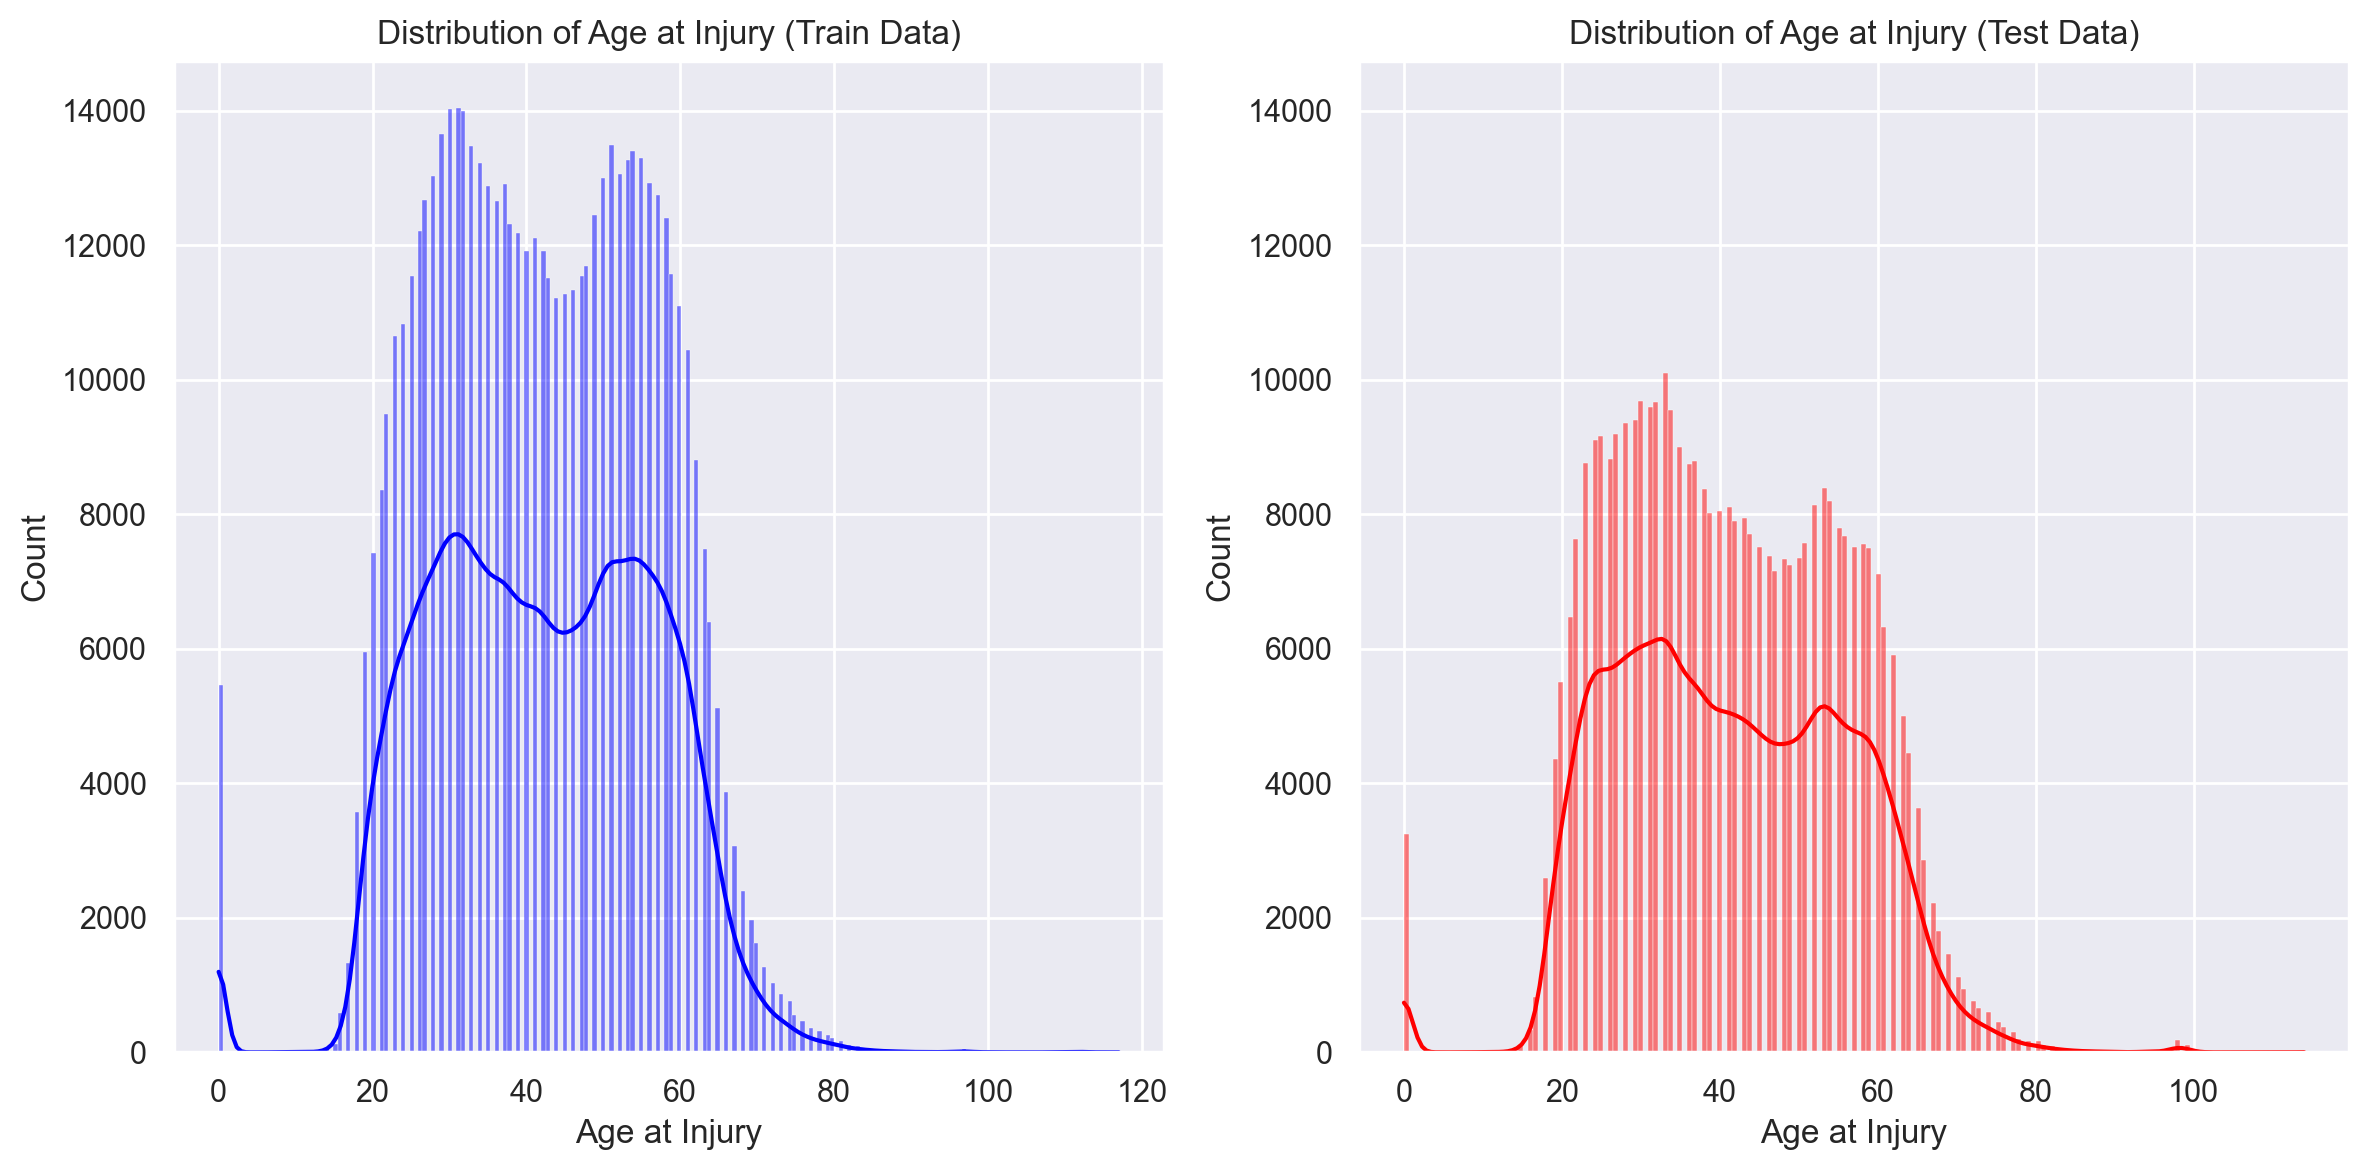

In [38]:
plt.figure(figsize=(12, 6))

ax1 = plt.subplot(1, 2, 1)  
sns.histplot(data=train_data, x='Age at Injury', kde=True, color='blue')
plt.title('Distribution of Age at Injury (Train Data)')

ax2 = plt.subplot(1, 2, 2)  
sns.histplot(data=test_data, x='Age at Injury', kde=True, color='red')
plt.title('Distribution of Age at Injury (Test Data)')

max_y = max(ax1.get_ylim()[1], ax2.get_ylim()[1])

ax1.set_ylim(0, max_y)
ax2.set_ylim(0, max_y)

plt.tight_layout()
plt.show()

In [39]:
train_data["Age at Injury"].value_counts().sort_index(ascending=True)

Age at Injury
0.0      5464
1.0         2
5.0         1
7.0         2
8.0         6
         ... 
112.0      24
113.0       1
114.0       1
115.0       1
117.0       2
Name: count, Length: 108, dtype: int64

In [40]:
calculate_missing_percentage(train_data[["Age at Injury"]], test_data[["Age at Injury"]])

Train Data                         Test Data           \
              NaN Percentage NaN Rows Data Type NaN Percentage NaN Rows   
Feature                                                                   
Age at Injury       3.276487    19445   float64            NaN      NaN   

                         
              Data Type  
Feature                  
Age at Injury       NaN

As we can see the Age at Injury feature has some incoherencies because it doesn´t make sense to have values 0.

### Birth Year

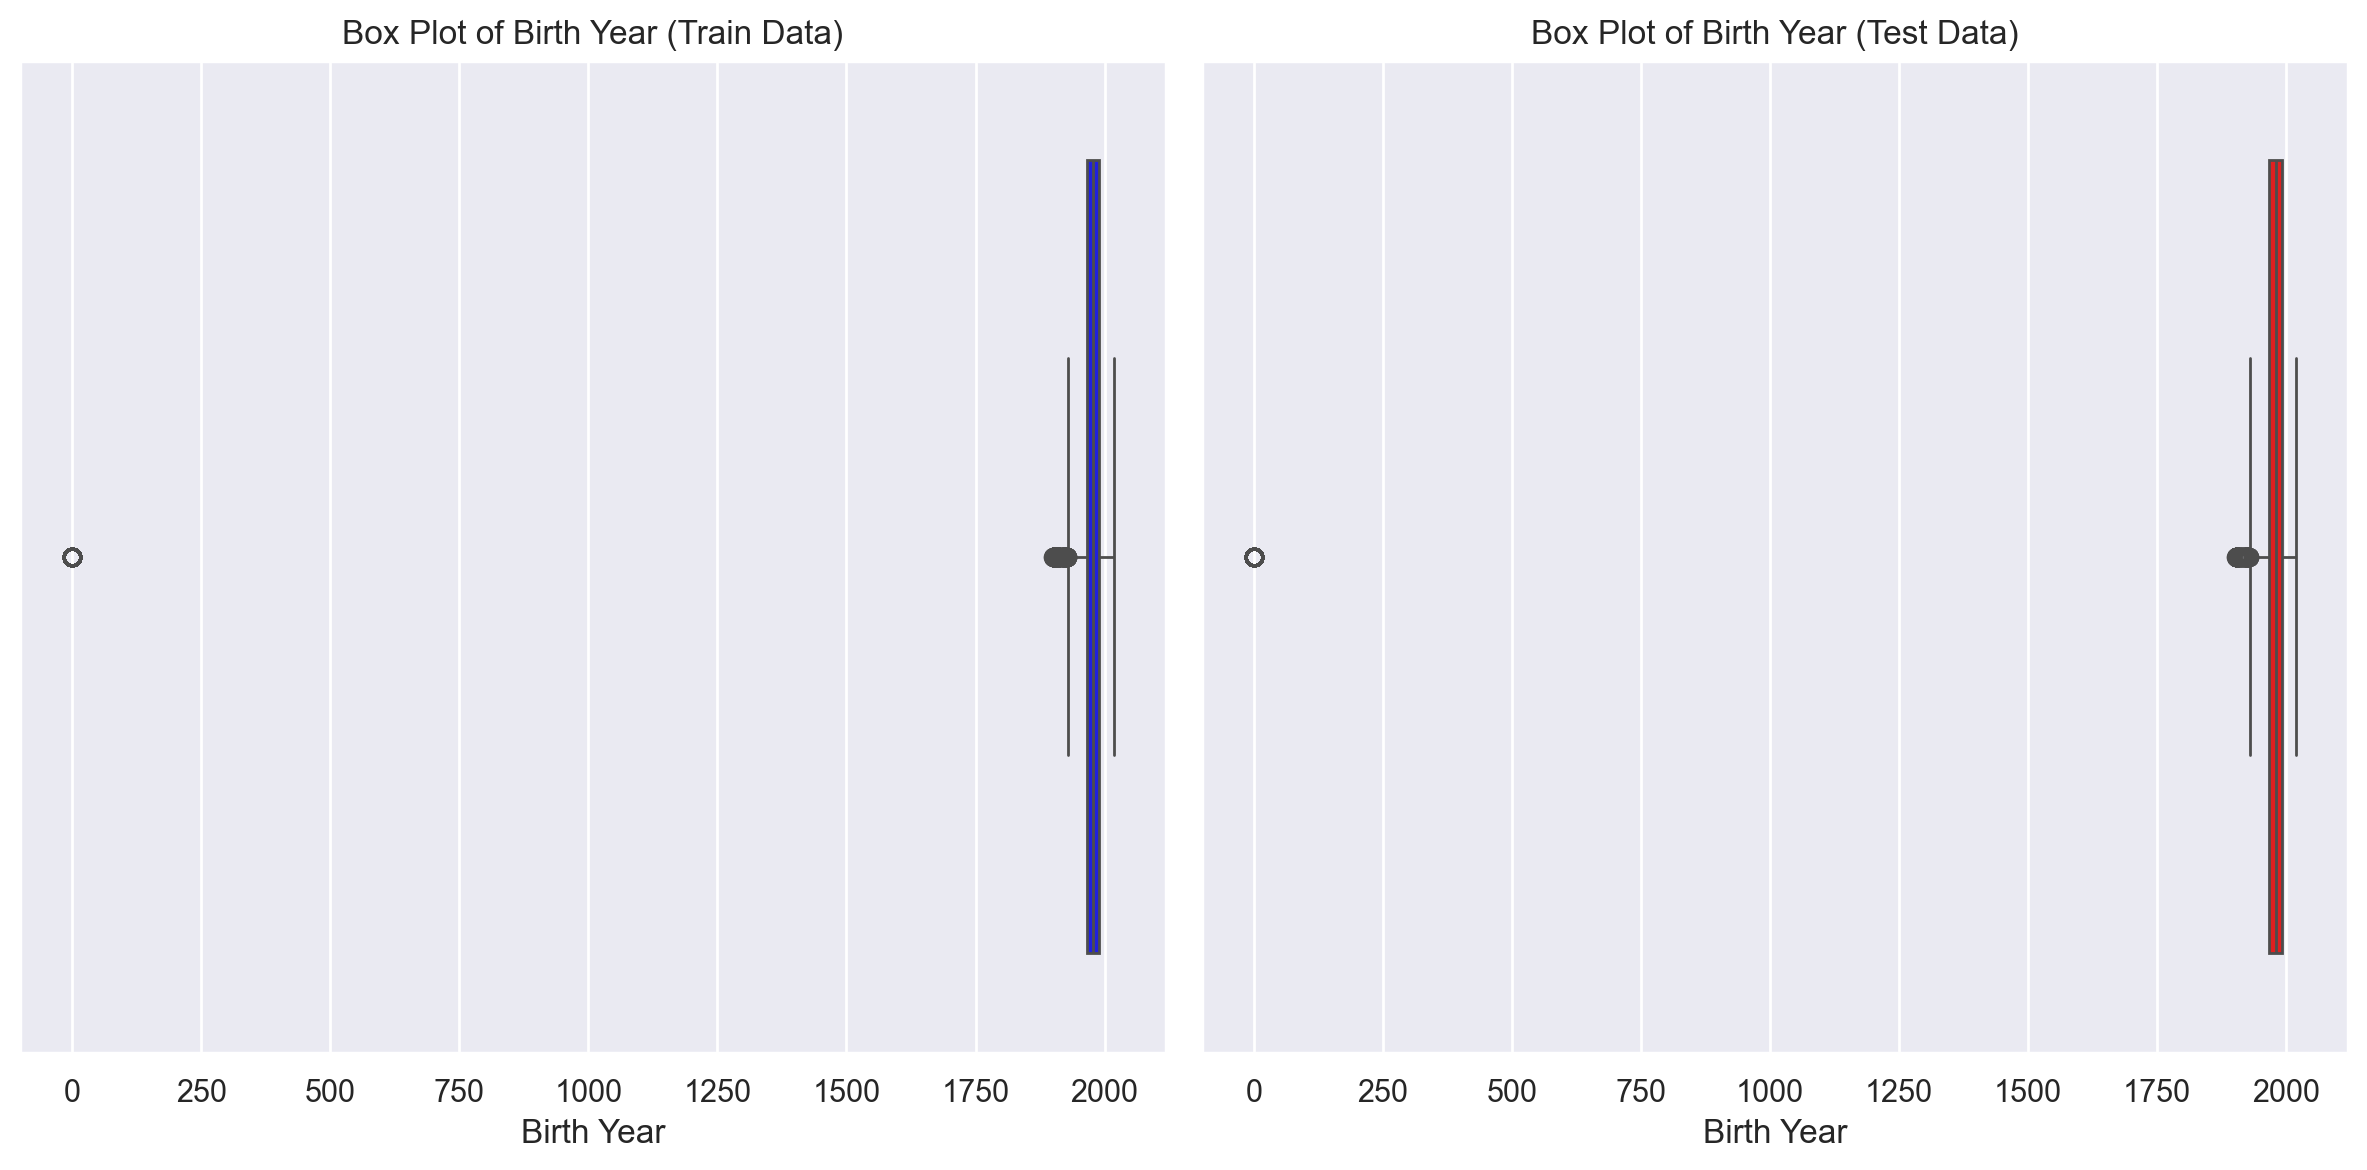

In [41]:
plt.figure(figsize=(12, 6))

ax1 = plt.subplot(1, 2, 1)  
sns.boxplot(data=train_data, x='Birth Year', color='blue')
plt.title('Box Plot of Birth Year (Train Data)')

ax2 = plt.subplot(1, 2, 2)  
sns.boxplot(data=test_data, x='Birth Year', color='red')
plt.title('Box Plot of Birth Year (Test Data)')

plt.tight_layout()
plt.show()

In [42]:
train_data["Birth Year"].value_counts().sort_index(ascending=True)

Birth Year
0.0       25081
1900.0        2
1901.0       30
1902.0       28
1903.0       35
          ...  
2011.0        6
2012.0        2
2013.0        1
2014.0        2
2018.0        2
Name: count, Length: 107, dtype: int64

In [43]:
test_data["Birth Year"].value_counts().sort_index(ascending=True)

Birth Year
0.0       19596
1903.0        2
1904.0      108
1905.0       51
1910.0       11
          ...  
2011.0        1
2012.0        5
2013.0        2
2016.0        2
2019.0        1
Name: count, Length: 102, dtype: int64

In [44]:
calculate_missing_percentage(train_data[["Birth Year"]],test_data[["Birth Year"]])

Train Data                         Test Data                   
           NaN Percentage NaN Rows Data Type NaN Percentage NaN Rows Data Type
Feature                                                                       
Birth Year       8.176137    48523   float64       5.018365    19470   float64

### Average Weekly Wage

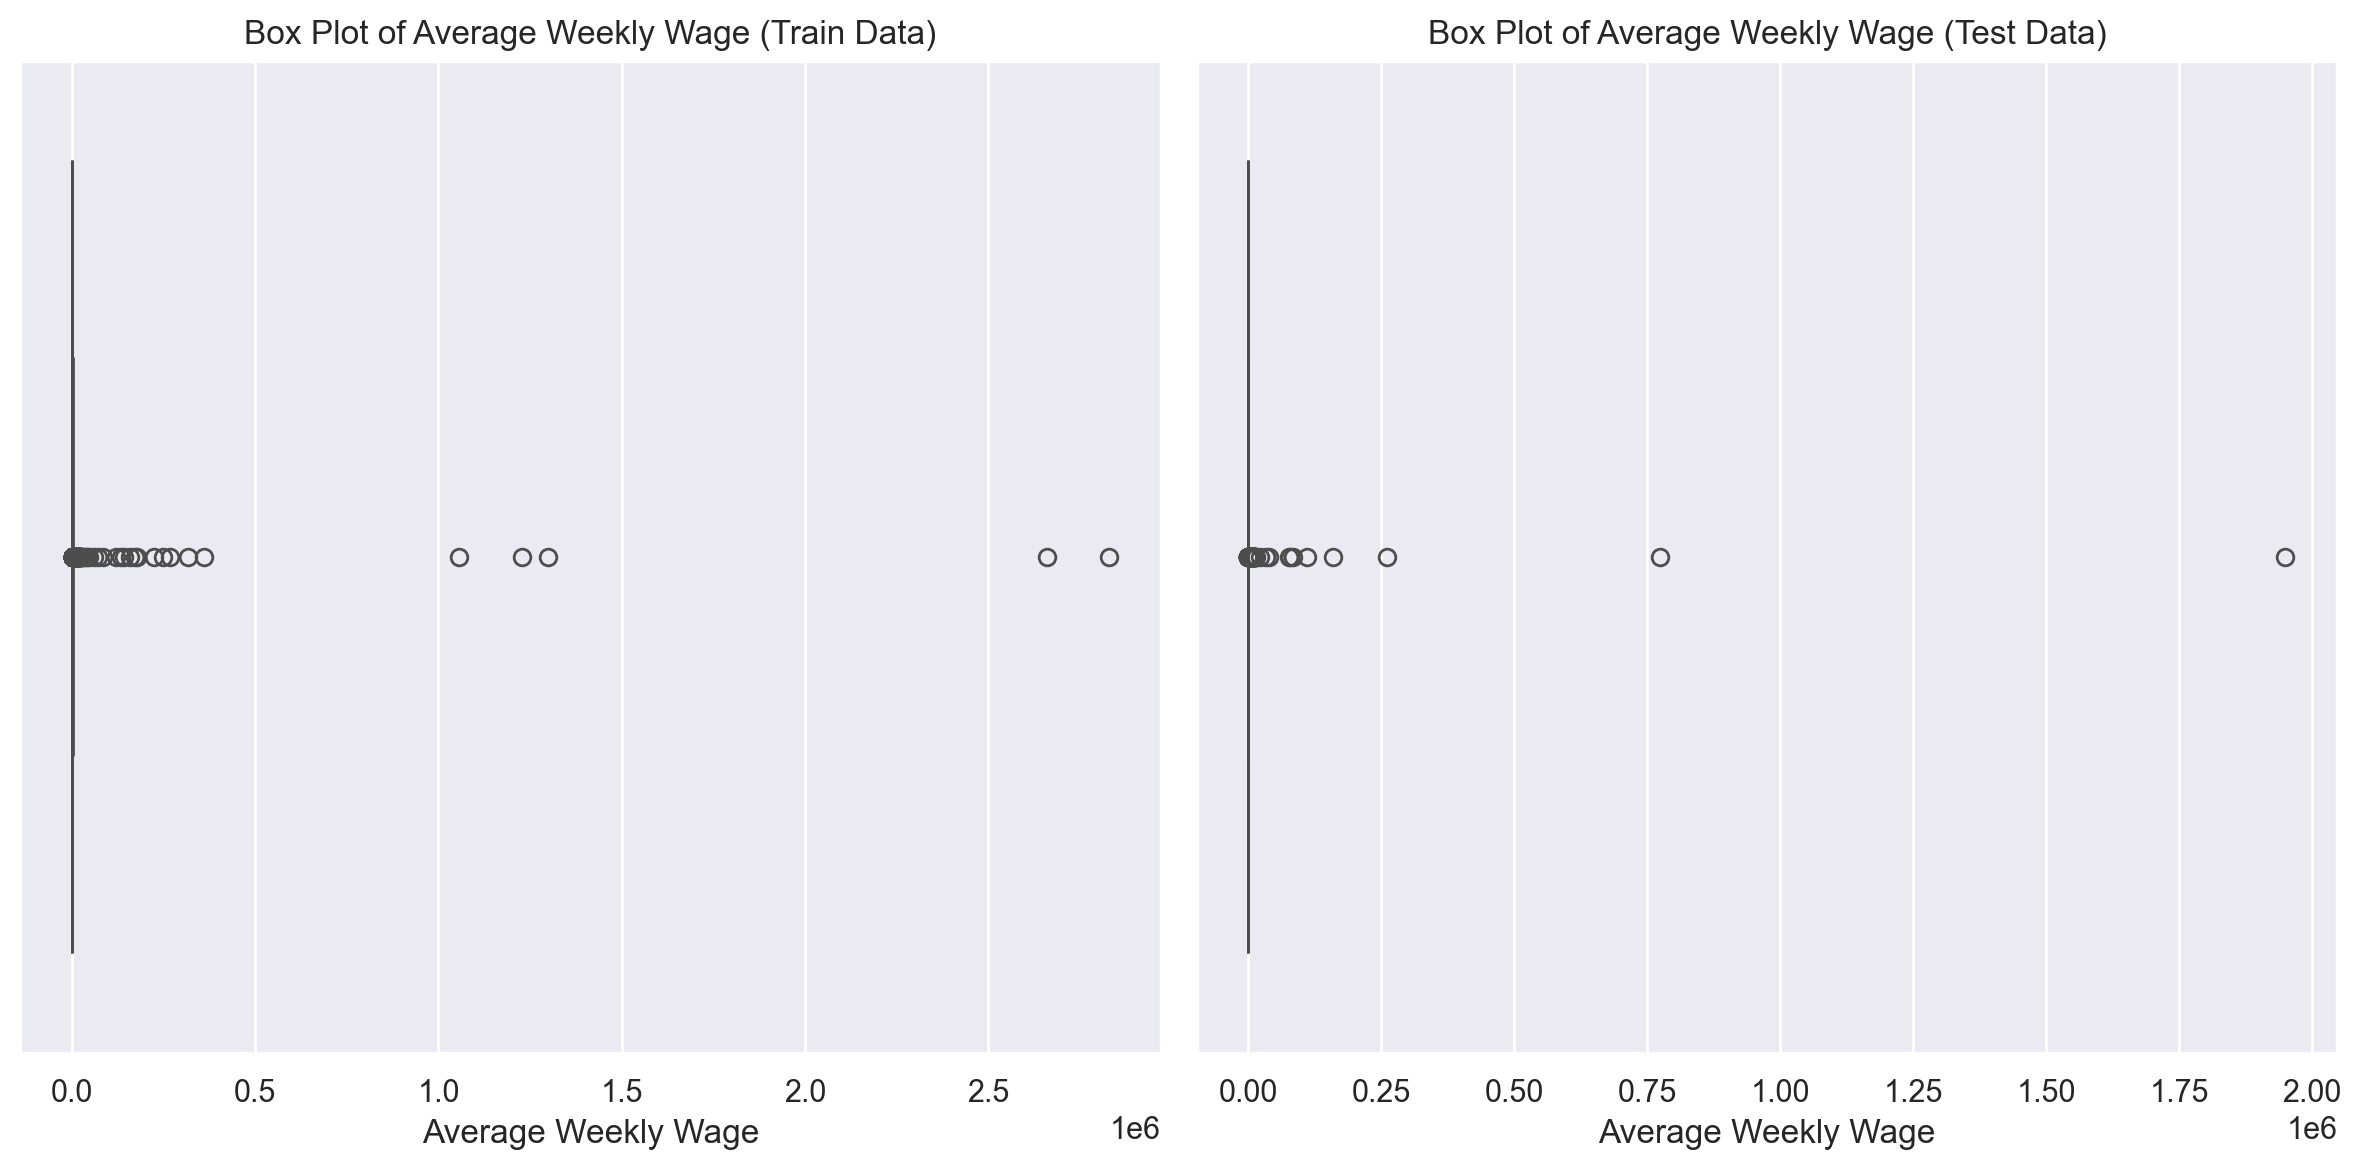

In [45]:
plt.figure(figsize=(12, 6))

ax1 = plt.subplot(1, 2, 1)  
sns.boxplot(data=train_data, x='Average Weekly Wage', color='blue')
plt.title('Box Plot of Average Weekly Wage (Train Data)')

ax2 = plt.subplot(1, 2, 2)  
sns.boxplot(data=test_data, x='Average Weekly Wage', color='red')
plt.title('Box Plot of Average Weekly Wage (Test Data)')

plt.tight_layout()
plt.show()

In [46]:
calculate_missing_percentage(train_data[["Average Weekly Wage"]], test_data[["Average Weekly Wage"]])

Train Data                         Test Data           \
                    NaN Percentage NaN Rows Data Type NaN Percentage NaN Rows   
Feature                                                                         
Average Weekly Wage       8.104187    48096   float64       4.949803    19204   

                               
                    Data Type  
Feature                        
Average Weekly Wage   float64

In this feature, we observe a high degree of skewness in both the training and testing datasets.

### Claim Identifier

In [47]:
print("Train rows:")
print(" - ", train_data.shape[0])
print("Train Claim Identifier unique values:")
print(" - ",train_data["Claim Identifier"].nunique())
print("Test rows:")
print(" - ",test_data.shape[0])
print("Test Claim Identifier unique values:")
print(" - ",test_data["Claim Identifier"].nunique())

Train rows:
 -  593471
Train Claim Identifier unique values:
 -  593470
Test rows:
 -  387975
Test Claim Identifier unique values:
 -  387975


In [48]:
train_data["Claim Identifier"].duplicated().sum()

1

In [49]:
train_data.duplicated().sum()

0

As we can see, the `Claim Identifier` feature has a repeated identifier, but no repeated rows. There are no errors in the test data.

### IME-4 Count

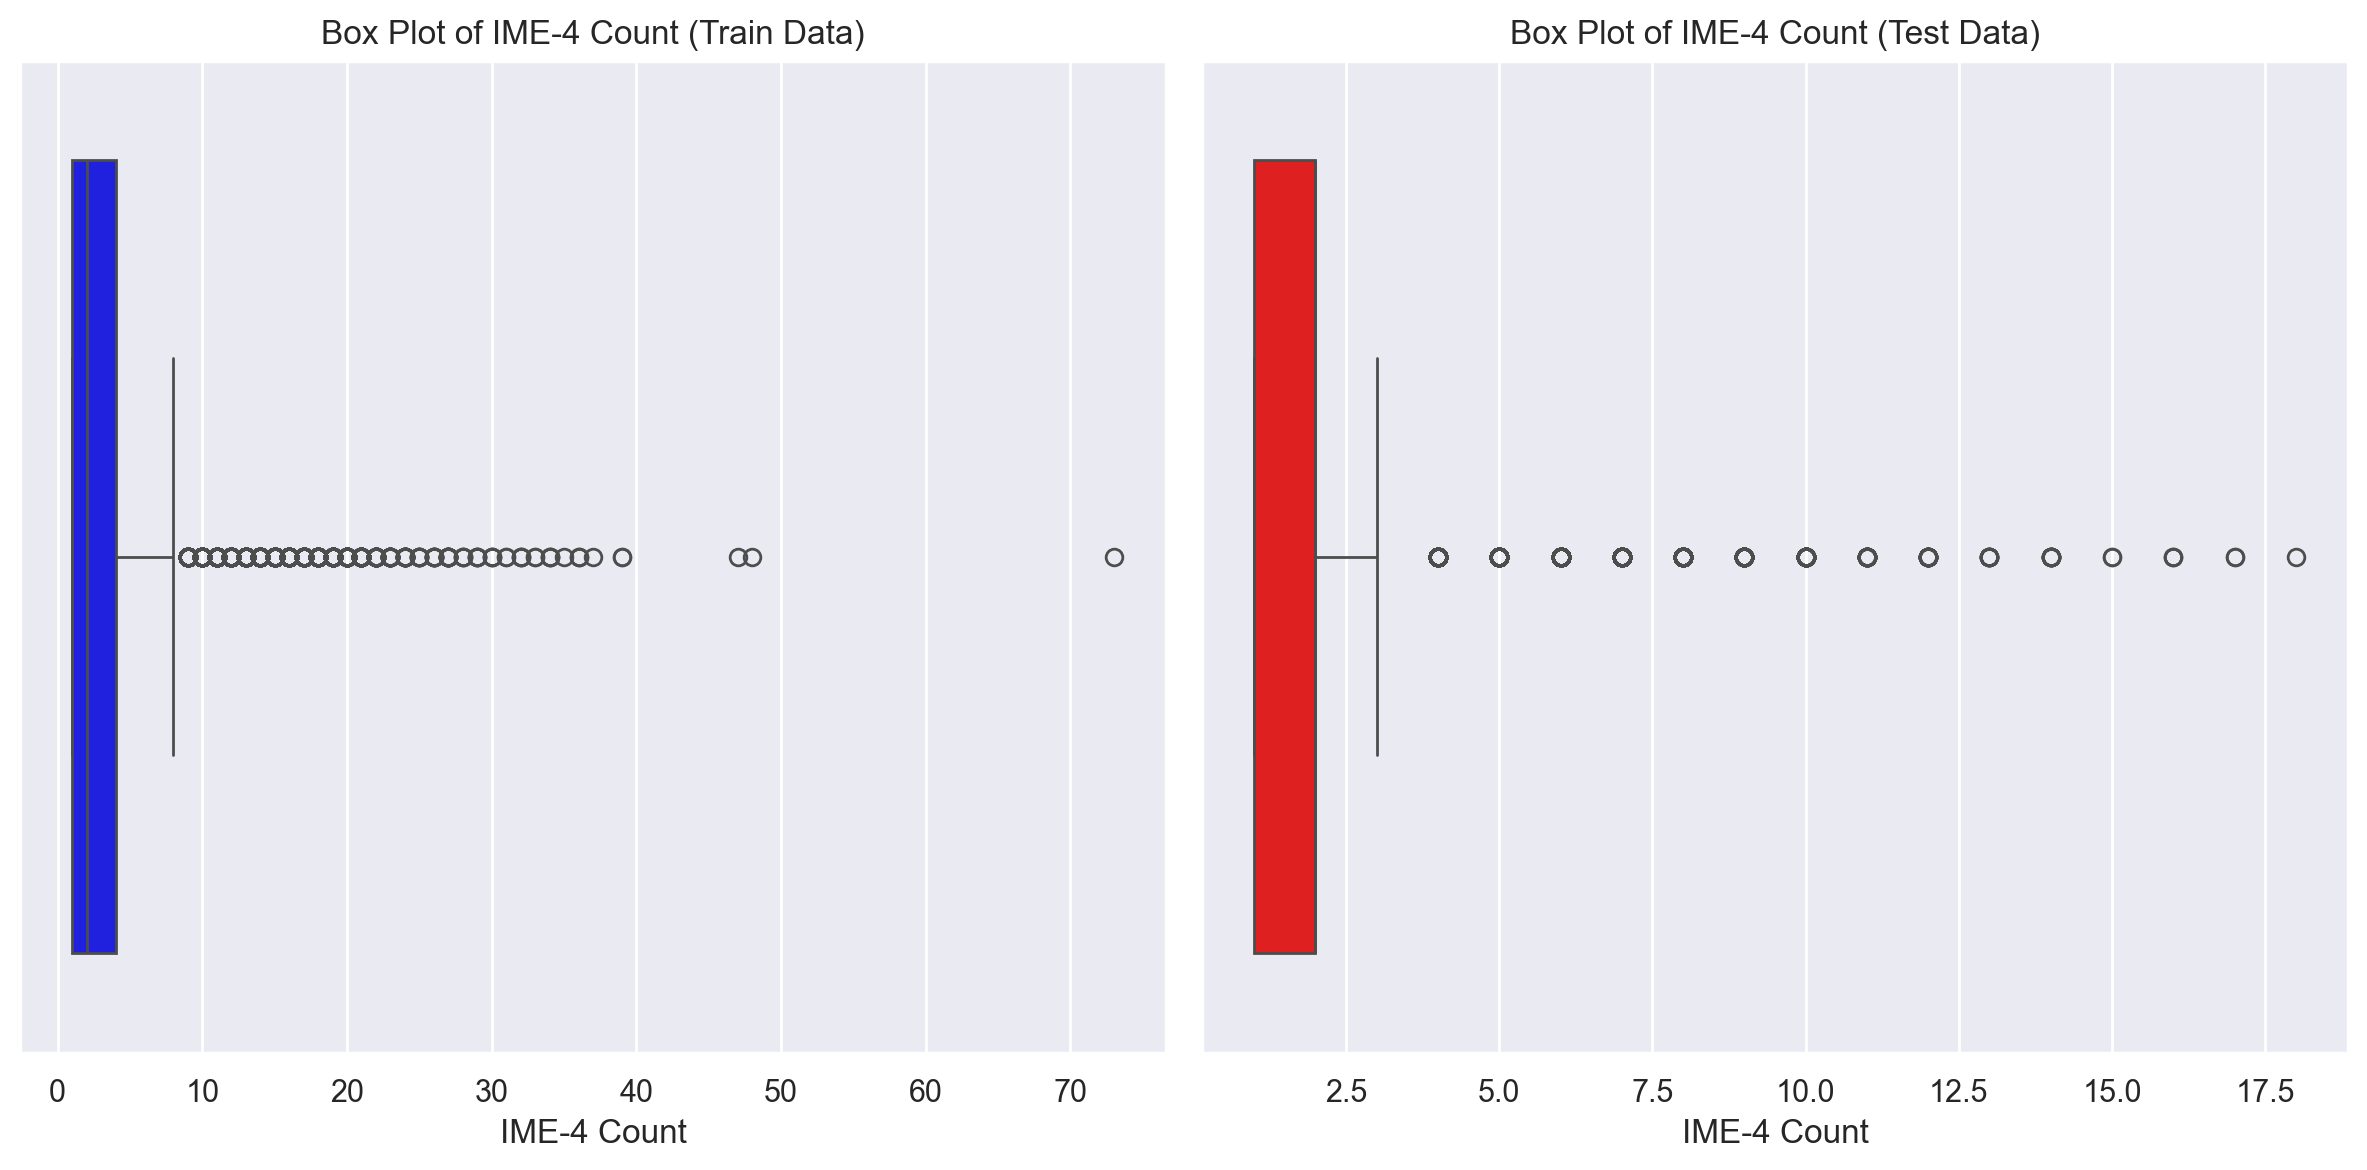

In [50]:
plt.figure(figsize=(12, 6))

ax1 = plt.subplot(1, 2, 1)  
sns.boxplot(data=train_data, x='IME-4 Count', color='blue')
plt.title('Box Plot of IME-4 Count (Train Data)')

ax2 = plt.subplot(1, 2, 2) 
sns.boxplot(data=test_data, x='IME-4 Count', color='red')
plt.title('Box Plot of IME-4 Count (Test Data)')

plt.tight_layout()
plt.show()

In [51]:
train_data["IME-4 Count"].value_counts().sort_index(ascending=True)

IME-4 Count
1.0     40112
2.0     34504
3.0     16136
4.0     13781
5.0      7680
6.0      6427
7.0      3838
8.0      3156
9.0      1915
10.0     1460
11.0     1002
12.0      807
13.0      516
14.0      396
15.0      273
16.0      214
17.0      125
18.0      140
19.0       79
20.0       56
21.0       53
22.0       34
23.0       19
24.0       16
25.0        7
26.0        8
27.0       14
28.0        4
29.0        5
30.0        4
31.0        2
32.0        4
33.0        2
34.0        4
35.0        1
36.0        3
37.0        1
39.0        2
47.0        1
48.0        1
73.0        1
Name: count, dtype: int64

In [52]:
calculate_missing_percentage(train_data[["IME-4 Count"]], test_data[["IME-4 Count"]])

Train Data                         Test Data           \
            NaN Percentage NaN Rows Data Type NaN Percentage NaN Rows   
Feature                                                                 
IME-4 Count      77.622664   460668   float64      90.914621   352726   

                       
            Data Type  
Feature                
IME-4 Count   float64

This feature is highly skewed and exhibits a significant percentage of missing values. Considering the meaning of this feature, we can conclude that the missing values can be replaced with 0, as they indicate that no form was received.

### OIICS Nature of Injury Description

In [53]:
print("Train rows:")
print(" - ", train_data.shape[0])
print("Train OIICS Nature of Injury Description missing values:")
print(" - ",train_data["OIICS Nature of Injury Description"].isna().sum())
print("Test rows:")
print(" - ",test_data.shape[0])
print("Test OIICS Nature of Injury Description missing values:")
print(" - ",test_data["OIICS Nature of Injury Description"].isna().sum())

Train rows:
 -  593471
Train OIICS Nature of Injury Description missing values:
 -  593471
Test rows:
 -  387975
Test OIICS Nature of Injury Description missing values:
 -  387975


This feature contains only missing values.

### Number of Dependents

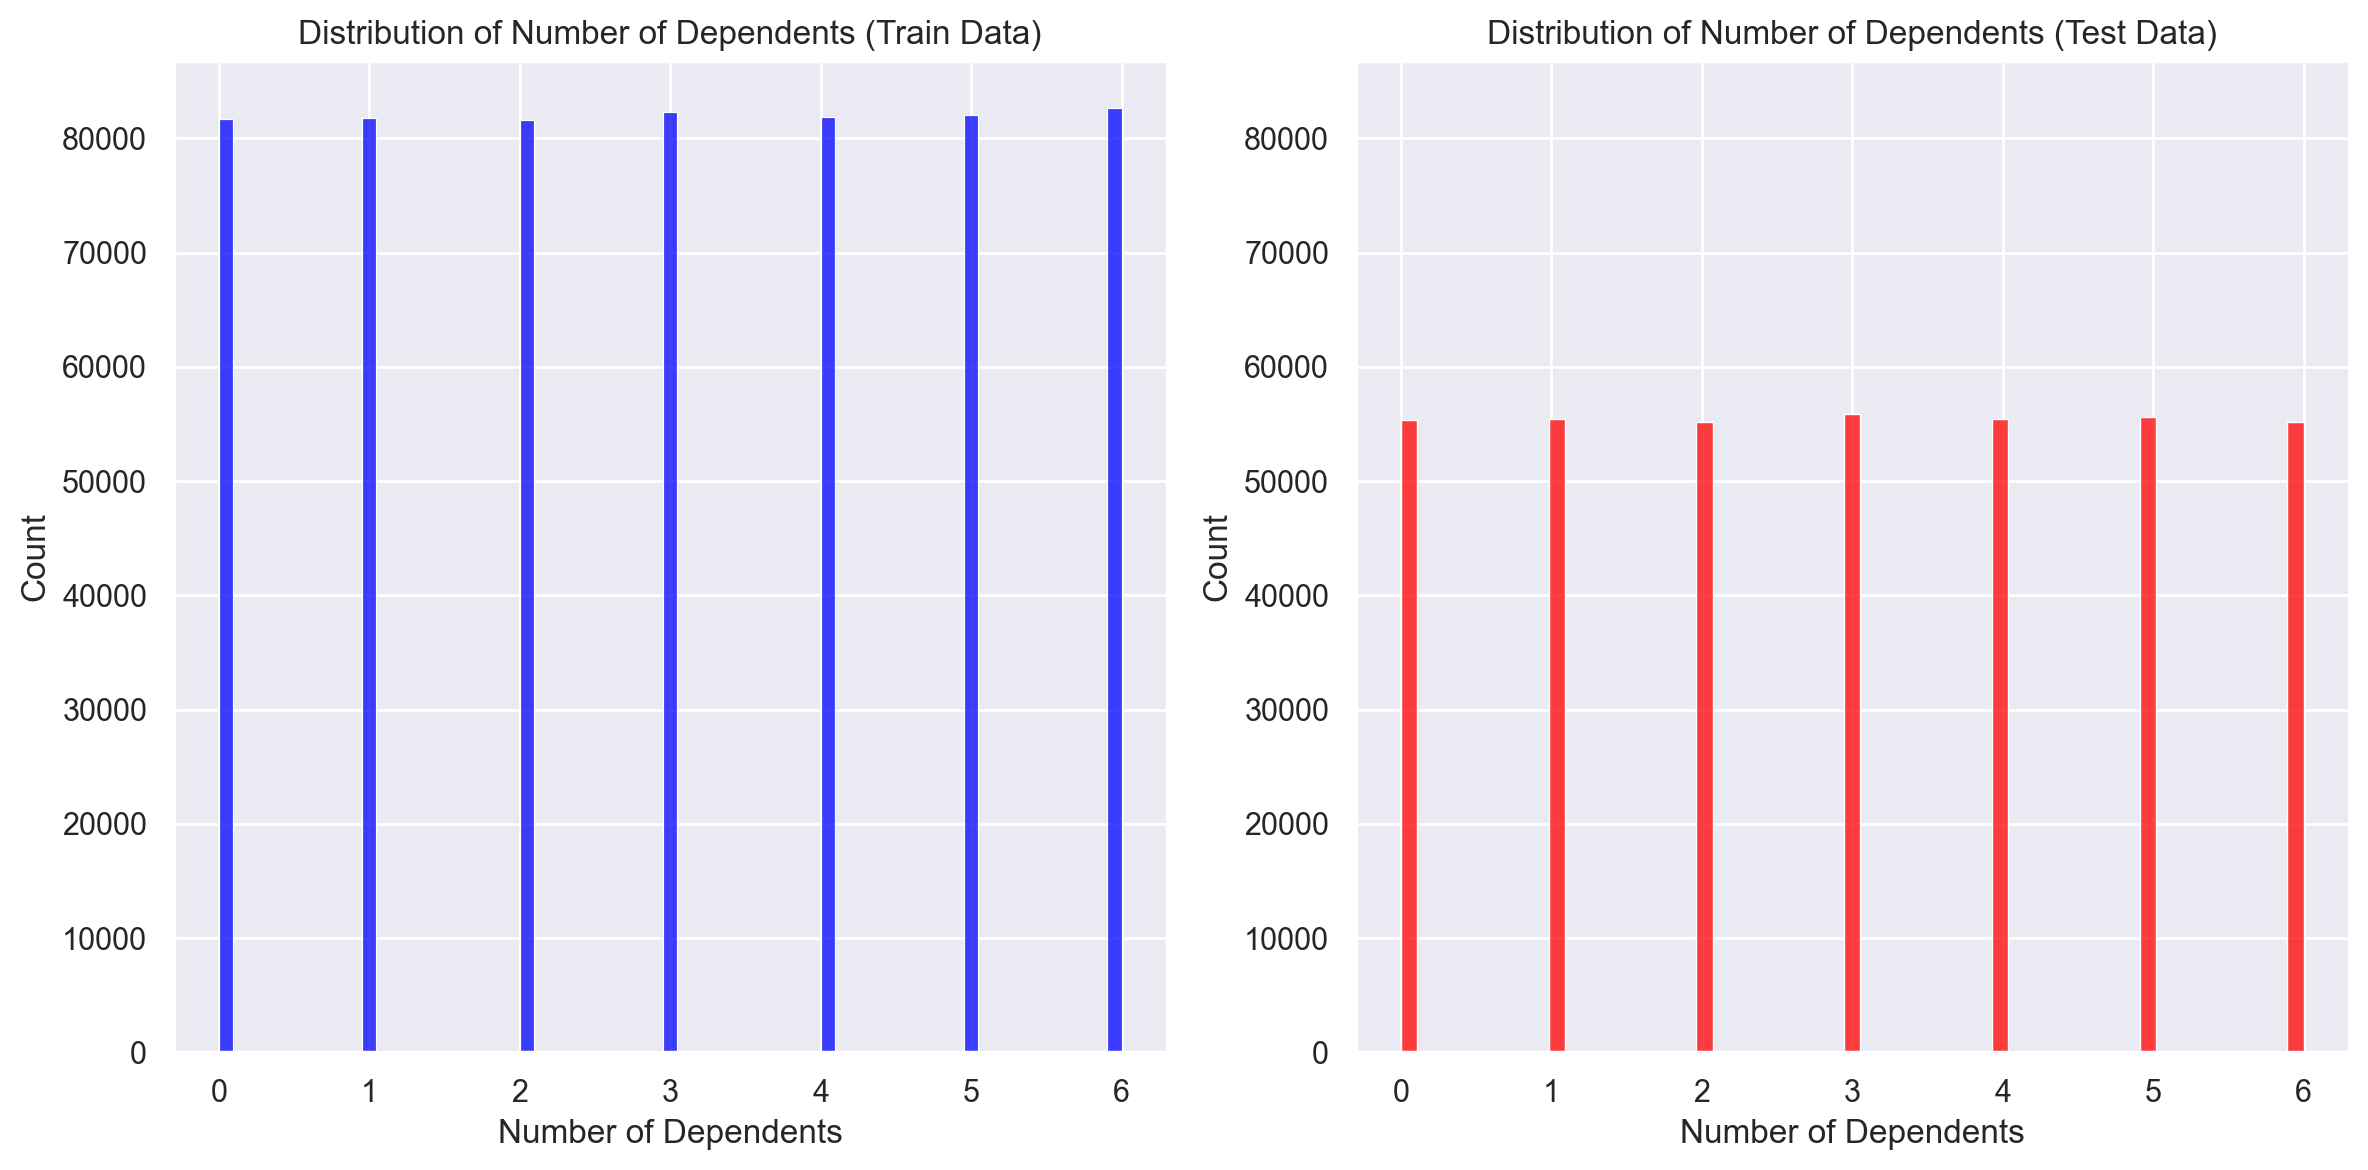

In [54]:
plt.figure(figsize=(12, 6))

ax1 = plt.subplot(1, 2, 1)  
sns.histplot(data=train_data, x='Number of Dependents', kde=False, color='blue')
plt.title('Distribution of Number of Dependents (Train Data)')

ax2 = plt.subplot(1, 2, 2)  
sns.histplot(data=test_data, x='Number of Dependents', kde=False, color='red')
plt.title('Distribution of Number of Dependents (Test Data)')

max_y = max(ax1.get_ylim()[1], ax2.get_ylim()[1])

ax1.set_ylim(0, max_y)
ax2.set_ylim(0, max_y)

plt.tight_layout()
plt.show()

In [55]:
train_data["Number of Dependents"].value_counts().sort_index(ascending=True)

Number of Dependents
0.0    81665
1.0    81823
2.0    81607
3.0    82299
4.0    81904
5.0    82075
6.0    82653
Name: count, dtype: int64

In [56]:
test_data["Number of Dependents"].value_counts().sort_index(ascending=True)

Number of Dependents
0    55316
1    55402
2    55191
3    55900
4    55427
5    55591
6    55148
Name: count, dtype: int64

In [57]:
calculate_missing_percentage(train_data[["Number of Dependents"]], test_data[["Number of Dependents"]])

Train Data                         Test Data  \
                     NaN Percentage NaN Rows Data Type NaN Percentage   
Feature                                                                 
Number of Dependents       3.276487    19445   float64            NaN   

                                         
                     NaN Rows Data Type  
Feature                                  
Number of Dependents      NaN       NaN

<a class="anchor" id="dataexploration">
    
## 2.4. Categorical Features
</a>

In [58]:
categorical_features

['Accident Date',
 'Alternative Dispute Resolution',
 'Assembly Date',
 'Attorney/Representative',
 'C-2 Date',
 'C-3 Date',
 'Carrier Name',
 'Carrier Type',
 'County of Injury',
 'COVID-19 Indicator',
 'District Name',
 'First Hearing Date',
 'Gender',
 'Industry Code Description',
 'Medical Fee Region',
 'WCIO Cause of Injury Description',
 'WCIO Nature of Injury Description',
 'WCIO Part Of Body Description',
 'Zip Code',
 'Industry Code',
 'WCIO Cause of Injury Code',
 'WCIO Nature of Injury Code',
 'WCIO Part Of Body Code']

### Accident Date

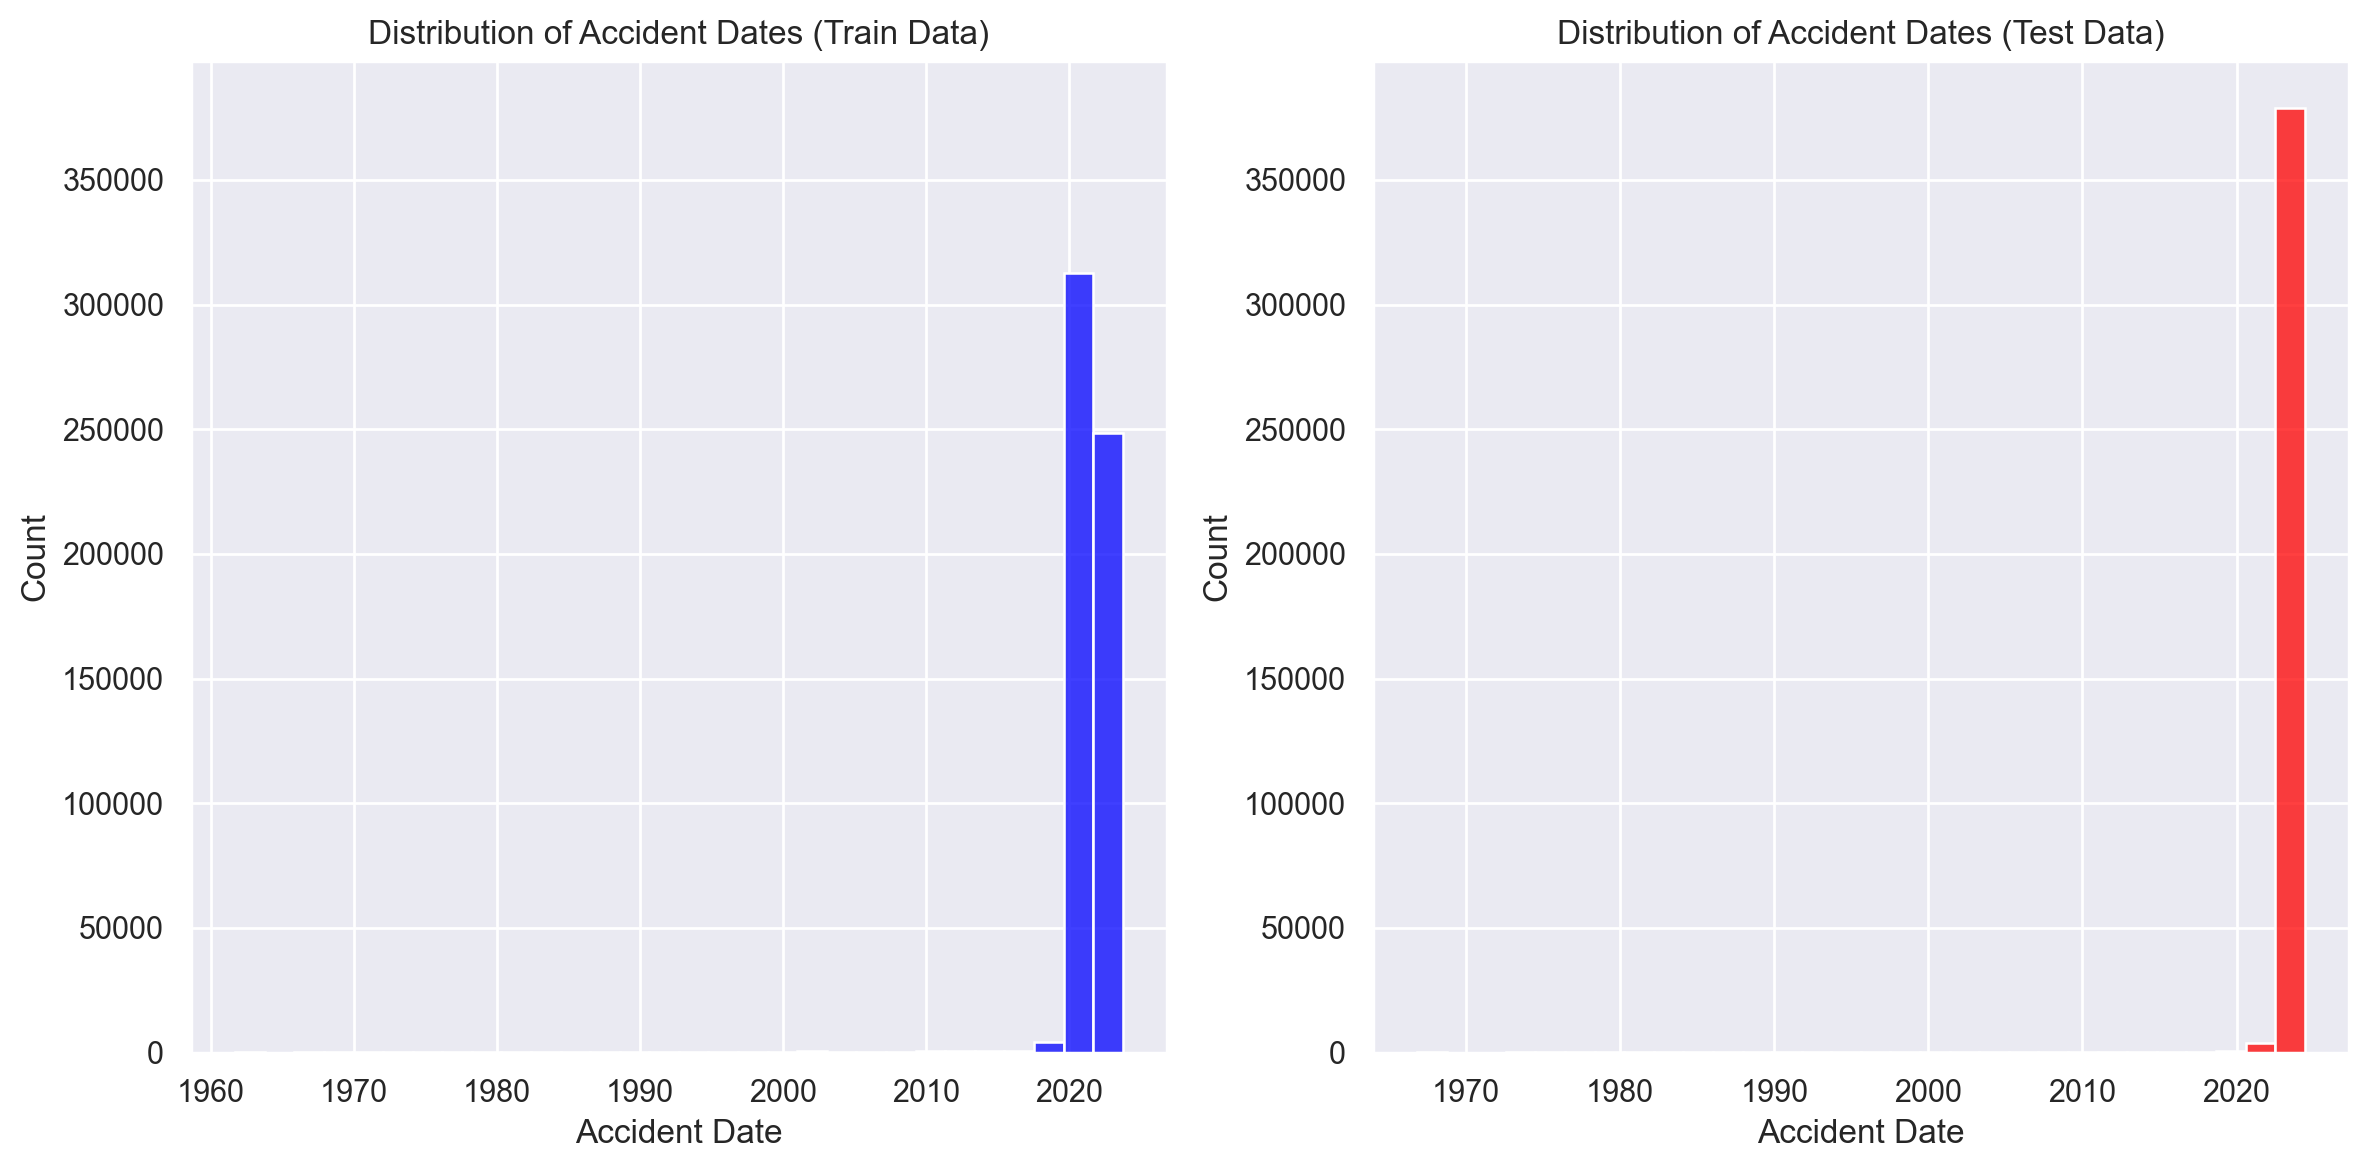

In [59]:
# Convert Accident Date to datetime format 
train_data['Accident Date'] = pd.to_datetime(train_data['Accident Date'])
test_data['Accident Date'] = pd.to_datetime(test_data['Accident Date'])


plt.figure(figsize=(12, 6))

ax1 = plt.subplot(1, 2, 1)  
sns.histplot(data=train_data, x='Accident Date', kde=False, color='blue', bins=30)
plt.title('Distribution of Accident Dates (Train Data)')

ax2 = plt.subplot(1, 2, 2)  
sns.histplot(data=test_data, x='Accident Date', kde=False, color='red', bins=30)
plt.title('Distribution of Accident Dates (Test Data)')

max_y = max(ax1.get_ylim()[1], ax2.get_ylim()[1])

ax1.set_ylim(0, max_y)
ax2.set_ylim(0, max_y)

plt.tight_layout()
plt.show()


In [60]:
plt.figure(figsize=(12, 6))

ax1 = plt.subplot(1, 2, 1)  
sns.boxplot(data=train_data, x='Accident Date', color='blue')
plt.title('Box Plot of Accident Date (Train Data)')

ax2 = plt.subplot(1, 2, 2)  
sns.boxplot(data=test_data, x='Accident Date', color='red')
plt.title('Box Plot of Accident Date (Test Data)')

plt.tight_layout()
plt.show()

In [61]:
train_data["Accident Date"].value_counts().sort_index(ascending=True)

Accident Date
1961-09-06    1
1963-10-01    1
1966-06-01    1
1966-09-13    1
1967-01-01    1
             ..
2023-08-07    1
2023-08-23    1
2023-09-06    1
2023-09-11    1
2023-09-29    1
Name: count, Length: 5539, dtype: int64

In [62]:
test_data["Accident Date"].value_counts().sort_index(ascending=True)

Accident Date
1966-10-28      1
1973-01-12      1
1973-07-23      1
1974-10-07      1
1975-12-16      1
             ... 
2024-05-31    181
2024-06-01     69
2024-06-02     55
2024-06-03     61
2024-06-04     16
Name: count, Length: 3438, dtype: int64

In [63]:
calculate_missing_percentage(train_data[["Accident Date"]], test_data[["Accident Date"]])

Train Data                               Test Data           \
              NaN Percentage NaN Rows       Data Type NaN Percentage NaN Rows   
Feature                                                                         
Accident Date       3.898084    23134  datetime64[ns]       0.629937     2444   

                               
                    Data Type  
Feature                        
Accident Date  datetime64[ns]

This feature is highly skewed, with some accidents recorded as occurring in the 1960s.

### Alternative Dispute Resolution

In [64]:
print(train_data["Alternative Dispute Resolution"].value_counts())
print("\n")
print(test_data["Alternative Dispute Resolution"].value_counts())

Alternative Dispute Resolution
N    571412
Y      2609
U         5
Name: count, dtype: int64


Alternative Dispute Resolution
N    386314
Y      1660
U         1
Name: count, dtype: int64


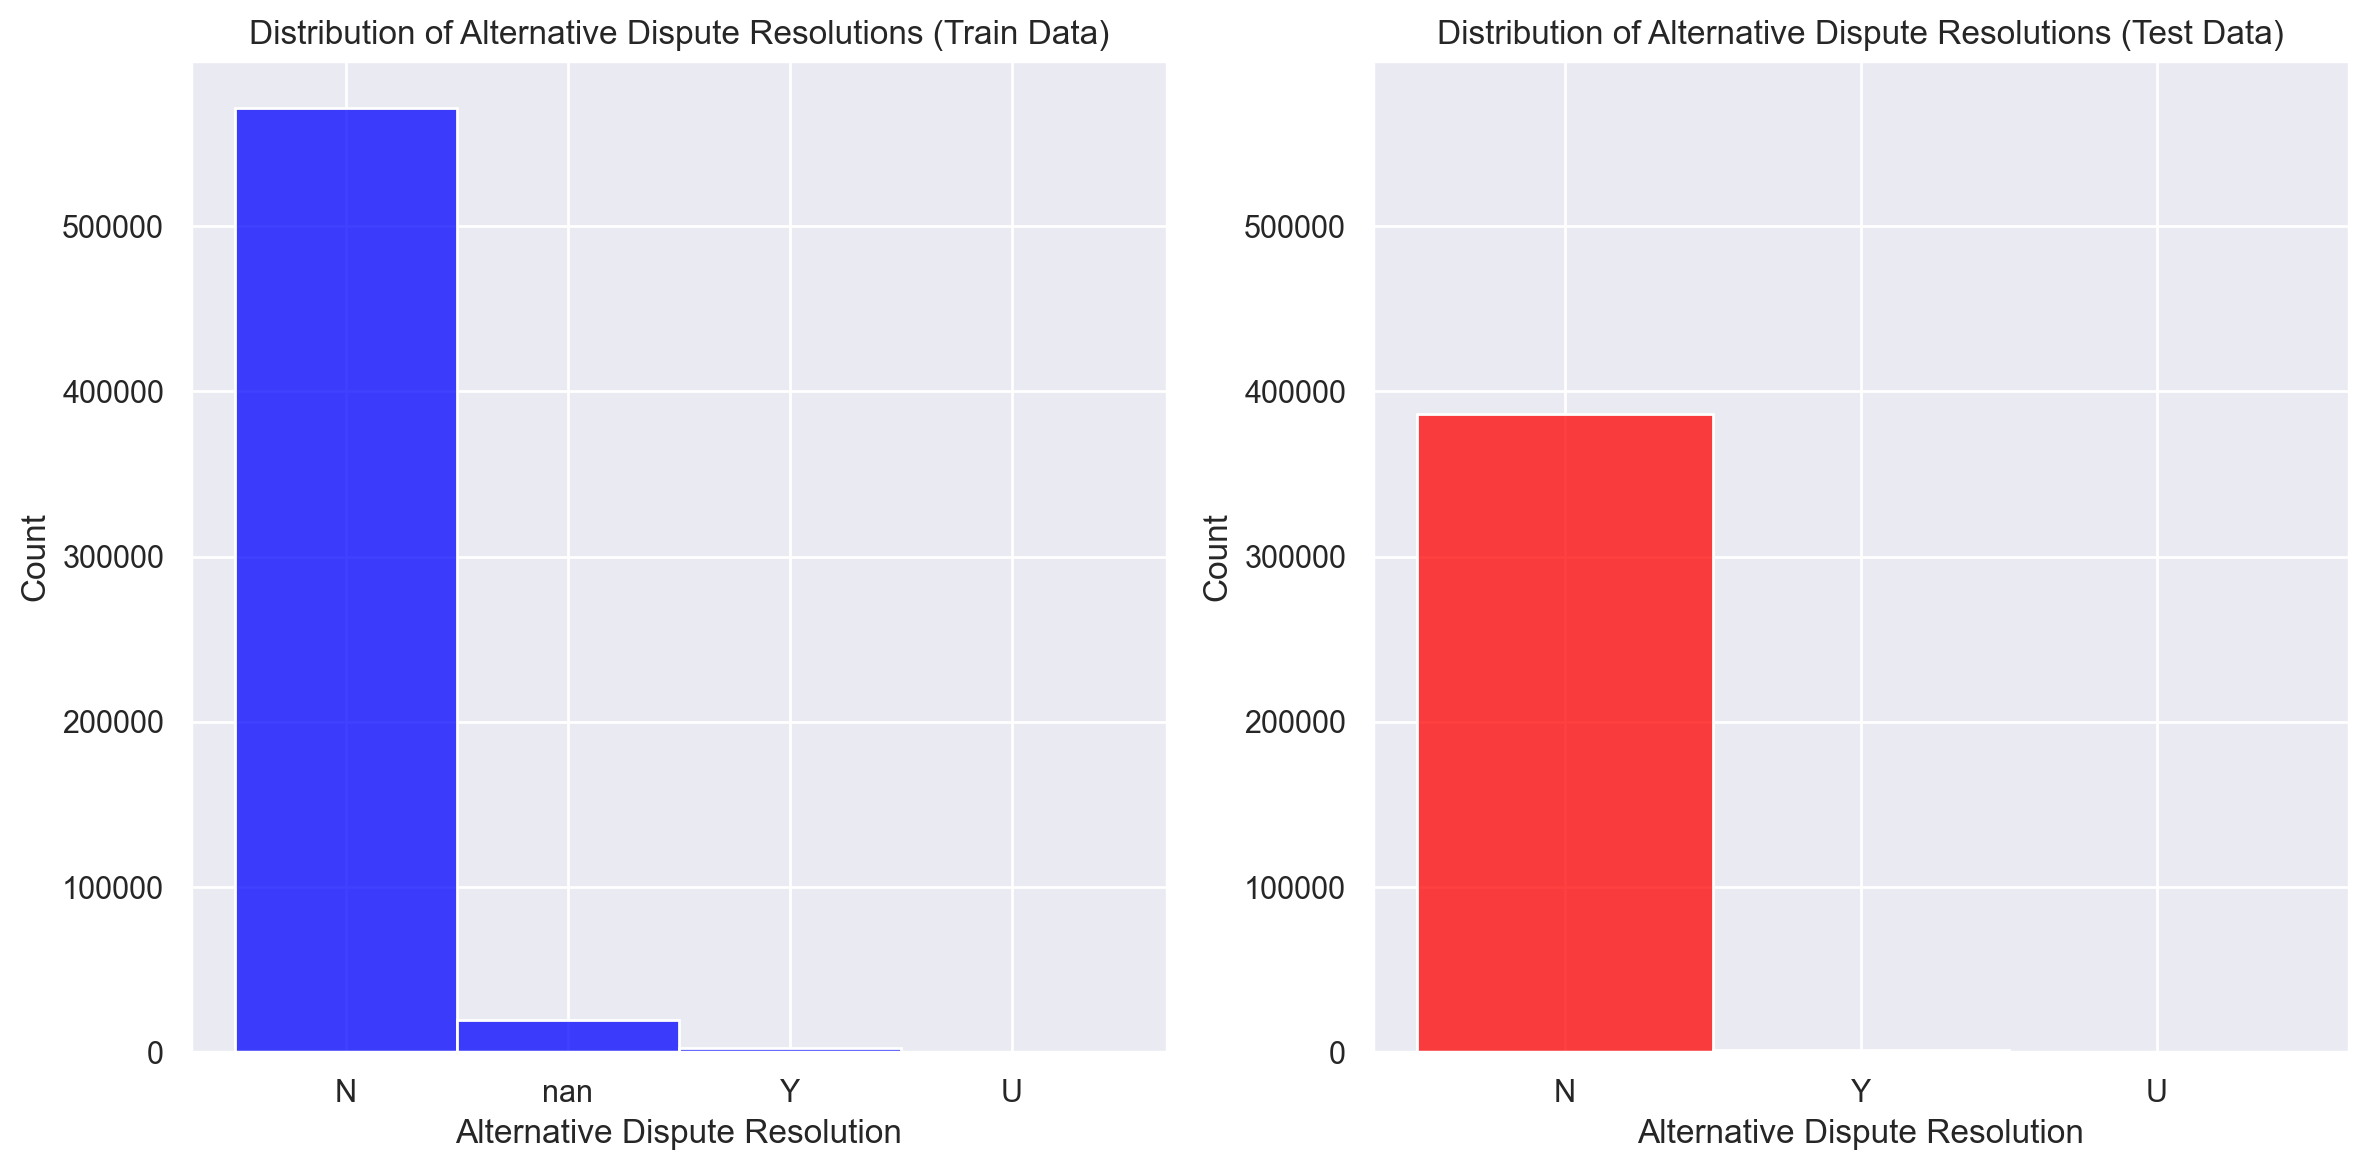

In [65]:
train_data['Alternative Dispute Resolution'] = train_data['Alternative Dispute Resolution'].astype(str)
test_data['Alternative Dispute Resolution'] = test_data['Alternative Dispute Resolution'].astype(str)


plt.figure(figsize=(12, 6))

ax1 = plt.subplot(1, 2, 1)  
sns.histplot(data=train_data, x='Alternative Dispute Resolution', kde=False, color='blue', bins=30)
plt.title('Distribution of Alternative Dispute Resolutions (Train Data)')

ax2 = plt.subplot(1, 2, 2)  
sns.histplot(data=test_data, x='Alternative Dispute Resolution', kde=False, color='red', bins=30)
plt.title('Distribution of Alternative Dispute Resolutions (Test Data)')

max_y = max(ax1.get_ylim()[1], ax2.get_ylim()[1])

ax1.set_ylim(0, max_y)
ax2.set_ylim(0, max_y)

plt.tight_layout()
plt.show()

In [66]:
calculate_missing_percentage(train_data[["Alternative Dispute Resolution"]], test_data[["Alternative Dispute Resolution"]])

Empty DataFrame
Columns: [(Train Data, NaN Percentage), (Train Data, NaN Rows), (Train Data, Data Type), (Test Data, NaN Percentage), (Test Data, NaN Rows), (Test Data, Data Type)]
Index: []

This feature exhibits a highly uneven distribution, with the value "U" representing "UNDEFINED" or "UNKNOWN."

### Assembly Date

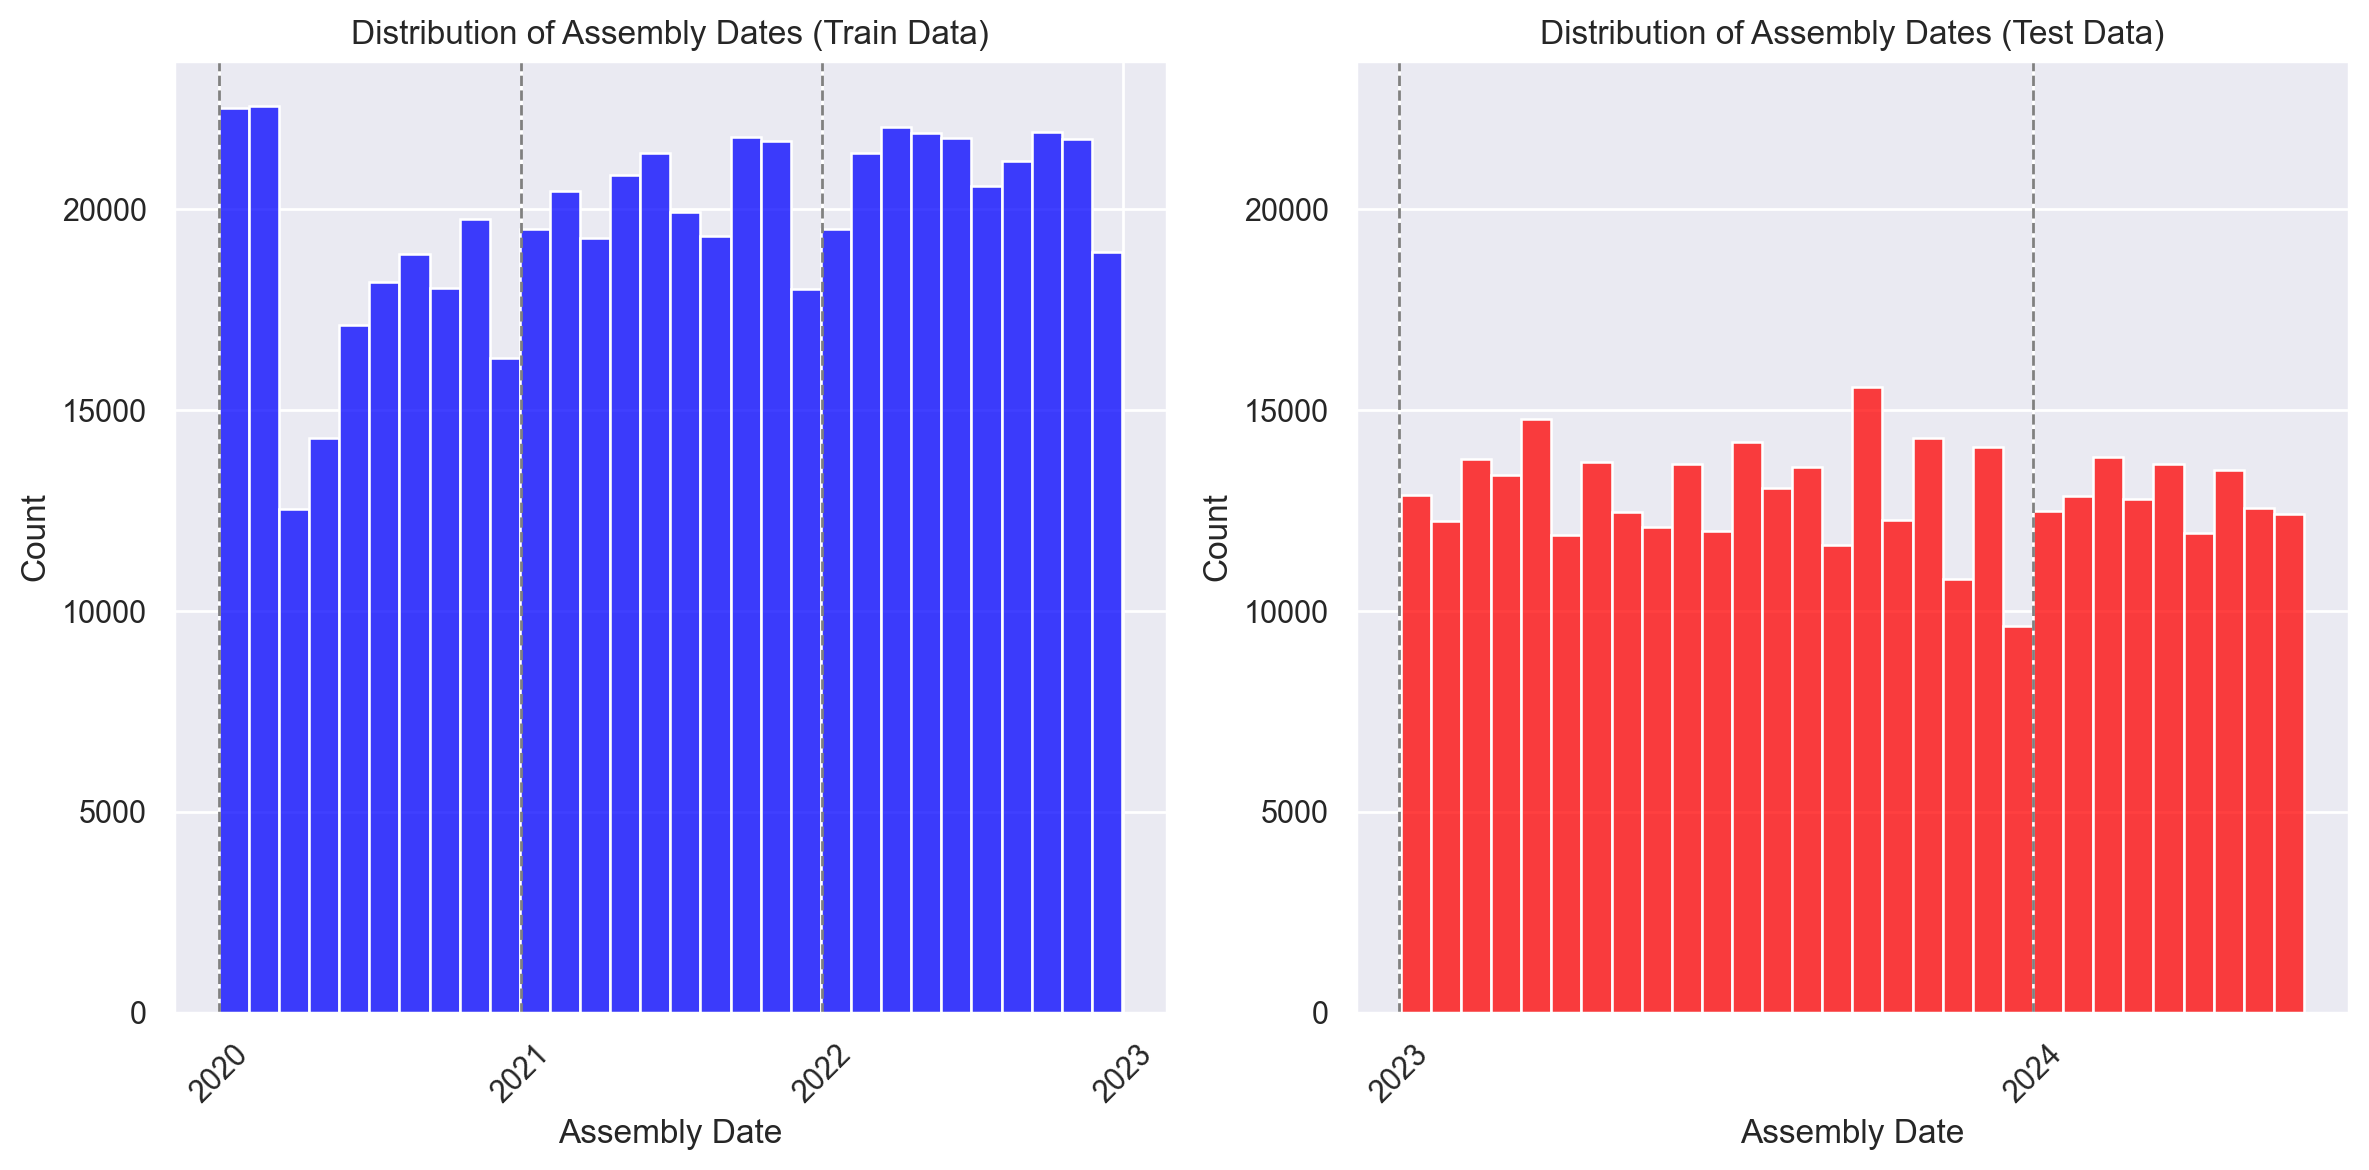

In [67]:
# Convert Assembly Date to datetime format 
train_data['Assembly Date'] = pd.to_datetime(train_data['Assembly Date'])
test_data['Assembly Date'] = pd.to_datetime(test_data['Assembly Date'])

plt.figure(figsize=(12, 6))

ax1 = plt.subplot(1, 2, 1) 
sns.histplot(data=train_data, x='Assembly Date', kde=False, color='blue', bins=30)
plt.title('Distribution of Assembly Dates (Train Data)')

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_minor_locator(mdates.MonthLocator())

year_start = pd.to_datetime(train_data['Assembly Date'].dt.year.astype(str) + '-01-01')
for date in year_start.unique():
    ax1.axvline(x=date, color='gray', linestyle='--', linewidth=1)

plt.xticks(rotation=45)


ax2 = plt.subplot(1, 2, 2)  
sns.histplot(data=test_data, x='Assembly Date', kde=False, color='red', bins=30)
plt.title('Distribution of Assembly Dates (Test Data)')

ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax2.xaxis.set_major_locator(mdates.YearLocator())
ax2.xaxis.set_minor_locator(mdates.MonthLocator())

year_start = pd.to_datetime(test_data['Assembly Date'].dt.year.astype(str) + '-01-01')
for date in year_start.unique():
    ax2.axvline(x=date, color='gray', linestyle='--', linewidth=1)

plt.xticks(rotation=45)

max_y = max(ax1.get_ylim()[1], ax2.get_ylim()[1])

ax1.set_ylim(0, max_y)
ax2.set_ylim(0, max_y)

plt.tight_layout()
plt.show()

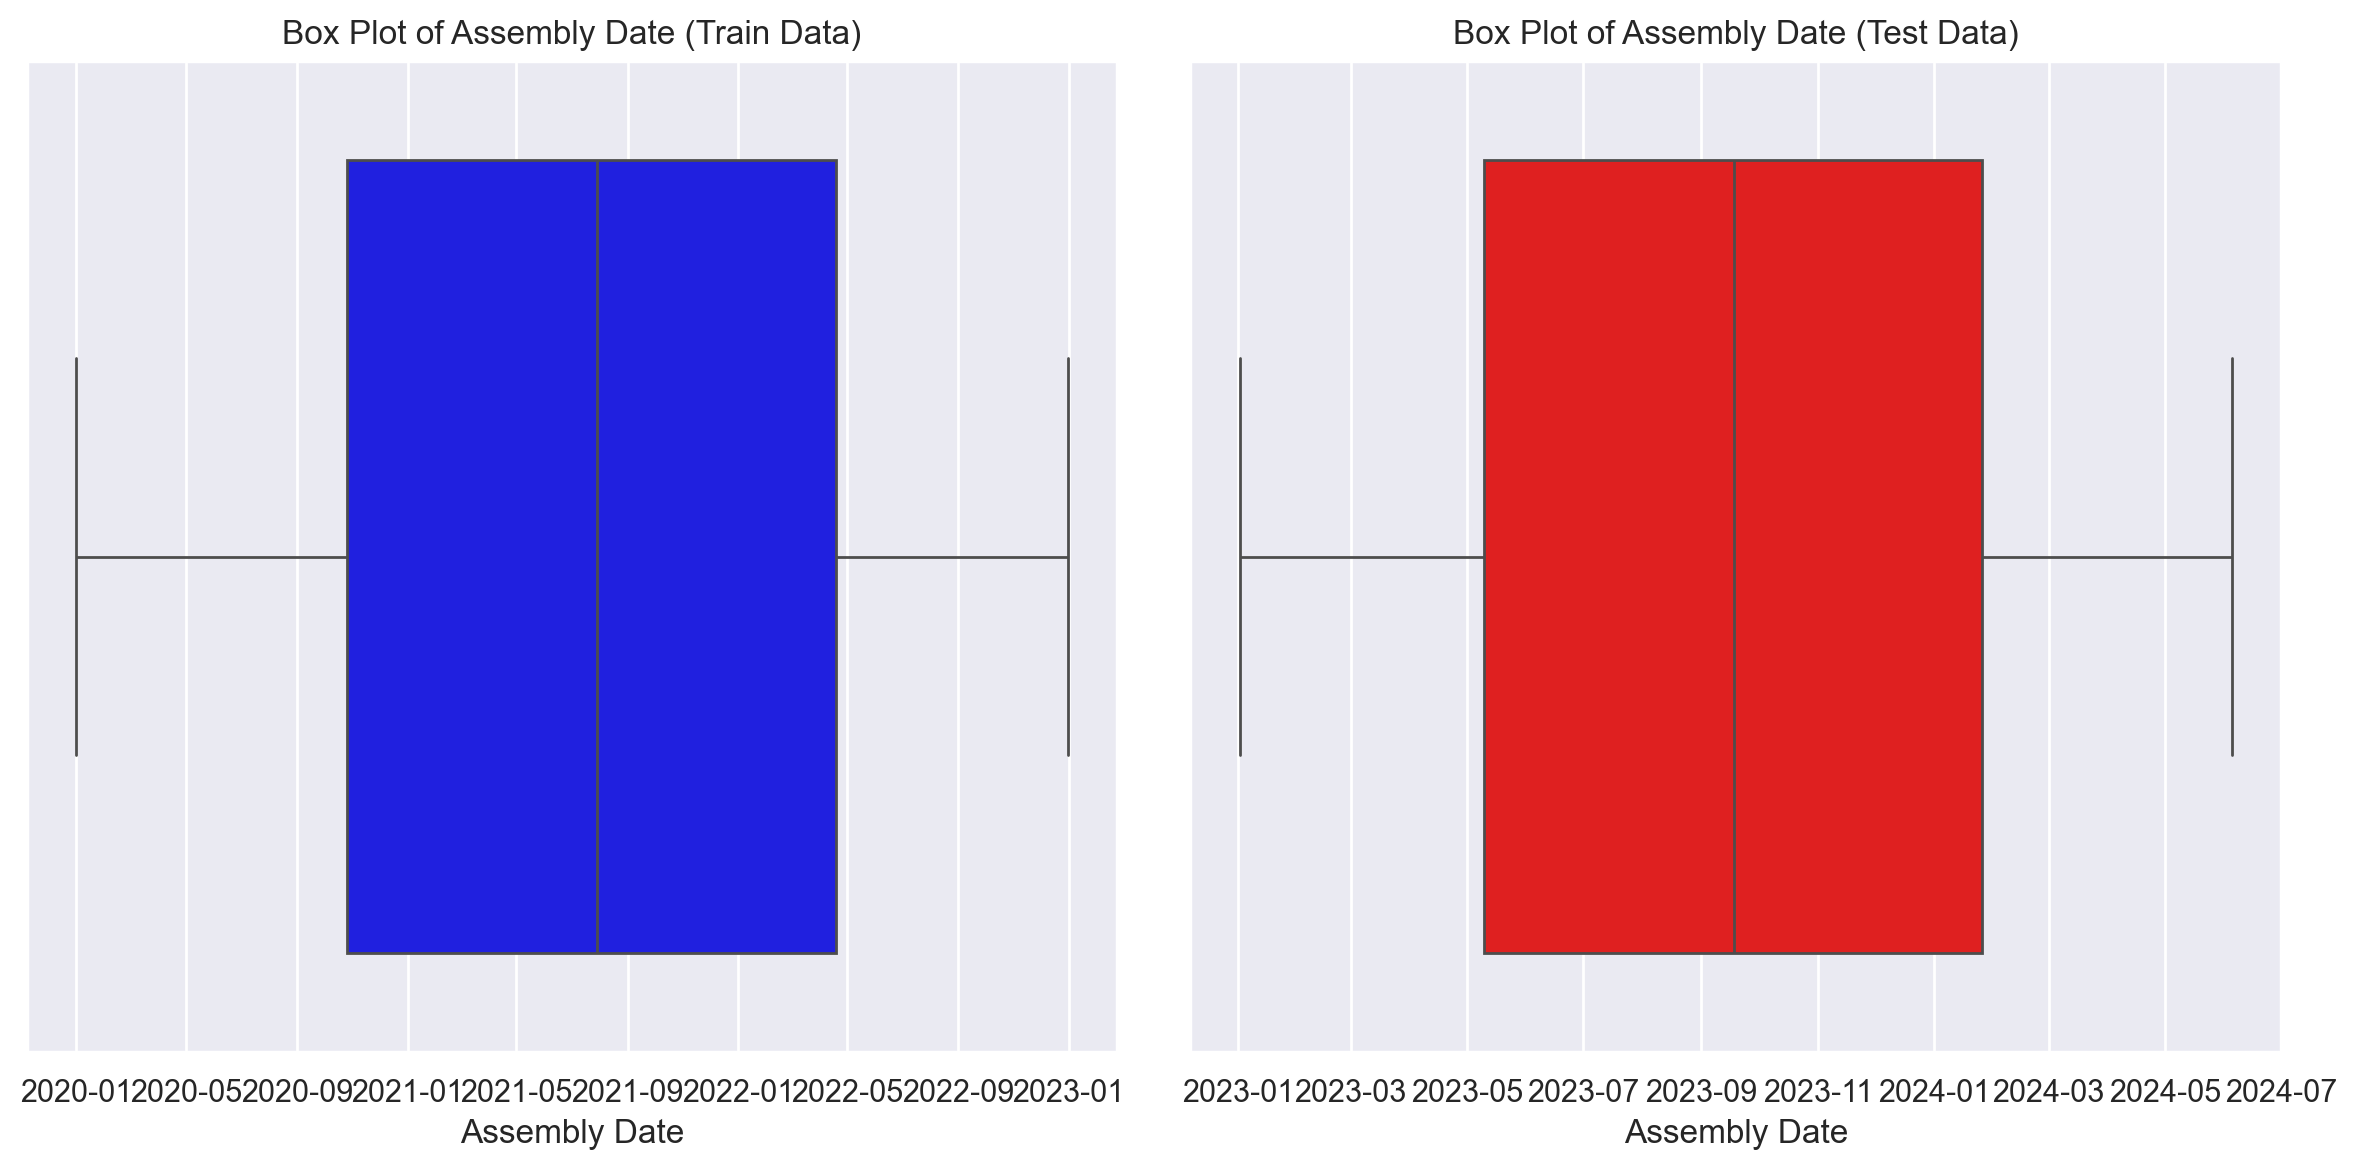

In [68]:
plt.figure(figsize=(12, 6))

ax1 = plt.subplot(1, 2, 1)  
sns.boxplot(data=train_data, x='Assembly Date', color='blue')
plt.title('Box Plot of Assembly Date (Train Data)')

ax2 = plt.subplot(1, 2, 2)  
sns.boxplot(data=test_data, x='Assembly Date', color='red')
plt.title('Box Plot of Assembly Date (Test Data)')

plt.tight_layout()
plt.show()

In [69]:
calculate_missing_percentage(train_data[["Assembly Date"]], test_data[["Assembly Date"]])

Empty DataFrame
Columns: [(Train Data, NaN Percentage), (Train Data, NaN Rows), (Train Data, Data Type), (Test Data, NaN Percentage), (Test Data, NaN Rows), (Test Data, Data Type)]
Index: []

### Attorney/Representative

In [70]:
print(train_data["Attorney/Representative"].value_counts())
print("\n")
print(test_data["Attorney/Representative"].value_counts())

Attorney/Representative
N    392291
Y    181735
Name: count, dtype: int64


Attorney/Representative
N    306476
Y     81499
Name: count, dtype: int64


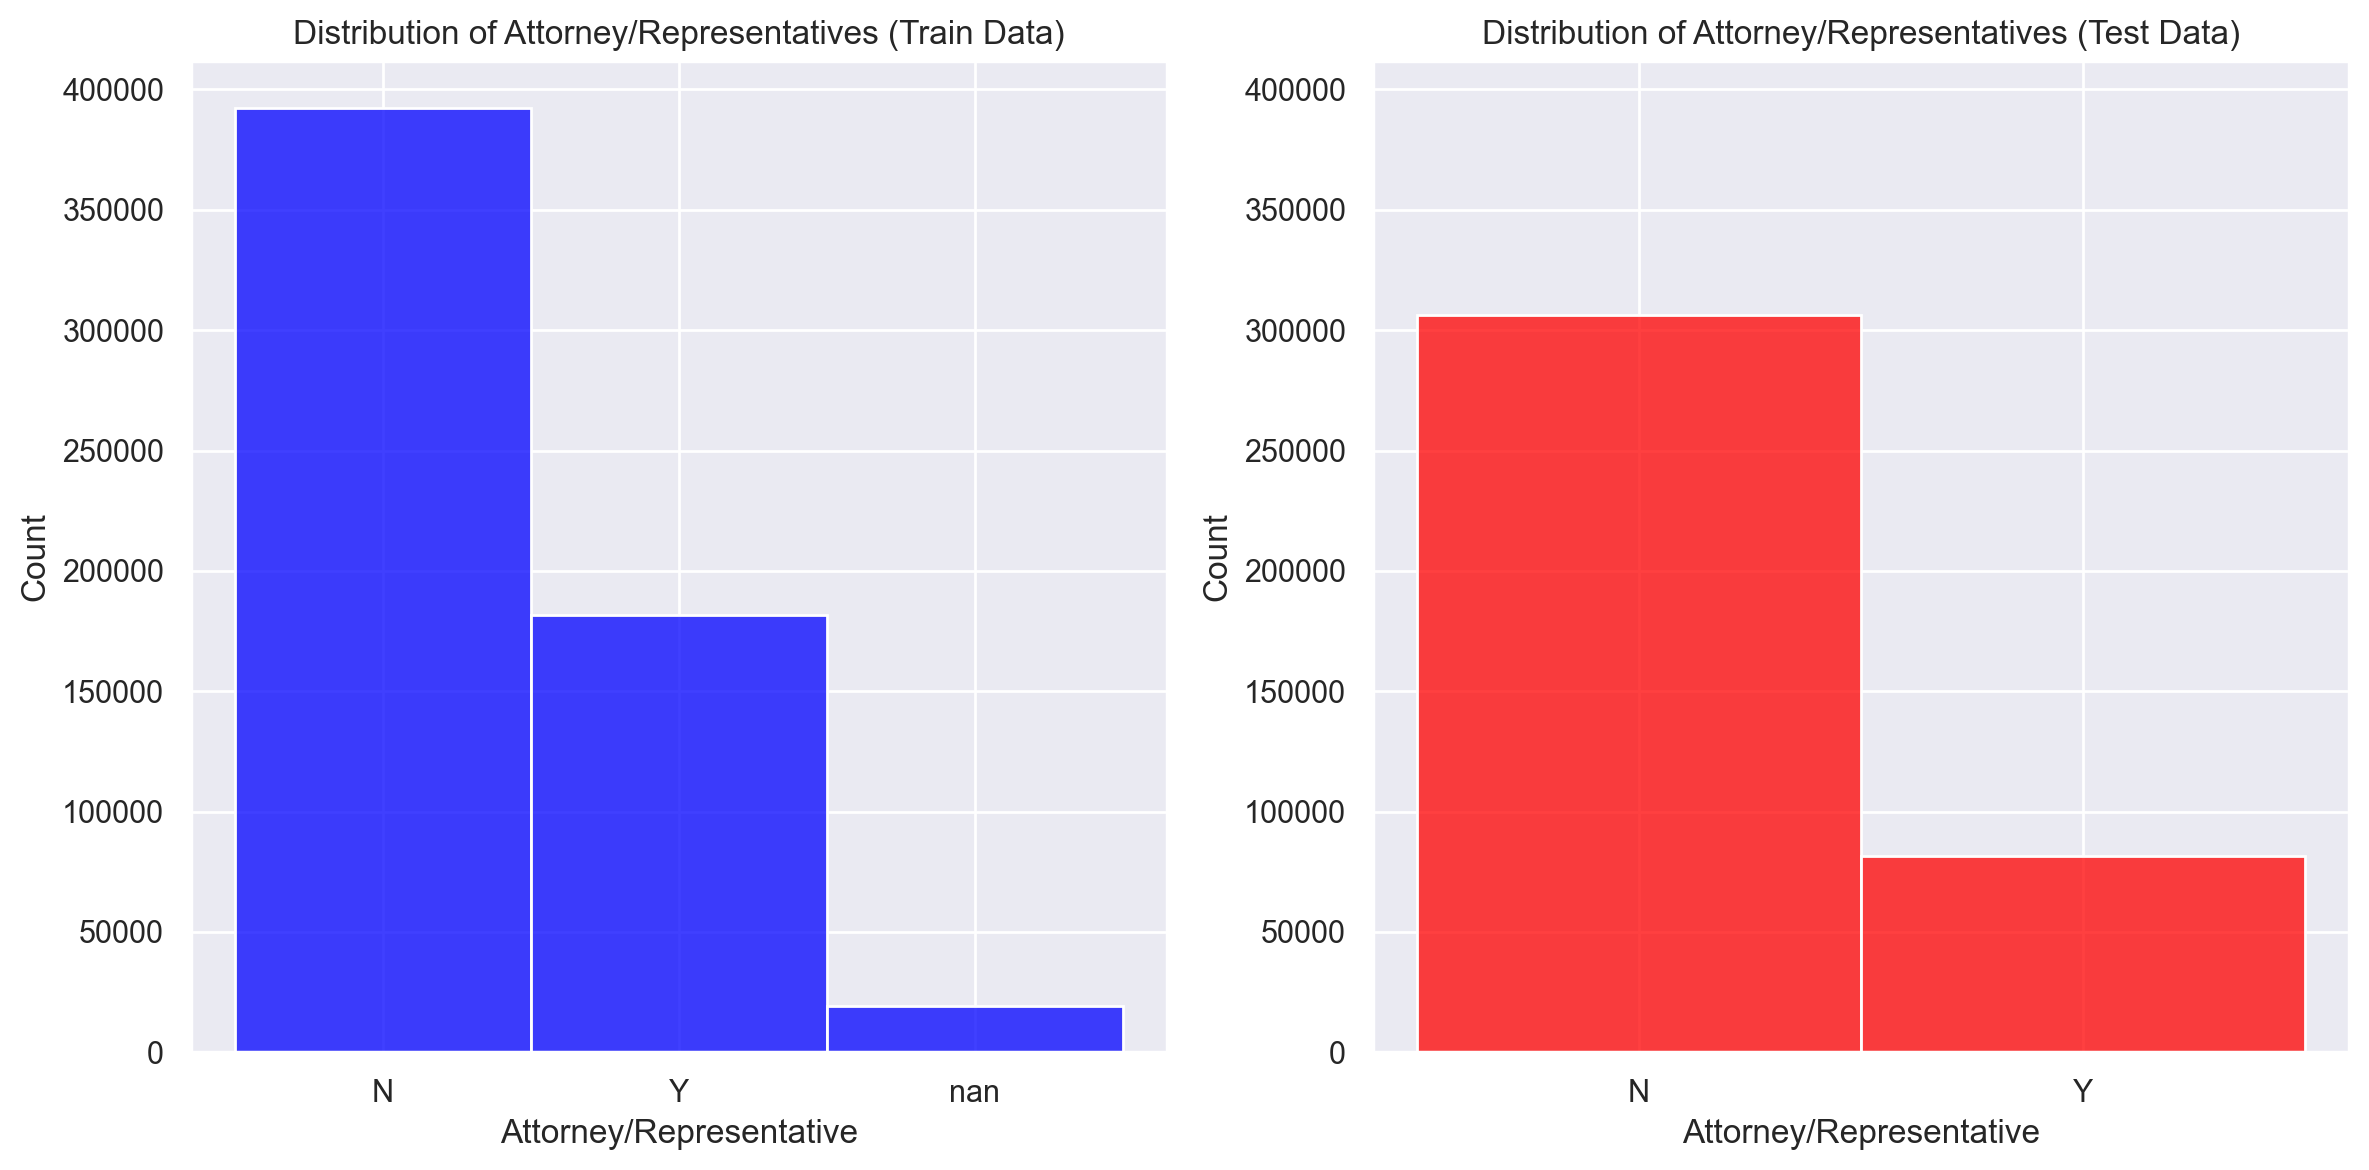

In [71]:
train_data['Attorney/Representative'] = train_data['Attorney/Representative'].astype(str)
test_data['Attorney/Representative'] = test_data['Attorney/Representative'].astype(str)


plt.figure(figsize=(12, 6))

ax1 = plt.subplot(1, 2, 1) 
sns.histplot(data=train_data, x='Attorney/Representative', kde=False, color='blue', bins=30)
plt.title('Distribution of Attorney/Representatives (Train Data)')

ax2 = plt.subplot(1, 2, 2)  
sns.histplot(data=test_data, x='Attorney/Representative', kde=False, color='red', bins=30)
plt.title('Distribution of Attorney/Representatives (Test Data)')

max_y = max(ax1.get_ylim()[1], ax2.get_ylim()[1])

ax1.set_ylim(0, max_y)
ax2.set_ylim(0, max_y)

plt.tight_layout()
plt.show()

In [72]:
calculate_missing_percentage( train_data[["Attorney/Representative"]], test_data[["Attorney/Representative"]])

Empty DataFrame
Columns: [(Train Data, NaN Percentage), (Train Data, NaN Rows), (Train Data, Data Type), (Test Data, NaN Percentage), (Test Data, NaN Rows), (Test Data, Data Type)]
Index: []

### C-2 Date

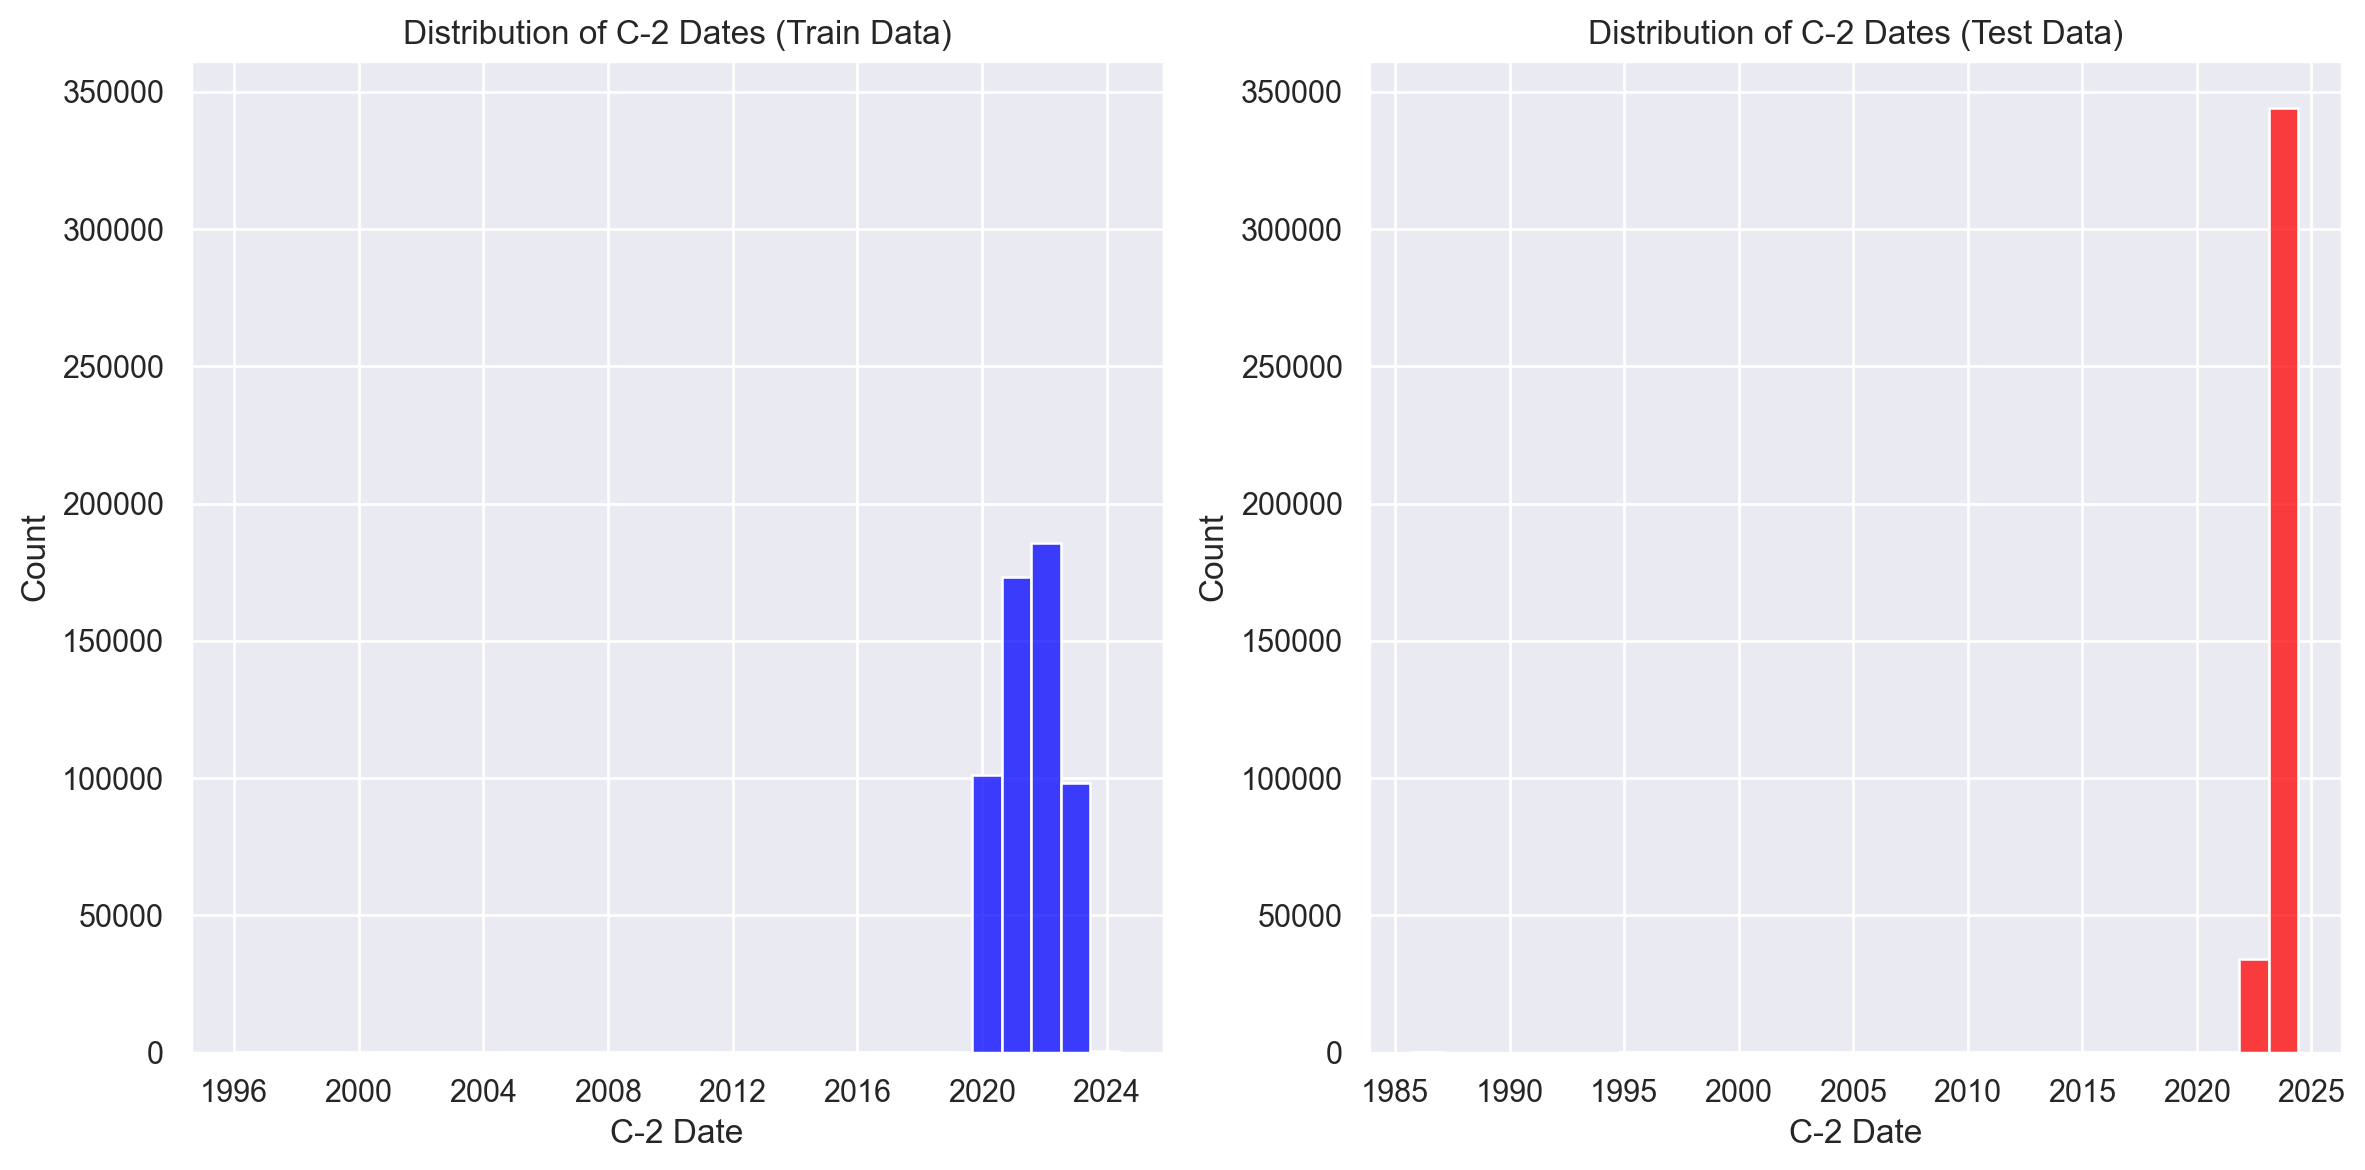

In [73]:
# Convert C-2 Date to datetime format 
train_data['C-2 Date'] = pd.to_datetime(train_data['C-2 Date'])
test_data['C-2 Date'] = pd.to_datetime(test_data['C-2 Date'])

plt.figure(figsize=(12, 6))

ax1 = plt.subplot(1, 2, 1)  
sns.histplot(data=train_data, x='C-2 Date', kde=False, color='blue', bins=30)
plt.title('Distribution of C-2 Dates (Train Data)')


ax2 = plt.subplot(1, 2, 2)  
sns.histplot(data=test_data, x='C-2 Date', kde=False, color='red', bins=30)
plt.title('Distribution of C-2 Dates (Test Data)')


max_y = max(ax1.get_ylim()[1], ax2.get_ylim()[1])

ax1.set_ylim(0, max_y)
ax2.set_ylim(0, max_y)

plt.tight_layout()
plt.show()

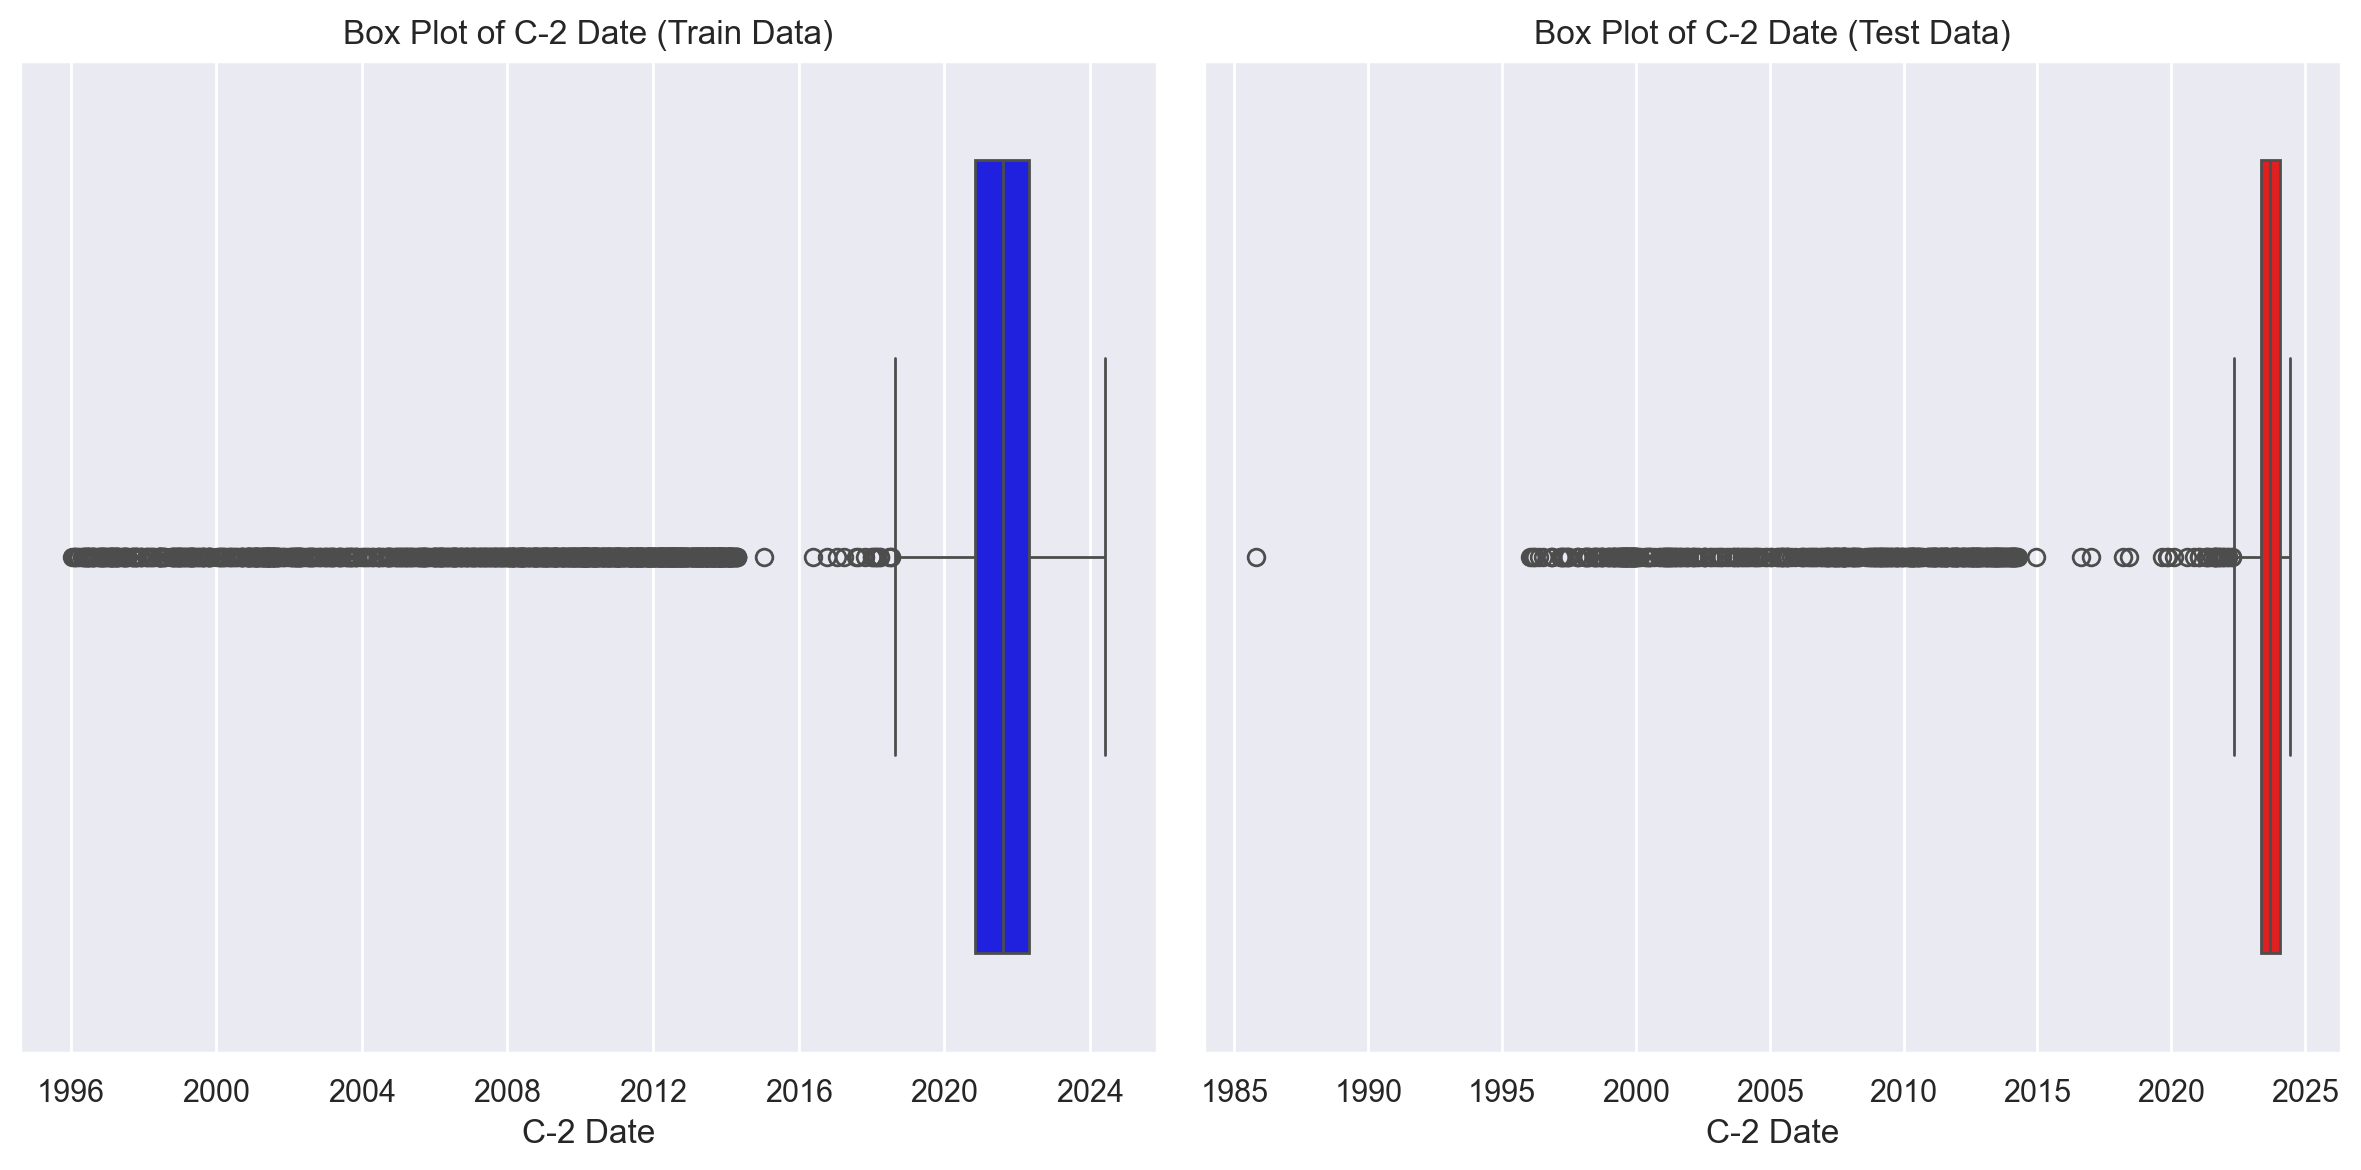

In [74]:
plt.figure(figsize=(12, 6))


ax1 = plt.subplot(1, 2, 1)  
sns.boxplot(data=train_data, x='C-2 Date', color='blue')
plt.title('Box Plot of C-2 Date (Train Data)')

ax2 = plt.subplot(1, 2, 2)  
sns.boxplot(data=test_data, x='C-2 Date', color='red')
plt.title('Box Plot of C-2 Date (Test Data)')

plt.tight_layout()
plt.show()

In [75]:
calculate_missing_percentage(train_data[["C-2 Date"]], test_data[["C-2 Date"]])

Train Data                               Test Data           \
         NaN Percentage NaN Rows       Data Type NaN Percentage NaN Rows   
Feature                                                                    
C-2 Date        5.72985    34005  datetime64[ns]       2.354275     9134   

                          
               Data Type  
Feature                   
C-2 Date  datetime64[ns]

### C-3 Date

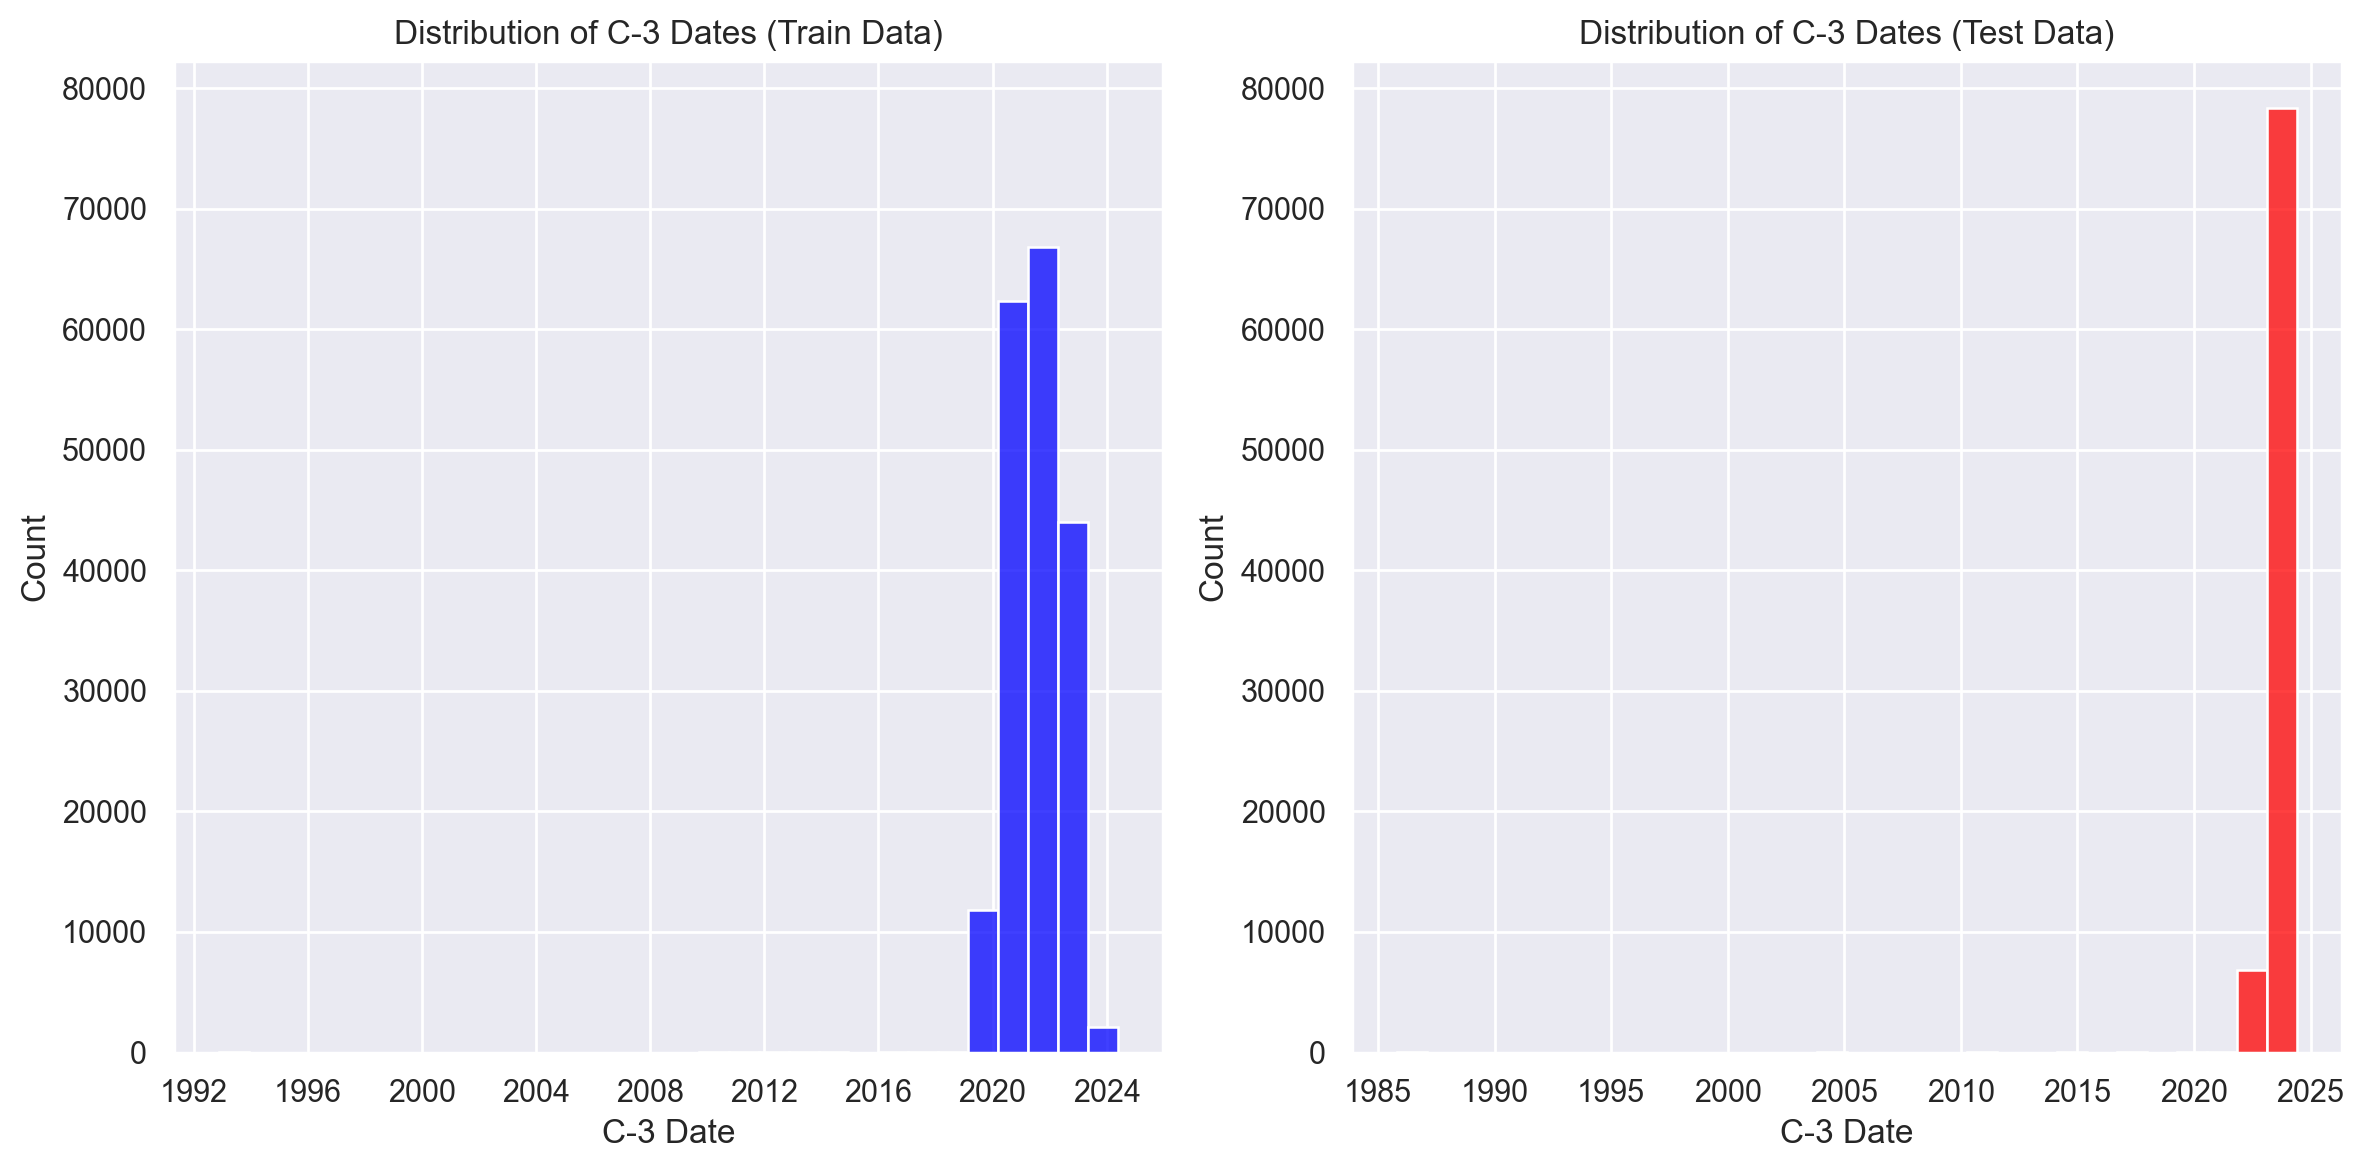

In [76]:
# Convert C-3 Date to datetime format 
train_data['C-3 Date'] = pd.to_datetime(train_data['C-3 Date'])
test_data['C-3 Date'] = pd.to_datetime(test_data['C-3 Date'])


plt.figure(figsize=(12, 6))

ax1 = plt.subplot(1, 2, 1)  
sns.histplot(data=train_data, x='C-3 Date', kde=False, color='blue', bins=30)
plt.title('Distribution of C-3 Dates (Train Data)')

ax2 = plt.subplot(1, 2, 2)  
sns.histplot(data=test_data, x='C-3 Date', kde=False, color='red', bins=30)
plt.title('Distribution of C-3 Dates (Test Data)')

max_y = max(ax1.get_ylim()[1], ax2.get_ylim()[1])

ax1.set_ylim(0, max_y)
ax2.set_ylim(0, max_y)

plt.tight_layout()
plt.show()

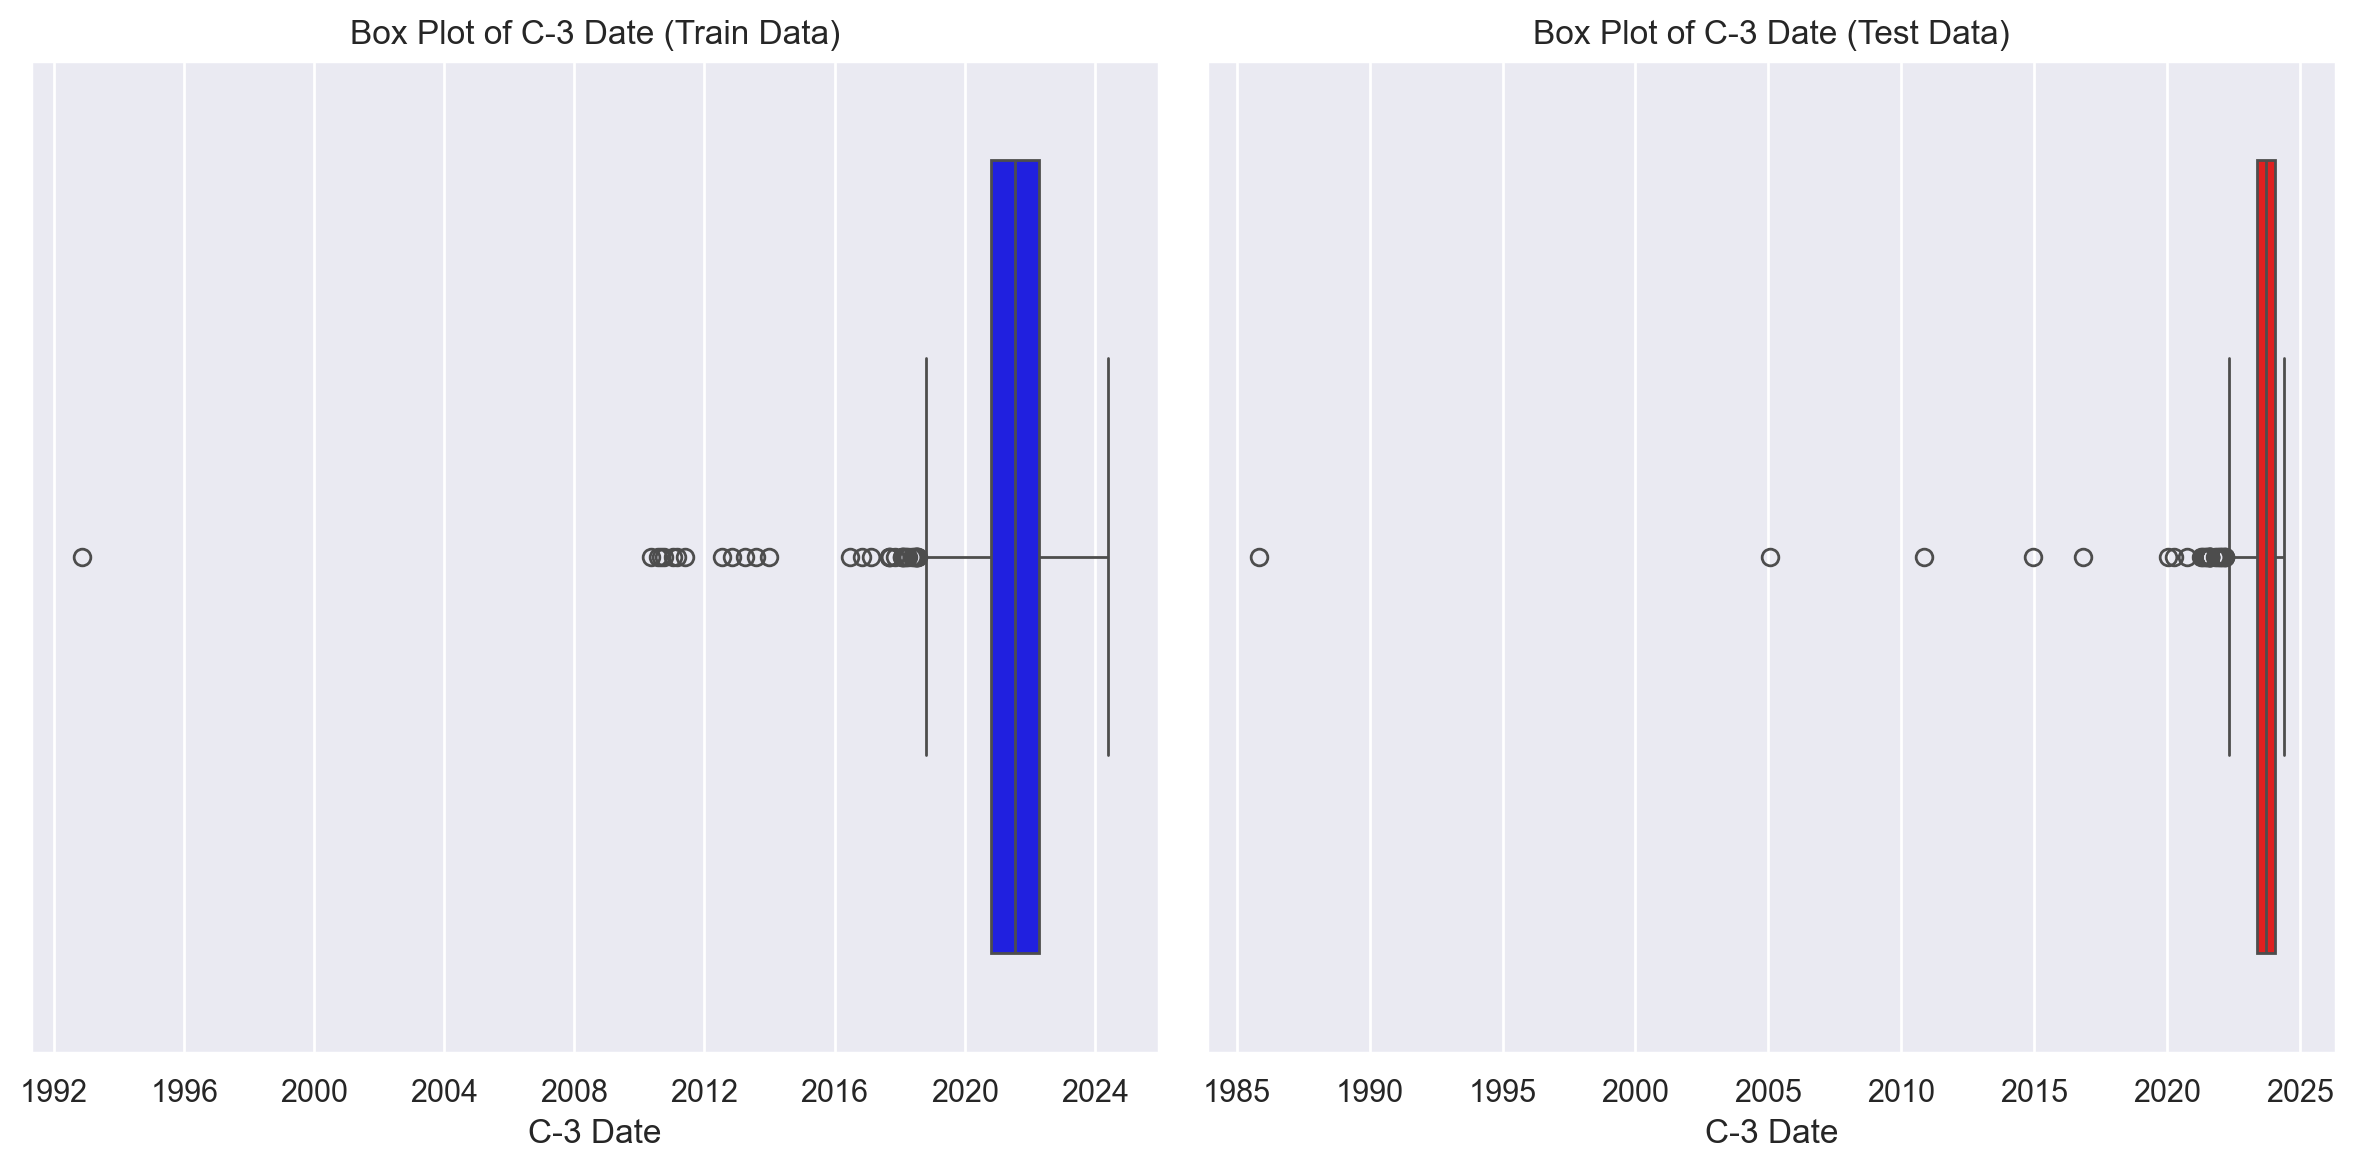

In [77]:
plt.figure(figsize=(12, 6))

ax1 = plt.subplot(1, 2, 1) 
sns.boxplot(data=train_data, x='C-3 Date', color='blue')
plt.title('Box Plot of C-3 Date (Train Data)')

ax2 = plt.subplot(1, 2, 2)  
sns.boxplot(data=test_data, x='C-3 Date', color='red')
plt.title('Box Plot of C-3 Date (Test Data)')

plt.tight_layout()
plt.show()

In [78]:
calculate_missing_percentage(train_data[["C-3 Date"]], test_data[["C-3 Date"]])

Train Data                               Test Data           \
         NaN Percentage NaN Rows       Data Type NaN Percentage NaN Rows   
Feature                                                                    
C-3 Date      68.449174   406226  datetime64[ns]      78.035698   302759   

                          
               Data Type  
Feature                   
C-3 Date  datetime64[ns]

### Carrier Name

In [79]:
print("Number of unique values in Train Data:",train_data["Carrier Name"].nunique())
print("Number of unique values in Test Data:",test_data["Carrier Name"].nunique())

Number of unique values in Train Data: 2046
Number of unique values in Test Data: 1598


In [80]:
calculate_missing_percentage(train_data[["Carrier Name"]], test_data[["Carrier Name"]])

Train Data                         Test Data           \
             NaN Percentage NaN Rows Data Type NaN Percentage NaN Rows   
Feature                                                                  
Carrier Name       3.276487    19445    object            NaN      NaN   

                        
             Data Type  
Feature                 
Carrier Name       NaN

### Carrier Type

In [81]:
print(train_data["Carrier Type"].value_counts())
print("\n")
print(test_data["Carrier Type"].value_counts())

Carrier Type
1A. PRIVATE                                    285368
3A. SELF PUBLIC                                121920
2A. SIF                                        111144
4A. SELF PRIVATE                                52788
UNKNOWN                                          1774
5D. SPECIAL FUND - UNKNOWN                       1023
5C. SPECIAL FUND - POI CARRIER WCB MENANDS          5
5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)         4
Name: count, dtype: int64


Carrier Type
1A. PRIVATE                                    201827
3A. SELF PUBLIC                                 78948
2A. SIF                                         66189
4A. SELF PRIVATE                                38619
UNKNOWN                                          1642
5D. SPECIAL FUND - UNKNOWN                        748
5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)         2
Name: count, dtype: int64


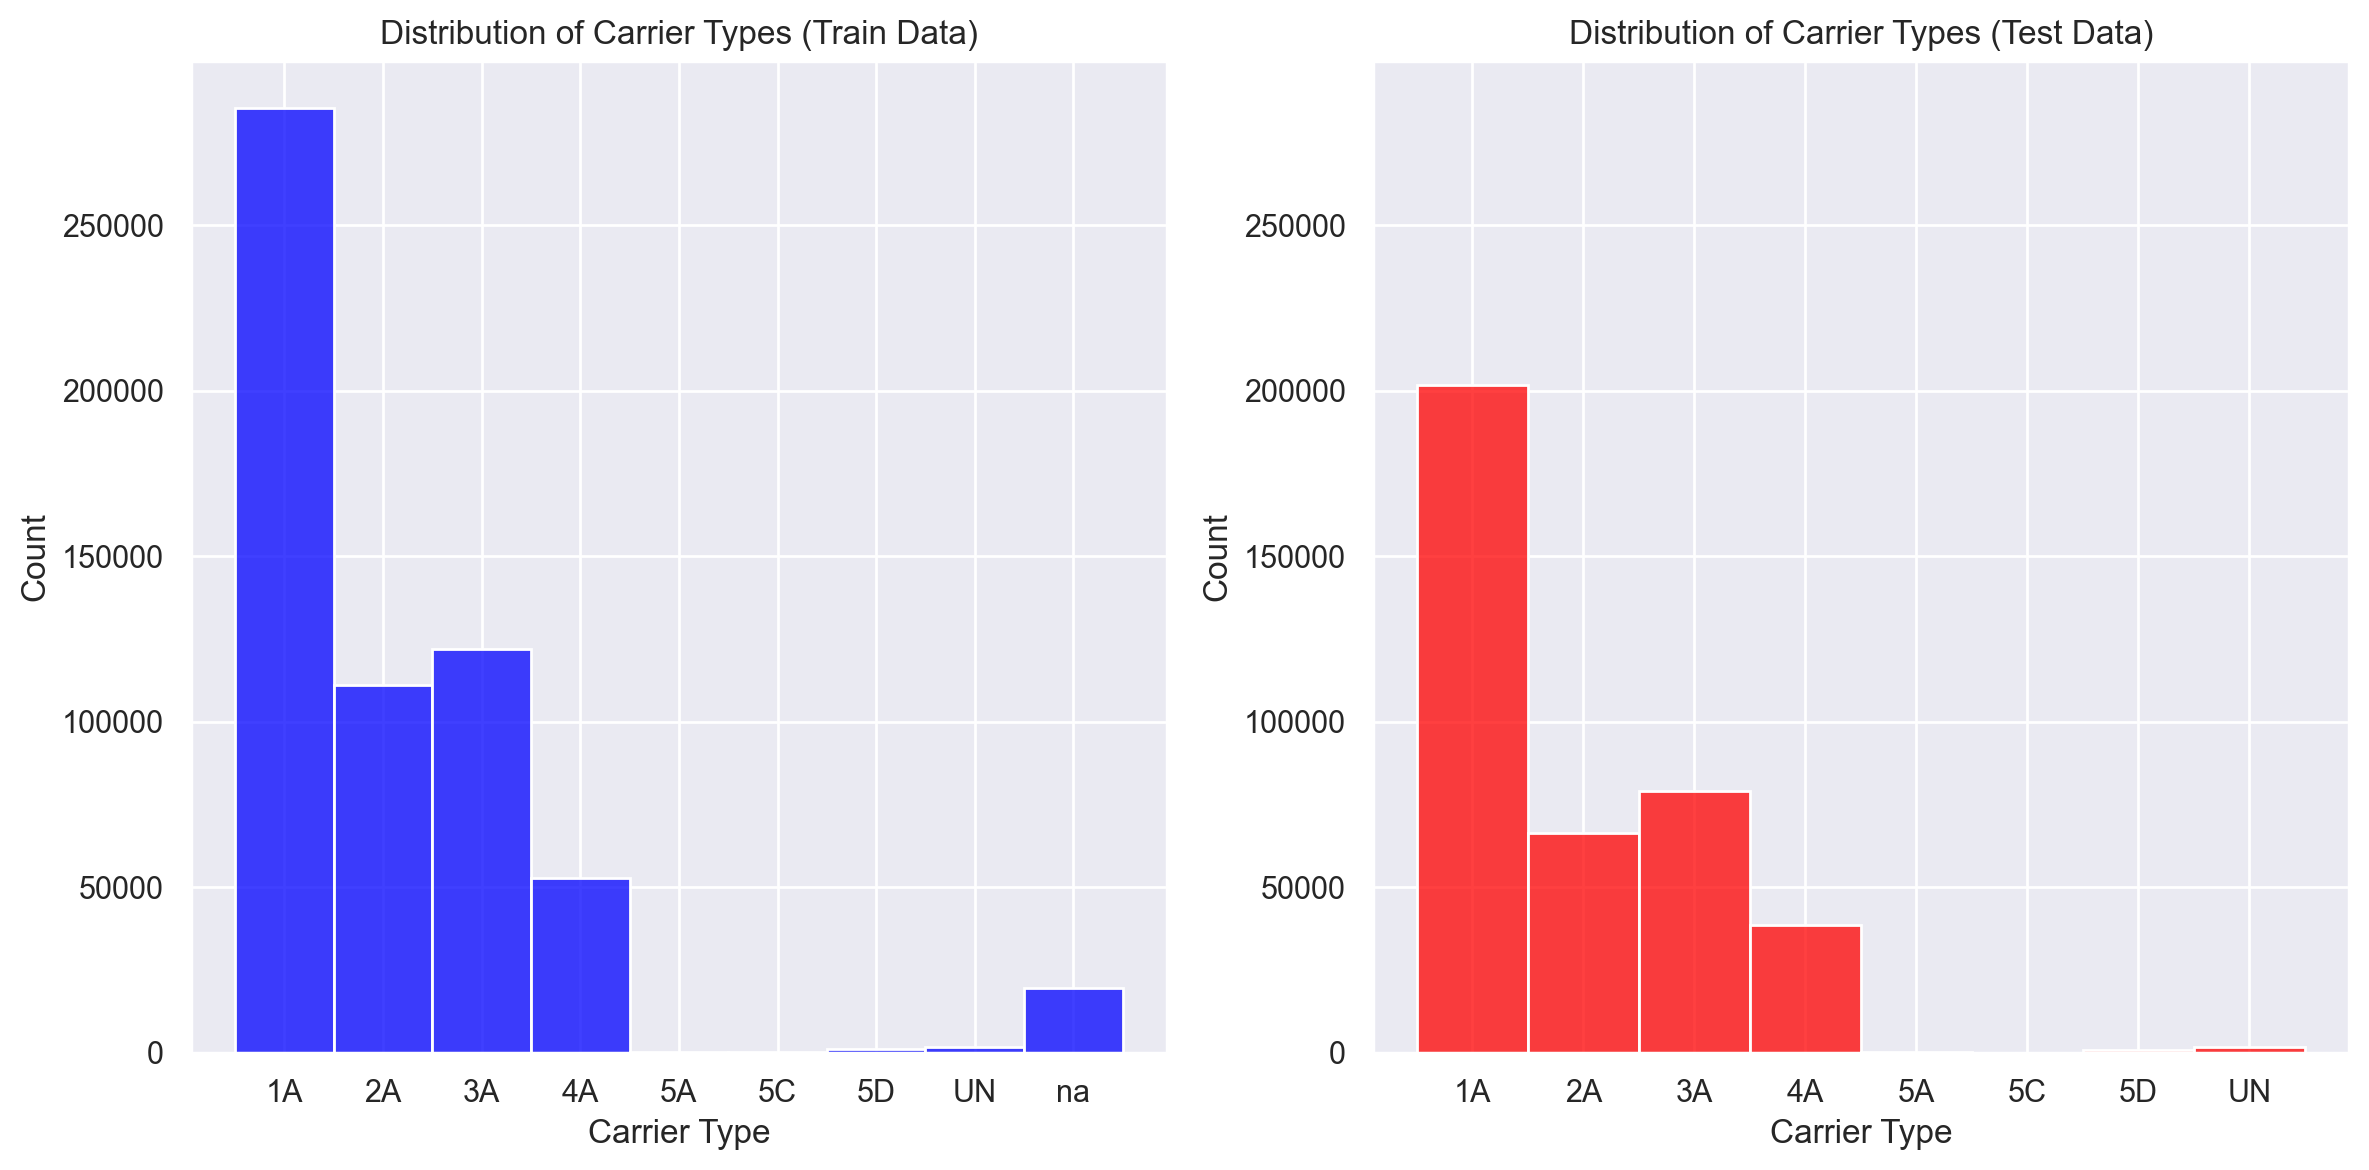

In [82]:
train_data['Carrier Type'] = train_data['Carrier Type'].astype(str)
test_data['Carrier Type'] = test_data['Carrier Type'].astype(str)

carrier_order = sorted(train_data['Carrier Type'].unique())

# Convert 'Carrier Type' column to categorical with the same order in both dataframes
train_data['Carrier Type'] = pd.Categorical(train_data['Carrier Type'], categories=carrier_order, ordered=True)
test_data['Carrier Type'] = pd.Categorical(test_data['Carrier Type'], categories=carrier_order, ordered=True)

plt.figure(figsize=(12, 6))

ax1 = plt.subplot(1, 2, 1)  
sns.histplot(data=train_data, x='Carrier Type', kde=False, color='blue', bins=len(carrier_order))
ax1.set_title('Distribution of Carrier Types (Train Data)')

ax1.set_xticklabels([label.get_text()[:2] for label in ax1.get_xticklabels()])

ax2 = plt.subplot(1, 2, 2)  
sns.histplot(data=test_data, x='Carrier Type', kde=False, color='red', bins=len(carrier_order))
ax2.set_title('Distribution of Carrier Types (Test Data)')

ax2.set_xticklabels([label.get_text()[:2] for label in ax2.get_xticklabels()])

max_y = max(ax1.get_ylim()[1], ax2.get_ylim()[1])

ax1.set_ylim(0, max_y)
ax2.set_ylim(0, max_y)

plt.tight_layout()
plt.show()

In [83]:
calculate_missing_percentage(train_data[["Carrier Type"]], test_data[["Carrier Type"]])

Empty DataFrame
Columns: [(Train Data, NaN Percentage), (Train Data, NaN Rows), (Train Data, Data Type), (Test Data, NaN Percentage), (Test Data, NaN Rows), (Test Data, Data Type)]
Index: []

### County of Injury

In [84]:
print("Number of unique values in Train Data:",train_data["County of Injury"].nunique())
print("Number of unique values in Test Data:",test_data["County of Injury"].nunique())

Number of unique values in Train Data: 63
Number of unique values in Test Data: 63


In [85]:
calculate_missing_percentage(train_data[["County of Injury"]], test_data[["County of Injury"]])

Train Data                         Test Data           \
                 NaN Percentage NaN Rows Data Type NaN Percentage NaN Rows   
Feature                                                                      
County of Injury       3.276487    19445    object            NaN      NaN   

                            
                 Data Type  
Feature                     
County of Injury       NaN

### COVID-19 Indicator

In [86]:
print("Number of unique values in Train Data:",train_data["COVID-19 Indicator"].nunique())
print("Number of unique values in Test Data:",test_data["COVID-19 Indicator"].nunique())

Number of unique values in Train Data: 2
Number of unique values in Test Data: 2


In [87]:
print("Values in Train Data:",train_data["COVID-19 Indicator"].value_counts())
print("\n")
print("Values in Test Data:",test_data["COVID-19 Indicator"].value_counts())

Values in Train Data: COVID-19 Indicator
N    546505
Y     27521
Name: count, dtype: int64


Values in Test Data: COVID-19 Indicator
N    385434
Y      2541
Name: count, dtype: int64


In [88]:
train_data['COVID-19 Indicator'] = train_data['COVID-19 Indicator'].astype(str)
test_data['COVID-19 Indicator'] = test_data['COVID-19 Indicator'].astype(str)

plt.figure(figsize=(12, 6))

ax1 = plt.subplot(1, 2, 1)  
sns.histplot(data=train_data, x='COVID-19 Indicator', kde=False, color='blue', bins=30)
plt.title('Distribution of COVID-19 Indicators (Train Data)')

ax2 = plt.subplot(1, 2, 2)  
sns.histplot(data=test_data, x='COVID-19 Indicator', kde=False, color='red', bins=30)
plt.title('Distribution of COVID-19 Indicators (Test Data)')

max_y = max(ax1.get_ylim()[1], ax2.get_ylim()[1])

ax1.set_ylim(0, max_y)
ax2.set_ylim(0, max_y)

plt.tight_layout()
plt.show()

In [89]:
calculate_missing_percentage(train_data[["COVID-19 Indicator"]], test_data[["COVID-19 Indicator"]])

Empty DataFrame
Columns: [(Train Data, NaN Percentage), (Train Data, NaN Rows), (Train Data, Data Type), (Test Data, NaN Percentage), (Test Data, NaN Rows), (Test Data, Data Type)]
Index: []

### District Name

In [90]:
print("Number of unique values in Train Data:",train_data["District Name"].nunique())
print("Number of unique values in Test Data:",test_data["District Name"].nunique())

Number of unique values in Train Data: 8
Number of unique values in Test Data: 8


In [91]:
print("Values in Train Data:",train_data["District Name"].value_counts())
print("\n")
print("Values in Test Data:",test_data["District Name"].value_counts())

Values in Train Data: District Name
NYC           270779
ALBANY         86171
HAUPPAUGE      60536
BUFFALO        45605
SYRACUSE       44646
ROCHESTER      40449
BINGHAMTON     21864
STATEWIDE       3976
Name: count, dtype: int64


Values in Test Data: District Name
NYC           187972
ALBANY         56500
HAUPPAUGE      36656
BUFFALO        31481
SYRACUSE       29537
ROCHESTER      28073
BINGHAMTON     15382
STATEWIDE       2374
Name: count, dtype: int64


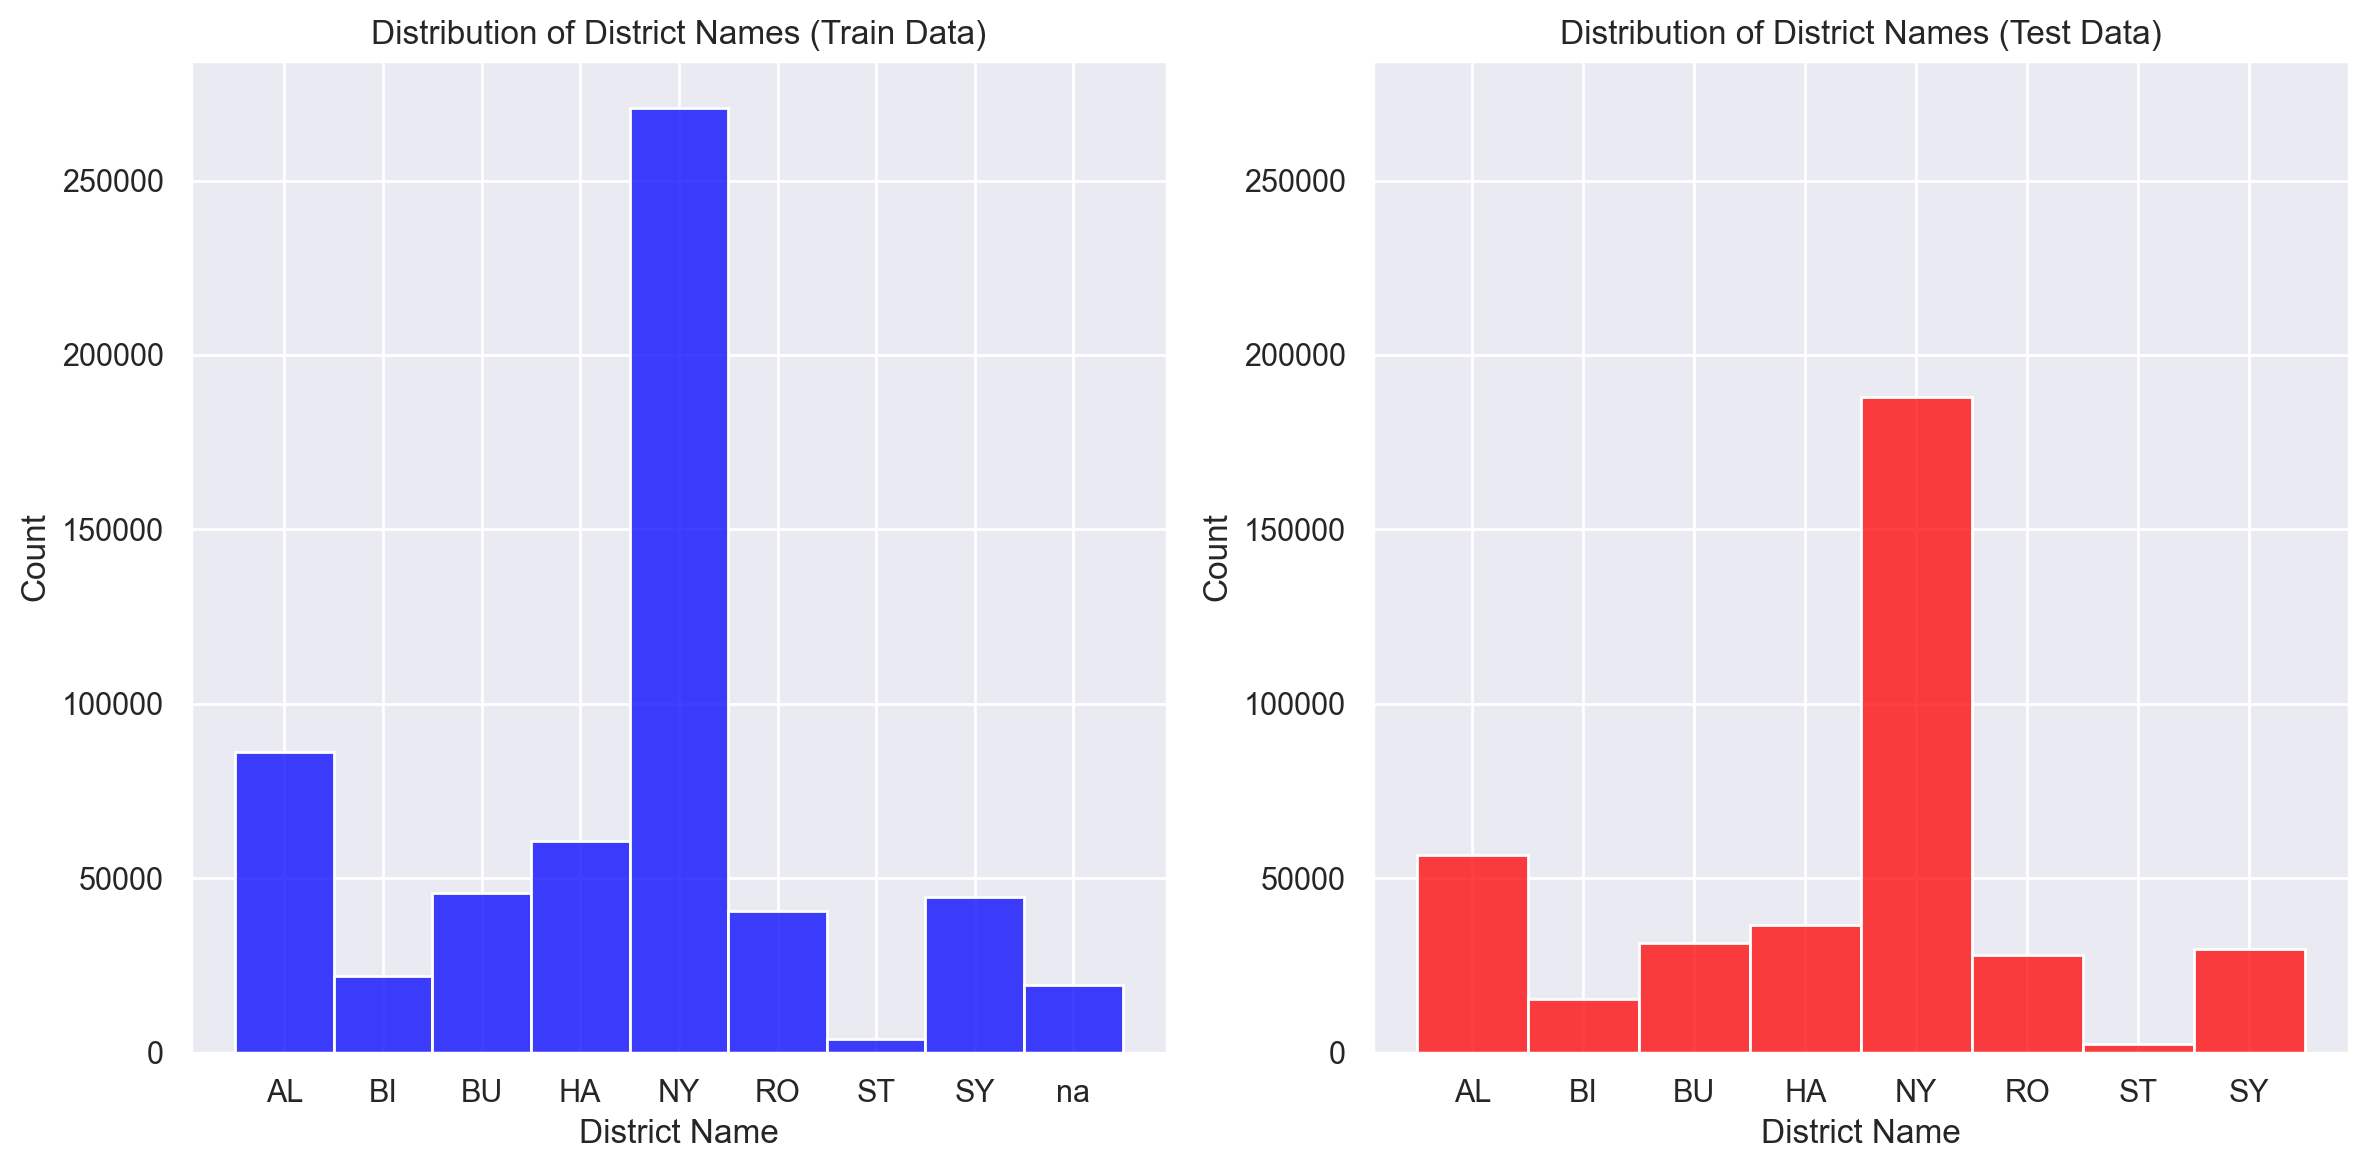

In [92]:
train_data['District Name'] = train_data['District Name'].astype(str)
test_data['District Name'] = test_data['District Name'].astype(str)

carrier_order = sorted(train_data['District Name'].unique())

train_data['District Name'] = pd.Categorical(train_data['District Name'], categories=carrier_order, ordered=True)
test_data['District Name'] = pd.Categorical(test_data['District Name'], categories=carrier_order, ordered=True)

plt.figure(figsize=(12, 6))

ax1 = plt.subplot(1, 2, 1)  
sns.histplot(data=train_data, x='District Name', kde=False, color='blue', bins=len(carrier_order))
ax1.set_title('Distribution of District Names (Train Data)')

ax1.set_xticklabels([label.get_text()[:2] for label in ax1.get_xticklabels()])

ax2 = plt.subplot(1, 2, 2)  
sns.histplot(data=test_data, x='District Name', kde=False, color='red', bins=len(carrier_order))
ax2.set_title('Distribution of District Names (Test Data)')

ax2.set_xticklabels([label.get_text()[:2] for label in ax2.get_xticklabels()])

max_y = max(ax1.get_ylim()[1], ax2.get_ylim()[1])

ax1.set_ylim(0, max_y)
ax2.set_ylim(0, max_y)

plt.tight_layout()
plt.show()

In [93]:
calculate_missing_percentage(train_data[["District Name"]], test_data[["District Name"]])

Empty DataFrame
Columns: [(Train Data, NaN Percentage), (Train Data, NaN Rows), (Train Data, Data Type), (Test Data, NaN Percentage), (Test Data, NaN Rows), (Test Data, Data Type)]
Index: []

### First Hearing Date

In [94]:
calculate_missing_percentage(train_data[["First Hearing Date"]], test_data[["First Hearing Date"]])

Train Data                         Test Data           \
                   NaN Percentage NaN Rows Data Type NaN Percentage NaN Rows   
Feature                                                                        
First Hearing Date      74.590502   442673    object      88.909595   344947   

                              
                   Data Type  
Feature                       
First Hearing Date    object

This feature contains a large number of missing values, making it difficult to generate an accurate visualization. However, we can infer that the missing values indicate that no hearing occurred for this process.

### Gender

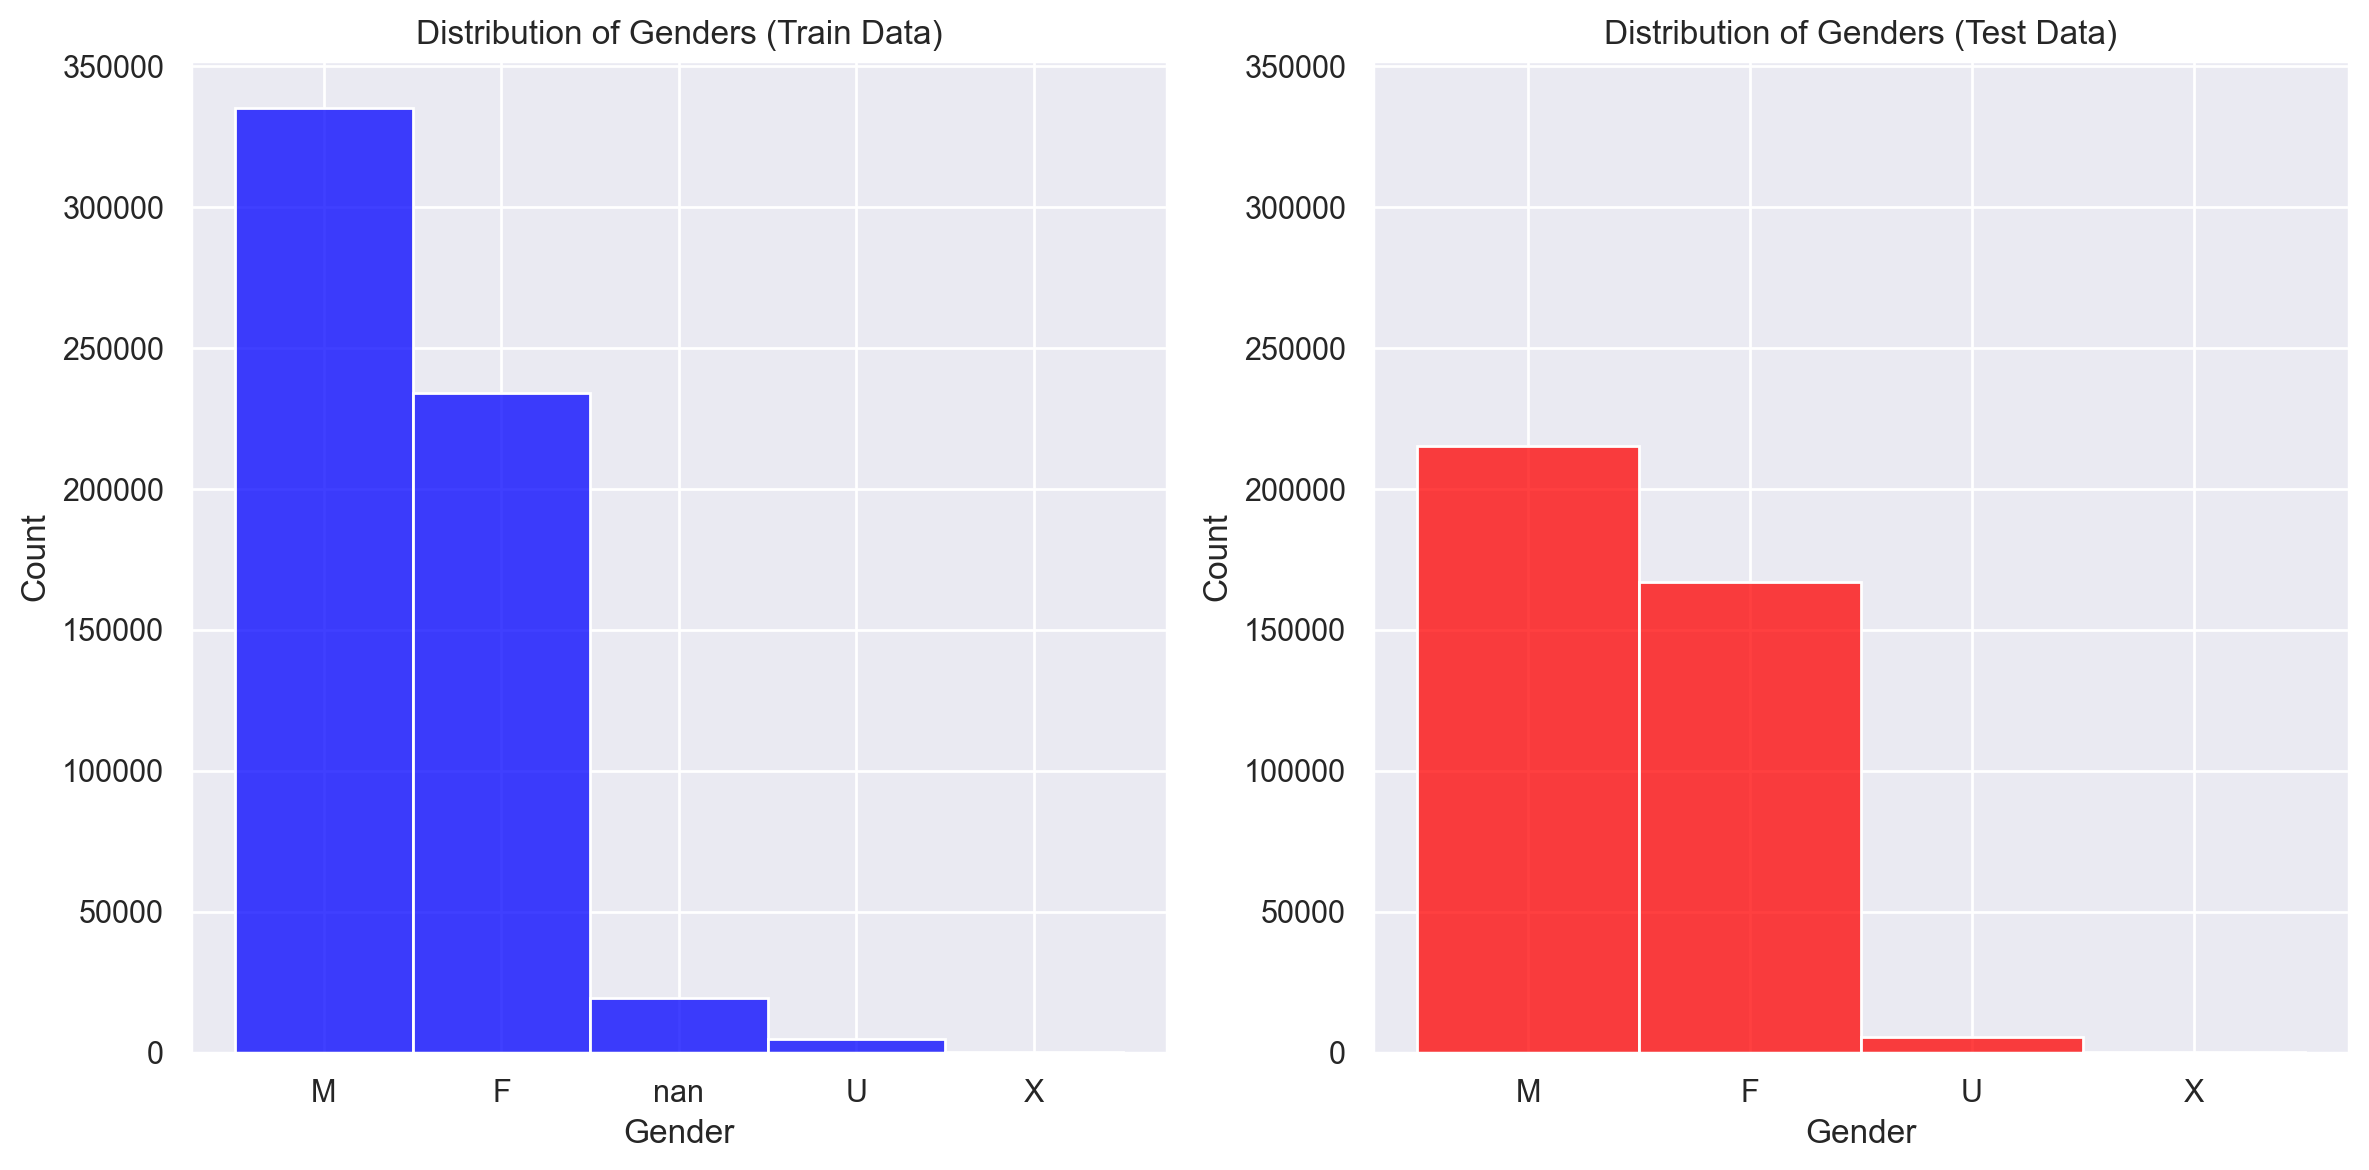

In [95]:
train_data['Gender'] = train_data['Gender'].astype(str)
test_data['Gender'] = test_data['Gender'].astype(str)

plt.figure(figsize=(12, 6))

ax1 = plt.subplot(1, 2, 1)  
sns.histplot(data=train_data, x='Gender', kde=False, color='blue', bins=30)
plt.title('Distribution of Genders (Train Data)')

ax2 = plt.subplot(1, 2, 2)  
sns.histplot(data=test_data, x='Gender', kde=False, color='red', bins=30)
plt.title('Distribution of Genders (Test Data)')

max_y = max(ax1.get_ylim()[1], ax2.get_ylim()[1])

ax1.set_ylim(0, max_y)
ax2.set_ylim(0, max_y)

plt.tight_layout()
plt.show()

In [96]:
calculate_missing_percentage(train_data[["Gender"]], test_data[["Gender"]])

Empty DataFrame
Columns: [(Train Data, NaN Percentage), (Train Data, NaN Rows), (Train Data, Data Type), (Test Data, NaN Percentage), (Test Data, NaN Rows), (Test Data, Data Type)]
Index: []

### Medical Fee Region

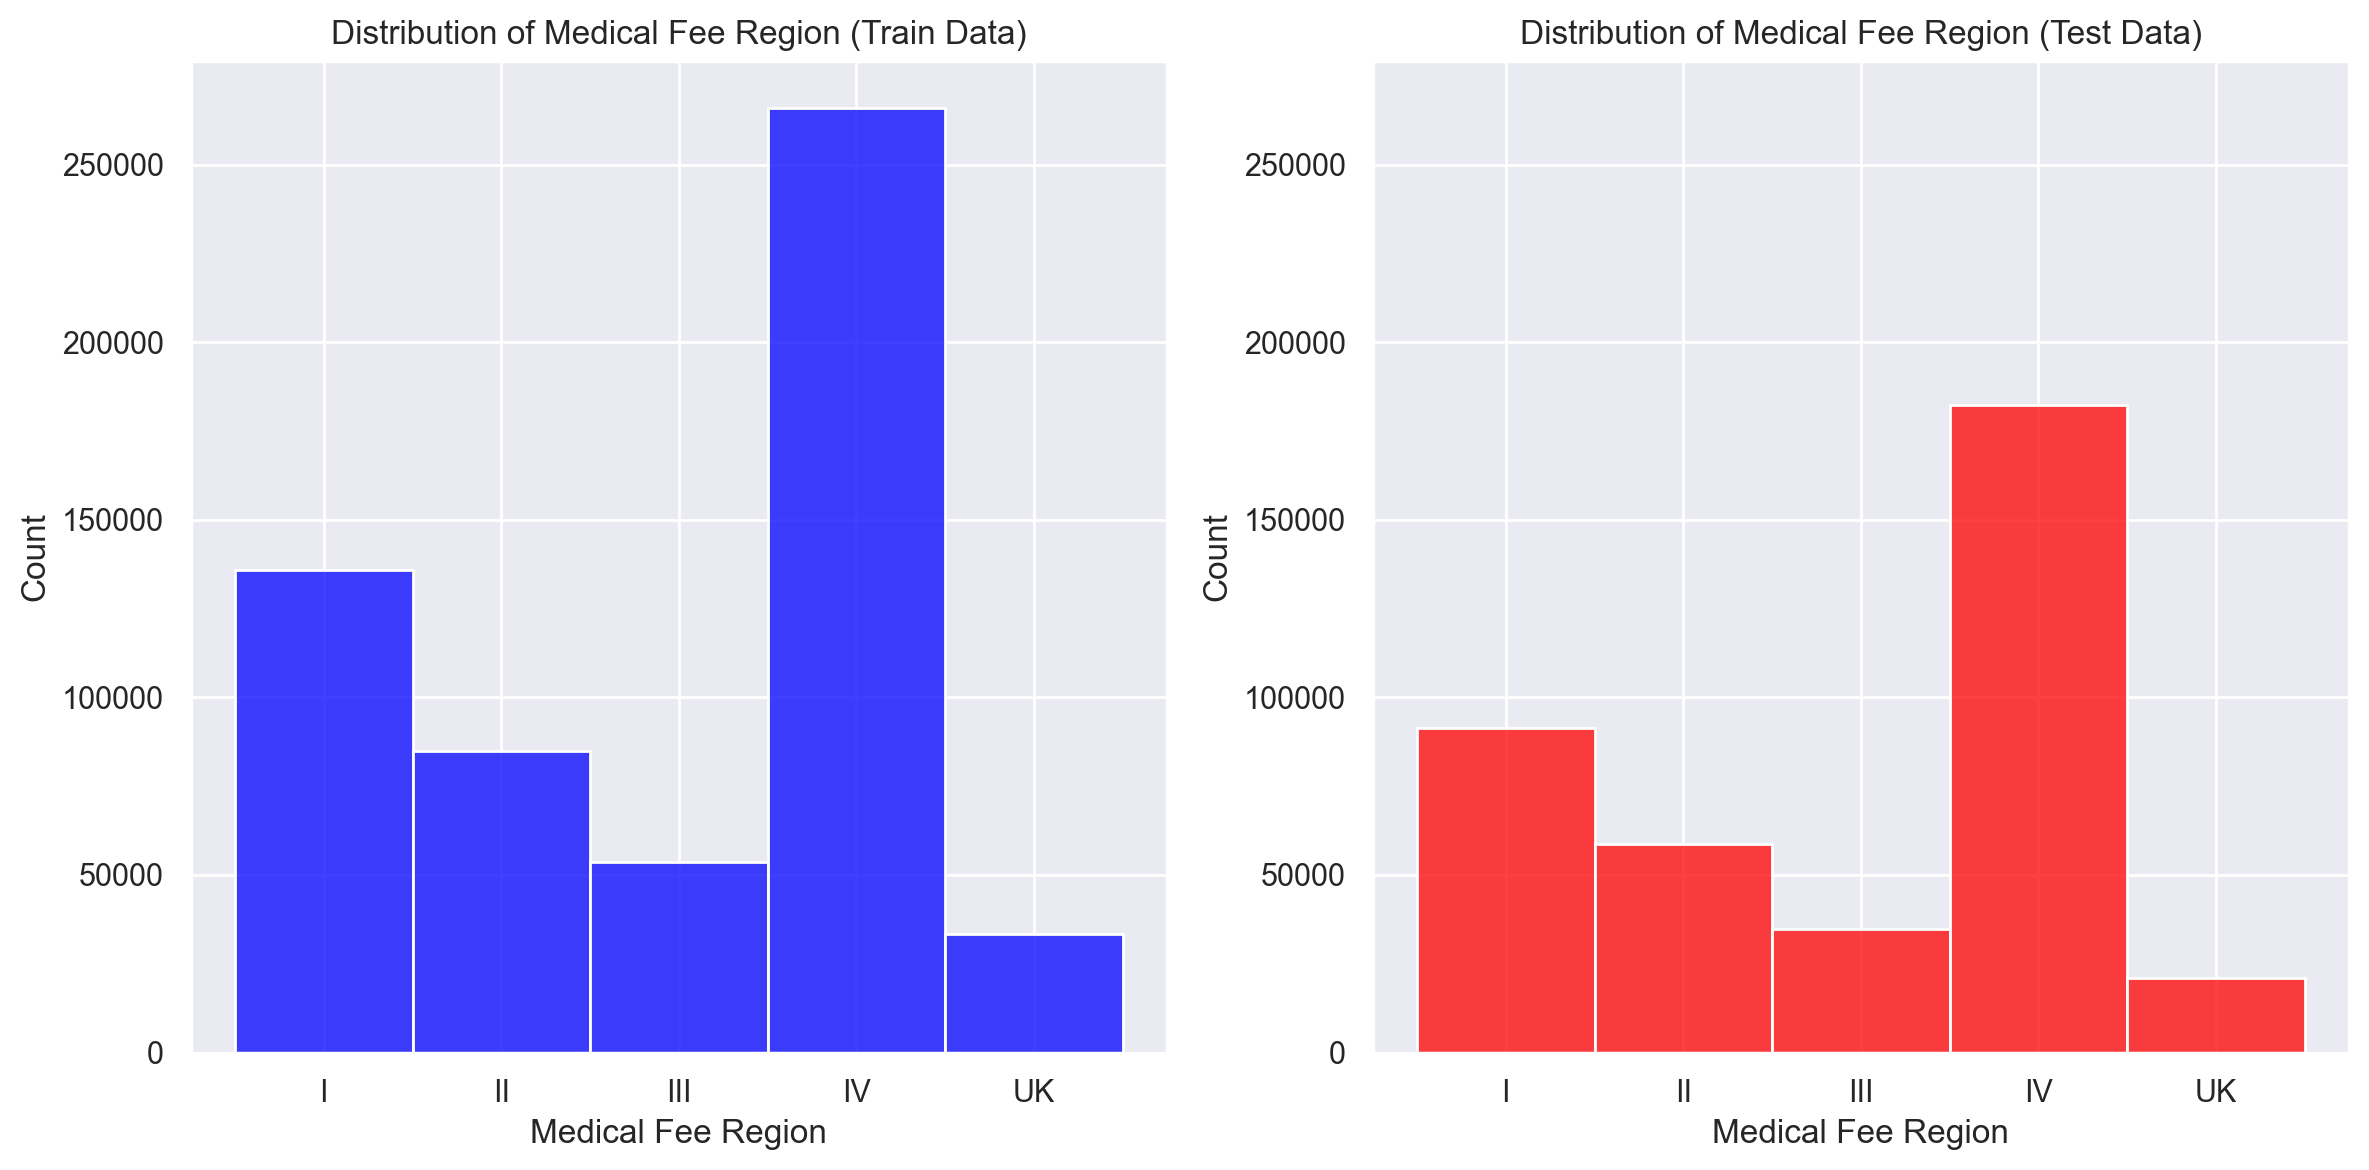

In [97]:
train_data["Medical Fee Region"] = train_data["Medical Fee Region"].astype(str)
test_data["Medical Fee Region"] = test_data["Medical Fee Region"].astype(str)

# Define the desired order of the categories
category_order = ["I", "II", "III", "IV", "UK"]

train_data['Medical Fee Region'] = pd.Categorical(train_data['Medical Fee Region'], categories=category_order, ordered=True)
test_data['Medical Fee Region'] = pd.Categorical(test_data['Medical Fee Region'], categories=category_order, ordered=True)

plt.figure(figsize=(12, 6))

ax1 = plt.subplot(1, 2, 1)  
sns.histplot(data=train_data, x='Medical Fee Region', kde=False, color='blue')
ax1.set_title('Distribution of Medical Fee Region (Train Data)')

ax2 = plt.subplot(1, 2, 2)  
sns.histplot(data=test_data, x='Medical Fee Region', kde=False, color='red')
ax2.set_title('Distribution of Medical Fee Region (Test Data)')

max_y = max(ax1.get_ylim()[1], ax2.get_ylim()[1])

ax1.set_ylim(0, max_y)
ax2.set_ylim(0, max_y)

plt.tight_layout()
plt.show()


In [98]:
calculate_missing_percentage(train_data[["Medical Fee Region"]], test_data[["Medical Fee Region"]])

Train Data                         Test Data           \
                   NaN Percentage NaN Rows Data Type NaN Percentage NaN Rows   
Feature                                                                        
Medical Fee Region       3.276487    19445  category            NaN      NaN   

                              
                   Data Type  
Feature                       
Medical Fee Region       NaN

### WCIO Cause of Injury Code

In [99]:
print("Number of unique values in Train Data:",train_data["WCIO Cause of Injury Code"].nunique())
print("Number of unique values in Test Data:",test_data["WCIO Cause of Injury Code"].nunique())

Number of unique values in Train Data: 77
Number of unique values in Test Data: 77


In [100]:
print("Values in Train Data:",train_data["WCIO Cause of Injury Code"].value_counts())
print("\n")
print("Values in Test Data:",test_data["WCIO Cause of Injury Code"].value_counts())

Values in Train Data: WCIO Cause of Injury Code
56.0    46610
74.0    37153
60.0    33192
31.0    31733
29.0    29364
        ...  
91.0       55
14.0       51
40.0       45
8.0        34
47.0       12
Name: count, Length: 77, dtype: int64


Values in Test Data: WCIO Cause of Injury Code
74.0    33293
56.0    28020
60.0    22144
31.0    22123
29.0    20448
        ...  
96.0       52
14.0       47
40.0       32
8.0        11
47.0        6
Name: count, Length: 77, dtype: int64


In [101]:
plt.figure(figsize=(12, 6))

ax1 = plt.subplot(1, 2, 1)  
sns.histplot(data=train_data, x='WCIO Cause of Injury Code', kde=False, color='blue')
ax1.set_title('Distribution of WCIO Cause of Injury Code (Train Data)')

ax2 = plt.subplot(1, 2, 2)  
sns.histplot(data=test_data, x='WCIO Cause of Injury Code', kde=False, color='red')
ax2.set_title('Distribution of WCIO Cause of Injury Code (Test Data)')

max_y = max(ax1.get_ylim()[1], ax2.get_ylim()[1])

ax1.set_ylim(0, max_y)
ax2.set_ylim(0, max_y)

plt.tight_layout()
plt.show()

In [102]:
calculate_missing_percentage(train_data[["WCIO Cause of Injury Code"]], test_data[["WCIO Cause of Injury Code"]])

Train Data                         Test Data  \
                          NaN Percentage NaN Rows Data Type NaN Percentage   
Feature                                                                      
WCIO Cause of Injury Code       5.911831    35085   float64       2.667182   

                                              
                          NaN Rows Data Type  
Feature                                       
WCIO Cause of Injury Code    10348   float64

### WCIO Cause of Injury Description

In [103]:
print("Number of unique values in Train Data:",train_data["WCIO Cause of Injury Description"].nunique())
print("Number of unique values in Test Data:",test_data["WCIO Cause of Injury Description"].nunique())

Number of unique values in Train Data: 74
Number of unique values in Test Data: 74


In [104]:
print("Values in Train Data:",train_data["WCIO Cause of Injury Description"].value_counts())
print("\n")
print("Values in Test Data:",test_data["WCIO Cause of Injury Description"].value_counts())

Values in Train Data: WCIO Cause of Injury Description
LIFTING                                   46610
FELLOW WORKER, PATIENT OR OTHER PERSON    37153
STRAIN OR INJURY BY, NOC                  33192
FALL, SLIP OR TRIP, NOC                   31733
ON SAME LEVEL                             29364
                                          ...  
MOLD                                         55
ABNORMAL AIR PRESSURE                        51
CRASH OF WATER VEHICLE                       45
RADIATION                                    34
CRASH OF AIRPLANE                            12
Name: count, Length: 74, dtype: int64


Values in Test Data: WCIO Cause of Injury Description
FELLOW WORKER, PATIENT OR OTHER PERSON    33293
LIFTING                                   28020
STRAIN OR INJURY BY, NOC                  22144
FALL, SLIP OR TRIP, NOC                   22123
OBJECT BEING LIFTED OR HANDLED            20495
                                          ...  
TERRORISM                          

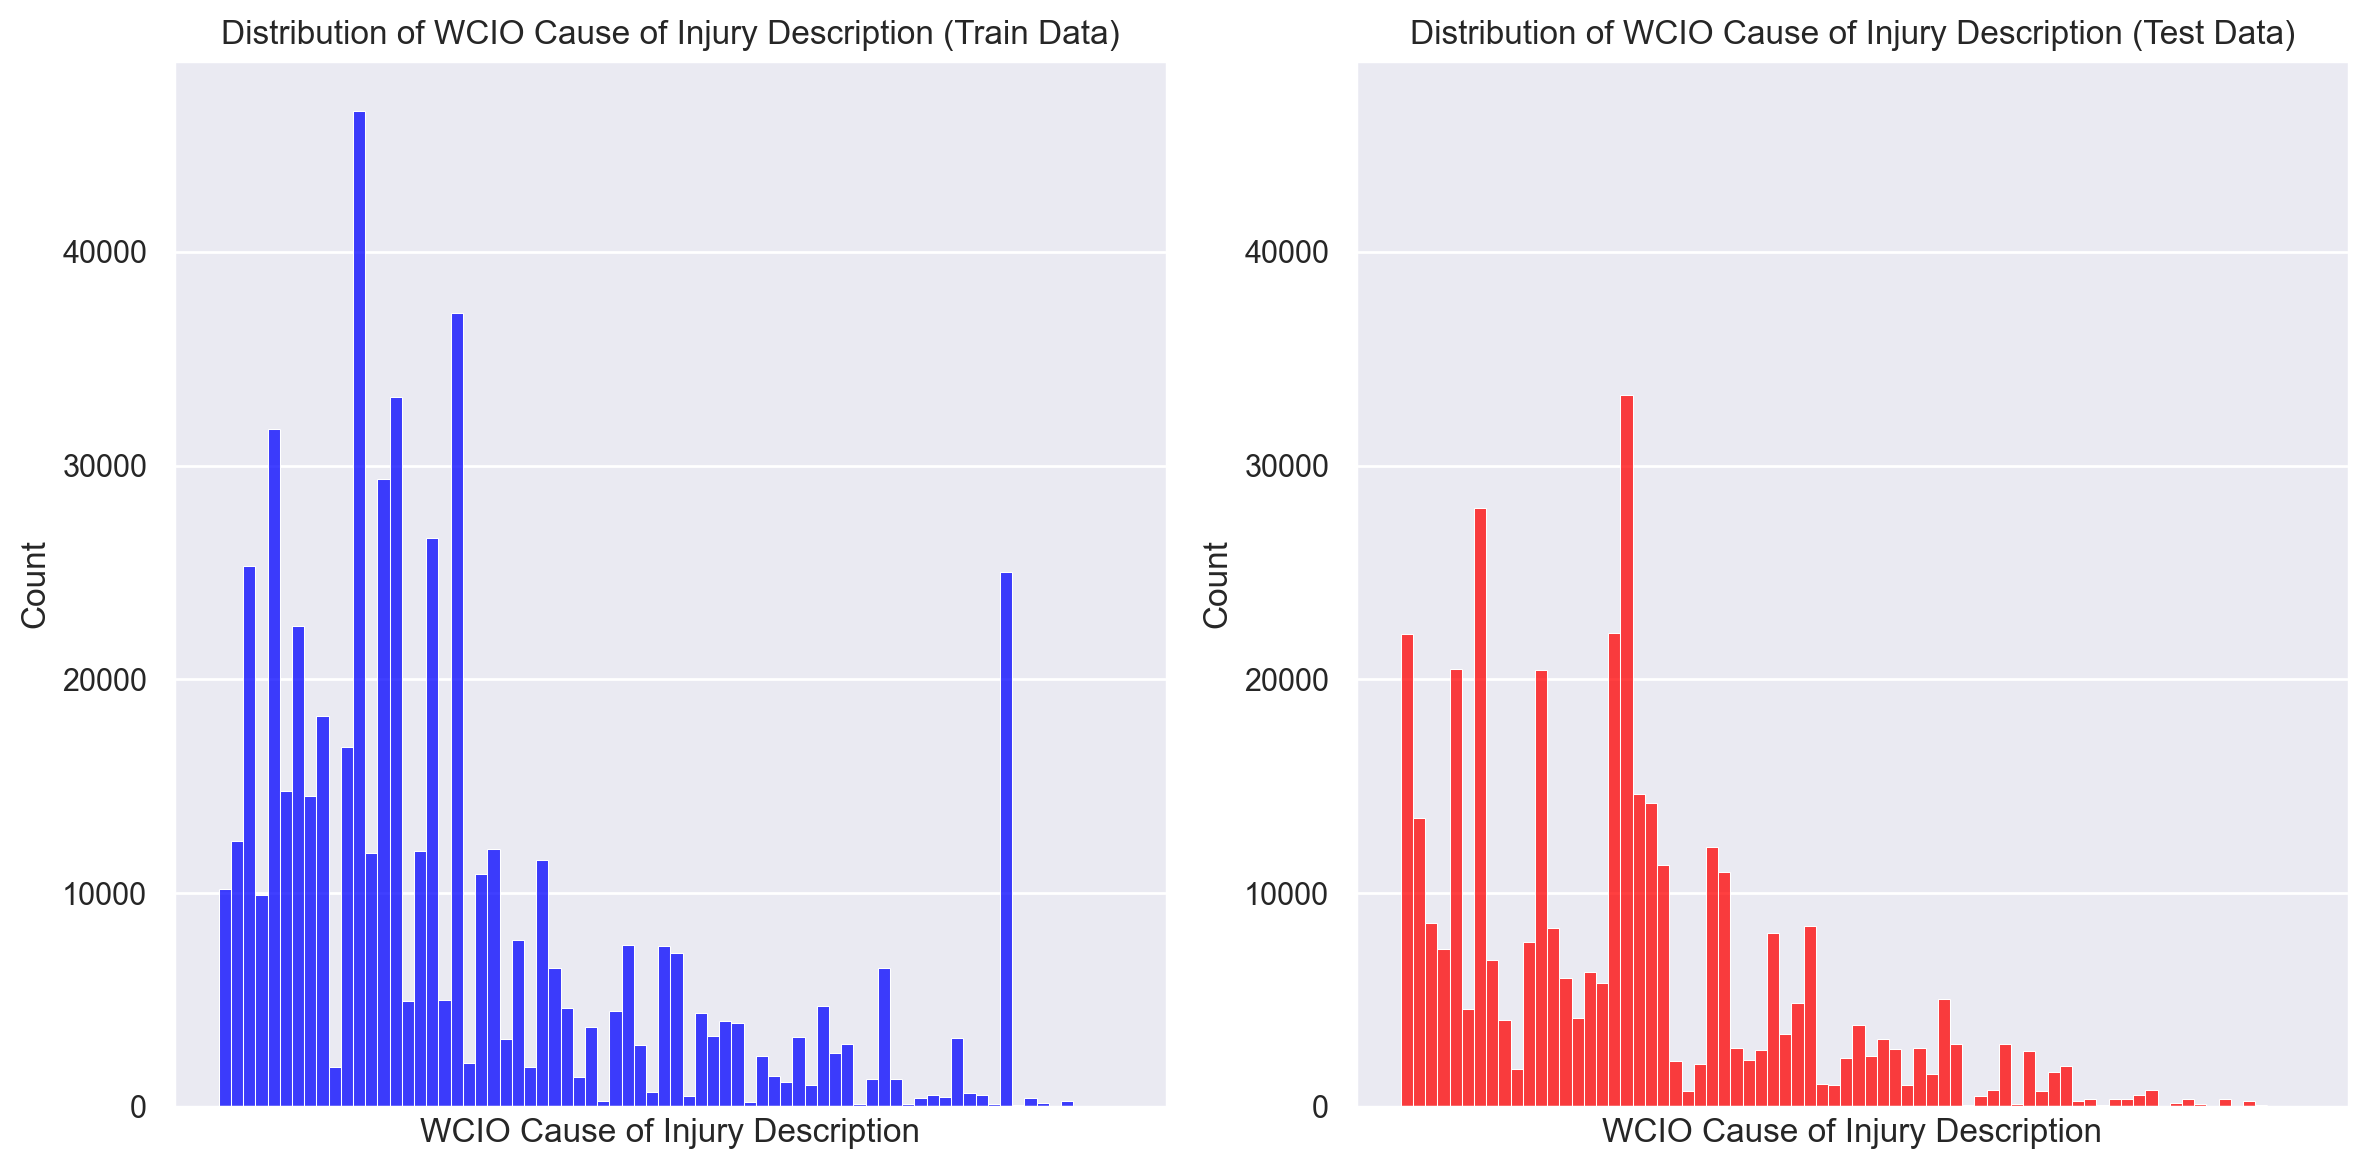

In [105]:
plt.figure(figsize=(12, 6))

ax1 = plt.subplot(1, 2, 1)  
sns.histplot(data=train_data, x='WCIO Cause of Injury Description', kde=False, color='blue')
ax1.set_title('Distribution of WCIO Cause of Injury Description (Train Data)')
ax1.set_xticks([])  

ax2 = plt.subplot(1, 2, 2)  
sns.histplot(data=test_data, x='WCIO Cause of Injury Description', kde=False, color='red')
ax2.set_title('Distribution of WCIO Cause of Injury Description (Test Data)')
ax2.set_xticks([])  

max_y = max(ax1.get_ylim()[1], ax2.get_ylim()[1])

ax1.set_ylim(0, max_y)
ax2.set_ylim(0, max_y)

plt.tight_layout()
plt.show()

In [106]:
calculate_missing_percentage(train_data[["WCIO Cause of Injury Description"]], test_data[["WCIO Cause of Injury Description"]])

Train Data                     \
                                 NaN Percentage NaN Rows Data Type   
Feature                                                              
WCIO Cause of Injury Description       5.911831    35085    object   

                                      Test Data                     
                                 NaN Percentage NaN Rows Data Type  
Feature                                                             
WCIO Cause of Injury Description       2.667182    10348    object

### WCIO Nature of Injury Code

In [107]:
print("Number of unique values in Train Data:",train_data["WCIO Nature of Injury Code"].nunique())
print("Number of unique values in Test Data:",test_data["WCIO Nature of Injury Code"].nunique())

Number of unique values in Train Data: 56
Number of unique values in Test Data: 56


In [108]:
print("Values in Train Data:",train_data["WCIO Nature of Injury Code"].value_counts())
print("\n")
print("Values in Test Data:",test_data["WCIO Nature of Injury Code"].value_counts())

Values in Train Data: WCIO Nature of Injury Code
52.0    153373
10.0    110717
49.0     55789
40.0     47157
59.0     36101
83.0     25724
28.0     22673
43.0     17350
90.0     12734
37.0     12491
4.0       7525
25.0      7386
1.0       5961
16.0      5867
7.0       5484
13.0      5218
78.0      2806
80.0      2798
34.0      2705
31.0      1946
71.0      1917
77.0      1569
53.0      1426
65.0      1306
46.0      1246
68.0      1035
36.0       941
72.0       862
2.0        736
73.0       722
19.0       619
41.0       462
69.0       452
32.0       425
42.0       396
91.0       375
47.0       340
66.0       290
58.0       269
74.0       189
38.0       185
3.0        181
55.0       157
61.0       112
54.0        94
60.0        80
30.0        72
75.0        32
67.0        25
64.0        16
70.0        13
22.0         6
62.0         5
76.0         4
79.0         4
63.0         1
Name: count, dtype: int64


Values in Test Data: WCIO Nature of Injury Code
52.0    108326
10.0     82385
40.0 

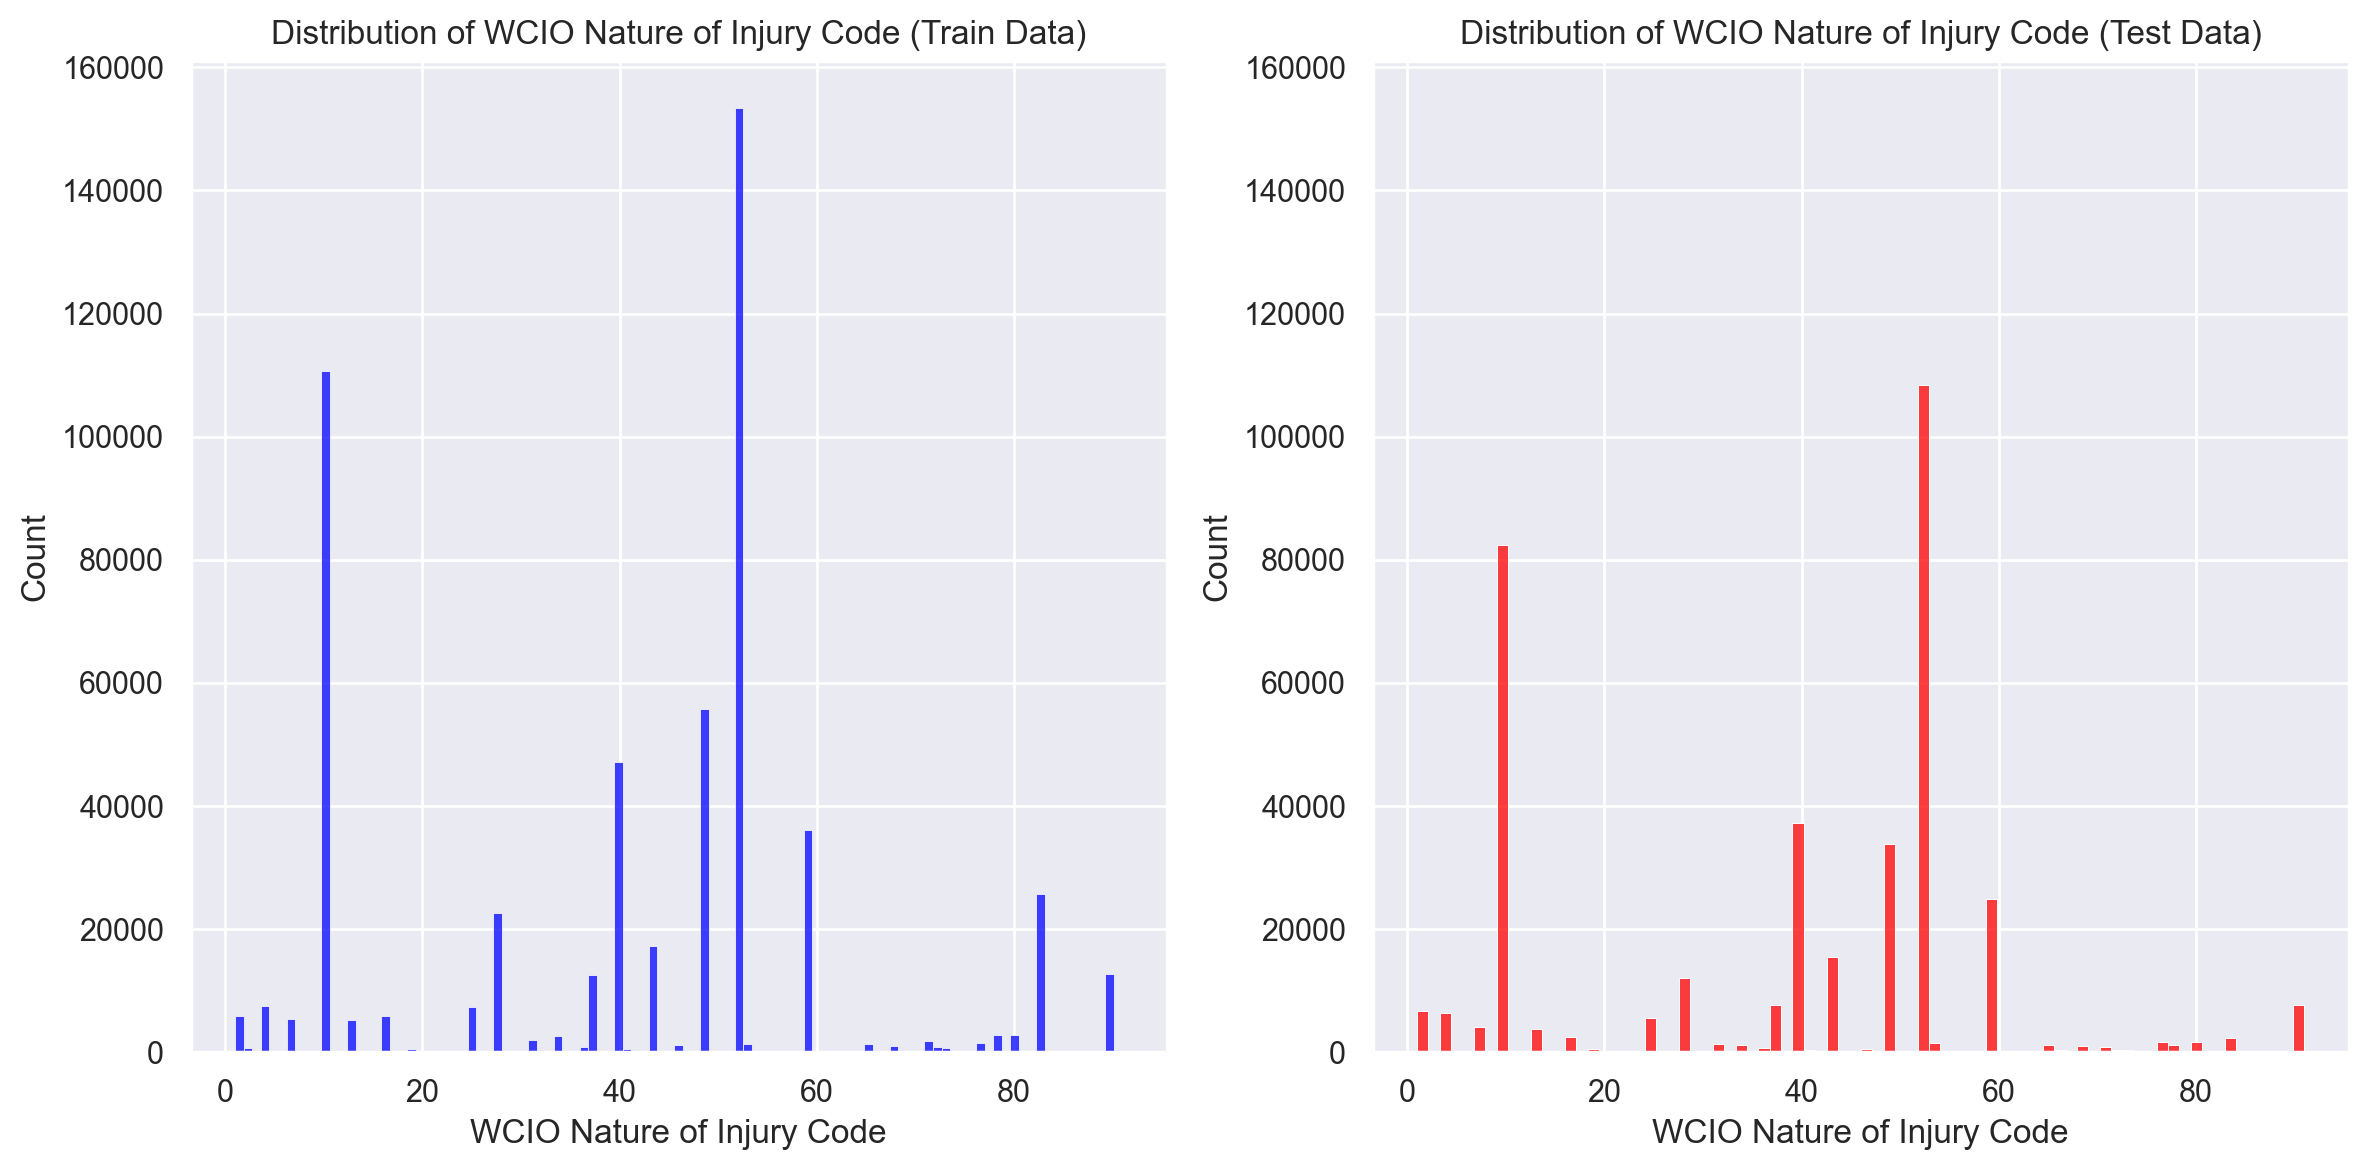

In [109]:
plt.figure(figsize=(12, 6))

ax1 = plt.subplot(1, 2, 1)  
sns.histplot(data=train_data, x='WCIO Nature of Injury Code', kde=False, color='blue')
ax1.set_title('Distribution of WCIO Nature of Injury Code (Train Data)')

ax2 = plt.subplot(1, 2, 2)  
sns.histplot(data=test_data, x='WCIO Nature of Injury Code', kde=False, color='red')
ax2.set_title('Distribution of WCIO Nature of Injury Code (Test Data)')

max_y = max(ax1.get_ylim()[1], ax2.get_ylim()[1])

ax1.set_ylim(0, max_y)
ax2.set_ylim(0, max_y)

plt.tight_layout()
plt.show()

In [110]:
calculate_missing_percentage(train_data[["WCIO Nature of Injury Code"]], test_data[["WCIO Nature of Injury Code"]])

Train Data                         Test Data  \
                           NaN Percentage NaN Rows Data Type NaN Percentage   
Feature                                                                       
WCIO Nature of Injury Code       5.914695    35102   float64       2.721825   

                                               
                           NaN Rows Data Type  
Feature                                        
WCIO Nature of Injury Code    10560   float64

### WCIO Nature of Injury Description

In [111]:
print("Number of unique values in Train Data:",train_data["WCIO Nature of Injury Description"].nunique())
print("Number of unique values in Test Data:",test_data["WCIO Nature of Injury Description"].nunique())

Number of unique values in Train Data: 56
Number of unique values in Test Data: 56


In [112]:
print("Values in Train Data:",train_data["WCIO Nature of Injury Description"].value_counts())
print("\n")
print("Values in Test Data:",test_data["WCIO Nature of Injury Description"].value_counts())

Values in Train Data: WCIO Nature of Injury Description
STRAIN OR TEAR                                                 153373
CONTUSION                                                      110717
SPRAIN OR TEAR                                                  55789
LACERATION                                                      47157
ALL OTHER SPECIFIC INJURIES, NOC                                36101
COVID-19                                                        25724
FRACTURE                                                        22673
PUNCTURE                                                        17350
MULTIPLE PHYSICAL INJURIES ONLY                                 12734
INFLAMMATION                                                    12491
BURN                                                             7525
FOREIGN BODY                                                     7386
NO PHYSICAL INJURY                                               5961
DISLOCATION                       

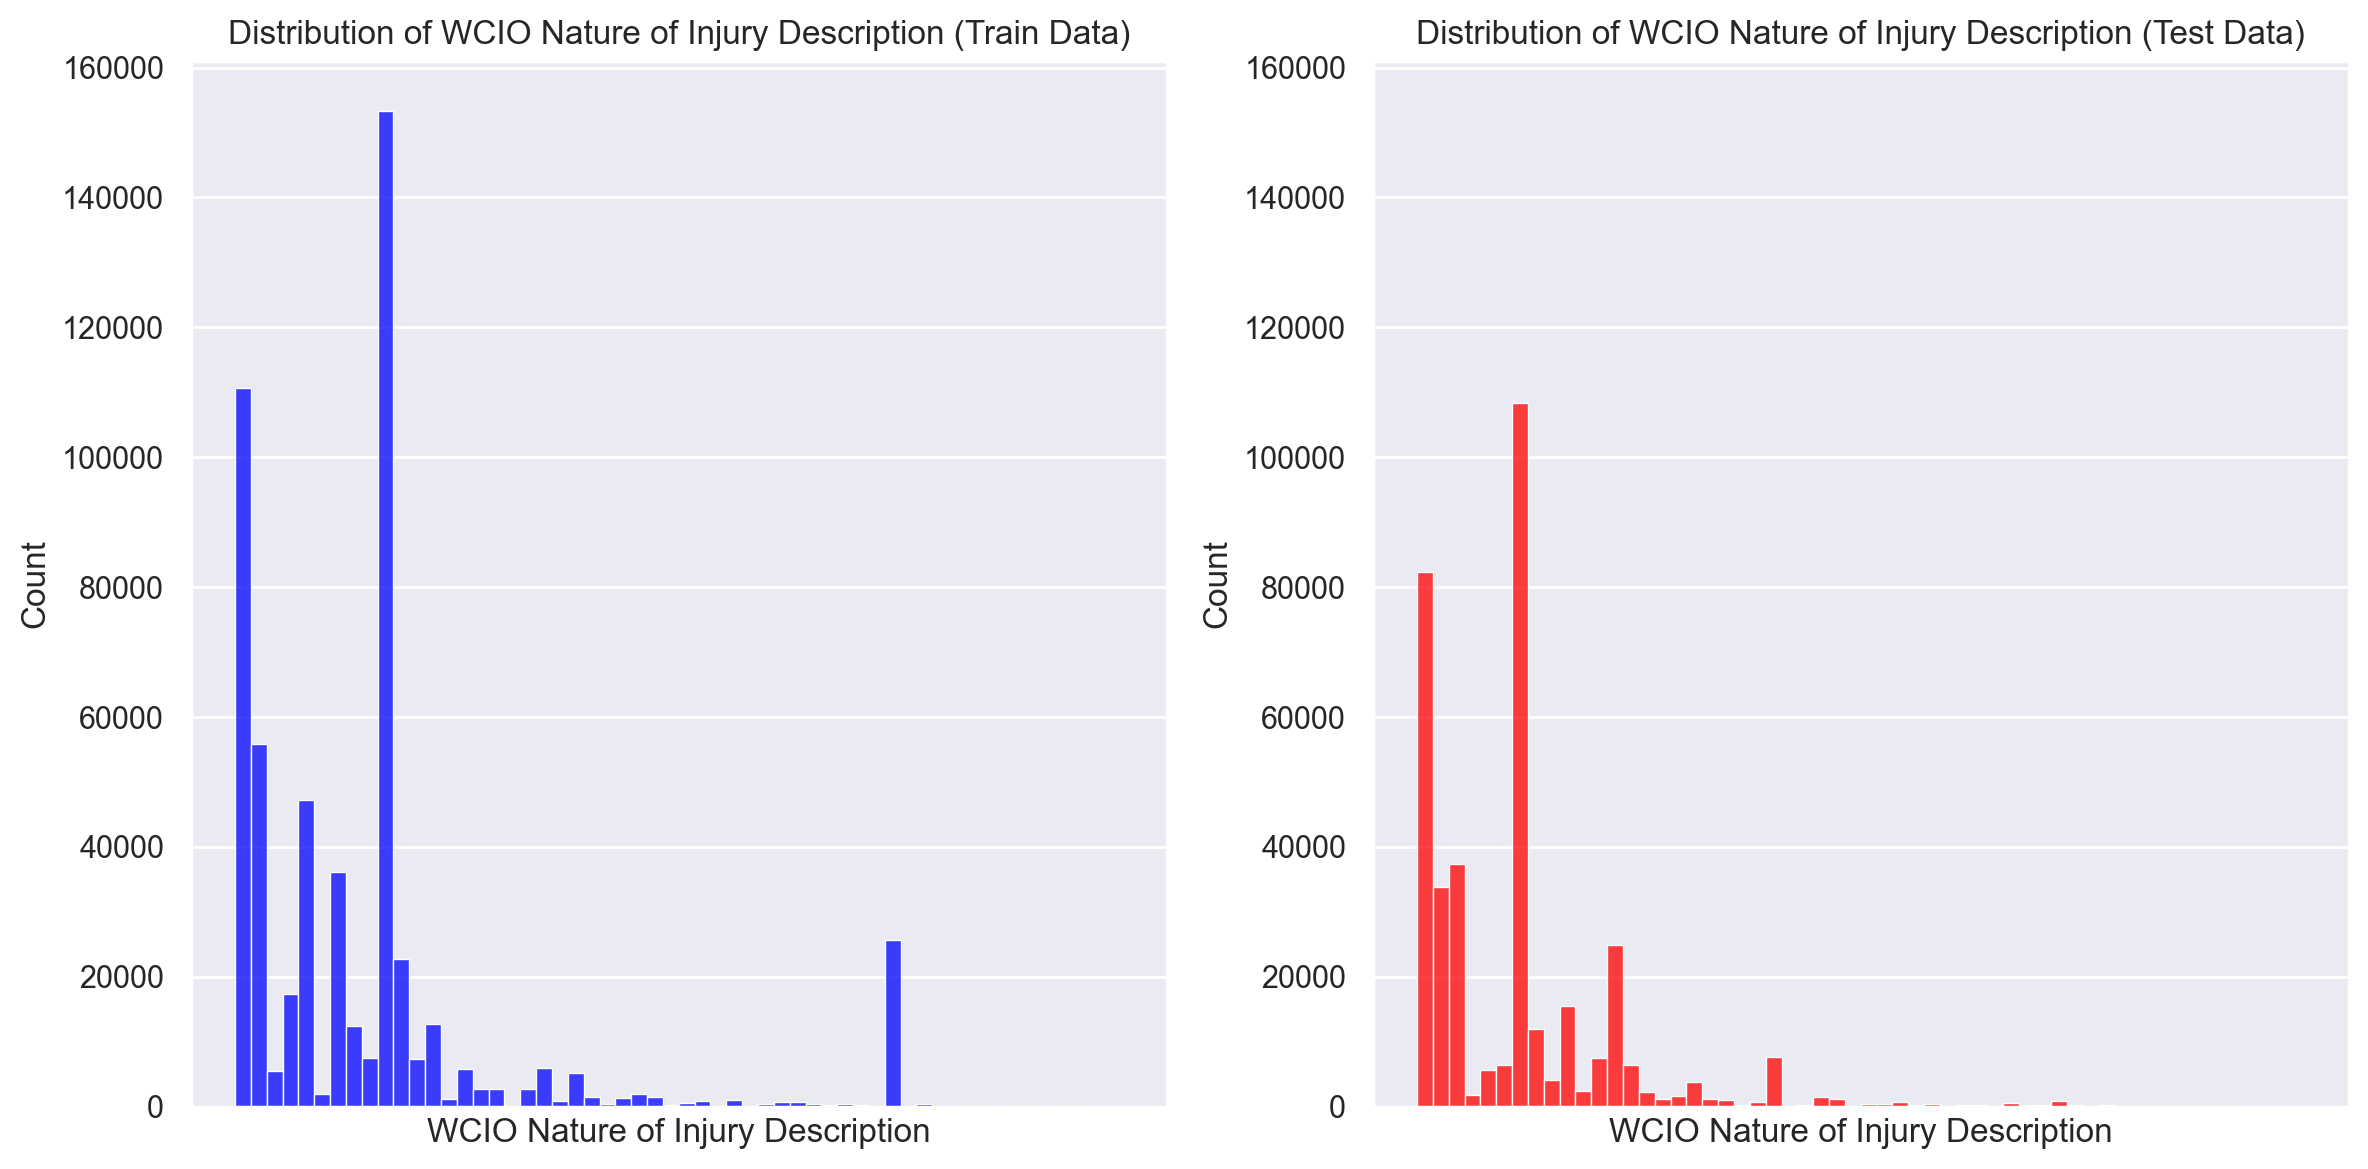

In [113]:
plt.figure(figsize=(12, 6))

ax1 = plt.subplot(1, 2, 1)  
sns.histplot(data=train_data, x='WCIO Nature of Injury Description', kde=False, color='blue')
ax1.set_title('Distribution of WCIO Nature of Injury Description (Train Data)')
ax1.set_xticks([])  

ax2 = plt.subplot(1, 2, 2)  
sns.histplot(data=test_data, x='WCIO Nature of Injury Description', kde=False, color='red')
ax2.set_title('Distribution of WCIO Nature of Injury Description (Test Data)')
ax2.set_xticks([])  

max_y = max(ax1.get_ylim()[1], ax2.get_ylim()[1])

ax1.set_ylim(0, max_y)
ax2.set_ylim(0, max_y)

plt.tight_layout()
plt.show()

In [114]:
calculate_missing_percentage(train_data[["WCIO Nature of Injury Description"]], test_data[["WCIO Nature of Injury Description"]])

Train Data                     \
                                  NaN Percentage NaN Rows Data Type   
Feature                                                               
WCIO Nature of Injury Description       5.914695    35102    object   

                                       Test Data                     
                                  NaN Percentage NaN Rows Data Type  
Feature                                                              
WCIO Nature of Injury Description       2.721825    10560    object

### WCIO Part Of Body Code

In [115]:
print("Number of unique values in Train Data:",train_data["WCIO Part Of Body Code"].nunique())
print("Number of unique values in Test Data:",test_data["WCIO Part Of Body Code"].nunique())

Number of unique values in Train Data: 57
Number of unique values in Test Data: 54


In [116]:
print("Values in Train Data:",train_data["WCIO Part Of Body Code"].value_counts())
print("\n")
print("Values in Test Data:",test_data["WCIO Part Of Body Code"].value_counts())

Values in Train Data: WCIO Part Of Body Code
 42.0    51862
 53.0    47903
-9.0     42011
 38.0    37811
 36.0    36093
 35.0    31388
 55.0    24928
 90.0    22608
 56.0    18765
 34.0    18750
 33.0    15372
 60.0    14000
 18.0    13765
 14.0    12975
 37.0    12525
 54.0    11622
 31.0    11236
 91.0    10950
 32.0     9949
 41.0     8240
 10.0     7939
 11.0     7904
 44.0     7644
 61.0     6770
 51.0     6430
 66.0     6103
 25.0     5938
 65.0     5311
 52.0     4296
 13.0     3912
 19.0     3905
 48.0     3759
 20.0     2848
 30.0     2633
 39.0     2623
 57.0     2535
 15.0     2091
 63.0     1998
 12.0     1989
 50.0     1927
 43.0     1893
 58.0     1806
 40.0     1752
 17.0     1602
 21.0     1332
 99.0     1249
 62.0     1161
 22.0     1103
 16.0      803
 46.0      740
 49.0      637
 23.0      477
 45.0      402
 47.0      402
 24.0      141
 26.0       83
 64.0       53
Name: count, dtype: int64


Values in Test Data: WCIO Part Of Body Code
-9.0     67465
 42.0    2990

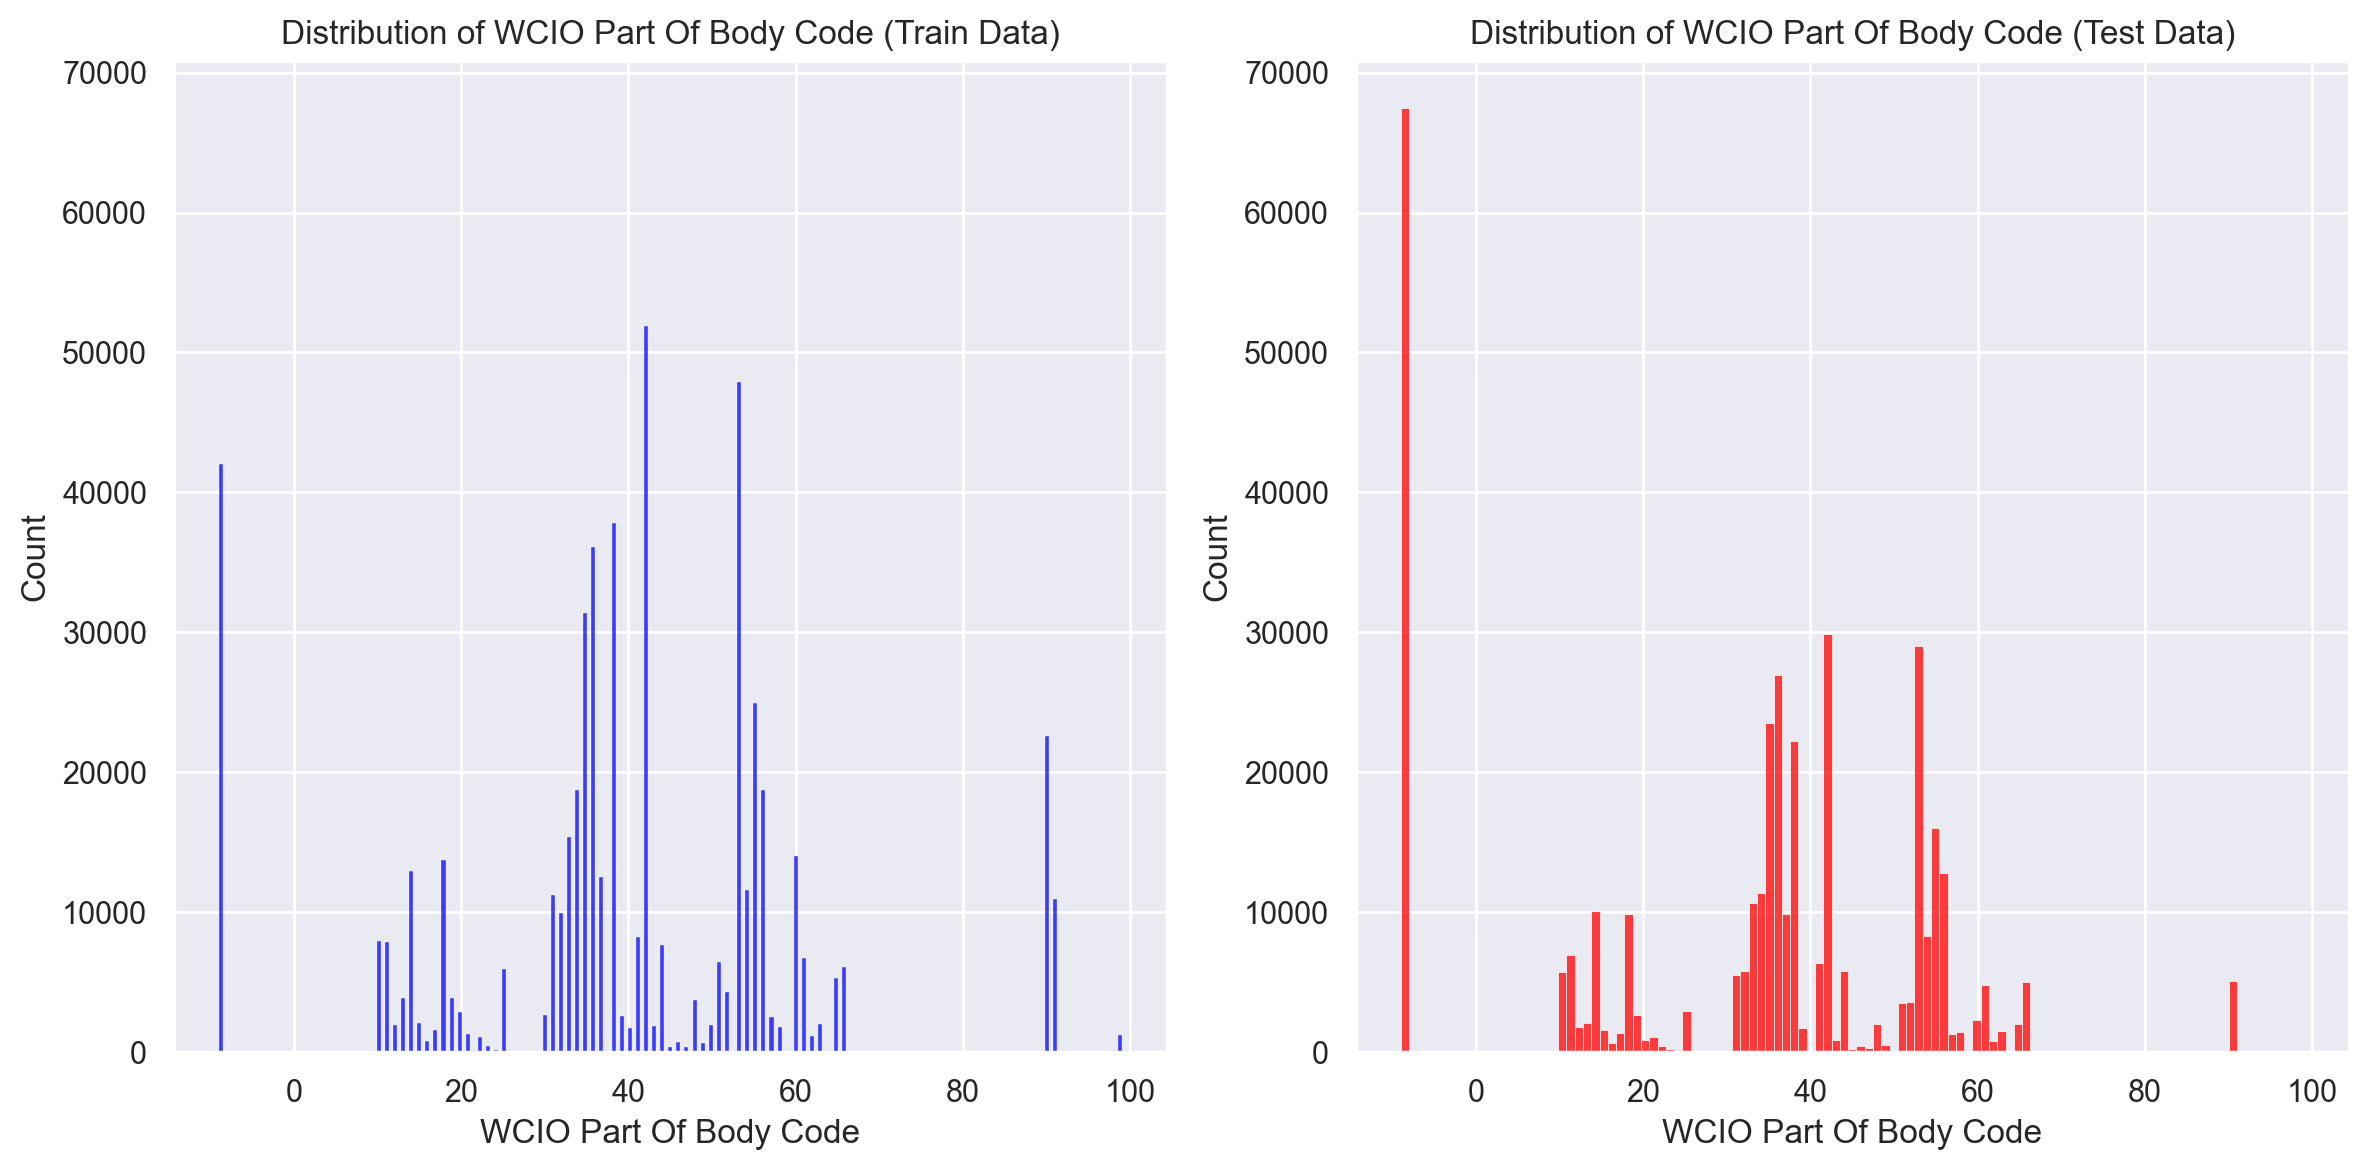

In [117]:
plt.figure(figsize=(12, 6))

ax1 = plt.subplot(1, 2, 1) 
sns.histplot(data=train_data, x='WCIO Part Of Body Code', kde=False, color='blue')
ax1.set_title('Distribution of WCIO Part Of Body Code (Train Data)')

ax2 = plt.subplot(1, 2, 2)  
sns.histplot(data=test_data, x='WCIO Part Of Body Code', kde=False, color='red')
ax2.set_title('Distribution of WCIO Part Of Body Code (Test Data)')

max_y = max(ax1.get_ylim()[1], ax2.get_ylim()[1])

ax1.set_ylim(0, max_y)
ax2.set_ylim(0, max_y)

plt.tight_layout()
plt.show()

In [118]:
calculate_missing_percentage(train_data[["WCIO Part Of Body Code"]], test_data[["WCIO Part Of Body Code"]])

Train Data                         Test Data  \
                       NaN Percentage NaN Rows Data Type NaN Percentage   
Feature                                                                   
WCIO Part Of Body Code       6.154808    36527   float64       2.461241   

                                           
                       NaN Rows Data Type  
Feature                                    
WCIO Part Of Body Code     9549   float64

### WCIO Part Of Body Description

In [119]:
print("Number of unique values in Train Data:",train_data["WCIO Part Of Body Description"].nunique())
print("Number of unique values in Test Data:",test_data["WCIO Part Of Body Description"].nunique())

Number of unique values in Train Data: 54
Number of unique values in Test Data: 51


In [120]:
print("Values in Train Data:",train_data["WCIO Part Of Body Description"].value_counts())
print("\n")
print("Values in Test Data:",test_data["WCIO Part Of Body Description"].value_counts())

Values in Train Data: WCIO Part Of Body Description
LOWER BACK AREA                                          51862
KNEE                                                     47903
MULTIPLE                                                 42011
SHOULDER(S)                                              37811
FINGER(S)                                                36093
HAND                                                     31388
ANKLE                                                    24928
MULTIPLE BODY PARTS (INCLUDING BODY                      22608
SOFT TISSUE                                              19703
FOOT                                                     18765
WRIST                                                    18750
LOWER ARM                                                15372
LUNGS                                                    14000
EYE(S)                                                   12975
THUMB                                                    12525
LOW

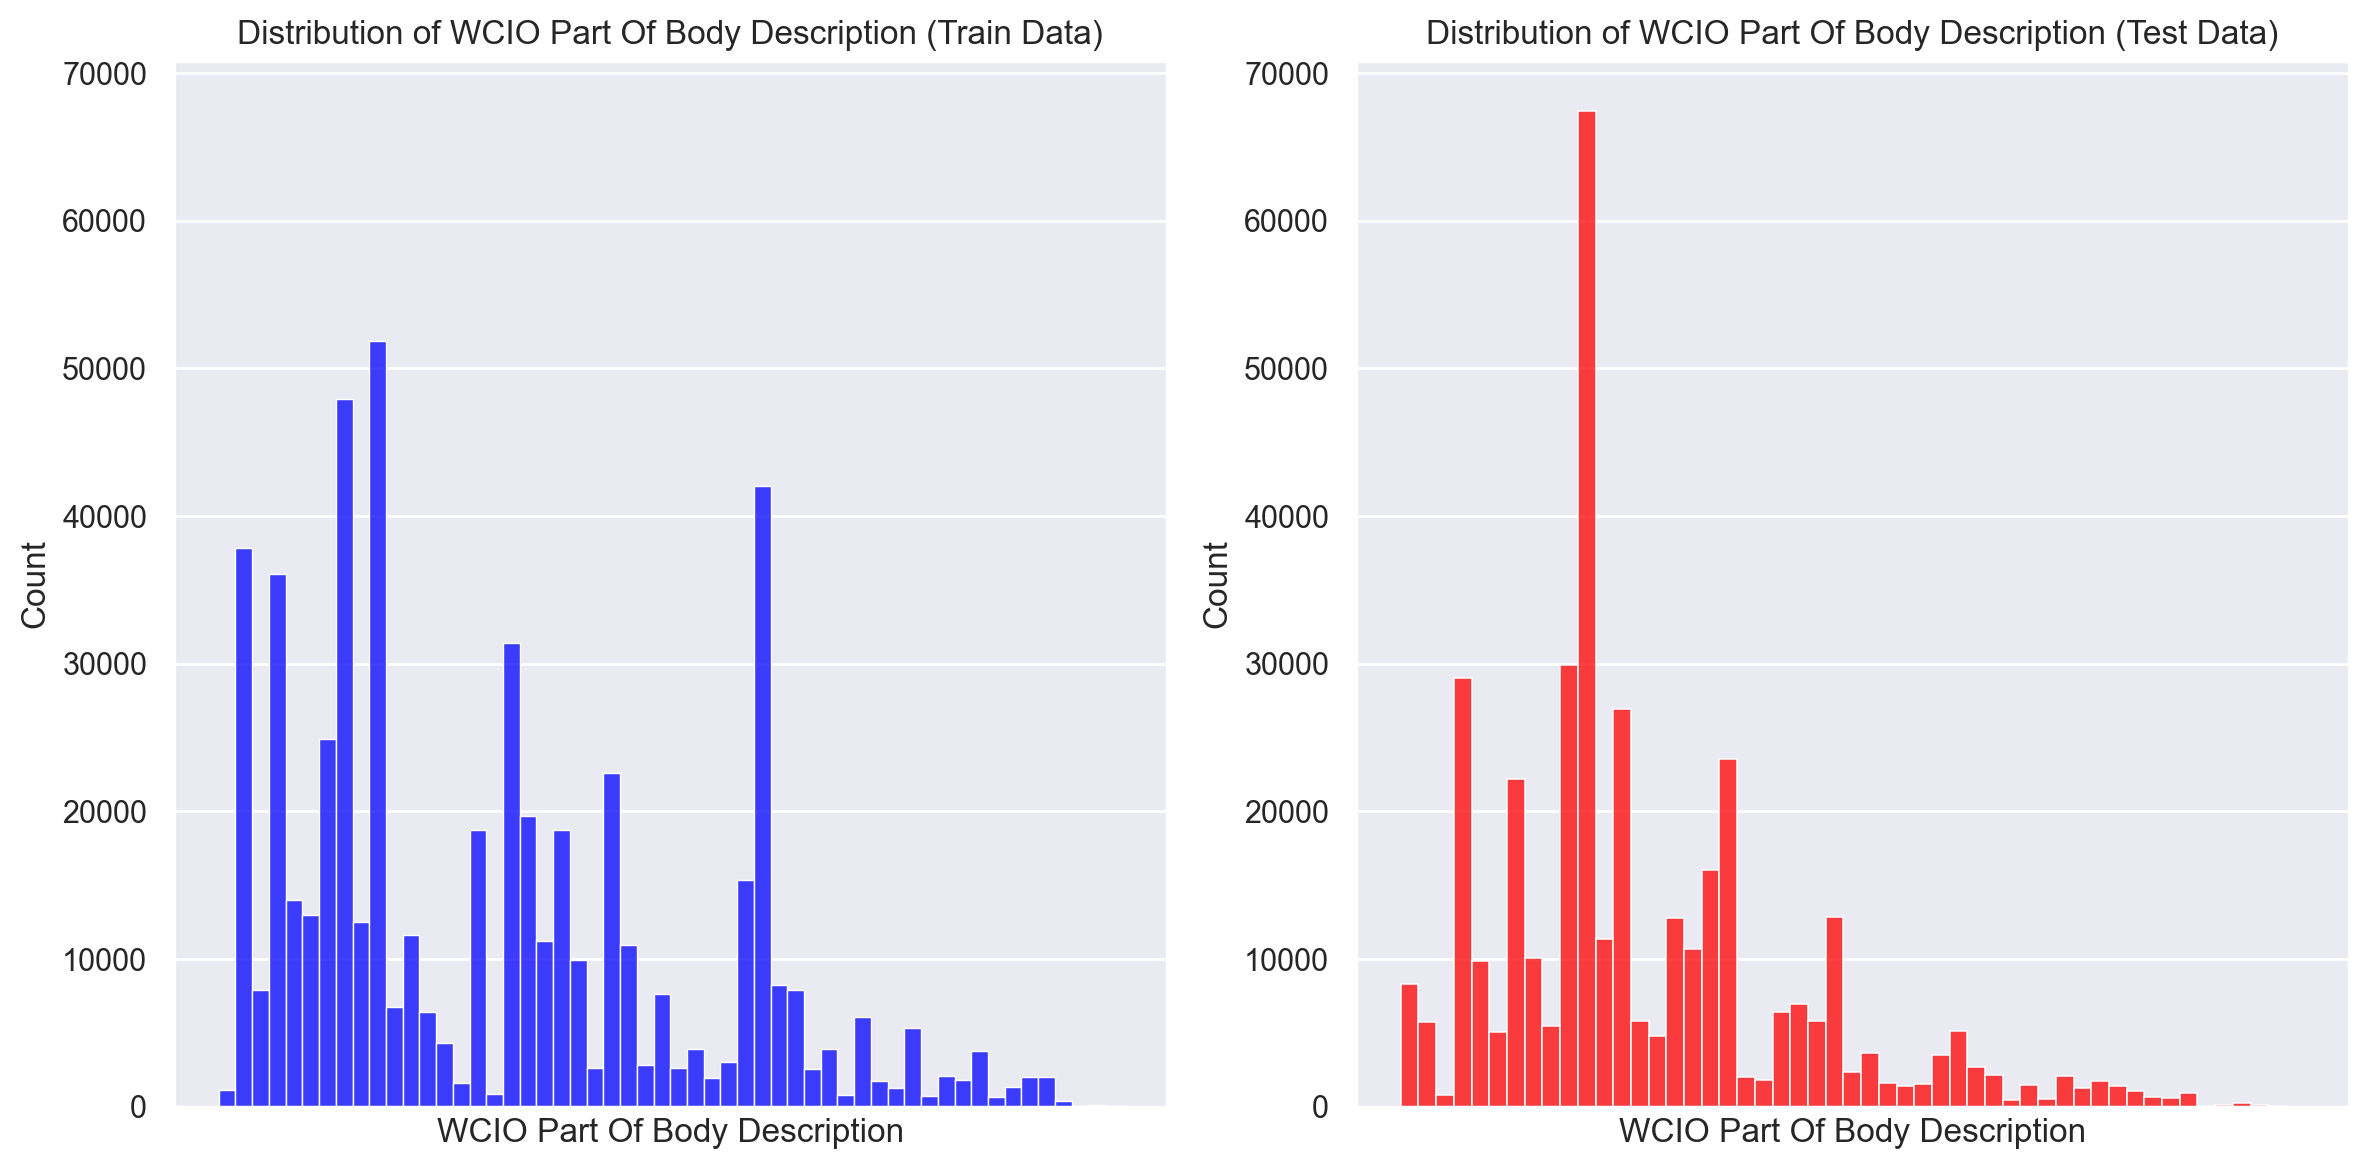

In [121]:
plt.figure(figsize=(12, 6))

ax1 = plt.subplot(1, 2, 1)  
sns.histplot(data=train_data, x='WCIO Part Of Body Description', kde=False, color='blue')
ax1.set_title('Distribution of WCIO Part Of Body Description (Train Data)')
ax1.set_xticks([])  

ax2 = plt.subplot(1, 2, 2)  
sns.histplot(data=test_data, x='WCIO Part Of Body Description', kde=False, color='red')
ax2.set_title('Distribution of WCIO Part Of Body Description (Test Data)')
ax2.set_xticks([])  

max_y = max(ax1.get_ylim()[1], ax2.get_ylim()[1])

ax1.set_ylim(0, max_y)
ax2.set_ylim(0, max_y)

plt.tight_layout()
plt.show()

In [122]:
calculate_missing_percentage(train_data[["WCIO Part Of Body Description"]], test_data[["WCIO Part Of Body Description"]])

Train Data                     \
                              NaN Percentage NaN Rows Data Type   
Feature                                                           
WCIO Part Of Body Description       6.154808    36527    object   

                                   Test Data                     
                              NaN Percentage NaN Rows Data Type  
Feature                                                          
WCIO Part Of Body Description       2.461241     9549    object

### Industry Code

In [123]:
print("Number of unique values in Train Data:",train_data["Industry Code"].nunique())
print("Number of unique values in Test Data:",test_data["Industry Code"].nunique())

Number of unique values in Train Data: 24
Number of unique values in Test Data: 24


In [124]:
print("Values in Train Data:",train_data["Industry Code"].value_counts())
print("\n")
print("Values in Test Data:",test_data["Industry Code"].value_counts())

Values in Train Data: Industry Code
62.0    114339
92.0     92240
61.0     44393
44.0     43685
48.0     37319
23.0     30903
72.0     26456
56.0     21027
45.0     17953
33.0     17232
49.0     16704
42.0     15236
81.0     13149
32.0     10804
31.0     10114
71.0      9967
54.0      9770
51.0      9166
53.0      8948
52.0      8214
22.0      2980
11.0      2404
21.0       695
55.0       370
Name: count, dtype: int64


Values in Test Data: Industry Code
62.0    72207
92.0    52792
61.0    39557
44.0    27811
48.0    24881
72.0    24122
23.0    18115
45.0    14317
56.0    13729
33.0    11693
71.0    10253
42.0    10135
81.0     9736
49.0     8197
54.0     7533
32.0     6825
31.0     6478
51.0     6099
52.0     6006
53.0     5880
22.0     1883
11.0     1277
21.0      419
55.0      294
Name: count, dtype: int64


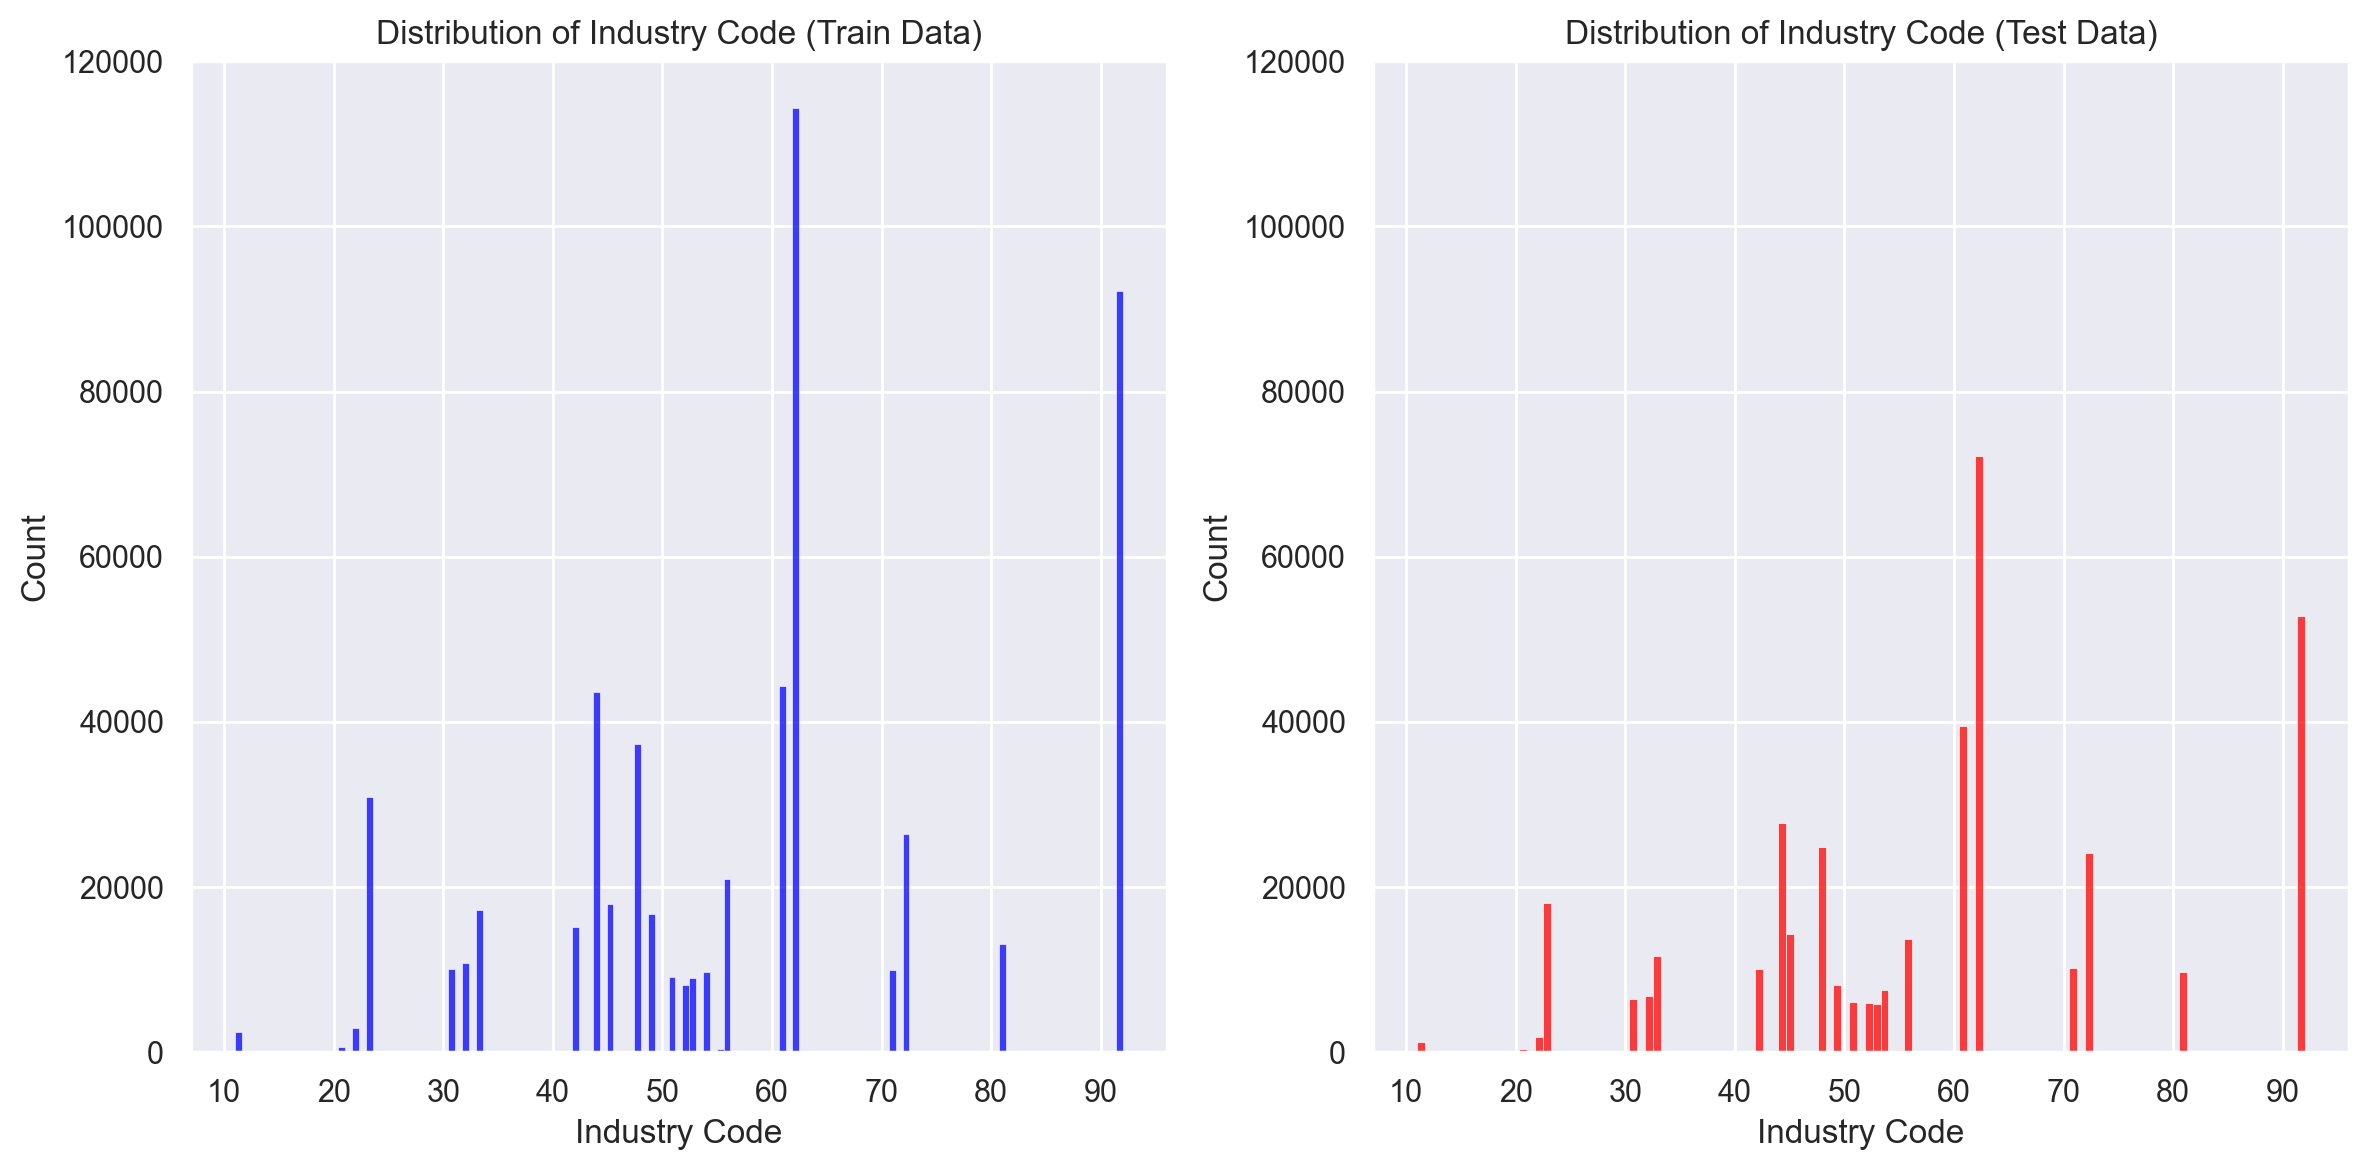

In [125]:
plt.figure(figsize=(12, 6))

ax1 = plt.subplot(1, 2, 1)  
sns.histplot(data=train_data, x='Industry Code', kde=False, color='blue')
ax1.set_title('Distribution of Industry Code (Train Data)')

ax2 = plt.subplot(1, 2, 2)  
sns.histplot(data=test_data, x='Industry Code', kde=False, color='red')
ax2.set_title('Distribution of Industry Code (Test Data)')

max_y = max(ax1.get_ylim()[1], ax2.get_ylim()[1])

ax1.set_ylim(0, max_y)
ax2.set_ylim(0, max_y)

plt.tight_layout()
plt.show()

In [126]:
calculate_missing_percentage(train_data[["Industry Code"]], test_data[["Industry Code"]])

Train Data                         Test Data           \
              NaN Percentage NaN Rows Data Type NaN Percentage NaN Rows   
Feature                                                                   
Industry Code       4.954412    29403   float64       1.993943     7736   

                         
              Data Type  
Feature                  
Industry Code   float64

### Industry Code Description

In [127]:
print("Number of unique values in Train Data:",train_data["Industry Code Description"].nunique())
print("Number of unique values in Test Data:",test_data["Industry Code Description"].nunique())

Number of unique values in Train Data: 20
Number of unique values in Test Data: 20


In [128]:
print("Values in Train Data:",train_data["Industry Code Description"].value_counts())
print("\n")
print("Values in Test Data:",test_data["Industry Code Description"].value_counts())

Values in Train Data: Industry Code Description
HEALTH CARE AND SOCIAL ASSISTANCE                               114339
PUBLIC ADMINISTRATION                                            92240
RETAIL TRADE                                                     61638
TRANSPORTATION AND WAREHOUSING                                   54023
EDUCATIONAL SERVICES                                             44393
MANUFACTURING                                                    38150
CONSTRUCTION                                                     30903
ACCOMMODATION AND FOOD SERVICES                                  26456
ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMENT AND REMEDIAT     21027
WHOLESALE TRADE                                                  15236
OTHER SERVICES (EXCEPT PUBLIC ADMINISTRATION)                    13149
ARTS, ENTERTAINMENT, AND RECREATION                               9967
PROFESSIONAL, SCIENTIFIC, AND TECHNICAL SERVICES                  9770
INFORMATION                  

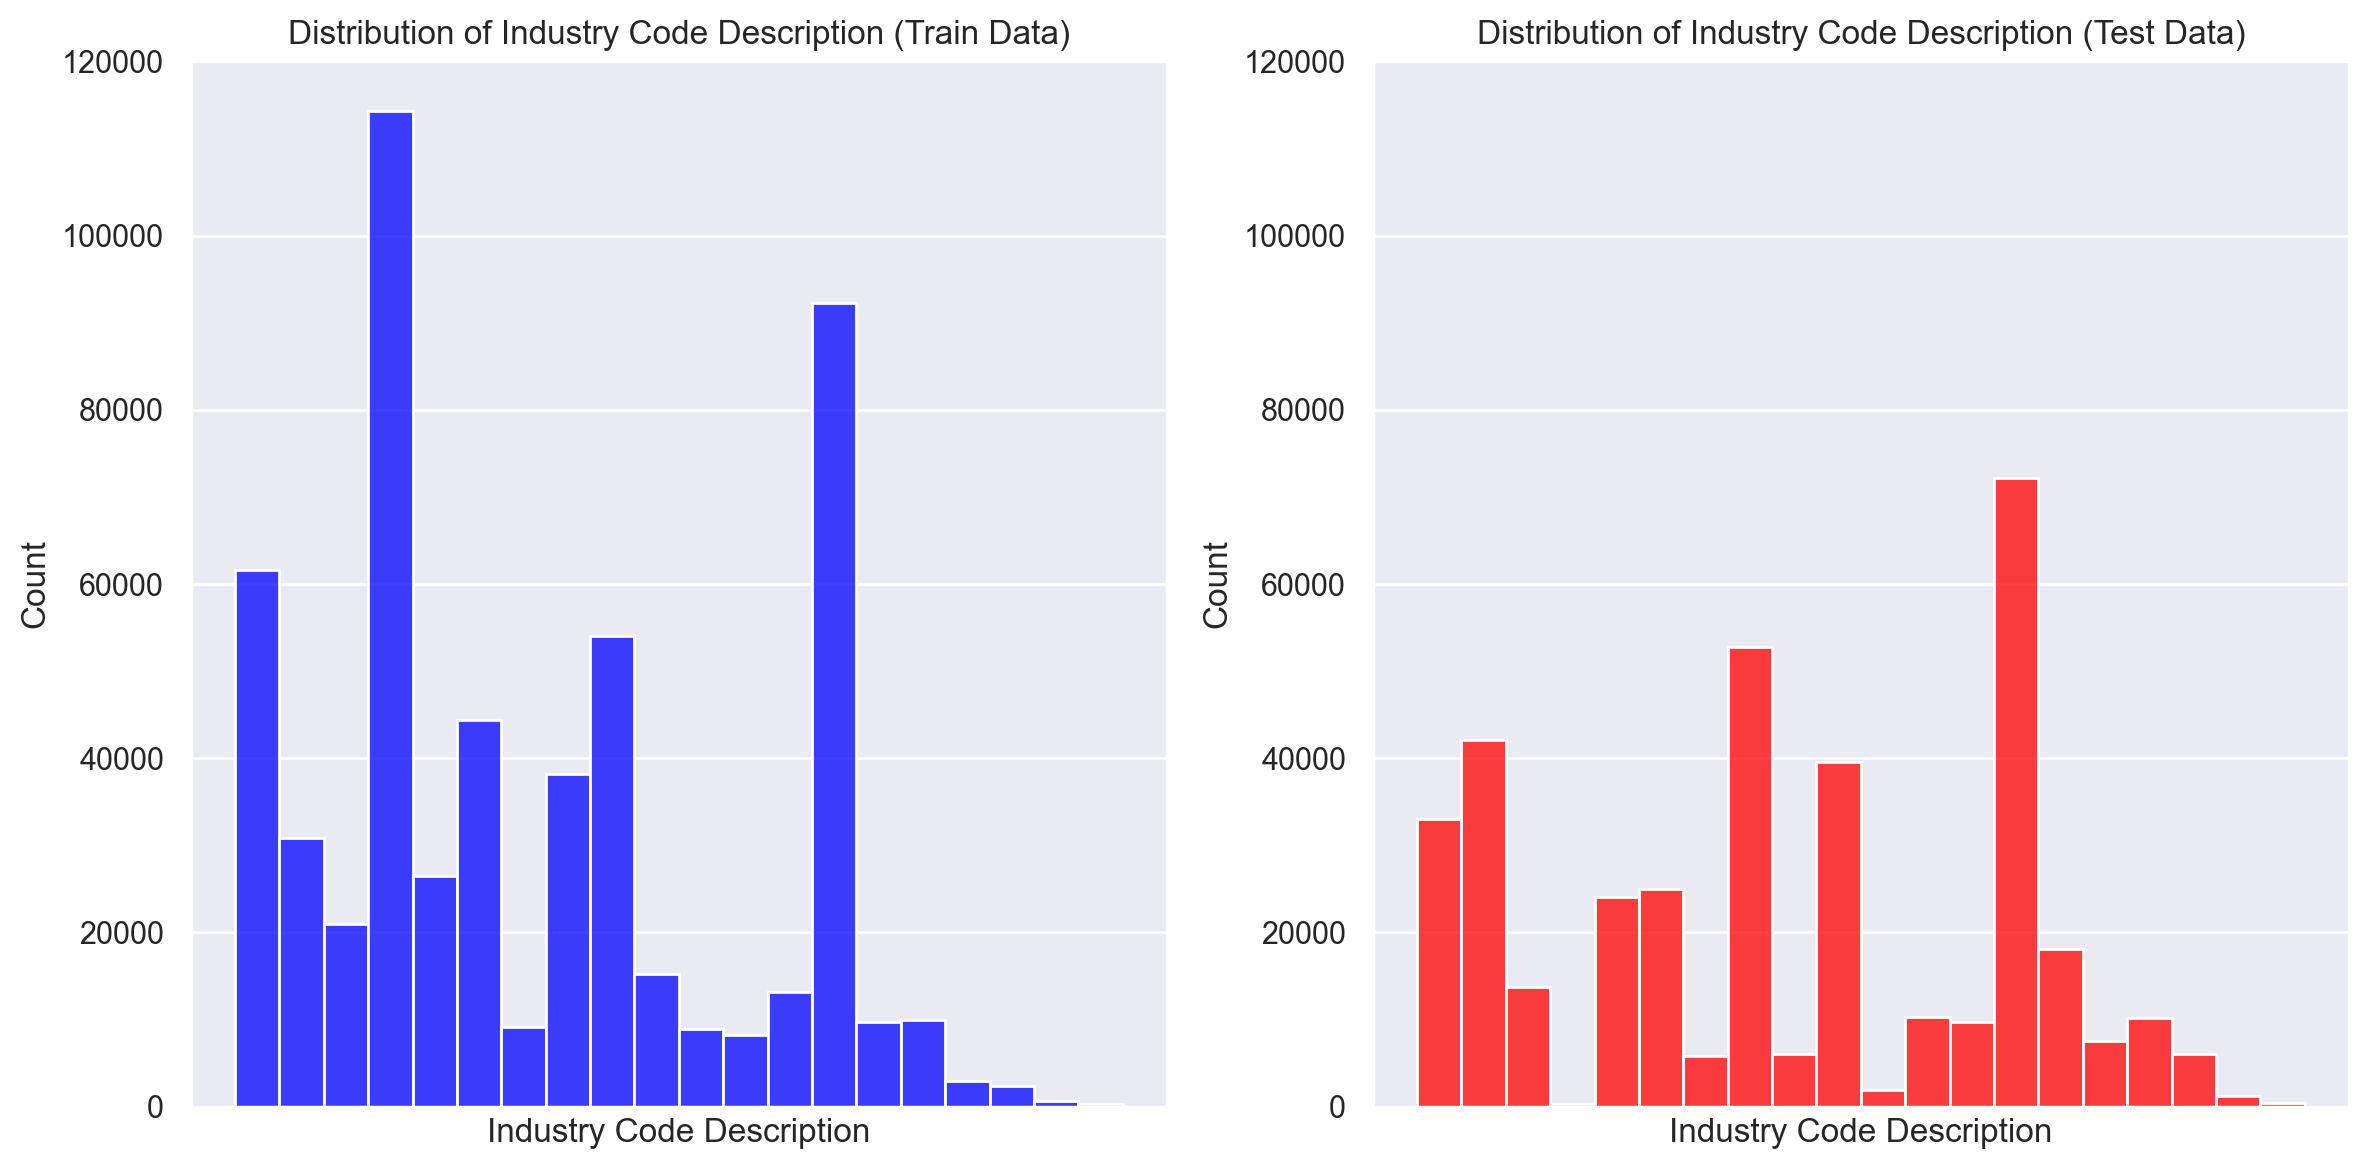

In [129]:
plt.figure(figsize=(12, 6))

ax1 = plt.subplot(1, 2, 1) 
sns.histplot(data=train_data, x='Industry Code Description', kde=False, color='blue')
ax1.set_title('Distribution of Industry Code Description (Train Data)')
ax1.set_xticks([])  

ax2 = plt.subplot(1, 2, 2)  
sns.histplot(data=test_data, x='Industry Code Description', kde=False, color='red')
ax2.set_title('Distribution of Industry Code Description (Test Data)')
ax2.set_xticks([])  

max_y = max(ax1.get_ylim()[1], ax2.get_ylim()[1])

ax1.set_ylim(0, max_y)
ax2.set_ylim(0, max_y)

plt.tight_layout()
plt.show()

In [130]:
calculate_missing_percentage(train_data[["Industry Code Description"]], test_data[["Industry Code Description"]])

Train Data                         Test Data  \
                          NaN Percentage NaN Rows Data Type NaN Percentage   
Feature                                                                      
Industry Code Description       4.954412    29403    object       1.993943   

                                              
                          NaN Rows Data Type  
Feature                                       
Industry Code Description     7736    object

### Zip Code

In [131]:
train_data["Zip Code"].nunique()

10061

In [132]:
print("Train")
print("Original Data:", df_train_initial.shape)
print("Replica Data:", train_data.shape)
print("Test")
print("Original Data:", df_test_initial.shape)
print("Replica Data:", test_data.shape)

Train
Original Data: (593471, 33)
Replica Data: (593471, 33)
Test
Original Data: (387975, 30)
Replica Data: (387975, 30)


<a class="anchor" id="dataexploration">
    
## 2.5. Multivariate relationships
</a>

<a class="anchor" id="dataexploration">
    
### Numerical features
</a>

In [133]:
numerical_features.remove("Claim Identifier")

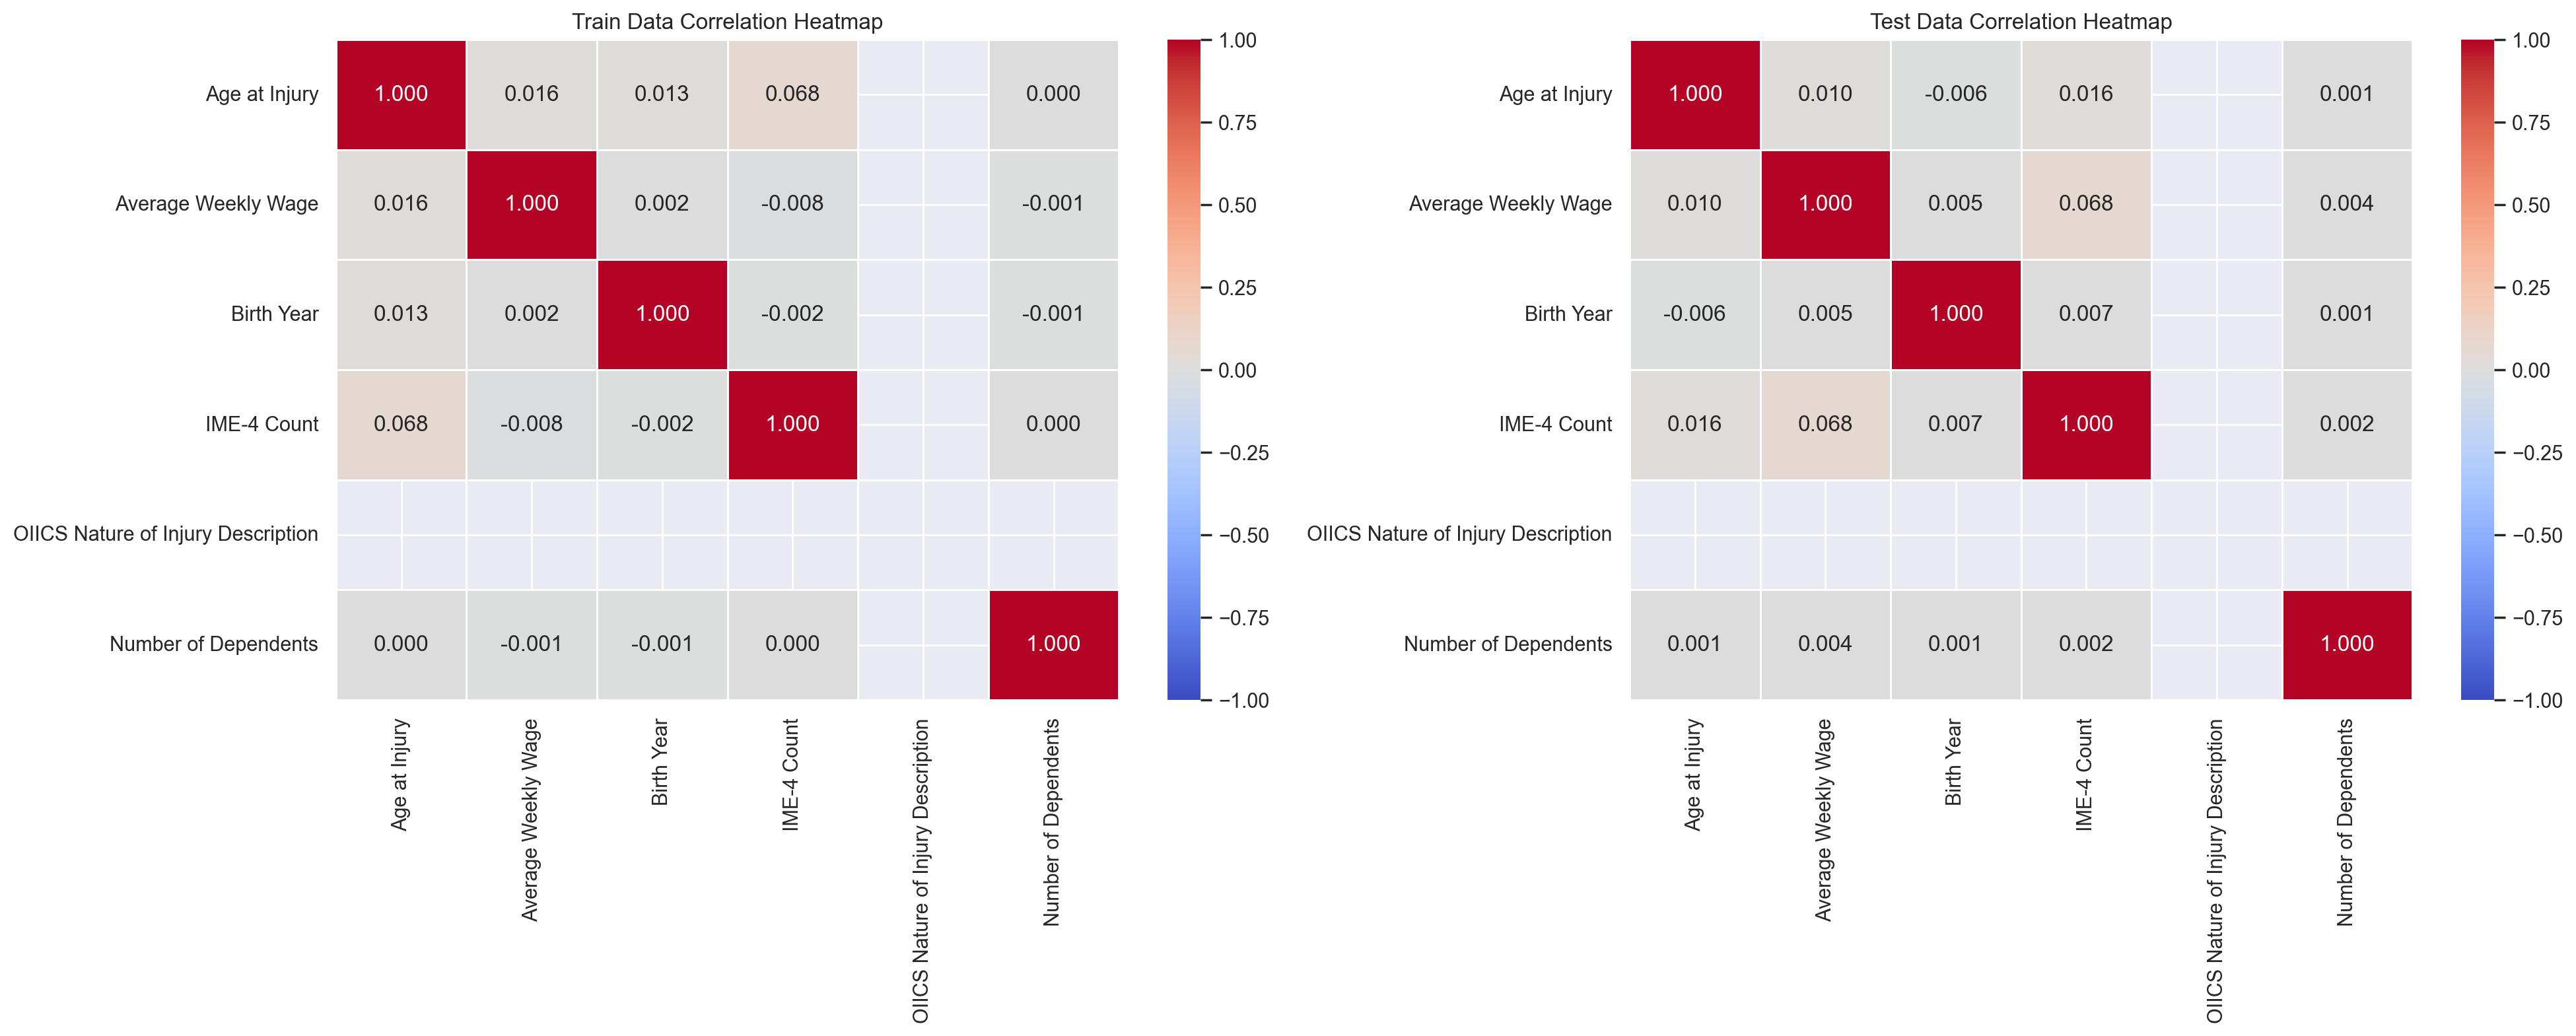

In [134]:
# Compute correlation matrices
corr_train = train_data[numerical_features].corr()
corr_test = test_data[numerical_features].corr()

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

sns.heatmap(corr_train, annot=True, cmap="coolwarm", fmt=".3f", 
            linewidths=0.5, ax=axes[0], vmin=-1, vmax=1)
sns.heatmap(corr_test, annot=True, cmap="coolwarm", fmt=".3f", 
            linewidths=0.5, ax=axes[1], vmin=-1, vmax=1)

axes[0].set_title("Train Data Correlation Heatmap")
axes[1].set_title("Test Data Correlation Heatmap")

for ax in axes:
    ax.set_yticklabels(ax.get_yticklabels(), rotation = 0)

plt.tight_layout()
plt.show()

This is the correlation matrix for the numerical features. The results may be influenced by the presence of missing values.

<a class="anchor" id="dataexploration">
    
### Categorical features
</a>

Feature 'Accident Date' has more than 50 distinct values and will not be plotted.


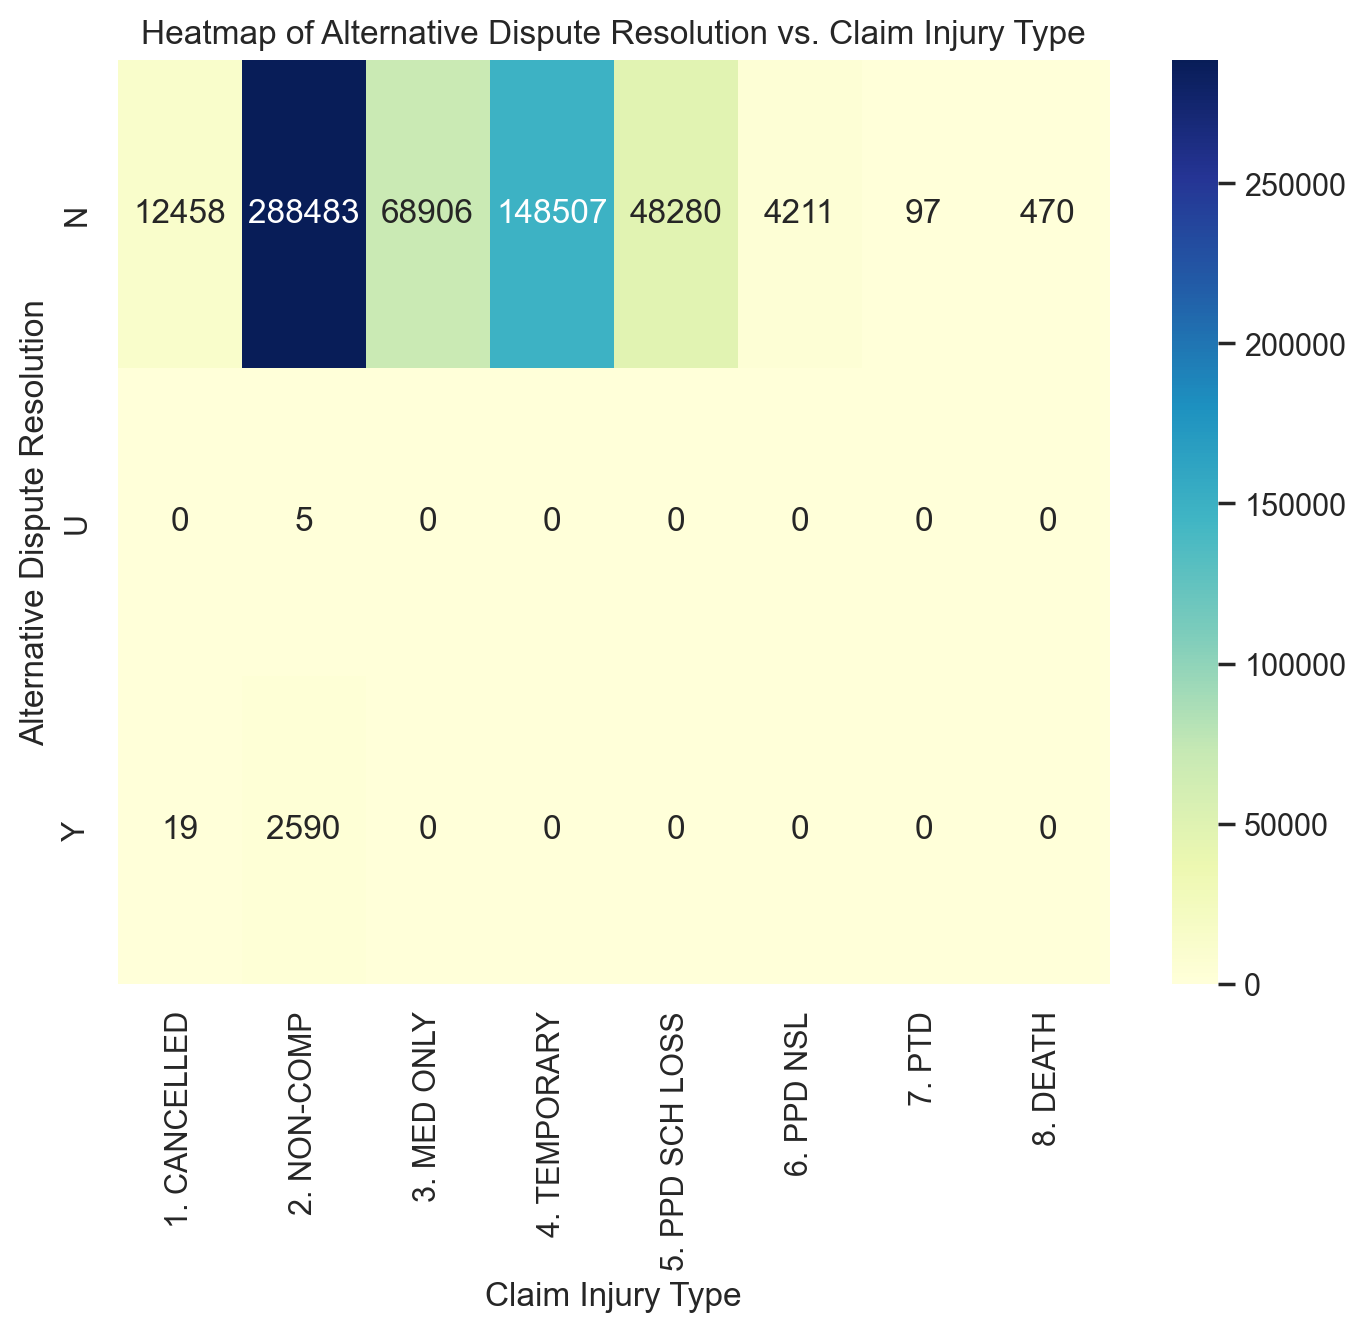

Feature 'Assembly Date' has more than 50 distinct values and will not be plotted.


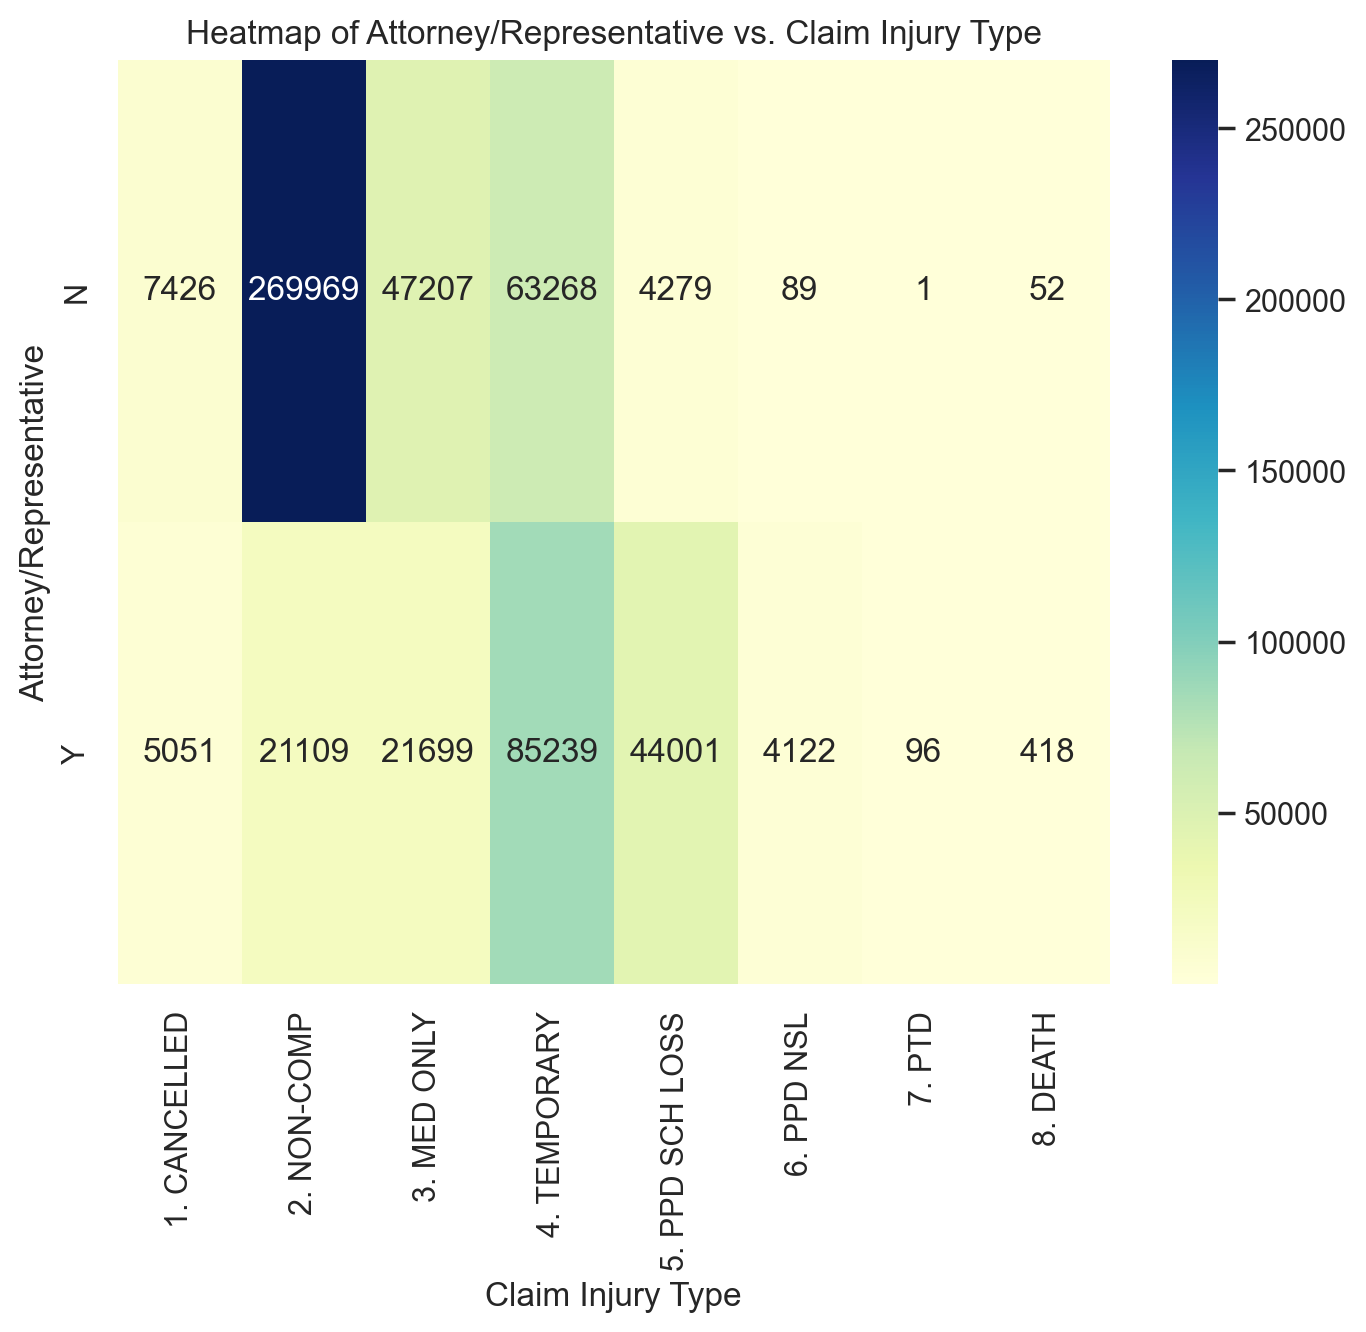

Feature 'C-2 Date' has more than 50 distinct values and will not be plotted.
Feature 'C-3 Date' has more than 50 distinct values and will not be plotted.
Feature 'Carrier Name' has more than 50 distinct values and will not be plotted.


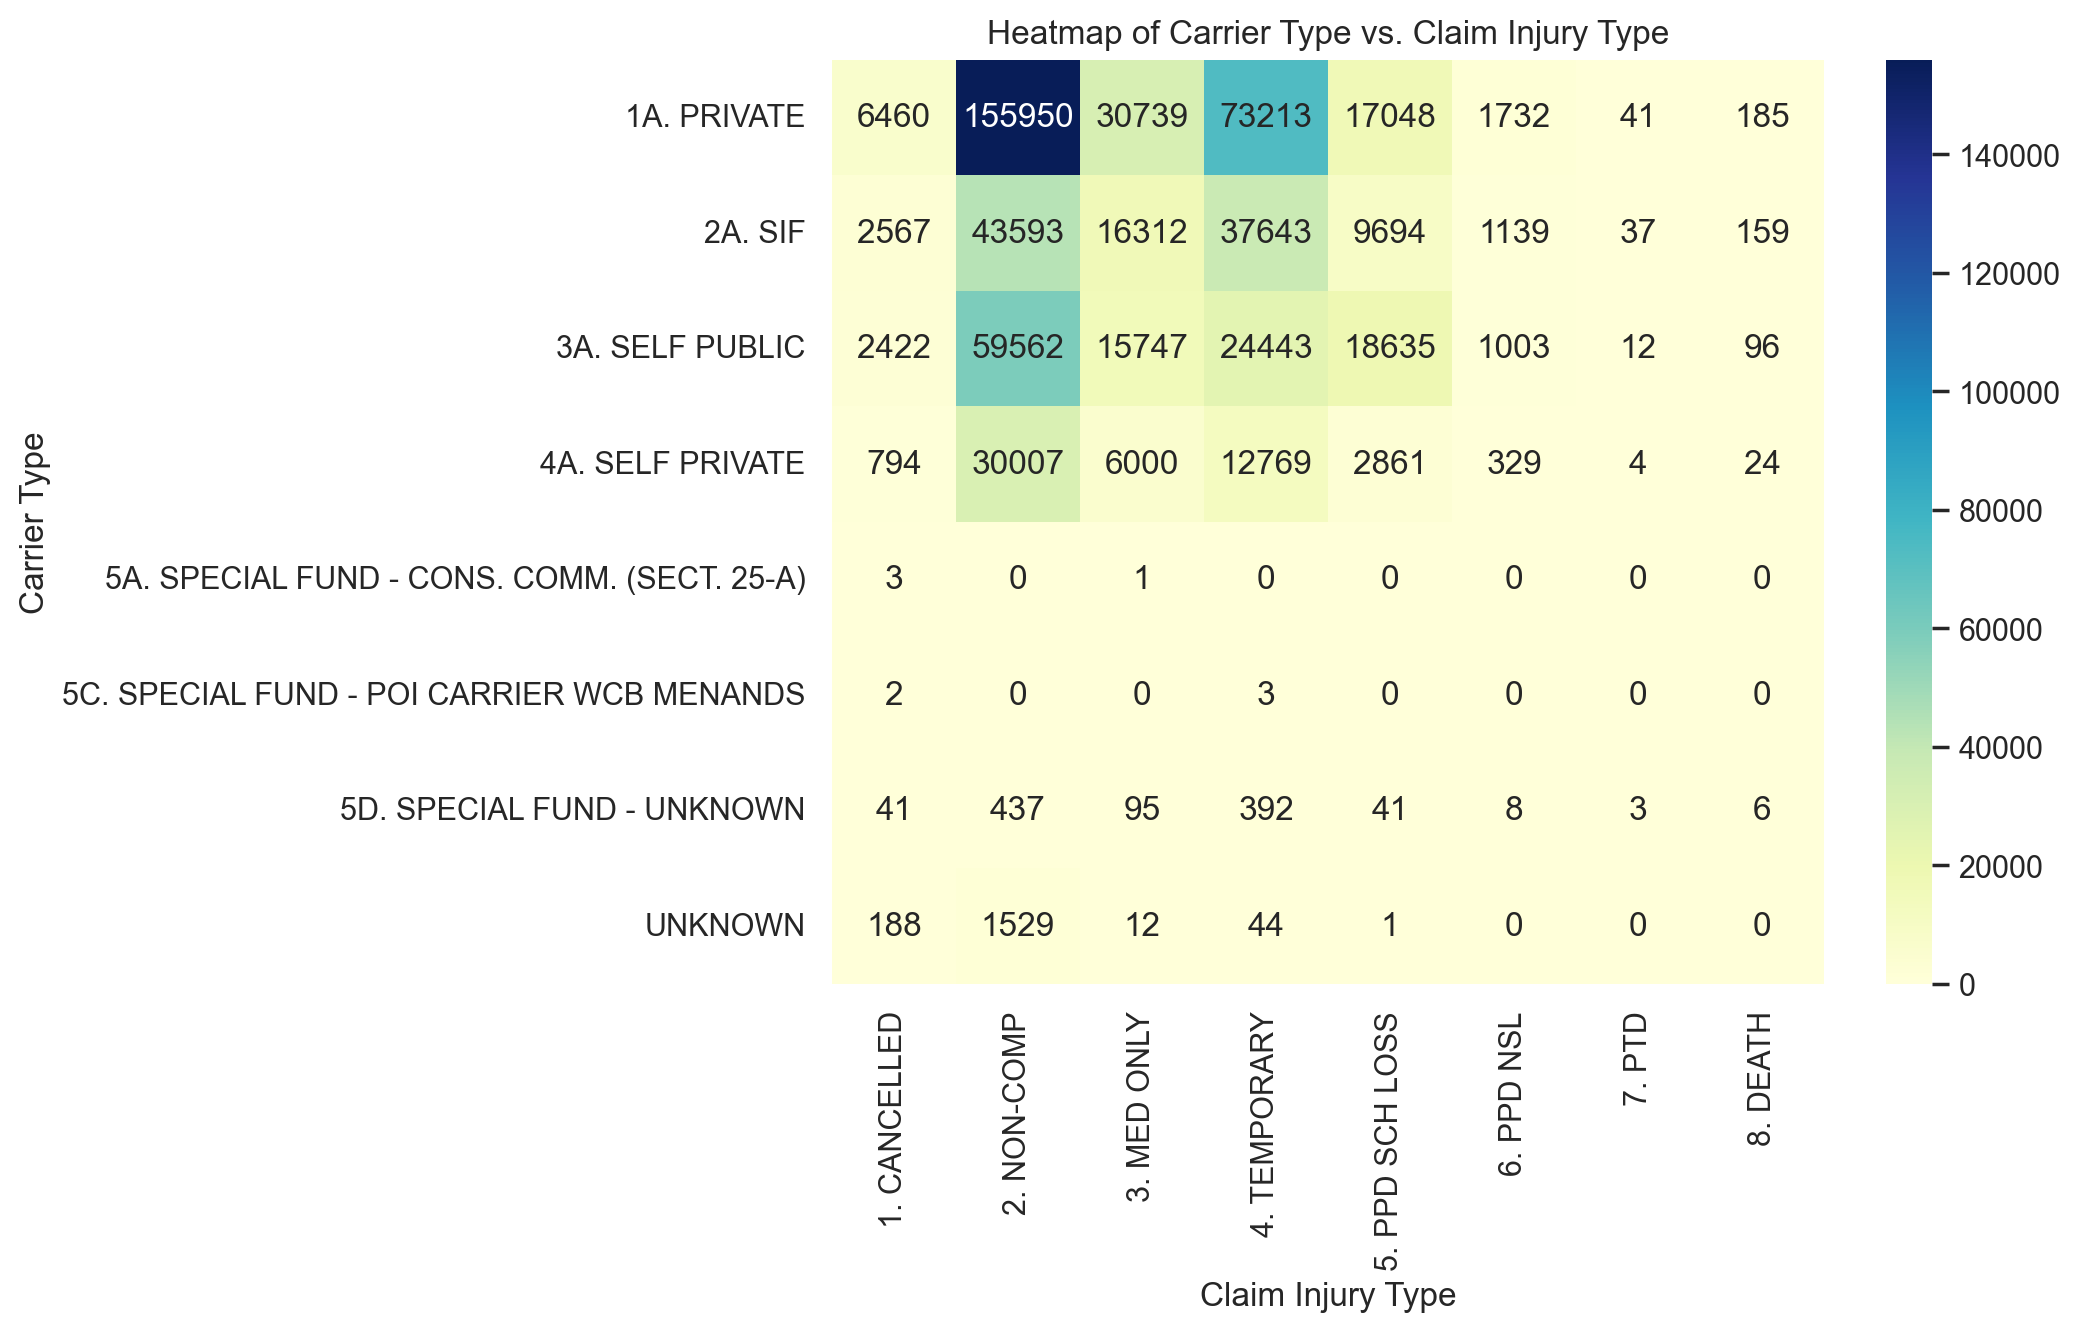

Feature 'County of Injury' has more than 50 distinct values and will not be plotted.


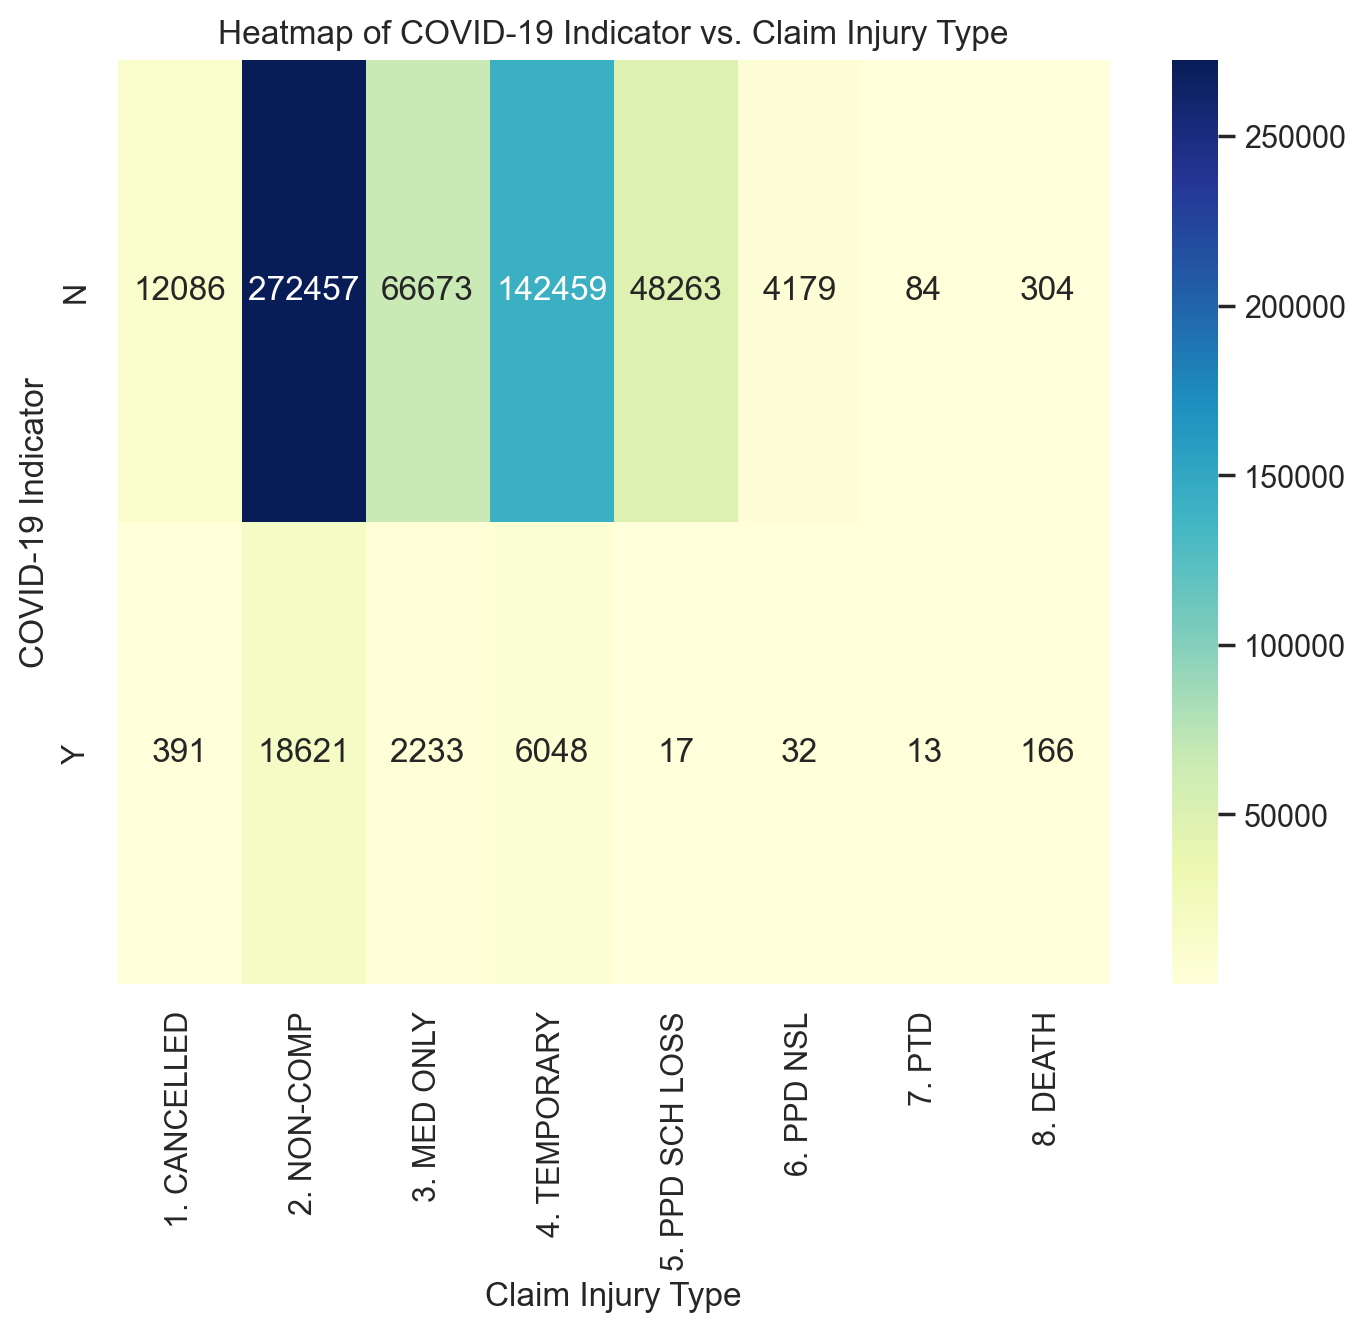

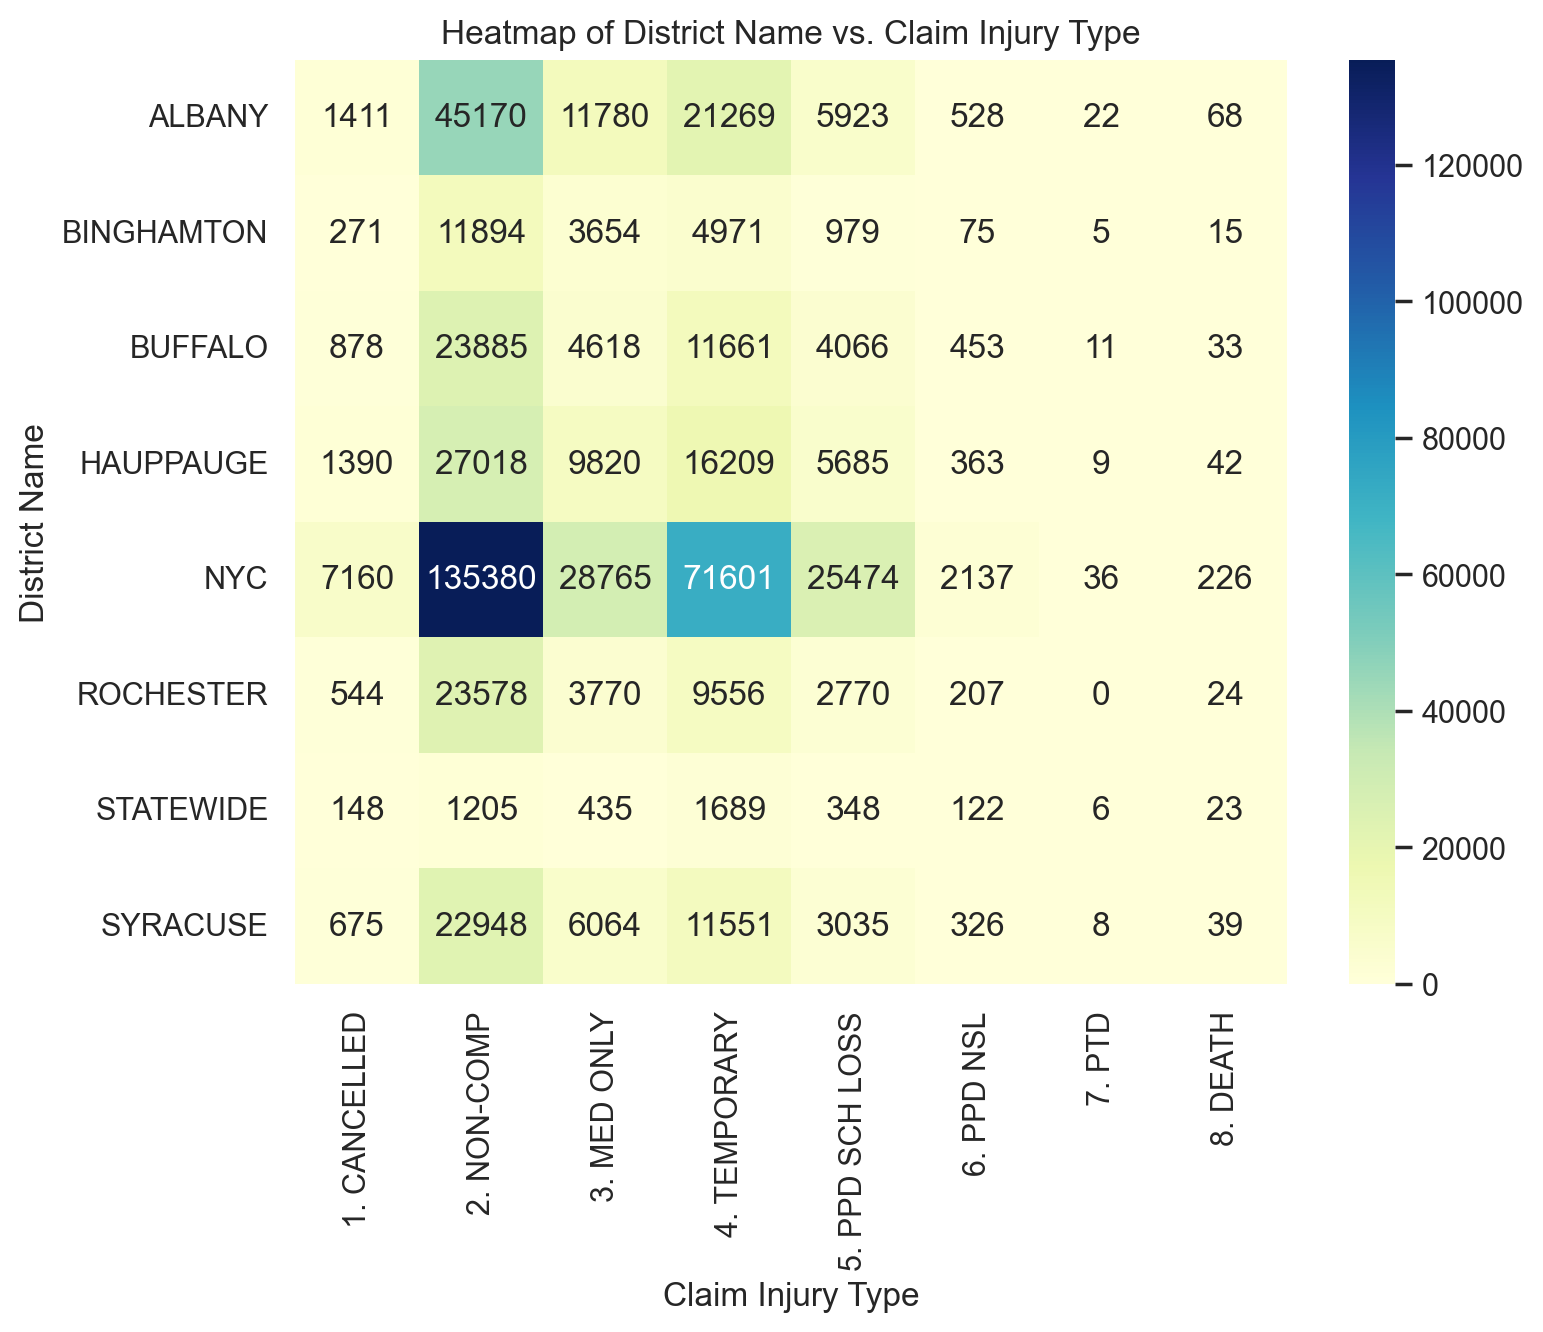

Feature 'First Hearing Date' has more than 50 distinct values and will not be plotted.


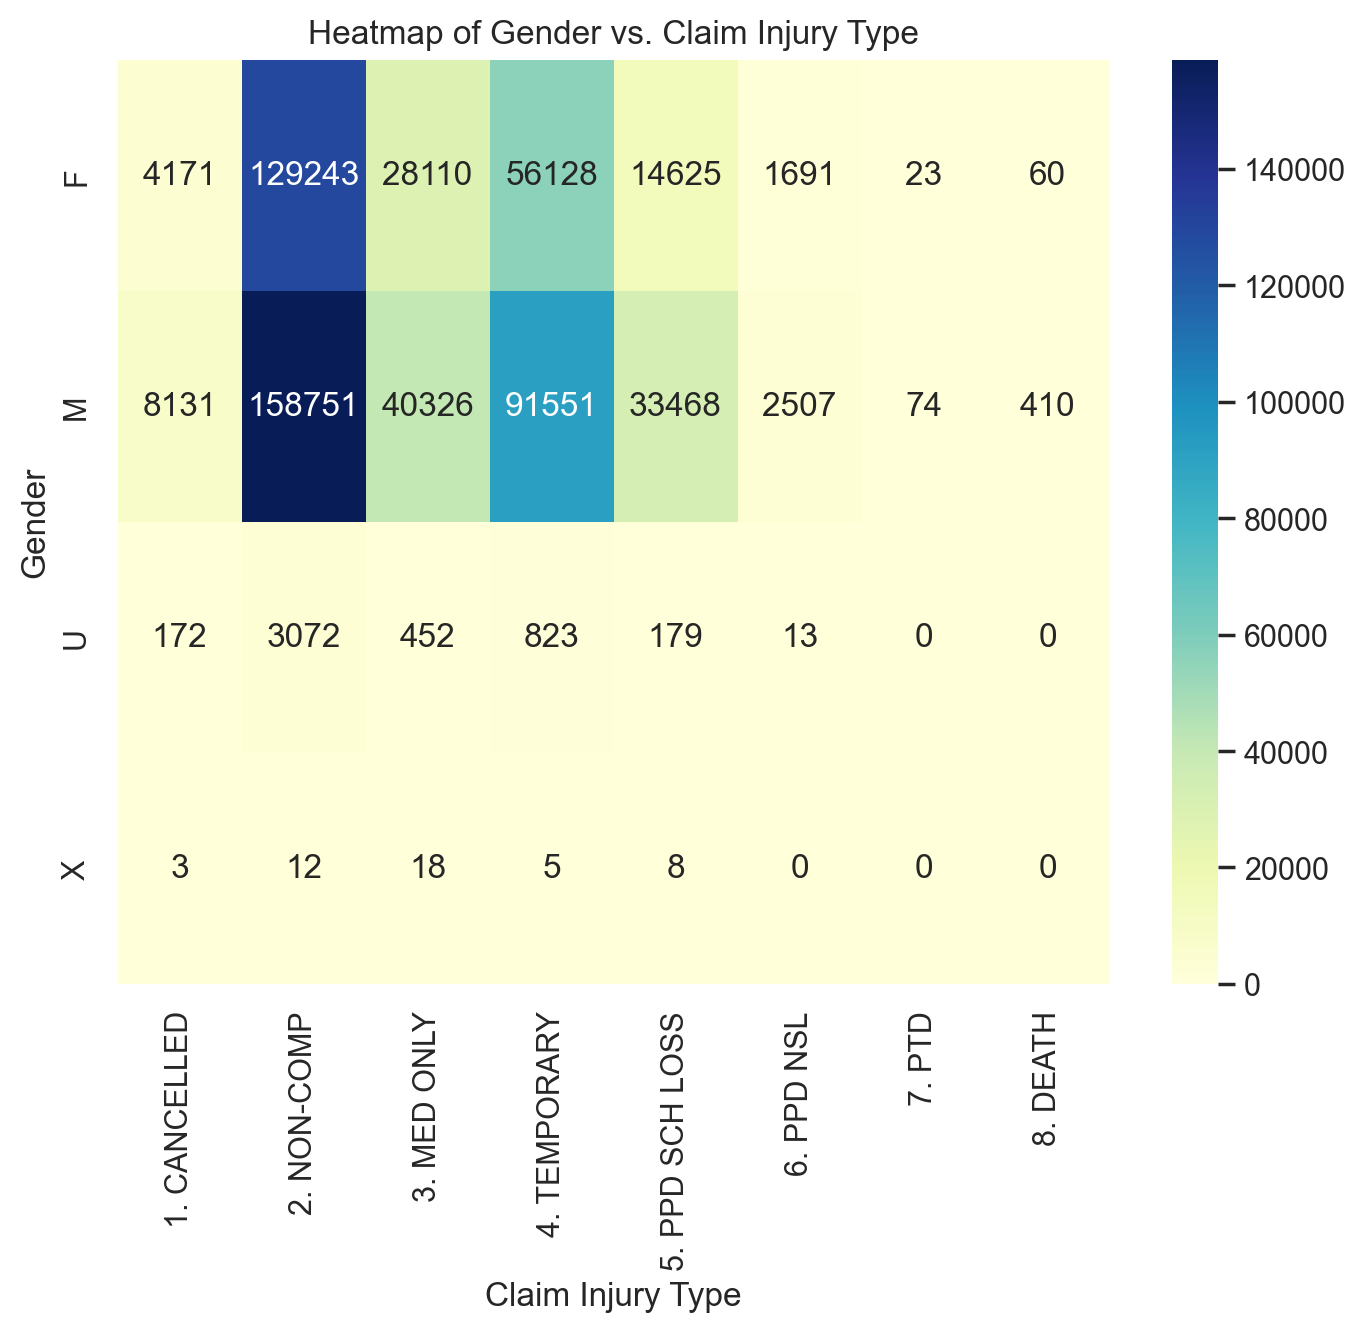

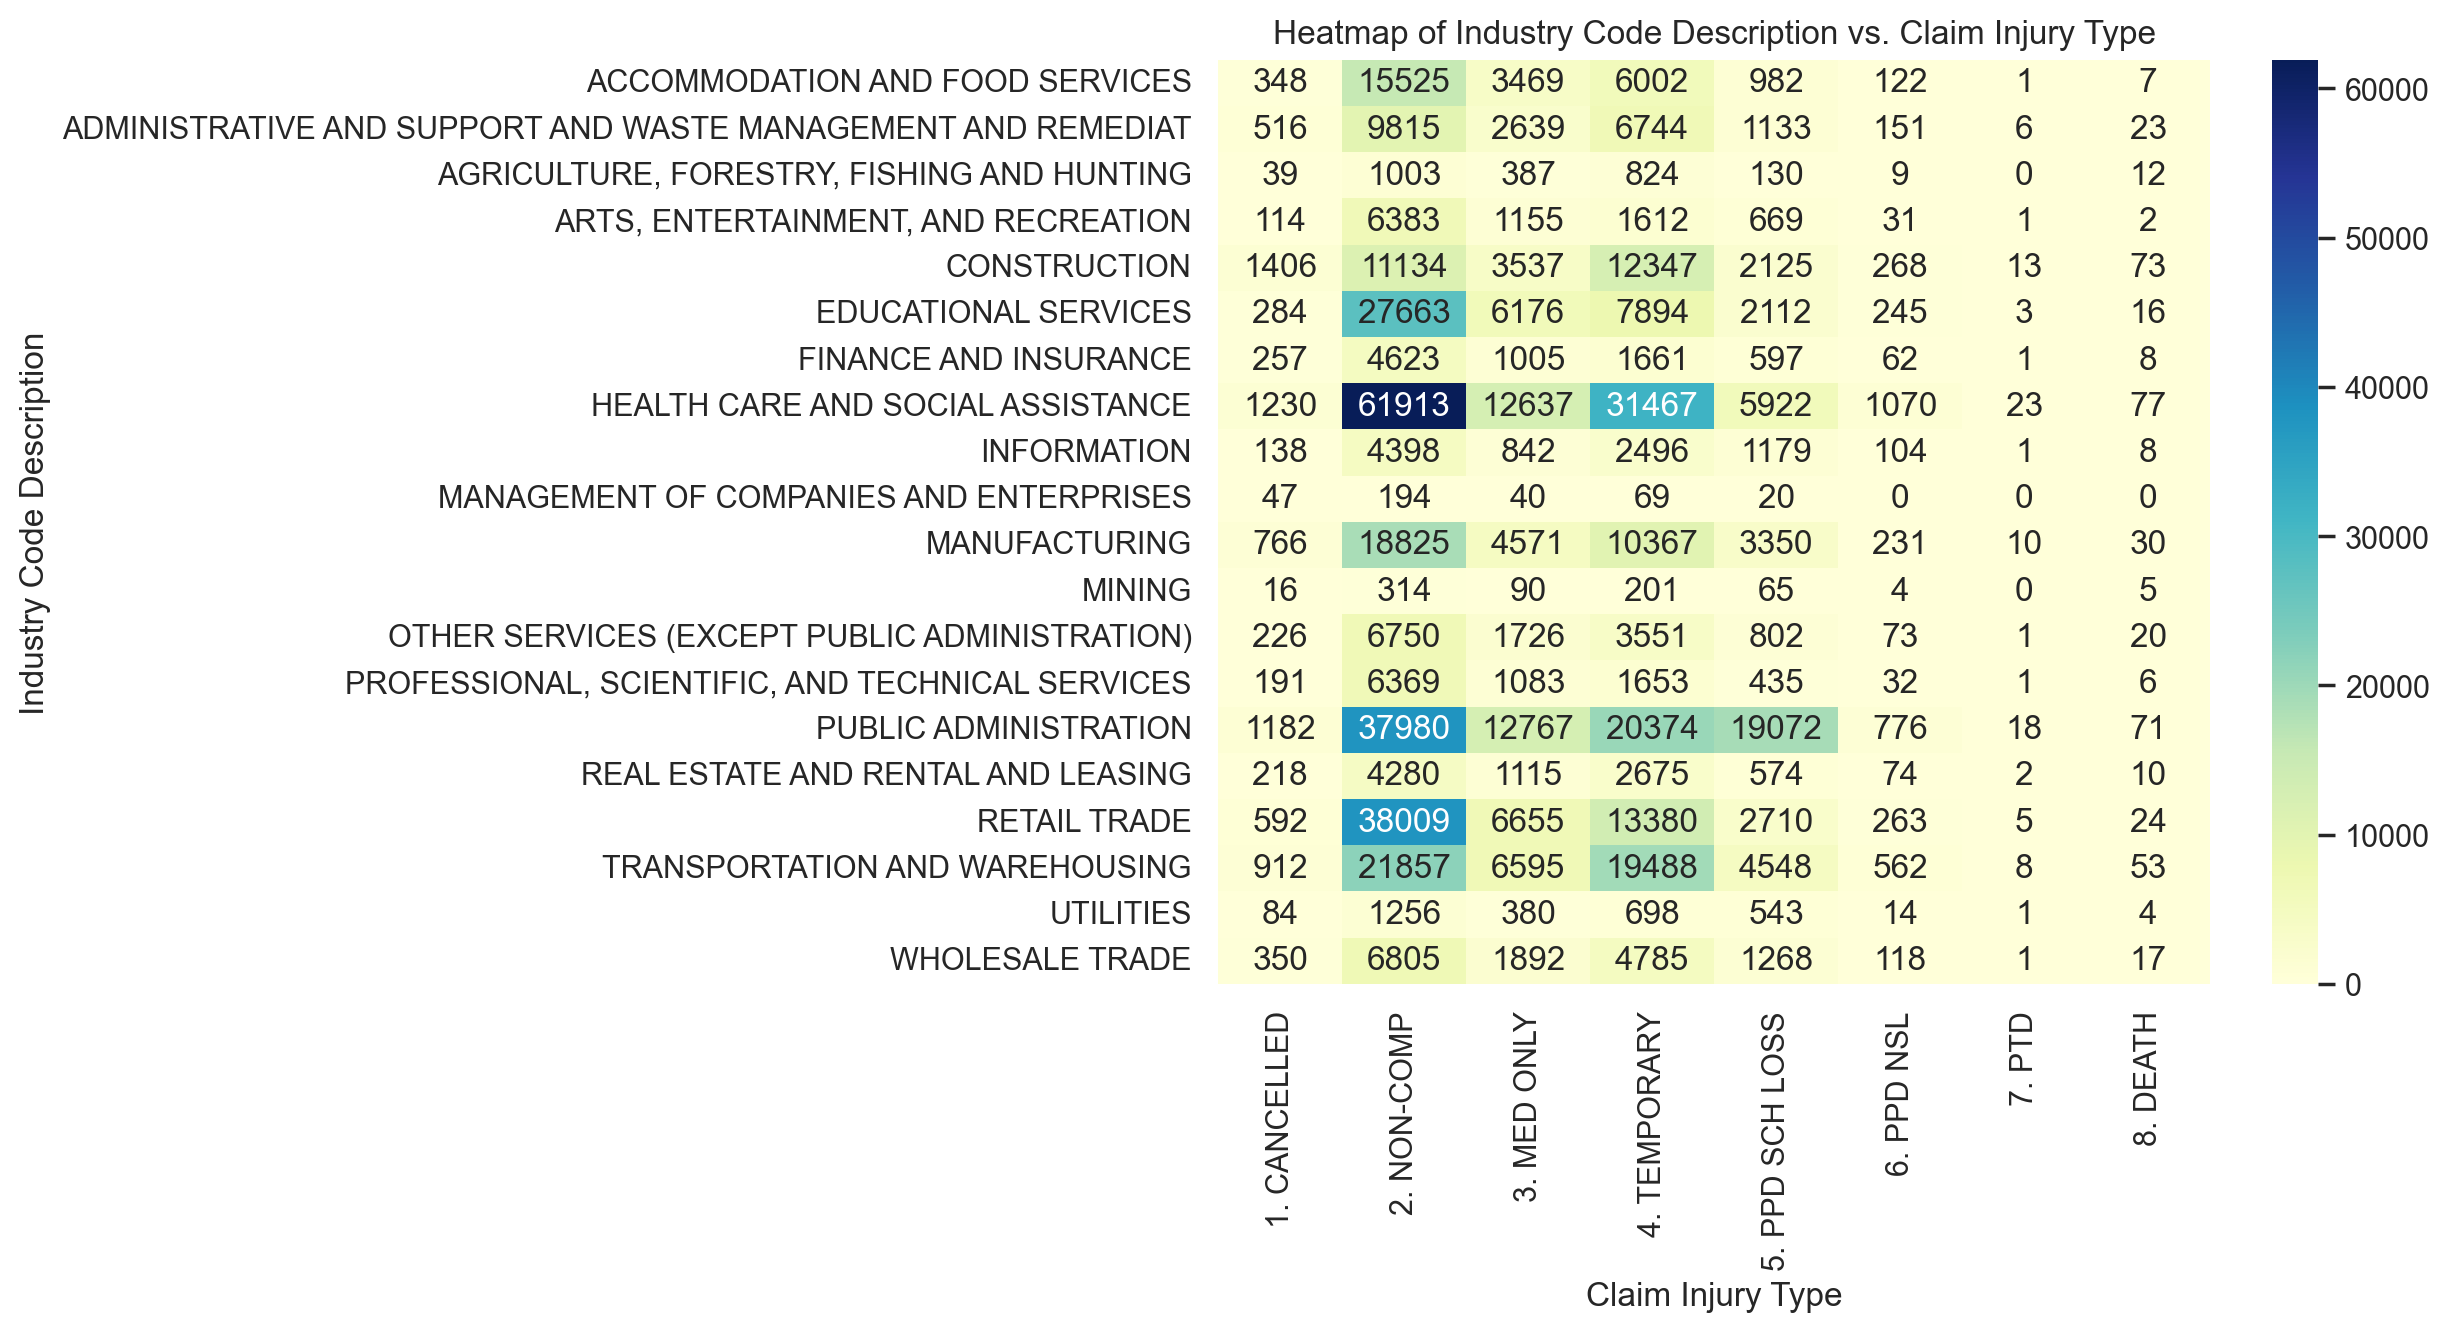

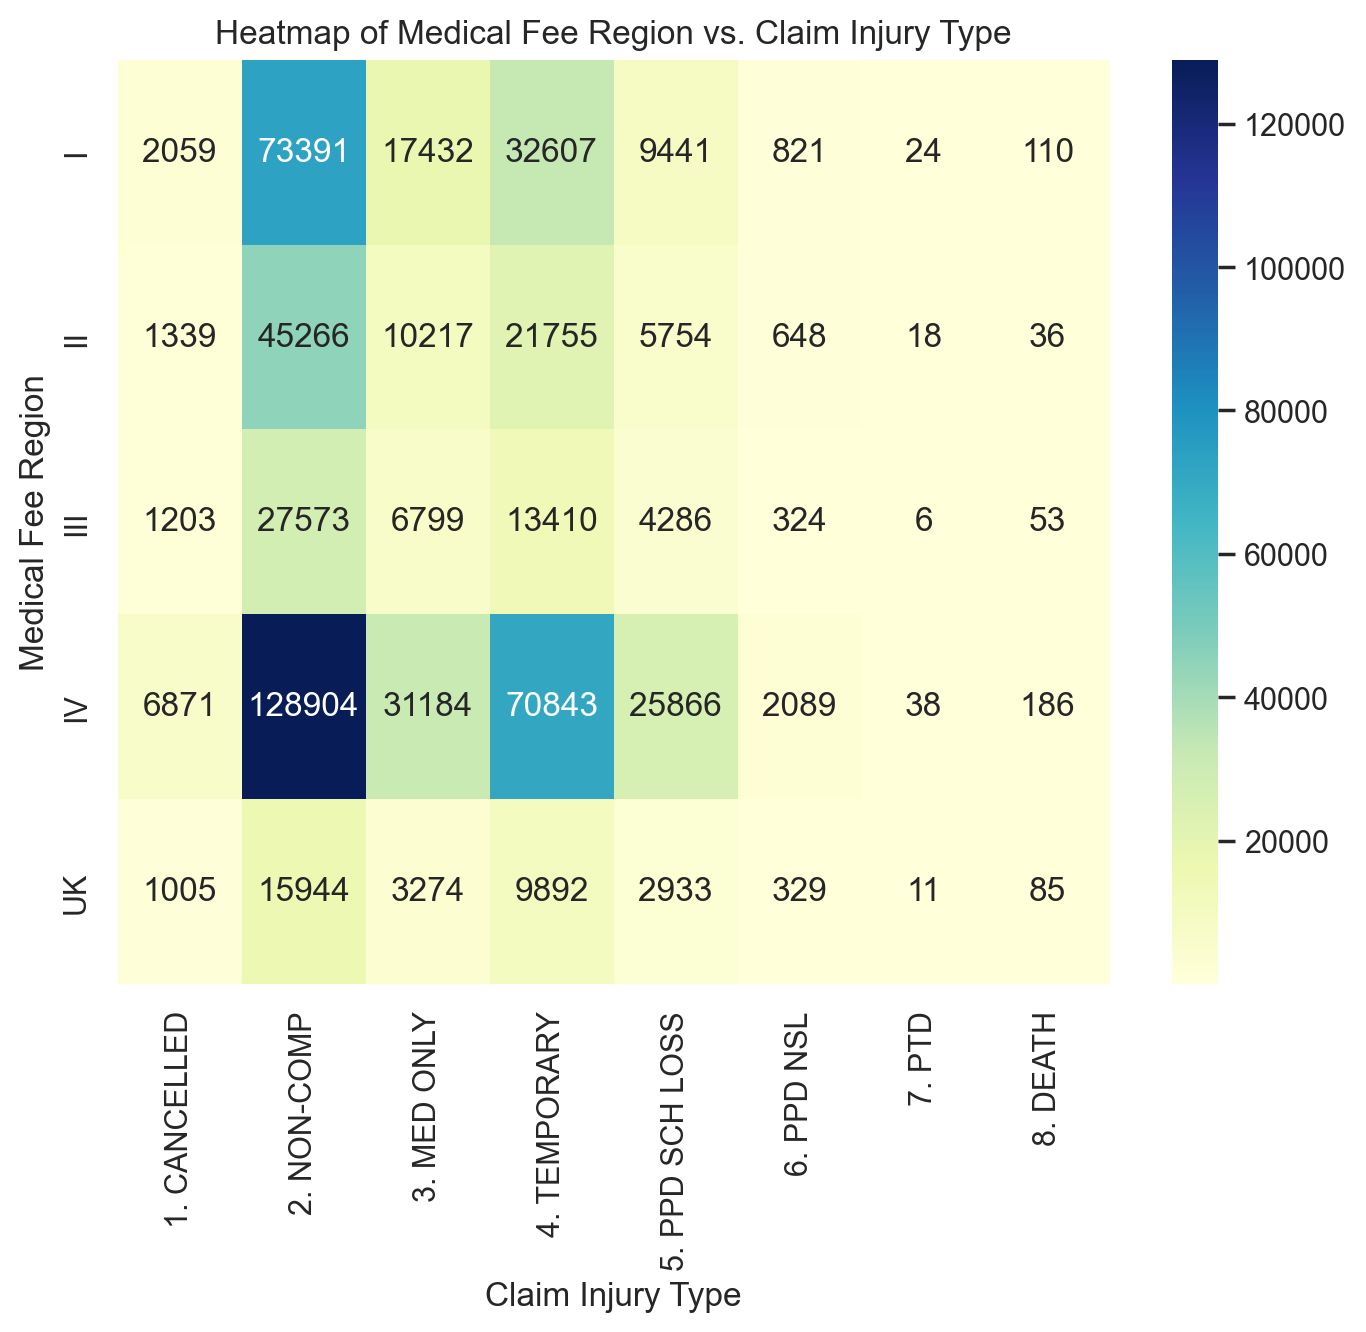

Feature 'WCIO Cause of Injury Description' has more than 50 distinct values and will not be plotted.
Feature 'WCIO Nature of Injury Description' has more than 50 distinct values and will not be plotted.
Feature 'WCIO Part Of Body Description' has more than 50 distinct values and will not be plotted.
Feature 'Zip Code' has more than 50 distinct values and will not be plotted.


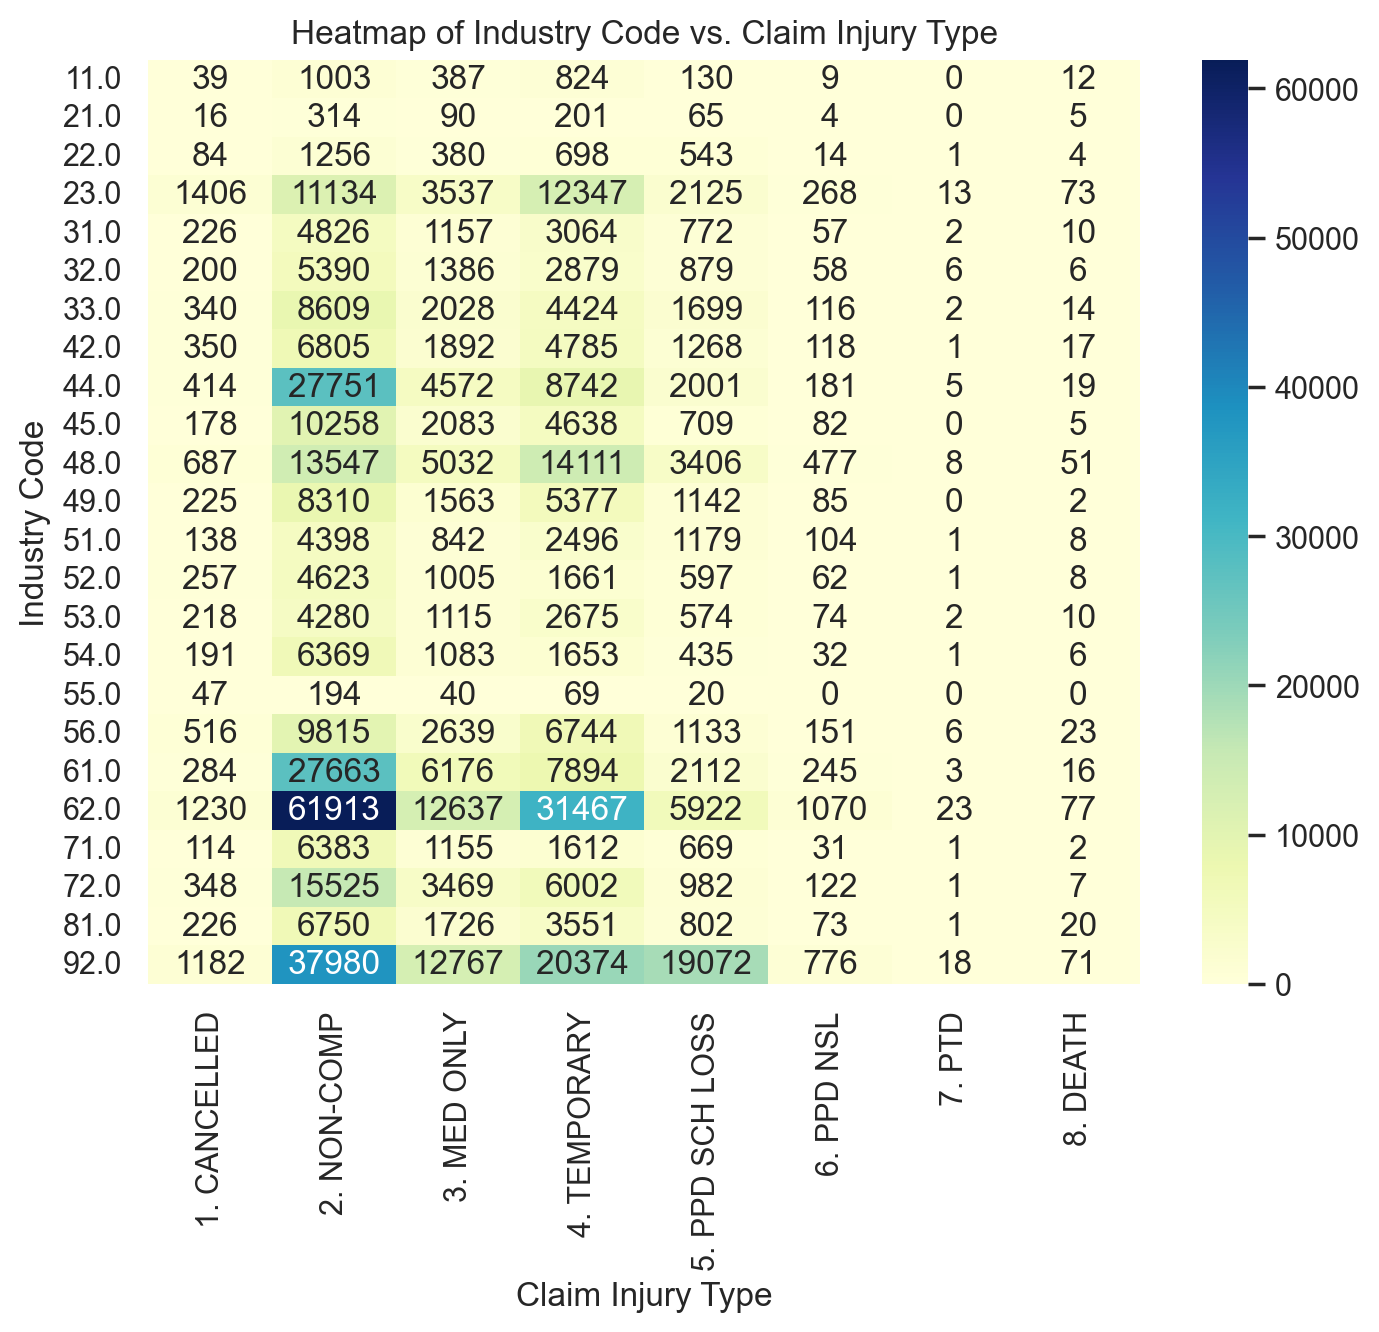

Feature 'WCIO Cause of Injury Code' has more than 50 distinct values and will not be plotted.
Feature 'WCIO Nature of Injury Code' has more than 50 distinct values and will not be plotted.
Feature 'WCIO Part Of Body Code' has more than 50 distinct values and will not be plotted.


In [135]:
distinct_values_allowed = 50

for feature in train_data[categorical_features]:
    if train_data[feature].nunique() <= distinct_values_allowed:
        contingency_table = pd.crosstab(train_data[feature], train_data["Claim Injury Type"])
        
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        
        plt.figure(figsize=(8, 6))
        sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt="d")
        plt.title(f"Heatmap of {feature} vs. Claim Injury Type")
        plt.xlabel("Claim Injury Type")
        plt.ylabel(feature)
        plt.show()
    else:
        print(f"Feature '{feature}' has more than {distinct_values_allowed} distinct values and will not be plotted.")

<hr>
<a class="anchor">
    
# 3. Data Preprocessing
    
</a>

In [136]:
print(train_data.shape)
print(test_data.shape)

(593471, 33)
(387975, 30)


At this stage, we drop the missing values in the target variable, other target-related features, and a feature that consists entirely of missing values.

In [137]:
train_data = train_data.dropna(subset=["Claim Injury Type"])
train_data = train_data.drop(columns=["OIICS Nature of Injury Description","WCB Decision","Agreement Reached"], axis = 1)

test_data = test_data.drop(columns=["OIICS Nature of Injury Description"], axis = 1)

We verify for duplicates in the "Claim Identifier" feature to ensure it can be safely used as the index.

In [138]:
train_data["Claim Identifier"].duplicated().sum()

0

In [139]:
test_data["Claim Identifier"].duplicated().sum()

0

In [140]:
train_data.set_index("Claim Identifier", inplace = True)
test_data.set_index("Claim Identifier", inplace = True)

Next, we split the dataset into numerical and categorical features. Some adjustments were necessary as certain features, such as codes, were initially treated as numerical but are inherently categorical.

In [141]:
numerical_features = train_data.select_dtypes(include = np.number).columns.tolist()

In [142]:
categorical_features = train_data.select_dtypes(exclude = np.number).columns.tolist()

In [143]:
numerical_to_drop = ["Industry Code", "WCIO Cause of Injury Code", 
                     "WCIO Nature of Injury Code", "WCIO Part Of Body Code"]

for e in numerical_to_drop:

    numerical_features.remove(e)

    categorical_features.append(e)

Setting all the independent and dependent variables.

In [144]:
# All independent variables
X = train_data.drop("Claim Injury Type", axis = 1)

# Dependent variable
y = train_data["Claim Injury Type"]

Starting the split now to prevent data leakage moving forward.

In [145]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.2, 
                                                  random_state = 19,
                                                  stratify = y)

In [146]:
print("Train")
print(X_train.shape)
print(y_train.shape)
print("Val")
print(X_val.shape)
print(y_val.shape)
print("Test")
print(test_data.shape)

Train
(459220, 28)
(459220,)
Val
(114806, 28)
(114806,)
Test
(387975, 28)


<a class="anchor">
    
## 3.1. Missing values
    
</a>

In [147]:
def calculate_missing_percentage_train_test_split(dataframe1, dataframe2, dataframe3):    
    nan_info_df1 = calculate_nan_info(dataframe1)
    nan_info_df2 = calculate_nan_info(dataframe2)
    nan_info_df3 = calculate_nan_info(dataframe3)

    result = pd.concat(
        [nan_info_df1, nan_info_df2, nan_info_df3],
        axis=1,
        keys=['Train Data', 'Validation Data', 'Test Data']
    )
    
    return result

In [148]:
calculate_missing_percentage_train_test_split(X_train, X_val, test_data)

Train Data                           \
                                  NaN Percentage NaN Rows       Data Type   
Feature                                                                     
First Hearing Date                     73.737642   338618          object   
WCIO Part Of Body Description           2.993337    13746          object   
WCIO Nature of Injury Description       2.743347    12598          object   
WCIO Cause of Injury Description        2.740081    12583          object   
Industry Code Description               1.739036     7986          object   
IME-4 Count                            76.888202   353086         float64   
Birth Year                              5.072732    23295         float64   
Average Weekly Wage                     5.006968    22993         float64   
WCIO Part Of Body Code                  2.993337    13746         float64   
WCIO Nature of Injury Code              2.743347    12598         float64   
WCIO Cause of Injury Code               2.740081    12583         float64   
Industry Code                           1.739036     7986         float64   
C-3 Date                               67.361178   309336  datetime64[ns]   
C-2 Date                                2.551936    11719  datetime64[ns]   
Accident Date                           0.642829     2952  datetime64[ns]   

                                  Validation Data                           \
                                   NaN Percentage NaN Rows       Data Type   
Feature                                                                      
First Hearing Date                      73.698239    84610          object   
WCIO Part Of Body Description            2.905771     3336          object   
WCIO Nature of Injury Description        2.664495     3059          object   
WCIO Cause of Injury Description         2.662753     3057          object   
Industry Code Description                1.717680     1972          object   
IME-4 Count                             76.770378    88137         float64   
Birth Year                               5.037193     5783         float64   
Average Weekly Wage                      4.928314     5658         float64   
WCIO Part Of Body Code                   2.905771     3336         float64   
WCIO Nature of Injury Code               2.664495     3059         float64   
WCIO Cause of Injury Code                2.662753     3057         float64   
Industry Code                            1.717680     1972         float64   
C-3 Date                                67.457276    77445  datetime64[ns]   
C-2 Date                                 2.474609     2841  datetime64[ns]   
Accident Date                            0.641953      737  datetime64[ns]   

                                       Test Data                           
                                  NaN Percentage NaN Rows       Data Type  
Feature                                                                    
First Hearing Date                     88.909595   344947          object  
WCIO Part Of Body Description           2.461241     9549          object  
WCIO Nature of Injury Description       2.721825    10560          object  
WCIO Cause of Injury Description        2.667182    10348          object  
Industry Code Description               1.993943     7736          object  
IME-4 Count                            90.914621   352726         float64  
Birth Year                              5.018365    19470         float64  
Average Weekly Wage                     4.949803    19204         float64  
WCIO Part Of Body Code                  2.461241     9549         float64  
WCIO Nature of Injury Code              2.721825    10560         float64  
WCIO Cause of Injury Code               2.667182    10348         float64  
Industry Code                           1.993943     7736         float64  
C-3 Date                               78.035698   302759  datetime64[ns]  
C-2 Date                      

### Numerical Features

In [149]:
print(X_train[numerical_features].columns)
print(X_val[numerical_features].columns)
print(test_data[numerical_features].columns)

Index(['Age at Injury', 'Average Weekly Wage', 'Birth Year', 'IME-4 Count',
       'Number of Dependents'],
      dtype='object')
Index(['Age at Injury', 'Average Weekly Wage', 'Birth Year', 'IME-4 Count',
       'Number of Dependents'],
      dtype='object')
Index(['Age at Injury', 'Average Weekly Wage', 'Birth Year', 'IME-4 Count',
       'Number of Dependents'],
      dtype='object')


#### IME-4 Count

In this case, we fill NaN with 0 because, considering the meaning of the feature, NaN makes sense as 0, indicating that no forms were received.

In [150]:
X_train.fillna({'IME-4 Count' : 0.0}, inplace=True)

X_val.fillna({'IME-4 Count' : 0.0}, inplace=True)

test_data.fillna({'IME-4 Count' : 0.0}, inplace=True)

#### Average Weekly Wage

Here, we simply replace missing values with the mean.

In [151]:
X_train_mean = X_train['Average Weekly Wage'].mean()

X_train.fillna({'Average Weekly Wage' :X_train_mean}, inplace=True)
X_val.fillna({'Average Weekly Wage' : X_train_mean}, inplace=True)
test_data.fillna({'Average Weekly Wage' : X_train_mean}, inplace=True)

### Categorical Features

In [152]:
calculate_missing_percentage_train_test_split(X_train, X_val, test_data)

Train Data                           \
                                  NaN Percentage NaN Rows       Data Type   
Feature                                                                     
First Hearing Date                     73.737642   338618          object   
WCIO Part Of Body Description           2.993337    13746          object   
WCIO Nature of Injury Description       2.743347    12598          object   
WCIO Cause of Injury Description        2.740081    12583          object   
Industry Code Description               1.739036     7986          object   
Birth Year                              5.072732    23295         float64   
WCIO Part Of Body Code                  2.993337    13746         float64   
WCIO Nature of Injury Code              2.743347    12598         float64   
WCIO Cause of Injury Code               2.740081    12583         float64   
Industry Code                           1.739036     7986         float64   
C-3 Date                               67.361178   309336  datetime64[ns]   
C-2 Date                                2.551936    11719  datetime64[ns]   
Accident Date                           0.642829     2952  datetime64[ns]   

                                  Validation Data                           \
                                   NaN Percentage NaN Rows       Data Type   
Feature                                                                      
First Hearing Date                      73.698239    84610          object   
WCIO Part Of Body Description            2.905771     3336          object   
WCIO Nature of Injury Description        2.664495     3059          object   
WCIO Cause of Injury Description         2.662753     3057          object   
Industry Code Description                1.717680     1972          object   
Birth Year                               5.037193     5783         float64   
WCIO Part Of Body Code                   2.905771     3336         float64   
WCIO Nature of Injury Code               2.664495     3059         float64   
WCIO Cause of Injury Code                2.662753     3057         float64   
Industry Code                            1.717680     1972         float64   
C-3 Date                                67.457276    77445  datetime64[ns]   
C-2 Date                                 2.474609     2841  datetime64[ns]   
Accident Date                            0.641953      737  datetime64[ns]   

                                       Test Data                           
                                  NaN Percentage NaN Rows       Data Type  
Feature                                                                    
First Hearing Date                     88.909595   344947          object  
WCIO Part Of Body Description           2.461241     9549          object  
WCIO Nature of Injury Description       2.721825    10560          object  
WCIO Cause of Injury Description        2.667182    10348          object  
Industry Code Description               1.993943     7736          object  
Birth Year                              5.018365    19470         float64  
WCIO Part Of Body Code                  2.461241     9549         float64  
WCIO Nature of Injury Code              2.721825    10560         float64  
WCIO Cause of Injury Code               2.667182    10348         float64  
Industry Code                           1.993943     7736         float64  
C-3 Date                               78.035698   302759  datetime64[ns]  
C-2 Date                                2.354275     9134  datetime64[ns]  
Accident Date                           0.629937     2444  datetime64[ns]

#### Date Features

We convert the columns with dates formatted as strings to a numeric format, indicating the number of days since the accident took palce.

In [153]:
date_cols = ["Assembly Date", "C-2 Date", "C-3 Date", "First Hearing Date"]

In [154]:
def date2days(df, dates, ref):
    for date in dates:
        df[date] = (pd.to_datetime(df[date]) - pd.to_datetime(df[ref])).dt.days

        # rename the column (example: 'First Hearing Date' -> 'First Hearing Days')
        df.rename(columns={date: date + " Days"}, inplace=True)
    return 'Computation complete'

In [155]:
date2days(X_train, date_cols, 'Accident Date')

date2days(X_val, date_cols, 'Accident Date')

date2days(test_data, date_cols, 'Accident Date')

'Computation complete'

#### First Hearing Date -> Hearing Binary

We will create a new feature to indicate whether a hearing session took place or not, and drop the `First Hearing Date`, as we consider that the missing values (which are quite prevalent) imply that there wasn’t a hearing session.

In [156]:
X_train.loc[X_train['First Hearing Date Days'].isna(), 'Hearing Binary'] = 0
X_train.loc[X_train['First Hearing Date Days'].notna(), 'Hearing Binary'] = 1

X_val.loc[X_val['First Hearing Date Days'].isna(), 'Hearing Binary'] = 0
X_val.loc[X_val['First Hearing Date Days'].notna(), 'Hearing Binary'] = 1

test_data.loc[test_data['First Hearing Date Days'].isna(), 'Hearing Binary'] = 0
test_data.loc[test_data['First Hearing Date Days'].notna(), 'Hearing Binary'] = 1

#### C-2 Date / C-3 Date

In [157]:
for col in ['C-2 Date Days', 'C-3 Date Days']:
    X_train.fillna({col : X_train[col].median()}, inplace=True)
    X_val.fillna({col : X_train[col].median()}, inplace=True)
    test_data.fillna({col : X_train[col].median()}, inplace=True)

Next, we calculate the difference between the reference feature "accident date" and the other date features.

In [158]:
X_train.drop('Accident Date', axis=1, inplace=True)

X_val.drop('Accident Date', axis=1, inplace=True)

test_data.drop('Accident Date', axis=1, inplace=True)

### Assembly Date Days

In [159]:
X_train.fillna({'Assembly Date Days' : X_train['Assembly Date Days'].median()}, inplace = True)

X_val.fillna({'Assembly Date Days' : X_train['Assembly Date Days'].median()}, inplace = True)

test_data.fillna({'Assembly Date Days' : X_train['Assembly Date Days'].median()}, inplace = True)

### First Hearing Date Days

In [160]:
X_train.fillna({'First Hearing Date Days' : X_train['First Hearing Date Days'].median()}, inplace = True)

X_val.fillna({'First Hearing Date Days' : X_train['First Hearing Date Days'].median()}, inplace = True)

test_data.fillna({'First Hearing Date Days' : X_train['First Hearing Date Days'].median()}, inplace = True)

### Codes

In [161]:
codes = ['Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code']

In [162]:
for code in codes:
    X_train.fillna({code : 0}, inplace=True)
    
    X_val.fillna({code : 0}, inplace=True)

    test_data.fillna({code : 0}, inplace=True)

#### Descriptions

We will drop the features related to codes' descriptions because they provide the same information as the codes, but in a more descriptive format.

In [163]:
descriptions_to_drop = ["WCIO Cause of Injury Description", "WCIO Nature of Injury Description", 
                   "WCIO Part Of Body Description", "Industry Code Description"]

X_train.drop(descriptions_to_drop, axis = 1, inplace = True)

X_val.drop(descriptions_to_drop, axis = 1, inplace = True)

test_data.drop(descriptions_to_drop, axis = 1, inplace = True)

In [164]:
for date in date_cols:
    numerical_features.append(date)
    categorical_features.remove(date)

categorical_features.append('Hearing Binary')

numerical_features.remove('Birth Year')
categorical_features.remove('Accident Date')

### Important assumptions

After careful consideration, we have decided that geospatial data should not be included in the predictive process, as it raises ethical concerns regarding granting or denying compensation based on location.  
Therefore, we will drop certain features.

In [165]:
X_train.columns

Index(['Age at Injury', 'Alternative Dispute Resolution', 'Assembly Date Days',
       'Attorney/Representative', 'Average Weekly Wage', 'Birth Year',
       'C-2 Date Days', 'C-3 Date Days', 'Carrier Name', 'Carrier Type',
       'County of Injury', 'COVID-19 Indicator', 'District Name',
       'First Hearing Date Days', 'Gender', 'IME-4 Count', 'Industry Code',
       'Medical Fee Region', 'WCIO Cause of Injury Code',
       'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Zip Code',
       'Number of Dependents', 'Hearing Binary'],
      dtype='object')

In [166]:
geospatial_features_to_drop = ["Zip Code", "County of Injury", "District Name"]

X_train.drop(geospatial_features_to_drop, axis = 1, inplace = True)

X_val.drop(geospatial_features_to_drop, axis = 1, inplace = True)

test_data.drop(geospatial_features_to_drop, axis = 1, inplace = True)

In [167]:
X_train.drop('Birth Year', axis=1, inplace=True)
X_val.drop('Birth Year', axis=1, inplace=True)
test_data.drop('Birth Year', axis=1, inplace=True)

In [168]:
calculate_missing_percentage_train_test_split(X_train, X_val, test_data)

Empty DataFrame
Columns: [(Train Data, NaN Percentage), (Train Data, NaN Rows), (Train Data, Data Type), (Validation Data, NaN Percentage), (Validation Data, NaN Rows), (Validation Data, Data Type), (Test Data, NaN Percentage), (Test Data, NaN Rows), (Test Data, Data Type)]
Index: []

In [169]:
to_drop = ['Carrier Name']

X_train.drop(to_drop, axis=1, inplace=True)
X_val.drop(to_drop, axis=1, inplace=True)
test_data.drop(to_drop, axis=1, inplace=True)

<a class="anchor">
    
## 3.2. Encoding
    
</a>

In [170]:
X_train_before_encoding = X_train.copy()

X_val_before_encoding = X_val.copy()

test_data_before_encoding = test_data.copy()

#### Alternative Dispute Resolution

In [171]:
print(X_train["Alternative Dispute Resolution"].value_counts())
print("\n")
print(X_val["Alternative Dispute Resolution"].value_counts())
print("\n")
print(test_data["Alternative Dispute Resolution"].value_counts())

Alternative Dispute Resolution
N    457104
Y      2111
U         5
Name: count, dtype: int64


Alternative Dispute Resolution
N    114308
Y       498
Name: count, dtype: int64


Alternative Dispute Resolution
N    386314
Y      1660
U         1
Name: count, dtype: int64


In [172]:
#train
X_train["Alternative Dispute Resolution"] = X_train["Alternative Dispute Resolution"].replace("U", "N")

#val
X_val["Alternative Dispute Resolution"] = X_val["Alternative Dispute Resolution"].replace("U", "N")

#test
test_data["Alternative Dispute Resolution"] = test_data["Alternative Dispute Resolution"].replace("U", "N")

In [173]:
#train
X_train["Alternative Dispute Resolution Binary"] = X_train["Alternative Dispute Resolution"]
X_train["Alternative Dispute Resolution Binary"] = X_train["Alternative Dispute Resolution Binary"].replace("N", 0)
X_train["Alternative Dispute Resolution Binary"] = X_train["Alternative Dispute Resolution Binary"].replace("Y", 1)
X_train.drop("Alternative Dispute Resolution", axis = 1, inplace = True)

#val
X_val["Alternative Dispute Resolution Binary"] = X_val["Alternative Dispute Resolution"]
X_val["Alternative Dispute Resolution Binary"] = X_val["Alternative Dispute Resolution Binary"].replace("N", 0)
X_val["Alternative Dispute Resolution Binary"] = X_val["Alternative Dispute Resolution Binary"].replace("Y", 1)
X_val.drop("Alternative Dispute Resolution", axis = 1, inplace = True)

#test
test_data["Alternative Dispute Resolution Binary"] = test_data["Alternative Dispute Resolution"]
test_data["Alternative Dispute Resolution Binary"] = test_data["Alternative Dispute Resolution Binary"].replace("N", 0)
test_data["Alternative Dispute Resolution Binary"] = test_data["Alternative Dispute Resolution Binary"].replace("Y", 1)
test_data.drop("Alternative Dispute Resolution", axis = 1, inplace = True)

In [174]:
print(X_train["Alternative Dispute Resolution Binary"].value_counts())
print("\n")
print(X_val["Alternative Dispute Resolution Binary"].value_counts())
print("\n")
print(test_data["Alternative Dispute Resolution Binary"].value_counts())

Alternative Dispute Resolution Binary
0    457109
1      2111
Name: count, dtype: int64


Alternative Dispute Resolution Binary
0    114308
1       498
Name: count, dtype: int64


Alternative Dispute Resolution Binary
0    386315
1      1660
Name: count, dtype: int64


#### Attorney/Representative

In [175]:
print(X_train["Attorney/Representative"].value_counts())
print("\n")
print(X_val["Attorney/Representative"].value_counts())
print("\n")
print(test_data["Attorney/Representative"].value_counts())

Attorney/Representative
N    313665
Y    145555
Name: count, dtype: int64


Attorney/Representative
N    78626
Y    36180
Name: count, dtype: int64


Attorney/Representative
N    306476
Y     81499
Name: count, dtype: int64


In [176]:
# train
X_train["Attorney/Representative Binary"] = X_train["Attorney/Representative"]
X_train["Attorney/Representative Binary"] = X_train["Attorney/Representative Binary"].replace("N", 0)
X_train["Attorney/Representative Binary"] = X_train["Attorney/Representative Binary"].replace("Y", 1)
X_train.drop("Attorney/Representative", axis = 1, inplace = True)

# val
X_val["Attorney/Representative Binary"] = X_val["Attorney/Representative"]
X_val["Attorney/Representative Binary"] = X_val["Attorney/Representative Binary"].replace("N", 0)
X_val["Attorney/Representative Binary"] = X_val["Attorney/Representative Binary"].replace("Y", 1)
X_val.drop("Attorney/Representative", axis = 1, inplace = True)

# test
test_data["Attorney/Representative Binary"] = test_data["Attorney/Representative"]
test_data["Attorney/Representative Binary"] = test_data["Attorney/Representative Binary"].replace("N", 0)
test_data["Attorney/Representative Binary"] = test_data["Attorney/Representative Binary"].replace("Y", 1)
test_data.drop("Attorney/Representative", axis = 1, inplace = True)

In [177]:
print(X_train["Attorney/Representative Binary"].value_counts())
print("\n")
print(X_val["Attorney/Representative Binary"].value_counts())
print("\n")
print(test_data["Attorney/Representative Binary"].value_counts())

Attorney/Representative Binary
0    313665
1    145555
Name: count, dtype: int64


Attorney/Representative Binary
0    78626
1    36180
Name: count, dtype: int64


Attorney/Representative Binary
0    306476
1     81499
Name: count, dtype: int64


#### Carrier Type

In [178]:
# train
X_train["Carrier Type"].value_counts()

Carrier Type
1A. PRIVATE                                    228542
3A. SELF PUBLIC                                 97424
2A. SIF                                         88886
4A. SELF PRIVATE                                42118
UNKNOWN                                          1430
5D. SPECIAL FUND - UNKNOWN                        814
5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)         3
5C. SPECIAL FUND - POI CARRIER WCB MENANDS          3
nan                                                 0
Name: count, dtype: int64

In [179]:
# val
X_val["Carrier Type"].value_counts()

Carrier Type
1A. PRIVATE                                    56826
3A. SELF PUBLIC                                24496
2A. SIF                                        22258
4A. SELF PRIVATE                               10670
UNKNOWN                                          344
5D. SPECIAL FUND - UNKNOWN                       209
5C. SPECIAL FUND - POI CARRIER WCB MENANDS         2
5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)        1
nan                                                0
Name: count, dtype: int64

In [180]:
# test
test_data["Carrier Type"].value_counts()

Carrier Type
1A. PRIVATE                                    201827
3A. SELF PUBLIC                                 78948
2A. SIF                                         66189
4A. SELF PRIVATE                                38619
UNKNOWN                                          1642
5D. SPECIAL FUND - UNKNOWN                        748
5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)         2
5C. SPECIAL FUND - POI CARRIER WCB MENANDS          0
nan                                                 0
Name: count, dtype: int64

In [181]:
# train
X_train["Carrier Type Simplified"] = X_train["Carrier Type"]
X_train["Carrier Type Simplified"] = X_train["Carrier Type Simplified"].replace("5C. SPECIAL FUND - POI CARRIER WCB MENANDS", "Other")
X_train["Carrier Type Simplified"] = X_train["Carrier Type Simplified"].replace("5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)", "Other")
X_train["Carrier Type Simplified"] = X_train["Carrier Type Simplified"].replace("5D. SPECIAL FUND - UNKNOWN", "Other")
X_train["Carrier Type Simplified"] = X_train["Carrier Type Simplified"].replace("UNKNOWN", "Other")
X_train.drop("Carrier Type", axis = 1, inplace = True)

# val
X_val["Carrier Type Simplified"] = X_val["Carrier Type"]
X_val["Carrier Type Simplified"] = X_val["Carrier Type Simplified"].replace("5C. SPECIAL FUND - POI CARRIER WCB MENANDS", "Other")
X_val["Carrier Type Simplified"] = X_val["Carrier Type Simplified"].replace("5D. SPECIAL FUND - UNKNOWN", "Other")
X_val["Carrier Type Simplified"] = X_val["Carrier Type Simplified"].replace("UNKNOWN", "Other")
X_val.drop("Carrier Type", axis = 1, inplace = True)

# test
test_data["Carrier Type Simplified"] = test_data["Carrier Type"]
test_data["Carrier Type Simplified"] = test_data["Carrier Type Simplified"].replace("5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)", "Other")
test_data["Carrier Type Simplified"] = test_data["Carrier Type Simplified"].replace("5D. SPECIAL FUND - UNKNOWN", "Other")
test_data["Carrier Type Simplified"] = test_data["Carrier Type Simplified"].replace("UNKNOWN", "Other")
test_data.drop("Carrier Type", axis = 1, inplace = True)

In [182]:
encoder_carrier_type = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

encoded_train = encoder_carrier_type.fit_transform(X_train[["Carrier Type Simplified"]])
encoded_train = pd.DataFrame(encoded_train, columns=encoder_carrier_type.get_feature_names_out(["Carrier Type Simplified"]), index=X_train.index)

encoded_val = encoder_carrier_type.transform(X_val[["Carrier Type Simplified"]])
encoded_val = pd.DataFrame(encoded_val, columns=encoder_carrier_type.get_feature_names_out(["Carrier Type Simplified"]), index=X_val.index)

encoded_test = encoder_carrier_type.transform(test_data[["Carrier Type Simplified"]])
encoded_test = pd.DataFrame(encoded_test, columns=encoder_carrier_type.get_feature_names_out(["Carrier Type Simplified"]), index=test_data.index)

X_train = pd.concat([X_train.drop(columns=["Carrier Type Simplified"]), encoded_train], axis=1)
X_val = pd.concat([X_val.drop(columns=["Carrier Type Simplified"]), encoded_val], axis=1)
test_data = pd.concat([test_data.drop(columns=["Carrier Type Simplified"]), encoded_test], axis=1)

#### COVID-19 Indicator

In [183]:
print(X_train["COVID-19 Indicator"].value_counts())
print("\n")
print(X_val["COVID-19 Indicator"].value_counts())
print("\n")
print(test_data["COVID-19 Indicator"].value_counts())

COVID-19 Indicator
N    437184
Y     22036
Name: count, dtype: int64


COVID-19 Indicator
N    109321
Y      5485
Name: count, dtype: int64


COVID-19 Indicator
N    385434
Y      2541
Name: count, dtype: int64


In [184]:
# train
X_train["COVID-19 Indicator Binary"] = X_train["COVID-19 Indicator"]
X_train["COVID-19 Indicator Binary"] = X_train["COVID-19 Indicator Binary"].replace("N", 0)
X_train["COVID-19 Indicator Binary"] = X_train["COVID-19 Indicator Binary"].replace("Y", 1)
X_train.drop("COVID-19 Indicator", axis = 1, inplace = True)

# val
X_val["COVID-19 Indicator Binary"] = X_val["COVID-19 Indicator"]
X_val["COVID-19 Indicator Binary"] = X_val["COVID-19 Indicator Binary"].replace("N", 0)
X_val["COVID-19 Indicator Binary"] = X_val["COVID-19 Indicator Binary"].replace("Y", 1)
X_val.drop("COVID-19 Indicator", axis = 1, inplace = True)

# test
test_data["COVID-19 Indicator Binary"] = test_data["COVID-19 Indicator"]
test_data["COVID-19 Indicator Binary"] = test_data["COVID-19 Indicator Binary"].replace("N", 0)
test_data["COVID-19 Indicator Binary"] = test_data["COVID-19 Indicator Binary"].replace("Y", 1)
test_data.drop("COVID-19 Indicator", axis = 1, inplace = True)

In [185]:
print(X_train["COVID-19 Indicator Binary"].value_counts())
print("\n")
print(X_val["COVID-19 Indicator Binary"].value_counts())
print("\n")
print(test_data["COVID-19 Indicator Binary"].value_counts())

COVID-19 Indicator Binary
0    437184
1     22036
Name: count, dtype: int64


COVID-19 Indicator Binary
0    109321
1      5485
Name: count, dtype: int64


COVID-19 Indicator Binary
0    385434
1      2541
Name: count, dtype: int64


#### Gender

In [186]:
print(X_train["Gender"].value_counts())
print("\n")
print(X_val["Gender"].value_counts())
print("\n")
print(test_data["Gender"].value_counts())

Gender
M    268110
F    187239
U      3837
X        34
Name: count, dtype: int64


Gender
M    67108
F    46812
U      874
X       12
Name: count, dtype: int64


Gender
M    215343
F    167019
U      5340
X       273
Name: count, dtype: int64


In [187]:
# train
X_train["Gender Simplified"] = X_train["Gender"]
X_train["Gender Simplified"] = X_train["Gender Simplified"].replace("X", "UNDEFINED")
X_train["Gender Simplified"] = X_train["Gender Simplified"].replace("U", "UNDEFINED")
X_train.drop("Gender", axis = 1, inplace = True)

# val
X_val["Gender Simplified"] = X_val["Gender"]
X_val["Gender Simplified"] = X_val["Gender Simplified"].replace("X", "UNDEFINED")
X_val["Gender Simplified"] = X_val["Gender Simplified"].replace("U", "UNDEFINED")
X_val.drop("Gender", axis = 1, inplace = True)

# test
test_data["Gender Simplified"] = test_data["Gender"]
test_data["Gender Simplified"] = test_data["Gender Simplified"].replace("X", "UNDEFINED")
test_data["Gender Simplified"] = test_data["Gender Simplified"].replace("U", "UNDEFINED")
test_data.drop("Gender", axis = 1, inplace = True)

In [188]:
encoder_gender = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

encoded_train = encoder_gender.fit_transform(X_train[["Gender Simplified"]])
encoded_train = pd.DataFrame(encoded_train, columns=encoder_gender.get_feature_names_out(["Gender Simplified"]), index=X_train.index)

encoded_val = encoder_gender.transform(X_val[["Gender Simplified"]])
encoded_val = pd.DataFrame(encoded_val, columns=encoder_gender.get_feature_names_out(["Gender Simplified"]), index=X_val.index)

encoded_test = encoder_gender.transform(test_data[["Gender Simplified"]])
encoded_test = pd.DataFrame(encoded_test, columns=encoder_gender.get_feature_names_out(["Gender Simplified"]), index=test_data.index)

X_train = pd.concat([X_train.drop(columns=["Gender Simplified"]), encoded_train], axis=1)
X_val = pd.concat([X_val.drop(columns=["Gender Simplified"]), encoded_val], axis=1)
test_data = pd.concat([test_data.drop(columns=["Gender Simplified"]), encoded_test], axis=1)

#### Medical Fee Region

In [189]:
print(X_train["Medical Fee Region"].value_counts())
print("\n")
print(X_val["Medical Fee Region"].value_counts())
print("\n")
print(test_data["Medical Fee Region"].value_counts())

Medical Fee Region
IV     213036
I      108764
II      67818
III     42851
UK      26751
Name: count, dtype: int64


Medical Fee Region
IV     52945
I      27121
II     17215
III    10803
UK      6722
Name: count, dtype: int64


Medical Fee Region
IV     182276
I       91300
II      58743
III     34679
UK      20977
Name: count, dtype: int64


In [190]:
X_train["Medical Fee Region"] = X_train["Medical Fee Region"].replace("UK", "Unknown")
X_val["Medical Fee Region"] = X_val["Medical Fee Region"].replace("UK", "Unknown")
test_data["Medical Fee Region"] = test_data["Medical Fee Region"].replace("UK", "Unknown")

In [191]:
# train
X_train["Medical Fee Region Simplified"] = X_train["Medical Fee Region"]
X_train["Medical Fee Region Simplified"] = X_train["Medical Fee Region Simplified"].replace("UK", " UNDEFINED")
X_train.drop("Medical Fee Region", axis = 1, inplace = True)

# val
X_val["Medical Fee Region Simplified"] = X_val["Medical Fee Region"]
X_val["Medical Fee Region Simplified"] = X_val["Medical Fee Region Simplified"].replace("UK", "UNDEFINED")
X_val.drop("Medical Fee Region", axis = 1, inplace = True)

# test
test_data["Medical Fee Region Simplified"] = test_data["Medical Fee Region"]
test_data["Medical Fee Region Simplified"] = test_data["Medical Fee Region Simplified"].replace("UK", "UNDEFINED")
test_data.drop("Medical Fee Region", axis = 1, inplace = True)

In [192]:
encoder_medical_fee_region = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

encoded_train = encoder_medical_fee_region.fit_transform(X_train[["Medical Fee Region Simplified"]])
encoded_train = pd.DataFrame(encoded_train, columns=encoder_medical_fee_region.get_feature_names_out(["Medical Fee Region Simplified"]), index=X_train.index)

encoded_val = encoder_medical_fee_region.transform(X_val[["Medical Fee Region Simplified"]])
encoded_val = pd.DataFrame(encoded_val, columns=encoder_medical_fee_region.get_feature_names_out(["Medical Fee Region Simplified"]), index=X_val.index)

encoded_test = encoder_medical_fee_region.transform(test_data[["Medical Fee Region Simplified"]])
encoded_test = pd.DataFrame(encoded_test, columns=encoder_medical_fee_region.get_feature_names_out(["Medical Fee Region Simplified"]), index=test_data.index)

X_train = pd.concat([X_train.drop(columns=["Medical Fee Region Simplified"]), encoded_train], axis=1)
X_val = pd.concat([X_val.drop(columns=["Medical Fee Region Simplified"]), encoded_val], axis=1)
test_data = pd.concat([test_data.drop(columns=["Medical Fee Region Simplified"]), encoded_test], axis=1)

#### Codes to integers

In [193]:
codes = ['Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Hearing Binary']

for code in codes:
    X_train[code] = X_train[code].astype(int)
    X_val[code] = X_val[code].astype(int)
    test_data[code] = test_data[code].astype(int)

#### Claim Injury Type - Target Variable

In [194]:
print(y_train.value_counts())
print("\n")
print(y_val.value_counts())

Claim Injury Type
2. NON-COMP        232862
4. TEMPORARY       118805
3. MED ONLY         55125
5. PPD SCH LOSS     38624
1. CANCELLED         9981
6. PPD NSL           3369
8. DEATH              376
7. PTD                 78
Name: count, dtype: int64


Claim Injury Type
2. NON-COMP        58216
4. TEMPORARY       29702
3. MED ONLY        13781
5. PPD SCH LOSS     9656
1. CANCELLED        2496
6. PPD NSL           842
8. DEATH              94
7. PTD                19
Name: count, dtype: int64


In [195]:
ordinal_encoder_claim_injury = OrdinalEncoder()

# train
y_train = ordinal_encoder_claim_injury.fit_transform(y_train.to_frame())

# val
y_val = ordinal_encoder_claim_injury.transform(y_val.to_frame())

<a class="anchor">
    
## 3.3. Feature Scaling
    
</a>

<a class="anchor">

### MinMax Scaler
</a>

In [196]:
scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_minmax_scaler = scaler.transform(X_train) 
X_val_minmax_scaler = scaler.transform(X_val)
test_data_minmax_scaler = scaler.transform(test_data)

In [197]:
# train
X_train_minmax_scaler = pd.DataFrame(X_train_minmax_scaler, columns = X_train.columns).set_index(X_train.index)

# val
X_val_minmax_scaler = pd.DataFrame(X_val_minmax_scaler, columns = X_val.columns).set_index(X_val.index)

# test
test_data_minmax_scaler = pd.DataFrame(test_data_minmax_scaler, columns = test_data.columns).set_index(test_data.index)

<a class="anchor">

### Standard Scaler
</a>

In [198]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_standard_scaler = scaler.transform(X_train) 
X_val_standard_scaler = scaler.transform(X_val)
test_data_standard_scaler = scaler.transform(test_data)

In [199]:
# train
X_train_standard_scaler = pd.DataFrame(X_train_standard_scaler, columns = X_train.columns).set_index(X_train.index)

# val
X_val_standard_scaler = pd.DataFrame(X_val_standard_scaler, columns = X_val.columns).set_index(X_val.index)

# test
test_data_standard_scaler = pd.DataFrame(test_data_standard_scaler, columns = test_data.columns).set_index(test_data.index)

<a class="anchor">

### Robust Scaler
</a>

In [200]:
scaler = RobustScaler()

scaler.fit(X_train)

X_train_robust_scaler = scaler.transform(X_train)
X_val_robust_scaler = scaler.transform(X_val)
test_data_robust_scaler = scaler.transform(test_data)

In [201]:
# train
X_train_robust_scaler = pd.DataFrame(X_train_robust_scaler, columns = X_train.columns).set_index(X_train.index)

# val
X_val_robust_scaler = pd.DataFrame(X_val_robust_scaler, columns = X_val.columns).set_index(X_val.index)

# test
test_data_robust_scaler = pd.DataFrame(test_data_robust_scaler, columns = test_data.columns).set_index(test_data.index)

#### Choosing the scaler

In [202]:
X_train_scaled = X_train_minmax_scaler
X_val_scaled = X_val_minmax_scaler
test_data_scaled = test_data_minmax_scaler

In [203]:
print("Train")
print(X_train.shape)
print(X_train_scaled.shape)
print(y_train.shape)
print("Val")
print(X_val.shape)
print(X_val_scaled.shape)
print(y_val.shape)
print("Test")
print(test_data.shape)
print(test_data_scaled.shape)

Train
(459220, 29)
(459220, 29)
(459220, 1)
Val
(114806, 29)
(114806, 29)
(114806, 1)
Test
(387975, 29)
(387975, 29)


<hr>
<a class="anchor">
    
## 3.4. Feature Selection
    
</a>

<a class="anchor">

### Filter methods
    
</a>

In [204]:
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(
        data = cor.round(2), 
        annot=True,              
        annot_kws={"size": 8},   
        cmap="PiYG",             
        vmin=-1, vmax=1,         
        square=True,             
        mask = np.triu(cor))
    
    
    plt.xticks(rotation=45, fontsize=8, ha="right")
    plt.yticks(fontsize=8)  
    plt.tight_layout() 
    plt.show()


In [205]:
cor_spearman = X_train_scaled.corr(method ='spearman')

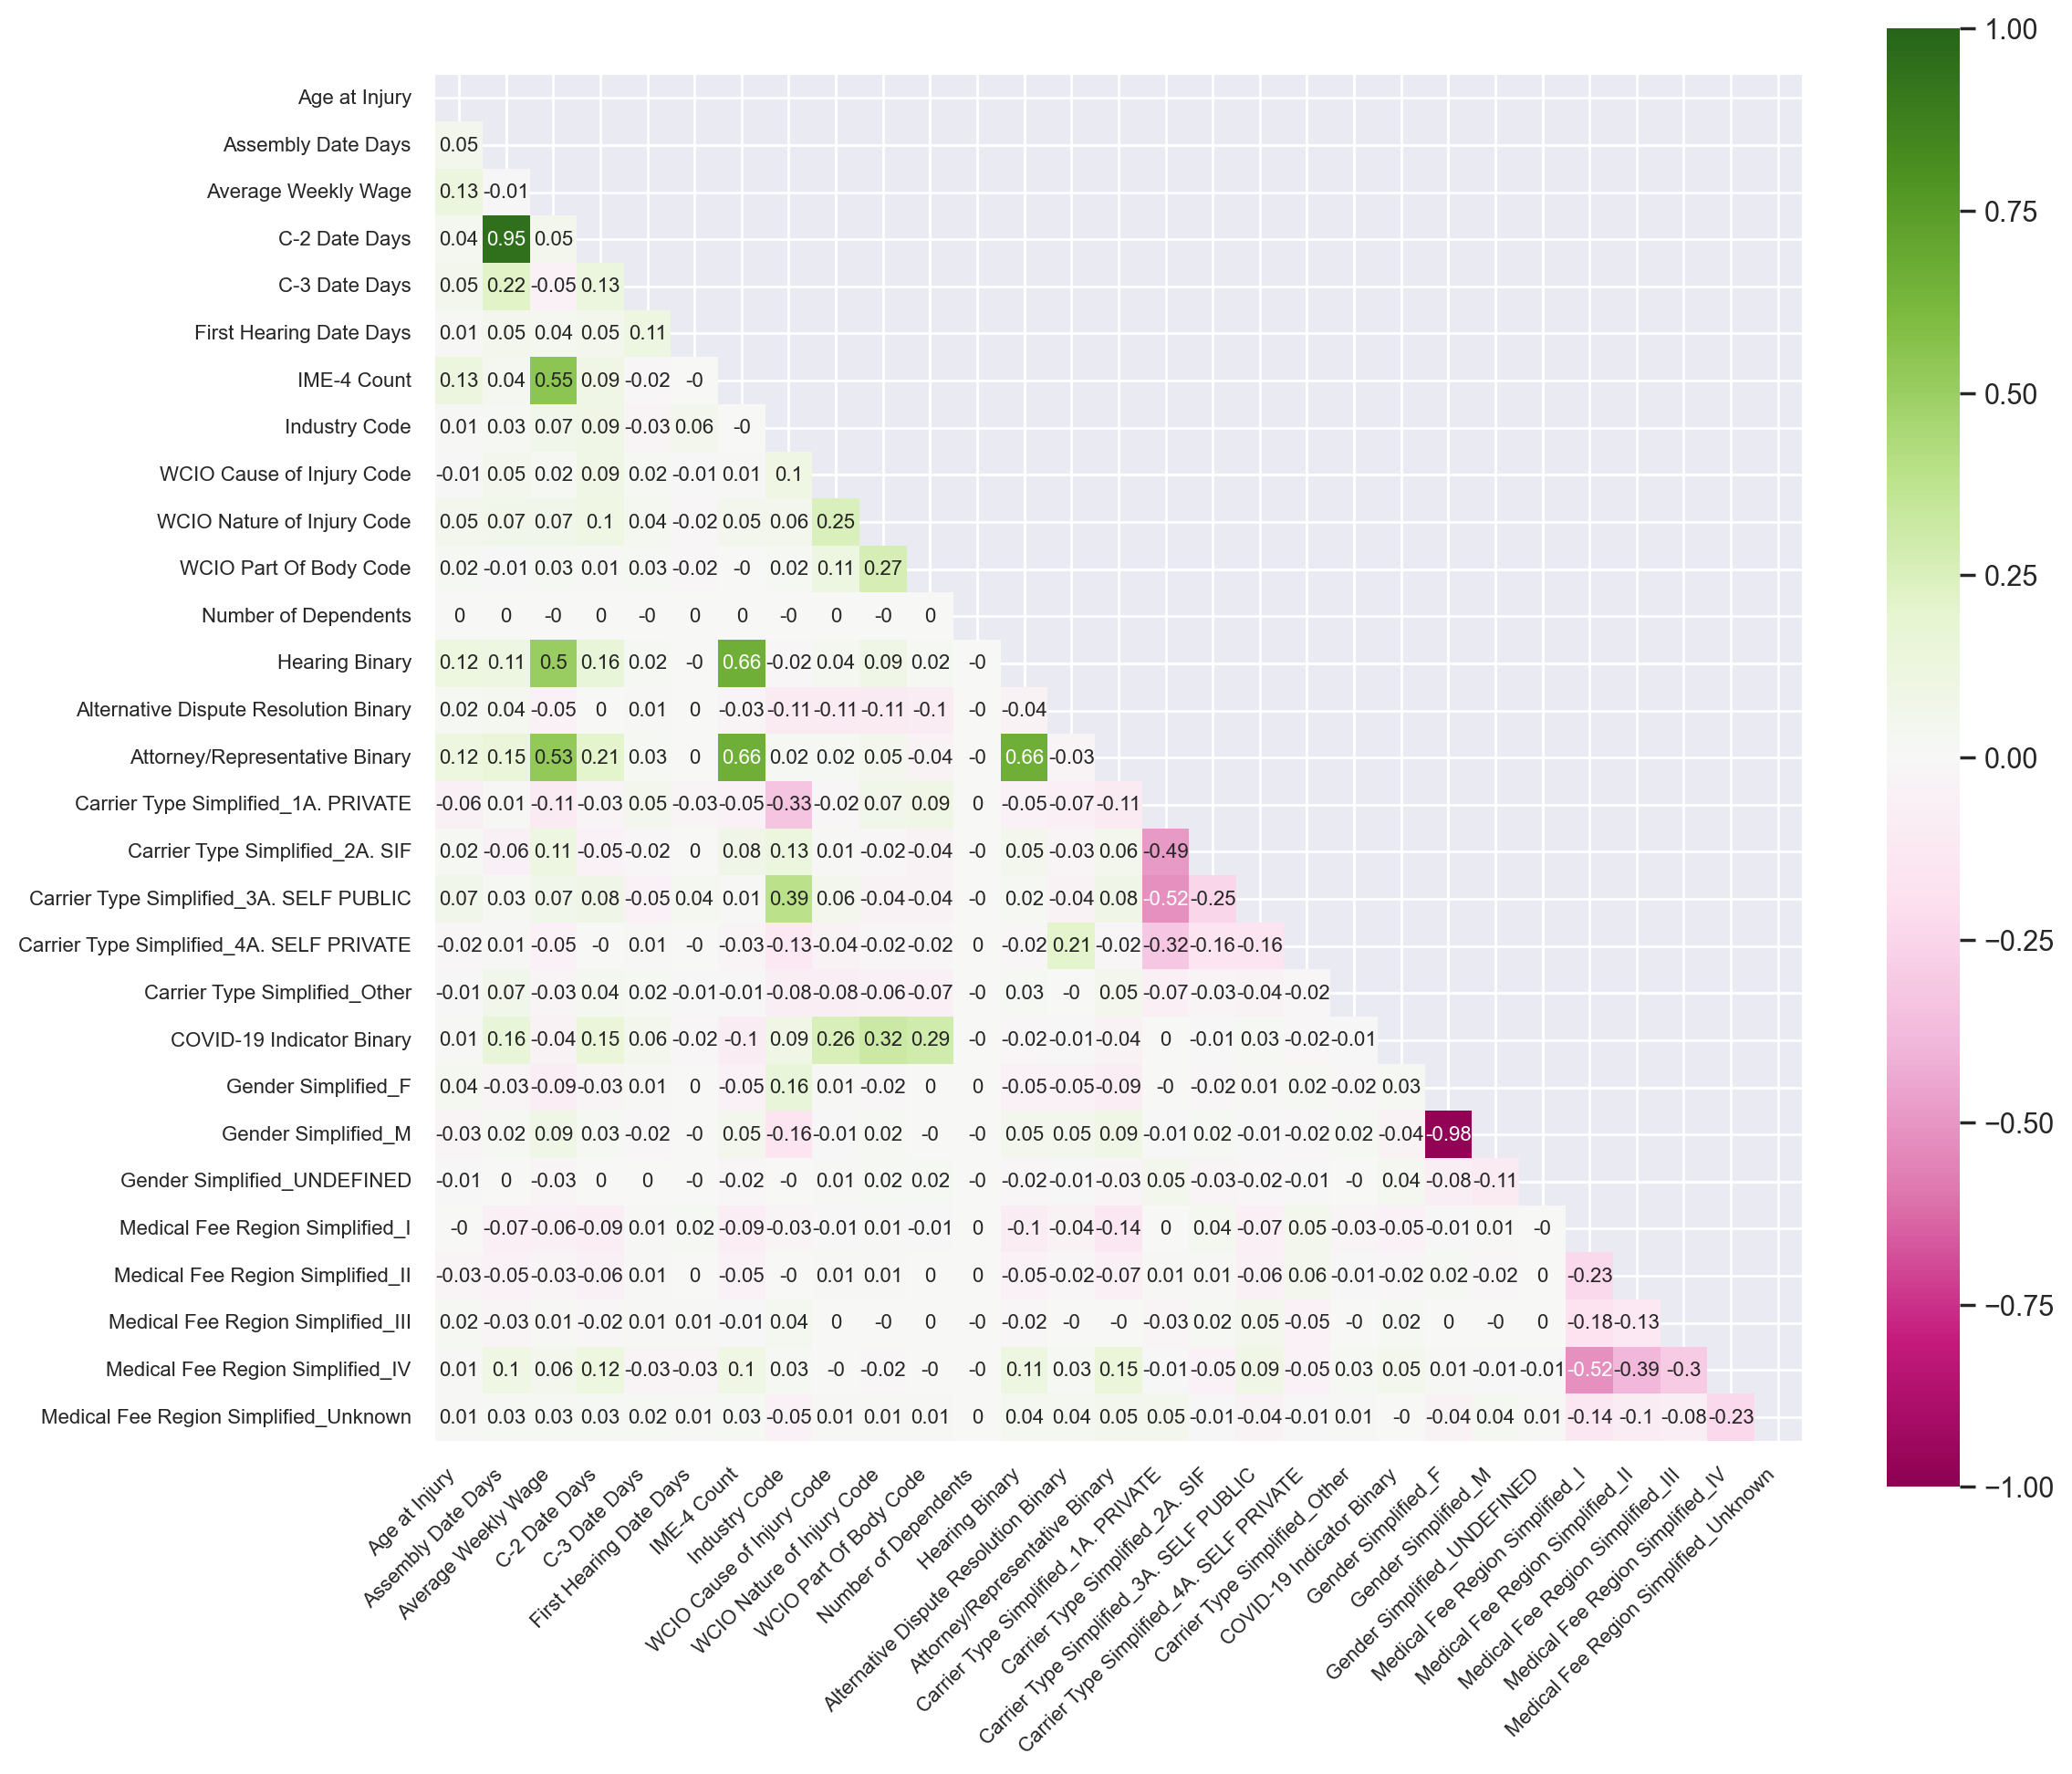

In [206]:
cor_heatmap(cor_spearman)

<a class="anchor">

### Wrapper methods
    
</a>

<a class="anchor">

#### RFE - XGBoost
    
</a>

In [207]:
# Defining the model to perform RFE
xgb_model = XGBClassifier(eval_metric='mlogloss',
                          random_state=19, 
                          n_estimators=200)

In [208]:
def rfe_with_xgboost(model, X_train_scaled, y_train, num_features):
    rfe = RFE(estimator=model, n_features_to_select=num_features)

    rfe.fit(X_train_scaled, y_train)
    
    selected_features = pd.Series(rfe.support_, index=X_train_scaled.columns)
    selected_features = selected_features[selected_features].index.tolist()
    
    return selected_features

In [209]:
# 15 features
rfe_xgb_15_features = rfe_with_xgboost(xgb_model, X_train_scaled, y_train, 15)

In [210]:
# 17 features
rfe_xgb_17_features = rfe_with_xgboost(xgb_model, X_train_scaled, y_train, 17)

In [211]:
# 20 features
rfe_xgb_20_features = rfe_with_xgboost(xgb_model, X_train_scaled, y_train, 20)

In [212]:
# 23 features
rfe_xgb_23_features = rfe_with_xgboost(xgb_model, X_train_scaled, y_train, 23)

In [213]:
# 26 features
rfe_xgb_26_features = rfe_with_xgboost(xgb_model, X_train_scaled, y_train, 26)

<hr>
<a class="anchor">
    
# 4. Model Assessment
    
</a>

In [215]:
def predict_results(model, X_train, y_train, X_val, y_val):
    predictions_train = model.predict(X_train)
    predictions_val = model.predict(X_val)
    
    print("Train Score")
    print(model.score(X_train, y_train))

    print("Val Score")
    print(model.score(X_val, y_val))
    print()
    
    # F1 Score
    # train
    print("F1 Score Train")
    f1_score_train = f1_score(y_train, predictions_train, average = "macro")
    print(f1_score_train)
    # val
    print("F1 Score val")
    f1_score_val = f1_score(y_val, predictions_val, average = "macro")
    print(f1_score_val)
    
    return predictions_train, predictions_val, f1_score_train, f1_score_val

<a class="anchor">
    
## 4.1. XGBoost
    
</a>

In [216]:
def XGBoost_model(X_train, y_train, X_val, y_val):
    xgb_model = XGBClassifier(eval_metric='mlogloss',
                              random_state=19, 
                              n_estimators=200)
    
    xgb_model.fit(X_train, y_train)

    predictions_train, predictions_val, f1_score_train, f1_score_val = predict_results(xgb_model, X_train, y_train, X_val, y_val)
    
    print("\nClassification Report:")
    print(classification_report(y_val, predictions_val))
    
    return xgb_model, f1_score_train, f1_score_val, predictions_val

In [217]:
# RFE - 15 features
xgb_model_15, xgb_model_15_f1_train, xgb_model_15_f1_val, xgb_model_15_predictions_val = XGBoost_model(X_train[rfe_xgb_15_features], 
                                                                                                       y_train,
                                                                                                       X_val[rfe_xgb_15_features], 
                                                                                                       y_val)

Train Score
0.8018662079177736
Val Score
0.7886260299984321

F1 Score Train
0.6397312720867347
F1 Score val
0.40864635342454353

Classification Report:
              precision    recall  f1-score   support

         0.0       0.71      0.47      0.57      2496
         1.0       0.85      0.98      0.91     58216
         2.0       0.51      0.08      0.13     13781
         3.0       0.72      0.87      0.79     29702
         4.0       0.68      0.57      0.62      9656
         5.0       0.26      0.01      0.01       842
         6.0       0.50      0.05      0.10        19
         7.0       0.27      0.10      0.14        94

    accuracy                           0.79    114806
   macro avg       0.56      0.39      0.41    114806
weighted avg       0.75      0.79      0.75    114806



In [218]:
# RFE - 17 features
xgb_model_17, xgb_model_17_f1_train, xgb_model_17_f1_val, xgb_model_17_predictions_val = XGBoost_model(X_train[rfe_xgb_17_features], 
                                                                                                       y_train,
                                                                                                       X_val[rfe_xgb_17_features], 
                                                                                                       y_val)

Train Score
0.8066264535516746
Val Score
0.7895057749594969

F1 Score Train
0.6604503449645893
F1 Score val
0.40843185185864395

Classification Report:
              precision    recall  f1-score   support

         0.0       0.71      0.50      0.58      2496
         1.0       0.85      0.98      0.91     58216
         2.0       0.51      0.08      0.14     13781
         3.0       0.72      0.87      0.79     29702
         4.0       0.68      0.58      0.62      9656
         5.0       0.20      0.01      0.01       842
         6.0       1.00      0.05      0.10        19
         7.0       0.33      0.06      0.11        94

    accuracy                           0.79    114806
   macro avg       0.63      0.39      0.41    114806
weighted avg       0.75      0.79      0.75    114806



In [219]:
# RFE - 20 features
xgb_model_20, xgb_model_20_f1_train, xgb_model_20_f1_val, xgb_model_20_predictions_val = XGBoost_model(X_train[rfe_xgb_20_features], 
                                                                                                       y_train,
                                                                                                       X_val[rfe_xgb_20_features],
                                                                                                       y_val)

Train Score
0.8120378032315666
Val Score
0.792693761650088

F1 Score Train
0.6815779563858535
F1 Score val
0.41542004631246304

Classification Report:
              precision    recall  f1-score   support

         0.0       0.71      0.51      0.59      2496
         1.0       0.85      0.98      0.91     58216
         2.0       0.55      0.10      0.17     13781
         3.0       0.73      0.87      0.79     29702
         4.0       0.68      0.59      0.63      9656
         5.0       0.30      0.01      0.01       842
         6.0       1.00      0.05      0.10        19
         7.0       0.29      0.07      0.12        94

    accuracy                           0.79    114806
   macro avg       0.64      0.40      0.42    114806
weighted avg       0.76      0.79      0.75    114806



In [220]:
# RFE - 23 features
xgb_model_23, xgb_model_23_f1_train, xgb_model_23_f1_val, xgb_model_23_predictions_val = XGBoost_model(X_train[rfe_xgb_23_features], 
                                                                                                       y_train,
                                                                                                       X_val[rfe_xgb_23_features], 
                                                                                                       y_val)

Train Score
0.8131984669657245
Val Score
0.7931641203421423

F1 Score Train
0.6856871818881165
F1 Score val
0.4068981699123495

Classification Report:
              precision    recall  f1-score   support

         0.0       0.71      0.51      0.59      2496
         1.0       0.85      0.98      0.91     58216
         2.0       0.55      0.10      0.17     13781
         3.0       0.73      0.87      0.79     29702
         4.0       0.68      0.59      0.63      9656
         5.0       0.25      0.01      0.01       842
         6.0       0.00      0.00      0.00        19
         7.0       0.44      0.09      0.14        94

    accuracy                           0.79    114806
   macro avg       0.53      0.39      0.41    114806
weighted avg       0.76      0.79      0.75    114806



In [221]:
# RFE - 26 features
xgb_model_26, xgb_model_26_f1_train, xgb_model_26_f1_val, xgb_model_26_predictions_val = XGBoost_model(X_train[rfe_xgb_26_features], 
                                                                                                       y_train,
                                                                                                       X_val[rfe_xgb_26_features], 
                                                                                                       y_val)

Train Score
0.8158682113148382
Val Score
0.7941483894569971

F1 Score Train
0.6954430090694097
F1 Score val
0.436202052689725

Classification Report:
              precision    recall  f1-score   support

         0.0       0.73      0.51      0.60      2496
         1.0       0.85      0.98      0.91     58216
         2.0       0.55      0.10      0.17     13781
         3.0       0.73      0.87      0.80     29702
         4.0       0.68      0.60      0.64      9656
         5.0       0.23      0.01      0.01       842
         6.0       0.00      0.00      0.00        19
         7.0       0.50      0.29      0.36        94

    accuracy                           0.79    114806
   macro avg       0.53      0.42      0.44    114806
weighted avg       0.76      0.79      0.75    114806



In [222]:
# All features
start_time = time.time()

xgb_model, xgb_model_f1_train, xgb_model_f1_val, xgb_model_predictions_val = XGBoost_model(X_train, 
                                                                                           y_train, 
                                                                                           X_val,
                                                                                           y_val)

end_time = time.time()

xgb_time = end_time - start_time

Train Score
0.8176799790949871
Val Score
0.794819086110482

F1 Score Train
0.6998018653555915
F1 Score val
0.44181041809515104

Classification Report:
              precision    recall  f1-score   support

         0.0       0.73      0.51      0.60      2496
         1.0       0.85      0.98      0.91     58216
         2.0       0.55      0.10      0.17     13781
         3.0       0.73      0.87      0.80     29702
         4.0       0.68      0.60      0.64      9656
         5.0       0.09      0.00      0.00       842
         6.0       0.00      0.00      0.00        19
         7.0       0.60      0.31      0.41        94

    accuracy                           0.79    114806
   macro avg       0.53      0.42      0.44    114806
weighted avg       0.76      0.79      0.76    114806



In [223]:
def plot_f1_scores(f1_train, f1_test, feature_counts):
    plt.figure(figsize=(10, 6))
    
    plt.plot(feature_counts, f1_train, label="Train F1 Score", marker='o', color='blue')
    
    plt.plot(feature_counts, f1_test, label="Test F1 Score", marker='o', color='red')
    
    plt.xlabel("Number of Features", fontsize=12)
    plt.ylabel("F1 Score", fontsize=12)
    plt.title("F1 Score for Different Feature Subsets", fontsize=14)
    
    plt.ylim(0, max(max(f1_train), max(f1_test)) * 1.1)
    
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(loc="best")
    plt.tight_layout()
    
    plt.show()

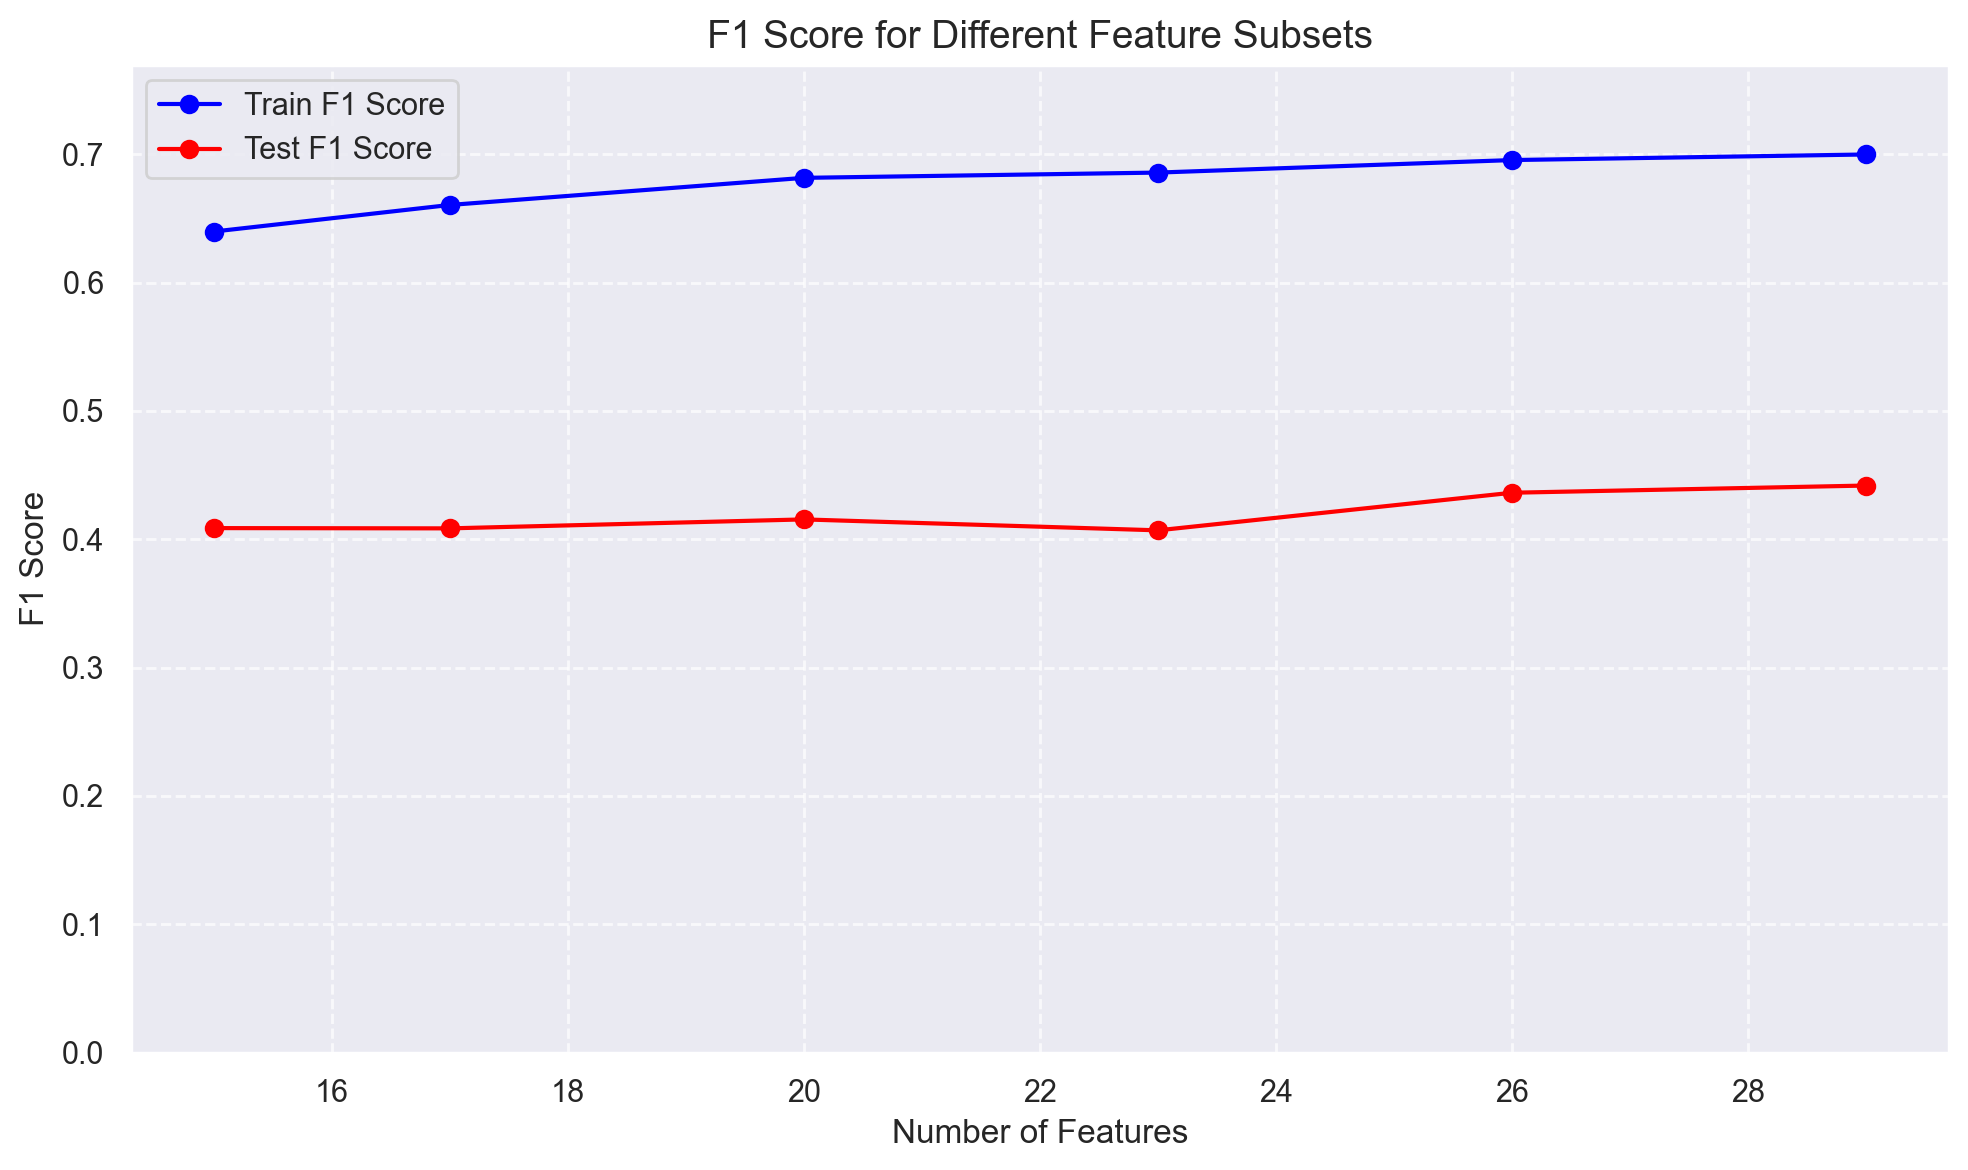

In [224]:
# Example F1 scores for train and test sets for different feature subsets
f1_scores_train = [xgb_model_15_f1_train, xgb_model_17_f1_train, xgb_model_20_f1_train, xgb_model_23_f1_train, xgb_model_26_f1_train, xgb_model_f1_train]
f1_Scores_val = [xgb_model_15_f1_val, xgb_model_17_f1_val, xgb_model_20_f1_val, xgb_model_23_f1_val, xgb_model_26_f1_val, xgb_model_f1_val]
feature_counts = [15, 17, 20, 23, 26, len(X_train_scaled.columns)]  

plot_f1_scores(f1_scores_train, f1_Scores_val, feature_counts)

<a class="anchor">
    
## 4.2. Random Forest
    
</a>

In [225]:
start_time = time.time()

rf_model = RandomForestClassifier(n_estimators=200, 
                                  random_state=19)

rf_model.fit(X_train, y_train)

y_val_pred_rf = predict_results(rf_model, X_train, y_train, X_val, y_val)[1]

end_time = time.time()

rf_time = end_time - start_time

Train Score
0.9995383476329428
Val Score
0.7916833614967859

F1 Score Train
0.9987939330431833
F1 Score val
0.38595846898111025


In [226]:
print(f"Validation Accuracy: {accuracy_score(y_val, y_val_pred_rf):.2f}")
print("Classification Report:")
print(classification_report(y_val, y_val_pred_rf))

Validation Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

         0.0       0.73      0.48      0.58      2496
         1.0       0.85      0.98      0.91     58216
         2.0       0.54      0.09      0.16     13781
         3.0       0.72      0.89      0.79     29702
         4.0       0.71      0.53      0.61      9656
         5.0       0.00      0.00      0.00       842
         6.0       0.00      0.00      0.00        19
         7.0       0.50      0.02      0.04        94

    accuracy                           0.79    114806
   macro avg       0.51      0.37      0.39    114806
weighted avg       0.76      0.79      0.75    114806



<a class="anchor">
    
## 4.3. Logistic Regression
    
</a>

In [227]:
start_time = time.time()

logreg_model = LogisticRegression(random_state=19, 
                                  multi_class='multinomial')

logreg_model.fit(X_train, y_train)

y_val_pred_logreg = predict_results(logreg_model, X_train, y_train, X_val, y_val)[1]

end_time = time.time()

logreg_time = end_time - start_time

Train Score
0.7154348678193458
Val Score
0.7147535843074404

F1 Score Train
0.23650546374284254
F1 Score val
0.23549833504766612


In [228]:
print(f"Validation Accuracy: {accuracy_score(y_val, y_val_pred_logreg):.2f}")
print("Classification Report:")
print(classification_report(y_val, y_val_pred_logreg))

Validation Accuracy: 0.71
Classification Report:
              precision    recall  f1-score   support

         0.0       0.51      0.02      0.04      2496
         1.0       0.79      0.95      0.86     58216
         2.0       0.18      0.02      0.03     13781
         3.0       0.61      0.85      0.71     29702
         4.0       0.58      0.14      0.23      9656
         5.0       0.00      0.00      0.00       842
         6.0       0.00      0.00      0.00        19
         7.0       0.00      0.00      0.00        94

    accuracy                           0.71    114806
   macro avg       0.33      0.25      0.24    114806
weighted avg       0.64      0.71      0.65    114806



<a class="anchor">
    
## 4.4. CatBoost
    
</a>

In [229]:
start_time = time.time()

def catboost_model(X_train, y_train, X_val, y_val):
    
    categorical_features = X_train.select_dtypes(exclude=np.number).columns.tolist()
    
    catboost_model = CatBoostClassifier(
        random_state=19,
        depth=8,             
        iterations=1000,     
        learning_rate=0.05,  
        loss_function='MultiClass', 
        cat_features=categorical_features,     
        verbose=100,         
        early_stopping_rounds=50  
    )
    
    catboost_model.fit(X_train, y_train, eval_set=(X_val, y_val))

    y_train_catboost = y_train.ravel()
    y_val_catboost = y_val.ravel()

    predict_train, y_val_pred_catboost, catboost_model_f1_score_train, catboost_model_f1_val = predict_results(catboost_model, X_train, y_train_catboost, X_val, y_val_catboost)

    print(classification_report(y_val, y_val_pred_catboost))
        
    return catboost_model, catboost_model_f1_score_train, catboost_model_f1_val, y_val_pred_catboost

end_time = time.time()

catboost_time = end_time - start_time

In [230]:
catboost_model, catboost_model_f1_train, catboost_model_f1_val, y_val_pred_catboost = catboost_model(X_train_before_encoding, y_train, X_val_before_encoding, y_val)

0:	learn: 1.8774416	test: 1.8773068	best: 1.8773068 (0)	total: 3.37s	remaining: 56m 11s
100:	learn: 0.5998584	test: 0.6018320	best: 0.6018320 (100)	total: 6m 5s	remaining: 54m 10s
200:	learn: 0.5712548	test: 0.5770351	best: 0.5770351 (200)	total: 12m 30s	remaining: 49m 44s
300:	learn: 0.5586575	test: 0.5678297	best: 0.5678297 (300)	total: 18m 25s	remaining: 42m 47s
400:	learn: 0.5504979	test: 0.5627826	best: 0.5627826 (400)	total: 23m 44s	remaining: 35m 28s
500:	learn: 0.5446696	test: 0.5601102	best: 0.5601102 (500)	total: 29m 12s	remaining: 29m 5s
600:	learn: 0.5401449	test: 0.5581952	best: 0.5581952 (600)	total: 34m 41s	remaining: 23m 2s
700:	learn: 0.5362121	test: 0.5569025	best: 0.5569025 (700)	total: 40m 27s	remaining: 17m 15s
800:	learn: 0.5323975	test: 0.5558448	best: 0.5558448 (800)	total: 46m 5s	remaining: 11m 27s
900:	learn: 0.5290105	test: 0.5549883	best: 0.5549883 (900)	total: 51m 40s	remaining: 5m 40s
999:	learn: 0.5257220	test: 0.5544581	best: 0.5544581 (999)	total: 57m 2

<a class="anchor">
    
## 4.5. LightGBM
    
</a>

In [231]:
def lightgbm_model(X_train, y_train, X_val, y_val):
    lgbm_model = LGBMClassifier(random_state=19)

    lgbm_model.fit(X_train, y_train)
    
    predictions_train, predictions_val, f1_score_train, f1_score_val = predict_results(lgbm_model, X_train, y_train, X_val, y_val)
    
    print("\nClassification Report:")
    print(classification_report(y_val, predictions_val))

    return lgbm_model, f1_score_train, f1_score_val, predictions_val

In [232]:
start_time_lgb = time.time()

lgbm_model, lgbm_model_f1_train, lgbm_model_f1_val, lgbm_model_predictions_val = lightgbm_model(X_train, y_train,
                                                   X_val, y_val)

end_time_lgb = time.time()

lgbm_time = end_time_lgb - start_time_lgb

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013604 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1654
[LightGBM] [Info] Number of data points in the train set: 459220, number of used features: 29
[LightGBM] [Info] Start training from score -3.828846
[LightGBM] [Info] Start training from score -0.679083
[LightGBM] [Info] Start training from score -2.119926
[LightGBM] [Info] Start training from score -1.352046
[LightGBM] [Info] Start training from score -2.475656
[LightGBM] [Info] Start training from score -4.914913
[LightGBM] [Info] Start training from score -8.680576
[LightGBM] [Info] Start training from score -7.107696
Train Score
0.7840947693915771
Val Score
0.7787136560806927

F1 Score Train
0.4240211306244217
F1 Score val
0.3912481884002555

Classi

<a class="anchor">
    
## 4.6. Models With MinMax Scaller applied
    
</a>

<a class="anchor">
    
### Naive Bayes
    
</a>

In [233]:
def naive_bayes_scalled_model(X_train_scaled, y_train, X_val_scaled, y_val):
    nb_model = MultinomialNB(alpha=1.0)
    
    nb_model.fit(X_train_scaled, y_train)

    predictions_train, predictions_val, f1_score_train, f1_score_val = predict_results(nb_model, X_train_scaled, y_train, X_val_scaled, y_val)
    
    print("\nClassification Report:")
    print(classification_report(y_val, predictions_val))

    return nb_model, f1_score_train, f1_score_val, predictions_val

In [234]:
start_time_nbs = time.time()

nb_model, nb_model_f1_train, nb_model_f1_val, nb_model_predictions_val = naive_bayes_scalled_model(X_train_scaled, y_train,
                                                     X_val_scaled, y_val)

end_time_nbs = time.time()

nb_scalled_time = end_time_nbs - start_time_nbs

Train Score
0.6317015809415967
Val Score
0.6310384474679024

F1 Score Train
0.20380550209426462
F1 Score val
0.2030827620813075

Classification Report:
              precision    recall  f1-score   support

         0.0       0.11      0.00      0.01      2496
         1.0       0.71      0.91      0.80     58216
         2.0       0.00      0.00      0.00     13781
         3.0       0.48      0.58      0.53     29702
         4.0       0.47      0.21      0.29      9656
         5.0       0.00      0.00      0.00       842
         6.0       0.00      0.00      0.00        19
         7.0       0.00      0.00      0.00        94

    accuracy                           0.63    114806
   macro avg       0.22      0.21      0.20    114806
weighted avg       0.53      0.63      0.57    114806



<a class="anchor">
    
### Logistic Regression (with scalled data)
    
</a>

In [235]:
start_time_lrs = time.time()

logreg_scalled_model = LogisticRegression(random_state=19, 
                                  multi_class='multinomial')

logreg_scalled_model.fit(X_train_scaled, y_train)

y_val_pred_logreg_scalled = predict_results(logreg_scalled_model, X_train_scaled, y_train, X_val_scaled, y_val)[1]

end_time_lrs = time.time()

logreg_scalled_time = end_time_lrs - start_time_lrs

Train Score
0.6449675536779756
Val Score
0.6449924219988502

F1 Score Train
0.2603421748517777
F1 Score val
0.2640307437923634


In [236]:
print(f"Validation Accuracy: {accuracy_score(y_val, y_val_pred_logreg):.2f}")
print("Classification Report:")
print(classification_report(y_val, y_val_pred_logreg))

Validation Accuracy: 0.71
Classification Report:
              precision    recall  f1-score   support

         0.0       0.51      0.02      0.04      2496
         1.0       0.79      0.95      0.86     58216
         2.0       0.18      0.02      0.03     13781
         3.0       0.61      0.85      0.71     29702
         4.0       0.58      0.14      0.23      9656
         5.0       0.00      0.00      0.00       842
         6.0       0.00      0.00      0.00        19
         7.0       0.00      0.00      0.00        94

    accuracy                           0.71    114806
   macro avg       0.33      0.25      0.24    114806
weighted avg       0.64      0.71      0.65    114806



<a class="anchor">
    
## 4.7. Model Metrics
    
</a>

In [237]:
def format_time(seconds):
   
    td = timedelta(seconds=seconds)
    
    hours = td.seconds // 3600
    minutes = (td.seconds // 60) % 60
    seconds = td.seconds % 60
    
    return f"{hours}h{minutes}m{seconds}s" if hours > 0 else f"{minutes}m{seconds}s"

In [238]:
results = []

timers = [xgb_time, rf_time, logreg_time, catboost_time, lgbm_time]    

models_predictions = [
    {"name": "XGBClassifier", "predictions": xgb_model_predictions_val},
    {"name": "RandomForestClassifier", "predictions": y_val_pred_rf},
    {"name": "LogisticRegression", "predictions": y_val_pred_logreg},
    {"name": "CatBoost", "predictions": y_val_pred_catboost},
    {"name": "LightGBM", "predictions": lgbm_model_predictions_val}
]

for model in models_predictions:
    name = model["name"]
    y_pred = model["predictions"]

    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='weighted')
    recall = recall_score(y_val, y_pred, average='weighted')
    f1 = f1_score(y_val, y_pred, average='weighted')
    
    time = format_time(timers[models_predictions.index(model)])

    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "Time": time
    })

results_df = pd.DataFrame(results)

results_df

Model  Accuracy  Precision    Recall  F1-Score   Time
0           XGBClassifier  0.794819   0.763173  0.794819  0.755523  0m41s
1  RandomForestClassifier  0.791683   0.759010  0.791683  0.749686  5m55s
2      LogisticRegression  0.714754   0.640844  0.714754  0.645904  0m16s
3                CatBoost  0.795080   0.772199  0.795080  0.753500   0m0s
4                LightGBM  0.778714   0.738572  0.778714  0.741485  0m19s

<a class="anchor">
    
### Model Metrics (scalled models)
    
</a>

In [239]:
def format_time(seconds):
   
    td = timedelta(seconds=seconds)
    
    hours = td.seconds // 3600
    minutes = (td.seconds // 60) % 60
    seconds = td.seconds % 60
    
    return f"{hours}h{minutes}m{seconds}s" if hours > 0 else f"{minutes}m{seconds}s"

results = []

timers = [nb_scalled_time, logreg_scalled_time]    

models_predictions = [
    {"name": "Naive Bayes", "predictions": nb_model_predictions_val},
    {"name": "Logistic Regression", "predictions": y_val_pred_logreg_scalled}
]

for model in models_predictions:
    name = model["name"]
    y_pred = model["predictions"]

    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='weighted')
    recall = recall_score(y_val, y_pred, average='weighted')
    f1 = f1_score(y_val, y_pred, average='weighted')
    
    time = format_time(timers[models_predictions.index(model)])

    results.append({
        "Scalled Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "Time": time
    })

results_df = pd.DataFrame(results)

results_df

Scalled Model  Accuracy  Precision    Recall  F1-Score   Time
0          Naive Bayes  0.631038   0.528125  0.631038  0.566798   0m0s
1  Logistic Regression  0.644992   0.588098  0.644992  0.588294  0m13s

<hr>
<a class="anchor">
    
# 5. Open Ended
    
</a>

<a class="anchor">
    
## 5.1. Setting the target variable
    
</a>

In [240]:
df_train_initial['Agreement Reached'].value_counts()

Agreement Reached
0.0    547239
1.0     26787
Name: count, dtype: int64

In [241]:
df_train_initial['Agreement Reached'].value_counts(normalize=True)

Agreement Reached
0.0    0.953335
1.0    0.046665
Name: proportion, dtype: float64

In [242]:
df_train_initial['WCB Decision'].value_counts() 

WCB Decision
Not Work Related    574026
Name: count, dtype: int64

It makes no sense to predict, considering that only one value has been observed.

In [243]:
agreement_reached = df_train_initial.set_index('Claim Identifier')['Agreement Reached']

X_train_open_ended = X_train.copy()
y_train_open_ended = X_train_open_ended.join(agreement_reached, how='left')['Agreement Reached']

X_val_open_ended = X_val.copy()
y_val_open_ended = X_val_open_ended.join(agreement_reached, how='left')['Agreement Reached']

<a class="anchor">
    
## 5.2. Models to predict *Agreement Reached*
    
</a>

#### XGBClassifier

In [244]:
xgb_model_open_ended = XGBClassifier(eval_metric='logloss',       
                          random_state=19, 
                          n_estimators=200)

xgb_model_open_ended.fit(X_train_open_ended, y_train_open_ended)

y_val_pred_xgb_open_ended = predict_results(xgb_model_open_ended, X_train_open_ended, y_train_open_ended, X_val_open_ended, y_val_open_ended)[1]

Train Score
0.9630416793693655
Val Score
0.9553159242548299

F1 Score Train
0.6794299812556619
F1 Score val
0.6013856562739112


In [245]:
xgb_model_open_ended_weighted = XGBClassifier(eval_metric='logloss',       
                          random_state=19, 
                          n_estimators=200,
                          scale_pos_weight=len(y_train_open_ended[y_train_open_ended == 0]) / len(y_train_open_ended[y_train_open_ended == 1]))

xgb_model_open_ended_weighted.fit(X_train_open_ended, y_train_open_ended)

y_val_pred_xgb_open_ended_weighted = predict_results(xgb_model_open_ended_weighted, X_train_open_ended, y_train_open_ended, X_val_open_ended, y_val_open_ended)[1]

Train Score
0.8669787901223814
Val Score
0.8551556538856854

F1 Score Train
0.6646381060056002
F1 Score val
0.6375631826649446


#### Random Forest

In [246]:
rf_model_open_ended = RandomForestClassifier(n_estimators=200, random_state=19)

rf_model_open_ended.fit(X_train_open_ended, y_train_open_ended)

y_val_pred_rf_open_ended = predict_results(rf_model_open_ended, X_train_open_ended, y_train_open_ended, X_val_open_ended, y_val_open_ended)[1]

Train Score
0.9999782239449502
Val Score
0.9560824347159557

F1 Score Train
0.9998773966204253
F1 Score val
0.5661665414683097


#### Logistic Regression

In [247]:
logreg_model_open_ended = LogisticRegression(random_state=19, max_iter = 200)


logreg_model_open_ended.fit(X_train_open_ended, y_train_open_ended)

y_val_pred_logreg_open_ended = predict_results(logreg_model_open_ended, X_train_open_ended, y_train_open_ended, X_val_open_ended, y_val_open_ended)[1]

Train Score
0.9503418840642829
Val Score
0.9498022751424141

F1 Score Train
0.5310122129277552
F1 Score val
0.5300780002134095


In [248]:
logreg_model_open_ended_weighted = LogisticRegression(random_state=19, max_iter = 200, class_weight='balanced')


logreg_model_open_ended_weighted.fit(X_train_open_ended, y_train_open_ended)

y_val_pred_logreg_open_ended_weighted = predict_results(logreg_model_open_ended_weighted, X_train_open_ended, y_train_open_ended, X_val_open_ended, y_val_open_ended)[1]

Train Score
0.8136579417272767
Val Score
0.8149399857150323

F1 Score Train
0.5946727961260858
F1 Score val
0.596671805287706


#### Compare Models

In [249]:
results_open_ended = []


models_predictions_open_ended = [
    {"name": "XGBClassifier", "predictions": y_val_pred_xgb_open_ended},
    {"name": "XGBClassifier Weighted", "predictions": y_val_pred_xgb_open_ended_weighted},
    {"name": "RandomForestClassifier", "predictions": y_val_pred_rf_open_ended},
    {"name": "LogisticRegression", "predictions": y_val_pred_logreg_open_ended},
    {"name": "LogisticRegression Weighted", "predictions": y_val_pred_logreg_open_ended_weighted}
    
]

for model in models_predictions_open_ended:
    name = model["name"]
    y_pred = model["predictions"]

    accuracy = accuracy_score(y_val_open_ended, y_pred)
    precision = precision_score(y_val_open_ended, y_pred, average='weighted')
    recall = recall_score(y_val_open_ended, y_pred, average='weighted')
    f1 = f1_score(y_val_open_ended, y_pred, average='weighted')

    results_open_ended.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })

results_open_ended = pd.DataFrame(results_open_ended)

In [250]:
results_open_ended

Model  Accuracy  Precision    Recall  F1-Score
0                XGBClassifier  0.955316   0.942569  0.955316  0.941693
1       XGBClassifier Weighted  0.855156   0.955681  0.855156  0.891996
2       RandomForestClassifier  0.956082   0.949876  0.956082  0.938801
3           LogisticRegression  0.949802   0.924128  0.949802  0.932453
4  LogisticRegression Weighted  0.814940   0.952638  0.814940  0.865491

<a class="anchor">
    
## 5.3. Using the Open-Ended model to predict *Claim Injury Type*
    
</a>

#### Using XGBClassifier to make predictions on Agreement Reached

In [251]:
prediction_agreement_reached = xgb_model_open_ended.predict(test_data)

In [252]:
test_data_open_ended = test_data.copy()
test_data_open_ended['Agreement Reached'] = prediction_agreement_reached

#### Comparing the best model scores for the test set with and without the Agreement Reached feature

In [253]:
X_train_agreement_reached = X_train_open_ended.join(agreement_reached, how='left')['Agreement Reached']

X_val_agreement_reached = X_val_open_ended.join(agreement_reached, how='left')['Agreement Reached']

In [254]:

xgb_model_agreement_reached = XGBClassifier(eval_metric='mlogloss',       
                          random_state=19, 
                          n_estimators=200)


xgb_model_agreement_reached.fit(X_train_agreement_reached, y_train)

y_val_pred_xgb_agreement_reached = predict_results(xgb_model_agreement_reached, X_train_agreement_reached, y_train, X_val_agreement_reached, y_val)[1]

Train Score
0.5523343931013458
Val Score
0.5526888838562445

F1 Score Train
0.12385619990926958
F1 Score val
0.12412035675550734


In [255]:
results_agreement_reached = []

models_predictions_agreement_reached = [
    {"name": "Without Agreement Reached", "predictions": xgb_model_predictions_val},
    {"name": "With Agreement Reached", "predictions": y_val_pred_xgb_agreement_reached}
    
]

for model in models_predictions_agreement_reached:
    name = model["name"]
    y_pred = model["predictions"]

    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='weighted')
    recall = recall_score(y_val, y_pred, average='weighted')
    f1 = f1_score(y_val, y_pred, average='weighted')

    results_agreement_reached.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })

results_agreement_reached = pd.DataFrame(results_agreement_reached)

In [256]:
results_agreement_reached

Model  Accuracy  Precision    Recall  F1-Score
0  Without Agreement Reached  0.794819   0.763173  0.794819  0.755523
1     With Agreement Reached  0.552689   0.520901  0.552689  0.429407

<hr>
<a class="anchor">
    
# Kaggle submission
    
</a>

In [257]:
prediction = xgb_model.predict(test_data)

prediction = ordinal_encoder_claim_injury.inverse_transform(prediction.reshape(-1, 1))

test_data['Pred XGB'] = prediction.ravel()

ML_sample_submission_XB = test_data.copy()

ML_sample_submission_XB = ML_sample_submission_XB[['Pred XGB']]

ML_sample_submission_XB.rename(columns={'Pred XGB': 'Claim Injury Type'}, inplace=True)

csv_name_XGB = 'Group47_Version' + '110' + '.csv'

ML_sample_submission_XB.to_csv(csv_name_XGB)